# **INSTALLATION DES DEPENDANCES**

In [1]:
!pip install PyPDF2 textstat gitpython PyMuPDF nltk transformers datasets accelerate evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 56.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3

# **Exploration des datasets CTI-HAL & AttachAttribution**

🚀 Initialisation de l'explorateur CTI...
🚀 Démarrage de l'exploration complète des datasets CTI...
🔄 Clonage des repositories...
✅ AttackAttribution cloné avec succès
✅ CTI_HAL cloné avec succès

📊 Exploration AttackAttributionDataset...
📈 Groupes APT trouvés: 12
📈 Total de fichiers: 238

🔝 Top 10 des groupes APT par nombre de rapports:
  APT28: 55 rapports
  Lazarus: 34 rapports
  Turla: 22 rapports
  OilRig: 19 rapports
  FIN7: 16 rapports
  APT3: 16 rapports
  APT17: 16 rapports
  APT29: 14 rapports
  RocketKitten: 13 rapports
  menuPass: 12 rapports
  Winnti: 11 rapports
  DeepPanda: 10 rapports

📊 Exploration CTI-HAL...
📁 Fichiers de données trouvés: 165
📈 Groupes de menaces identifiés: 7
  APT29 Reports: 12 rapports
  CARBANAK Reports: 10 rapports
  FIN6 Reports: 12 rapports
  FIN7 Reports: 18 rapports
  OILRIG Reports: 8 rapports
  SANDWORM Reports: 8 rapports
  WIZARDSPIDER Reports: 3 rapports

📋 Analyse des types de fichiers...
📊 Extensions de fichiers:
  .txt: 238 fichiers

📏

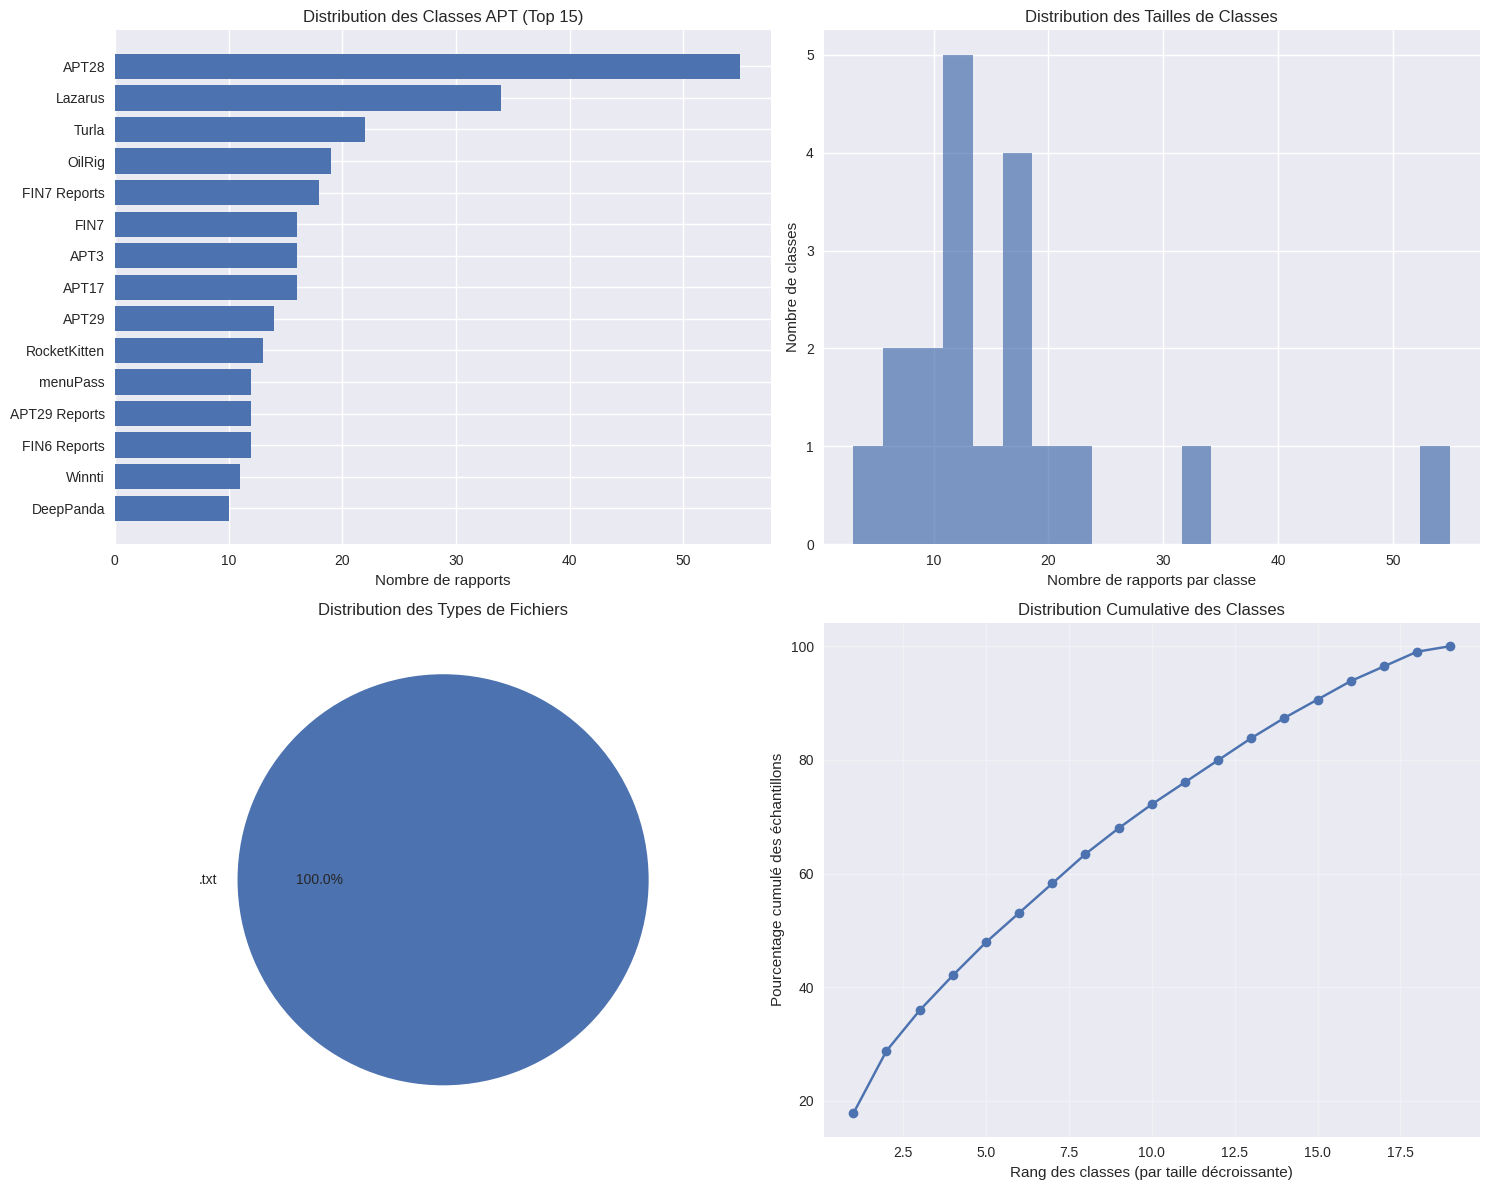

📊 Visualisations sauvegardées dans cti_datasets/data_distribution.png

⚙️ Génération du pipeline de préprocessing...
💾 Pipeline sauvegardé dans cti_datasets/preprocessing_pipeline.py

✅ Exploration terminée avec succès!
📁 Tous les résultats sont dans: cti_datasets

🎯 RÉSUMÉ FINAL:
📊 Total échantillons: 309
📊 Nombre de classes: 19
📊 Classe la plus représentée: ('APT28', 55)
📁 Tous les fichiers générés dans: ./cti_datasets/
✅ EXPLORATION TERMINÉE - Prêt pour la classification!


In [2]:
#!/usr/bin/env python3
"""
Explorateur de Datasets CTI pour Classification de Rapports d'Incidents
Analyse les datasets AttackAttributionDataset et CTI-HAL
"""

import os
import requests
import json
import pandas as pd
import numpy as np
from pathlib import Path
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import PyPDF2
import zipfile
import git
from textstat import flesch_reading_ease, lexicon_count
import warnings
warnings.filterwarnings('ignore')

class CTIDataExplorer:
    def __init__(self, base_dir="./cti_datasets"):
        """Initialise l'explorateur de données CTI"""
        self.base_dir = Path(base_dir)
        self.base_dir.mkdir(exist_ok=True)
        
        # URLs des datasets
        self.repos = {
            'AttackAttribution': 'https://github.com/eyalmazuz/AttackAttributionDataset.git',
            'CTI_HAL': 'https://github.com/dessertlab/CTI-HAL.git'
        }
        
        self.data_summary = {}
        
    def clone_repositories(self):
        """Clone les repositories GitHub"""
        print("🔄 Clonage des repositories...")
        
        for name, url in self.repos.items():
            repo_path = self.base_dir / name
            
            if repo_path.exists():
                print(f"✅ {name} existe déjà")
                continue
                
            try:
                git.Repo.clone_from(url, repo_path)
                print(f"✅ {name} cloné avec succès")
            except Exception as e:
                print(f"❌ Erreur lors du clonage de {name}: {e}")
                
    def explore_attack_attribution_dataset(self):
        """Explore le dataset AttackAttributionDataset"""
        print("\n📊 Exploration AttackAttributionDataset...")
        
        repo_path = self.base_dir / 'AttackAttribution'
        if not repo_path.exists():
            print("❌ Repository AttackAttribution non trouvé")
            return
            
        # Statistiques par groupe APT
        apt_groups = {}
        total_files = 0
        
        for apt_dir in repo_path.iterdir():
            if apt_dir.is_dir() and not apt_dir.name.startswith('.'):
                files = list(apt_dir.glob('**/*'))
                files = [f for f in files if f.is_file() and not f.name.startswith('.')]
                
                apt_groups[apt_dir.name] = {
                    'count': len(files),
                    'files': files,
                    'extensions': Counter([f.suffix.lower() for f in files])
                }
                total_files += len(files)
        
        self.data_summary['AttackAttribution'] = {
            'total_groups': len(apt_groups),
            'total_files': total_files,
            'groups': apt_groups
        }
        
        # Affichage des statistiques
        print(f"📈 Groupes APT trouvés: {len(apt_groups)}")
        print(f"📈 Total de fichiers: {total_files}")
        
        # Top 10 des groupes avec le plus de rapports
        sorted_groups = sorted(apt_groups.items(), 
                             key=lambda x: x[1]['count'], 
                             reverse=True)[:12]
        
        print("\n🔝 Top 10 des groupes APT par nombre de rapports:")
        for group, info in sorted_groups:
            print(f"  {group}: {info['count']} rapports")
            
        return apt_groups
    
    def explore_cti_hal_dataset(self):
        """Explore le dataset CTI-HAL"""
        print("\n📊 Exploration CTI-HAL...")
        
        repo_path = self.base_dir / 'CTI_HAL'
        if not repo_path.exists():
            print("❌ Repository CTI-HAL non trouvé")
            return
            
        # Chercher les fichiers de données
        data_files = list(repo_path.glob('**/*.json')) + \
                    list(repo_path.glob('**/*.csv')) + \
                    list(repo_path.glob('**/*.md'))
        
        print(f"📁 Fichiers de données trouvés: {len(data_files)}")
        
        # Analyser README pour extraire les métadonnées
        readme_files = list(repo_path.glob('**/README.md'))
        
        groups_info = {}
        if readme_files:
            with open(readme_files[0], 'r', encoding='utf-8') as f:
                content = f.read()
                
            # Parser les tables markdown pour extraire info sur les groupes
            groups_info = self._parse_readme_tables(content)
        
        self.data_summary['CTI_HAL'] = {
            'data_files': len(data_files),
            'groups_info': groups_info
        }
        
        print(f"📈 Groupes de menaces identifiés: {len(groups_info)}")
        for group, info in groups_info.items():
            print(f"  {group}: {info.get('reports_count', 0)} rapports")
            
        return groups_info
    
    def _parse_readme_tables(self, content):
        """Parse les tables markdown du README pour extraire les métadonnées"""
        groups = {}
        
        # Regex pour trouver les sections de groupes
        sections = re.split(r'\n## (.+?)\n', content)
        
        for i in range(1, len(sections), 2):
            if i+1 < len(sections):
                group_name = sections[i].strip()
                section_content = sections[i+1]
                
                # Compter les liens/rapports dans cette section
                links = re.findall(r'\[([^\]]+)\]\(([^)]+)\)', section_content)
                
                groups[group_name] = {
                    'reports_count': len(links),
                    'reports': links
                }
        
        return groups
    
    def analyze_file_types_and_sizes(self):
        """Analyse les types de fichiers et leurs tailles"""
        print("\n📋 Analyse des types de fichiers...")
        
        all_extensions = Counter()
        all_sizes = []
        
        for dataset_name, data in self.data_summary.items():
            if 'groups' in data:
                for group_info in data['groups'].values():
                    all_extensions.update(group_info['extensions'])
                    for file_path in group_info['files']:
                        if file_path.exists():
                            all_sizes.append(file_path.stat().st_size)
        
        print("📊 Extensions de fichiers:")
        for ext, count in all_extensions.most_common():
            print(f"  {ext or 'sans extension'}: {count} fichiers")
            
        if all_sizes:
            print(f"\n📏 Tailles de fichiers:")
            print(f"  Moyenne: {np.mean(all_sizes)/1024:.1f} KB")
            print(f"  Médiane: {np.median(all_sizes)/1024:.1f} KB")
            print(f"  Min: {min(all_sizes)/1024:.1f} KB")
            print(f"  Max: {max(all_sizes)/1024:.1f} KB")
    
    def sample_text_analysis(self, sample_size=5):
        """Analyse échantillon de textes pour comprendre le contenu"""
        print(f"\n🔍 Analyse d'échantillon de textes ({sample_size} fichiers)...")
        
        text_files = []
        
        # Collecter des fichiers texte
        for dataset_name, data in self.data_summary.items():
            if 'groups' in data:
                for group_name, group_info in data['groups'].items():
                    for file_path in group_info['files'][:2]:  # Max 2 par groupe
                        if file_path.suffix.lower() in ['.txt', '.md', '.html']:
                            text_files.append((group_name, file_path))
                            
        # Analyser un échantillon
        sample_files = text_files[:sample_size]
        
        text_stats = []
        for group_name, file_path in sample_files:
            try:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    content = f.read()
                
                stats = {
                    'group': group_name,
                    'file': file_path.name,
                    'char_count': len(content),
                    'word_count': lexicon_count(content),
                    'readability': flesch_reading_ease(content) if content.strip() else 0,
                    'has_indicators': bool(re.search(r'\b(md5|sha1|sha256|ip|domain|url)\b', content.lower())),
                    'has_mitre': bool(re.search(r'\b(t\d{4}|mitre|att&ck)\b', content.lower()))
                }
                text_stats.append(stats)
                
                print(f"📄 {group_name}/{file_path.name[:30]}...")
                print(f"  Mots: {stats['word_count']}, Lisibilité: {stats['readability']:.1f}")
                print(f"  IoCs: {'✅' if stats['has_indicators'] else '❌'}, MITRE: {'✅' if stats['has_mitre'] else '❌'}")
                
            except Exception as e:
                print(f"❌ Erreur lecture {file_path}: {e}")
        
        return text_stats
    
    def create_classification_overview(self):
        """Crée un aperçu pour la classification"""
        print("\n🎯 Aperçu pour la Classification...")
        
        total_samples = 0
        class_distribution = {}
        
        # AttackAttribution
        if 'AttackAttribution' in self.data_summary:
            for group, info in self.data_summary['AttackAttribution']['groups'].items():
                class_distribution[group] = info['count']
                total_samples += info['count']
        
        # CTI-HAL
        if 'CTI_HAL' in self.data_summary:
            for group, info in self.data_summary['CTI_HAL']['groups_info'].items():
                if group in class_distribution:
                    class_distribution[group] += info.get('reports_count', 0)
                else:
                    class_distribution[group] = info.get('reports_count', 0)
                total_samples += info.get('reports_count', 0)
        
        print(f"📊 Distribution des classes (groupes APT):")
        print(f"  Total d'échantillons: {total_samples}")
        print(f"  Nombre de classes: {len(class_distribution)}")
        
        # Classes les plus représentées
        sorted_classes = sorted(class_distribution.items(), 
                               key=lambda x: x[1], 
                               reverse=True)[:15]
        
        print(f"\n🔝 Top 15 des classes:")
        for class_name, count in sorted_classes:
            percentage = (count / total_samples) * 100 if total_samples > 0 else 0
            print(f"  {class_name}: {count} échantillons ({percentage:.1f}%)")
        
        # Recommandations
        print(f"\n💡 Recommandations pour la classification:")
        
        min_samples = min(class_distribution.values()) if class_distribution else 0
        max_samples = max(class_distribution.values()) if class_distribution else 0
        
        if max_samples / min_samples > 10 if min_samples > 0 else True:
            print("  ⚠️  Déséquilibre des classes détecté - considérer le rééchantillonnage")
        
        if len(class_distribution) > 20:
            print("  ⚠️  Beaucoup de classes - considérer grouper les classes minoritaires")
        
        if total_samples < 1000:
            print("  ⚠️  Dataset relativement petit - utiliser la validation croisée")
        
        print("  ✅ Utiliser TF-IDF ou embeddings pour les features textuelles")
        print("  ✅ Considérer des modèles comme Random Forest, SVM, ou Transformers")
        
        return class_distribution
    
    def visualize_data_distribution(self, class_distribution):
        """Créer des visualisations de la distribution des données"""
        print("\n📈 Création des visualisations...")
        
        # Configuration
        plt.style.use('seaborn-v0_8')
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Distribution des classes (top 15)
        sorted_classes = sorted(class_distribution.items(), 
                               key=lambda x: x[1], 
                               reverse=True)[:15]
        
        classes, counts = zip(*sorted_classes)
        ax1.barh(range(len(classes)), counts)
        ax1.set_yticks(range(len(classes)))
        ax1.set_yticklabels(classes)
        ax1.set_xlabel('Nombre de rapports')
        ax1.set_title('Distribution des Classes APT (Top 15)')
        ax1.invert_yaxis()
        
        # 2. Histogramme des tailles de classes
        ax2.hist(list(class_distribution.values()), bins=20, alpha=0.7)
        ax2.set_xlabel('Nombre de rapports par classe')
        ax2.set_ylabel('Nombre de classes')
        ax2.set_title('Distribution des Tailles de Classes')
        
        # 3. Extensions de fichiers
        if 'AttackAttribution' in self.data_summary:
            all_extensions = Counter()
            for group_info in self.data_summary['AttackAttribution']['groups'].values():
                all_extensions.update(group_info['extensions'])
            
            ext_data = all_extensions.most_common(10)
            if ext_data:
                exts, ext_counts = zip(*ext_data)
                ax3.pie(ext_counts, labels=exts, autopct='%1.1f%%')
                ax3.set_title('Distribution des Types de Fichiers')
        
        # 4. Cumulative distribution
        sorted_counts = sorted(class_distribution.values(), reverse=True)
        cumulative = np.cumsum(sorted_counts)
        cumulative_pct = (cumulative / cumulative[-1]) * 100
        
        ax4.plot(range(1, len(cumulative_pct) + 1), cumulative_pct, 'o-')
        ax4.set_xlabel('Rang des classes (par taille décroissante)')
        ax4.set_ylabel('Pourcentage cumulé des échantillons')
        ax4.set_title('Distribution Cumulative des Classes')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(self.base_dir / 'data_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"📊 Visualisations sauvegardées dans {self.base_dir / 'data_distribution.png'}")
    
    def generate_preprocessing_pipeline(self):
        """Génère le code de préprocessing pour la classification"""
        print("\n⚙️ Génération du pipeline de préprocessing...")
        
        pipeline_code = '''
# Pipeline de Préprocessing pour Classification CTI

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import os

class CTIPreprocessor:
    def __init__(self):
        self.tfidf = TfidfVectorizer(
            max_features=10000,
            ngram_range=(1, 3),
            stop_words='english',
            min_df=2,
            max_df=0.8
        )
        self.label_encoder = LabelEncoder()
        
    def clean_text(self, text):
        """Nettoie le texte des rapports"""
        # Supprimer URLs, emails, IPs
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
        text = re.sub(r'\\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Z|a-z]{2,}\\b', '', text)
        text = re.sub(r'\\b(?:[0-9]{1,3}\\.){3}[0-9]{1,3}\\b', '', text)
        
        # Normaliser les espaces
        text = re.sub(r'\\s+', ' ', text)
        text = text.strip().lower()
        
        return text
        
    def load_data(self, base_path):
        """Charge les données des deux datasets"""
        data = []
        
        # AttackAttribution
        attack_attr_path = os.path.join(base_path, 'AttackAttribution')
        if os.path.exists(attack_attr_path):
            for apt_dir in os.listdir(attack_attr_path):
                apt_path = os.path.join(attack_attr_path, apt_dir)
                if os.path.isdir(apt_path):
                    for file in os.listdir(apt_path):
                        file_path = os.path.join(apt_path, file)
                        if os.path.isfile(file_path):
                            try:
                                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                                    content = f.read()
                                    data.append({
                                        'text': self.clean_text(content),
                                        'label': apt_dir,
                                        'source': 'AttackAttribution',
                                        'filename': file
                                    })
                            except Exception as e:
                                continue
        
        return pd.DataFrame(data)
        
    def preprocess(self, df):
        """Préprocesse les données pour l'entraînement"""
        # Filtrer les textes trop courts
        df = df[df['text'].str.len() > 100]
        
        # Encoder les labels
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        
        # Vectorisation TF-IDF
        X = self.tfidf.fit_transform(df['text'])
        y = df['label_encoded']
        
        return X, y, df
        
    def split_data(self, X, y, test_size=0.2, random_state=42):
        """Divise les données"""
        return train_test_split(X, y, test_size=test_size, 
                              random_state=random_state, 
                              stratify=y)

# Utilisation
# preprocessor = CTIPreprocessor()
# df = preprocessor.load_data('./cti_datasets')
# X, y, df_processed = preprocessor.preprocess(df)
# X_train, X_test, y_train, y_test = preprocessor.split_data(X, y)
'''
        
        with open(self.base_dir / 'preprocessing_pipeline.py', 'w') as f:
            f.write(pipeline_code)
            
        print(f"💾 Pipeline sauvegardé dans {self.base_dir / 'preprocessing_pipeline.py'}")
    
    def run_full_exploration(self):
        """Lance l'exploration complète"""
        print("🚀 Démarrage de l'exploration complète des datasets CTI...")
        
        # 1. Cloner les repos
        self.clone_repositories()
        
        # 2. Explorer AttackAttribution
        apt_groups = self.explore_attack_attribution_dataset()
        
        # 3. Explorer CTI-HAL  
        hal_groups = self.explore_cti_hal_dataset()
        
        # 4. Analyser types de fichiers
        self.analyze_file_types_and_sizes()
        
        # 5. Échantillon de textes
        text_stats = self.sample_text_analysis()
        
        # 6. Aperçu classification
        class_distribution = self.create_classification_overview()
        
        # 7. Visualisations
        if class_distribution:
            self.visualize_data_distribution(class_distribution)
        
        # 8. Pipeline de preprocessing
        self.generate_preprocessing_pipeline()
        
        print("\n✅ Exploration terminée avec succès!")
        print(f"📁 Tous les résultats sont dans: {self.base_dir}")
        
        return {
            'apt_groups': apt_groups,
            'hal_groups': hal_groups,
            'class_distribution': class_distribution,
            'text_stats': text_stats
        }

# Exécution automatique de l'exploration
print("🚀 Initialisation de l'explorateur CTI...")
explorer = CTIDataExplorer()
import subprocess
import sys


# Lancement de l'exploration complète
results = explorer.run_full_exploration()

print("\n🎯 RÉSUMÉ FINAL:")
print("="*50)
if results.get('class_distribution'):
    total_samples = sum(results['class_distribution'].values())
    print(f"📊 Total échantillons: {total_samples}")
    print(f"📊 Nombre de classes: {len(results['class_distribution'])}")
    print(f"📊 Classe la plus représentée: {max(results['class_distribution'].items(), key=lambda x: x[1])}")

print(f"📁 Tous les fichiers générés dans: ./cti_datasets/")
print("✅ EXPLORATION TERMINÉE - Prêt pour la classification!")

# **Preprocessing CTI**

Choisissez le mode d'exécution:
1. Mode AVANCÉ uniquement
2. Mode BASIQUE uniquement
3. COMPARAISON automatique des deux modes
4. Mode AVANCÉ avec comparaison (recommandé pour Master)



Votre choix (1-4, défaut=4):  


DÉMARRAGE DU PREPROCESSING CTI - MODE AVANCÉE
📂 Chargement de toutes les données...
📁 Traitement AttackAttribution...
  📊 Traitement Lazarus...
  📊 Traitement APT28...
  📊 Traitement RocketKitten...
  📊 Traitement APT29...
  📊 Traitement Turla...
  📊 Traitement Winnti...
  📊 Traitement FIN7...
  📊 Traitement OilRig...
  📊 Traitement APT3...
  📊 Traitement APT17...
  📊 Traitement DeepPanda...
  📊 Traitement menuPass...
📁 Traitement CTI-HAL...
📊 Données chargées: 321 fichiers de 16 groupes
📈 Distribution initiale:
  APT28: 55
  APT29: 38
  Lazarus: 34
  FIN7: 34
  OilRig: 27
  Turla: 22
  APT17: 16
  APT3: 16
  RocketKitten: 13
  menuPass: 12
  FIN6: 12
  Winnti: 11
  DeepPanda: 10
  CARBANAK: 10
  SANDWORM: 8

🧹 Nettoyage des textes...
📊 Statistiques après nettoyage:
  Mots moyens: 1867.6
  Caractères moyens: 12077.9

🔄 ÉTAPE 1: Consolidation automatique des classes...
📊 Classes initiales: 16
🔄 Création de la map de consolidation...
🔍 Détection automatique des doublons...
📋 Doublons dét

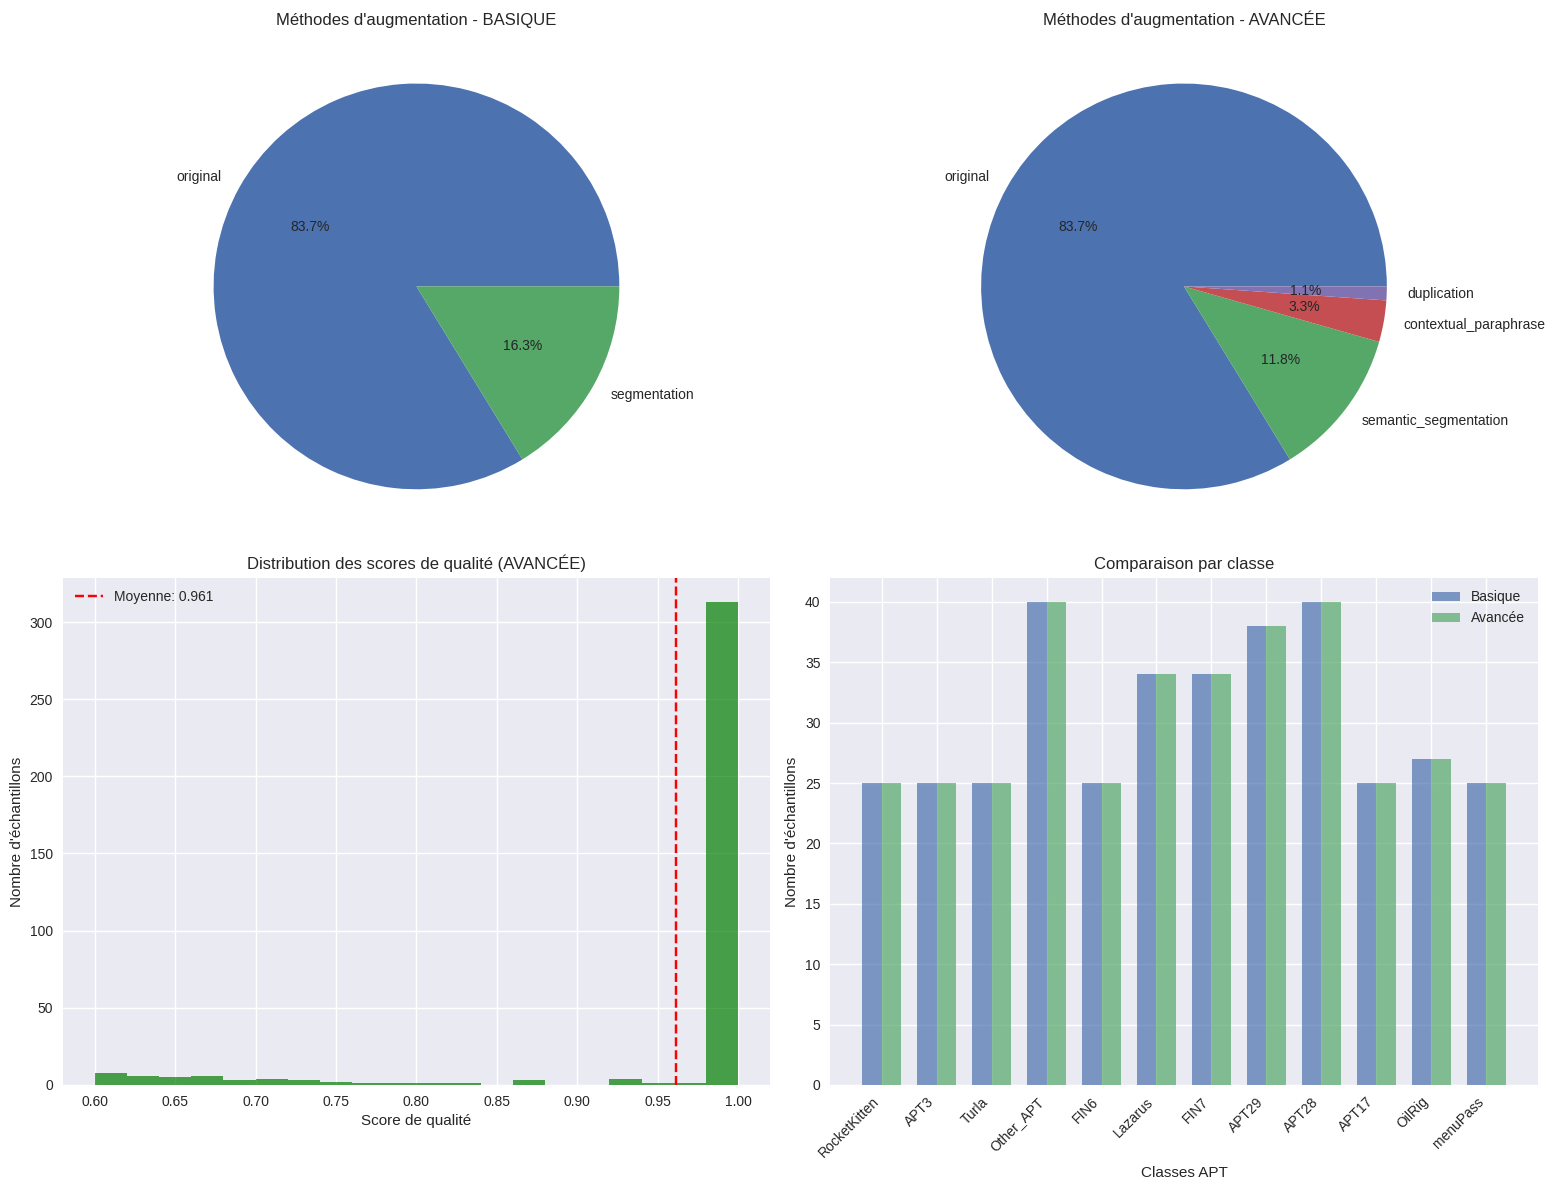

Rapport de comparaison sauvegardé: cti_datasets/processed/basic_vs_advanced_comparison.json

📈 Création des visualisations...


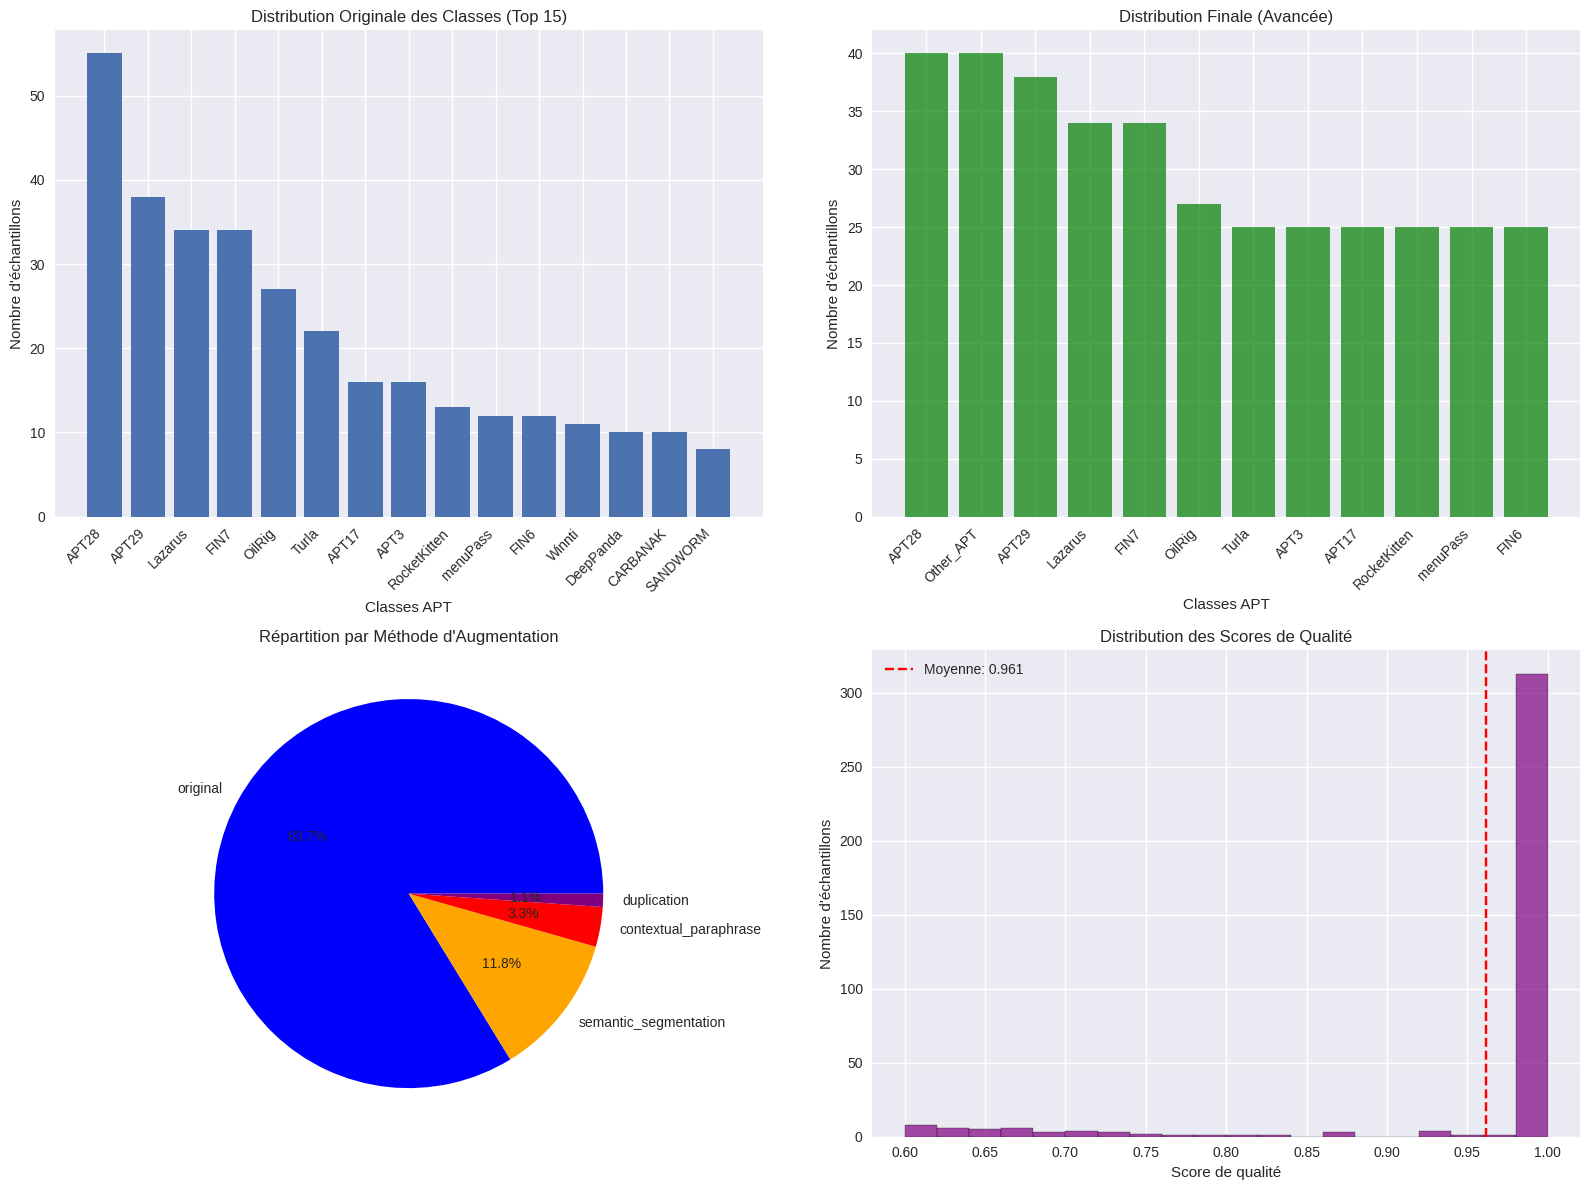

Visualisations sauvegardées: cti_datasets/processed/preprocessing_visualizations.png

Sauvegarde des données traitées...
Dataset principal: cti_datasets/processed/cti_dataset_processed.csv
Dataset d'entraînement: cti_datasets/processed/training_dataset.csv
Dataset haute qualité: cti_datasets/processed/high_quality_dataset.csv
Métadonnées: cti_datasets/processed/processing_metadata.json
Résumé des classes: cti_datasets/processed/class_summary.csv

RÉSUMÉ FINAL DU PREPROCESSING (AVANCÉE)
Échantillons: 321 → 363 (+42)
Classes: 16 → 12
Consolidations: 0 groupes fusionnés
Ratio d'équilibrage: 1.60
Qualité moyenne: 0.961
Échantillons haute qualité: 324/363 (89.3%)

Fichiers générés:
  Dataset consolidé: cti_datasets/processed/training_consolidated.csv
  Dataset final: cti_datasets/processed/training_dataset.csv
  Métadonnées: cti_datasets/processed/processing_metadata.json
  Rapport complet: cti_datasets/processed/preprocessing_complete_report.json
  Visualisations: cti_datasets/processed/pr

In [3]:
#!/usr/bin/env python3
"""
Preprocessing CTI - Version Intégrée avec Augmentation Avancée
Pipeline complet pour préparer les données de classification APT
"""

import pandas as pd
import numpy as np
from pathlib import Path
import re
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from textstat import flesch_reading_ease, lexicon_count
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.tree import Tree
import PyPDF2
import fitz  # PyMuPDF
from io import StringIO
import warnings
from difflib import SequenceMatcher
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
from itertools import combinations

try:
    import spacy
    SPACY_AVAILABLE = True
except ImportError:
    SPACY_AVAILABLE = False
    print("Warning: spaCy non disponible - fonctionnalités NER limitées")

warnings.filterwarnings('ignore')

class CTIDataPreprocessor:
    """Preprocesseur complet pour données CTI avec augmentation avancée intégrée"""
    
    def __init__(self, base_dir="./cti_datasets", use_advanced_augmentation=True):
        self.base_dir = Path(base_dir)
        self.output_dir = self.base_dir / "processed"
        self.output_dir.mkdir(exist_ok=True)
        
        # Configuration
        self.similarity_threshold = 0.8
        self.min_samples_threshold = 12
        self.target_samples = 25
        self.max_samples = 40
        self.use_advanced_augmentation = use_advanced_augmentation
        
        # Patterns de normalisation
        self.normalization_patterns = [
            (r'\s+reports?$', '', re.IGNORECASE),
            (r'\s+group$', '', re.IGNORECASE),
            (r'\s+apt$', '', re.IGNORECASE),
            (r'^apt\s*(\d+)', r'APT\1', re.IGNORECASE),
            (r'\s+', ' ', 0),
        ]
        
        # Stats et métriques
        self.processing_stats = {}
        self.consolidation_report = {}
        self.quality_metrics = {}
        
        # Setup
        self._setup_nltk()
        if self.use_advanced_augmentation:
            self._setup_advanced_nlp()
            self._load_cyber_vocabulary()
        
    def _setup_nltk(self):
        """Configure NLTK"""
        try:
            nltk.download('punkt', quiet=True)
            nltk.download('stopwords', quiet=True)
            if self.use_advanced_augmentation:
                nltk.download('averaged_perceptron_tagger', quiet=True)
                nltk.download('maxent_ne_chunker', quiet=True)
                nltk.download('words', quiet=True)
        except:
            print("Warning: Impossible de télécharger les ressources NLTK")
    
    def _setup_advanced_nlp(self):
        """Setup avancé NLP pour augmentation de qualité"""
        self.nlp = None
        if SPACY_AVAILABLE:
            try:
                self.nlp = spacy.load("en_core_web_sm")
            except:
                print("Warning: Modèle spaCy 'en_core_web_sm' non trouvé")
    
    def _load_cyber_vocabulary(self):
        """Charge le vocabulaire cybersécurité spécialisé"""
        self.cyber_entities = {
            'malware_types': [
                'backdoor', 'trojan', 'ransomware', 'rootkit', 'keylogger',
                'botnet', 'worm', 'virus', 'spyware', 'adware'
            ],
            'attack_vectors': [
                'phishing', 'spear phishing', 'watering hole', 'supply chain',
                'social engineering', 'credential stuffing', 'brute force'
            ],
            'techniques': [
                'lateral movement', 'privilege escalation', 'persistence',
                'defense evasion', 'credential access', 'discovery',
                'collection', 'exfiltration', 'command and control'
            ]
        }
        
        self.cyber_synonyms = {
            'attacker': ['threat actor', 'adversary', 'cybercriminal', 'malicious actor'],
            'malware': ['malicious software', 'malicious code', 'malicious payload'],
            'campaign': ['operation', 'activity', 'attack series'],
            'target': ['victim', 'affected organization', 'compromised entity'],
            'infiltration': ['penetration', 'breach', 'unauthorized access'],
            'exfiltration': ['data theft', 'data extraction', 'information stealing'],
            'persistence': ['maintaining access', 'sustained presence', 'foothold'],
            'reconnaissance': ['surveillance', 'information gathering', 'intelligence collection']
        }
    
    def normalize_group_name(self, name):
        """Normalise un nom de groupe APT"""
        normalized = name.strip()
        
        for pattern, replacement, flags in self.normalization_patterns:
            if flags:
                normalized = re.sub(pattern, replacement, normalized, flags=flags)
            else:
                normalized = re.sub(pattern, replacement, normalized)
        
        known_groups = {
            'oilrig': 'OilRig',
            'carbanak': 'CARBANAK', 
            'sandworm': 'SANDWORM',
            'wizardspider': 'WIZARDSPIDER',
            'menupass': 'menuPass',
            'deeppanda': 'DeepPanda',
            'rocketkitten': 'RocketKitten'
        }
        
        normalized_lower = normalized.lower()
        if normalized_lower in known_groups:
            normalized = known_groups[normalized_lower]
        
        return normalized.strip()
    
    def calculate_name_similarity(self, name1, name2):
        """Calcule la similarité entre deux noms de groupes"""
        norm1 = self.normalize_group_name(name1).lower()
        norm2 = self.normalize_group_name(name2).lower()
        
        # RÈGLE CRITIQUE: APT avec numéros différents sont TOUJOURS distincts
        apt_match1 = re.search(r'apt\s*(\d+)', norm1)
        apt_match2 = re.search(r'apt\s*(\d+)', norm2)
        if apt_match1 and apt_match2:
            return 1.0 if apt_match1.group(1) == apt_match2.group(1) else 0.0
        
        similarity = SequenceMatcher(None, norm1, norm2).ratio()
        
        if norm1 in norm2 or norm2 in norm1:
            similarity = max(similarity, 0.9)
        
        return similarity
    
    def detect_duplicate_groups(self, group_names):
        """Détecte automatiquement les groupes doublons"""
        print("🔍 Détection automatique des doublons...")
        
        duplicates = {}
        processed = set()
        group_list = list(group_names)
        
        for i, group1 in enumerate(group_list):
            if group1 in processed:
                continue
                
            similar_groups = [group1]
            processed.add(group1)
            
            for j, group2 in enumerate(group_list[i+1:], i+1):
                if group2 in processed:
                    continue
                    
                similarity = self.calculate_name_similarity(group1, group2)
                
                if similarity >= self.similarity_threshold:
                    similar_groups.append(group2)
                    processed.add(group2)
            
            if len(similar_groups) > 1:
                canonical = min(similar_groups, key=len)
                duplicates[canonical] = similar_groups
        
        return duplicates
    
    def create_consolidation_map(self, df):
        """Crée une map de consolidation basée sur la détection automatique"""
        print("🔄 Création de la map de consolidation...")
        
        class_counts = df['label'].value_counts()
        duplicates = self.detect_duplicate_groups(class_counts.index)
        consolidation_map = {}
        
        print("📋 Doublons détectés:")
        for canonical, variants in duplicates.items():
            print(f"  {canonical} ← {variants}")
            
            variant_counts = {v: class_counts.get(v, 0) for v in variants}
            best_name = max(variant_counts.items(), key=lambda x: x[1])[0]
            
            for variant in variants:
                if variant != best_name:
                    consolidation_map[variant] = best_name
            
            self.consolidation_report[best_name] = {
                'variants': variants,
                'total_samples': sum(variant_counts.values()),
                'best_variant': best_name
            }
        
        # Consolidations manuelles
        manual_consolidations = {
            'OILRIG': 'OilRig', 'Oil Rig': 'OilRig',
            'APT 28': 'APT28', 'APT 29': 'APT29',
            'Fin7': 'FIN7', 'FIN 7': 'FIN7',
            'Deep Panda': 'DeepPanda', 'Rocket Kitten': 'RocketKitten',
            'Menu Pass': 'menuPass', 'Wizard Spider': 'WIZARDSPIDER',
            'Sand Worm': 'SANDWORM'
        }
        
        for original, target in manual_consolidations.items():
            if original in class_counts.index and original not in consolidation_map:
                existing_target = None
                for existing_class in class_counts.index:
                    if self.calculate_name_similarity(existing_class, target) > 0.9:
                        existing_target = existing_class
                        break
                
                if existing_target:
                    consolidation_map[original] = existing_target
                    print(f"  Consolidation manuelle: {original} → {existing_target}")
        
        print(f"📊 Total de consolidations: {len(consolidation_map)}")
        return consolidation_map
    
    def extract_text_from_pdf(self, pdf_path):
        """Extrait le texte d'un PDF avec fallback"""
        text = ""
        
        try:
            doc = fitz.open(pdf_path)
            for page in doc:
                text += page.get_text()
            doc.close()
            
            if len(text.strip()) > 100:
                return text
        except Exception as e:
            print(f"PyMuPDF échoué pour {pdf_path}: {e}")
            
        try:
            with open(pdf_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                for page in pdf_reader.pages:
                    text += page.extract_text()
        except Exception as e:
            print(f"PyPDF2 échoué pour {pdf_path}: {e}")
            
        return text
    
    def load_all_data(self):
        """Charge toutes les données (TXT et PDF)"""
        print("📂 Chargement de toutes les données...")
        
        data = []
        
        # AttackAttribution Dataset
        attack_attr_path = self.base_dir / 'AttackAttribution'
        if attack_attr_path.exists():
            print(f"📁 Traitement AttackAttribution...")
            
            for apt_dir in attack_attr_path.iterdir():
                if apt_dir.is_dir() and not apt_dir.name.startswith('.'):
                    print(f"  📊 Traitement {apt_dir.name}...")
                    
                    for file_path in apt_dir.iterdir():
                        if file_path.is_file() and not file_path.name.startswith('.'):
                            try:
                                text = ""
                                
                                if file_path.suffix.lower() == '.pdf':
                                    text = self.extract_text_from_pdf(file_path)
                                elif file_path.suffix.lower() in ['.txt', '.md']:
                                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                                        text = f.read()
                                else:
                                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                                        text = f.read()
                                
                                if len(text.strip()) > 100:
                                    data.append({
                                        'text': text.strip(),
                                        'label': apt_dir.name,
                                        'source': 'AttackAttribution',
                                        'filename': file_path.name,
                                        'file_type': file_path.suffix.lower() or 'no_ext',
                                        'word_count': len(text.split()),
                                        'char_count': len(text)
                                    })
                                    
                            except Exception as e:
                                print(f"❌ Erreur {file_path}: {e}")
                                continue
        
        # CTI-HAL Dataset
        hal_path = self.base_dir / 'CTI_HAL'
        if hal_path.exists():
            print(f"📁 Traitement CTI-HAL...")
            
            for item in hal_path.rglob('*'):
                if item.is_file() and not item.name.startswith('.'):
                    path_parts = item.parts
                    apt_group = None
                    
                    for part in path_parts:
                        part_lower = part.lower()
                        if any(x in part_lower for x in ['apt', 'fin', 'carbanak', 'oilrig', 'sandworm', 'wizard']):
                            if 'apt29' in part_lower:
                                apt_group = 'APT29'
                            elif 'fin7' in part_lower:
                                apt_group = 'FIN7'
                            elif 'fin6' in part_lower:
                                apt_group = 'FIN6'
                            elif 'carbanak' in part_lower:
                                apt_group = 'CARBANAK'
                            elif 'oilrig' in part_lower:
                                apt_group = 'OilRig'
                            elif 'sandworm' in part_lower:
                                apt_group = 'SANDWORM'
                            elif 'wizard' in part_lower:
                                apt_group = 'WIZARDSPIDER'
                            break
                    
                    if apt_group and item.suffix.lower() in ['.md', '.txt']:
                        try:
                            with open(item, 'r', encoding='utf-8', errors='ignore') as f:
                                text = f.read()
                            
                            if len(text.strip()) > 100:
                                data.append({
                                    'text': text.strip(),
                                    'label': apt_group,
                                    'source': 'CTI-HAL',
                                    'filename': item.name,
                                    'file_type': item.suffix.lower() or 'no_ext',
                                    'word_count': len(text.split()),
                                    'char_count': len(text)
                                })
                                
                        except Exception as e:
                            print(f"❌ Erreur CTI-HAL {item}: {e}")
                            continue
            
        df = pd.DataFrame(data)
        print(f"📊 Données chargées: {len(df)} fichiers de {df['label'].nunique()} groupes")
        
        print(f"📈 Distribution initiale:")
        initial_dist = df['label'].value_counts()
        for label, count in initial_dist.head(15).items():
            print(f"  {label}: {count}")
        
        self.processing_stats['initial_load'] = {
            'total_files': len(df),
            'unique_groups': df['label'].nunique(),
            'file_types': df['file_type'].value_counts().to_dict(),
            'initial_distribution': initial_dist.to_dict()
        }
        
        return df
    
    def clean_and_preprocess_text(self, df):
        """Nettoyage et préprocessing du texte"""
        print("\n🧹 Nettoyage des textes...")
        
        def clean_text(text):
            text = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', text)
            text = re.sub(r'http[s]?://[^\s]+', '[URL]', text)
            text = re.sub(r'\b[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\b', '[IP]', text)
            text = re.sub(r'\b[a-f0-9]{32}\b', '[MD5]', text)
            text = re.sub(r'\b[a-f0-9]{40}\b', '[SHA1]', text)
            text = re.sub(r'\b[a-f0-9]{64}\b', '[SHA256]', text)
            text = re.sub(r'\s+', ' ', text)
            
            lines = text.split('\n')
            unique_lines = []
            for line in lines:
                line = line.strip()
                if line and (not unique_lines or line != unique_lines[-1]):
                    unique_lines.append(line)
            
            return ' '.join(unique_lines)
        
        df['text_clean'] = df['text'].apply(clean_text)
        df['word_count_clean'] = df['text_clean'].apply(lambda x: len(x.split()))
        df['char_count_clean'] = df['text_clean'].apply(len)
        
        print(f"📊 Statistiques après nettoyage:")
        print(f"  Mots moyens: {df['word_count_clean'].mean():.1f}")
        print(f"  Caractères moyens: {df['char_count_clean'].mean():.1f}")
        
        return df
    
    def consolidate_classes(self, df):
        """Étape 1: Consolidation des classes avec détection automatique"""
        print("\n🔄 ÉTAPE 1: Consolidation automatique des classes...")
        
        initial_classes = df['label'].nunique()
        initial_distribution = df['label'].value_counts()
        
        print(f"📊 Classes initiales: {initial_classes}")
        
        consolidation_map = self.create_consolidation_map(df)
        df['label_consolidated'] = df['label'].map(consolidation_map).fillna(df['label'])
        
        consolidated_distribution = df['label_consolidated'].value_counts()
        print(f"\n📊 Classes après consolidation: {df['label_consolidated'].nunique()}")
        print("📈 Distribution consolidée (Top 15):")
        for label, count in consolidated_distribution.head(15).items():
            print(f"  {label}: {count}")
        
        if self.consolidation_report:
            print(f"\n📋 Rapport de consolidation:")
            for canonical, info in self.consolidation_report.items():
                variants_str = " + ".join([f"{v}({consolidated_distribution.get(v, 0)})" 
                                         for v in info['variants'] if v != canonical])
                print(f"  {canonical}: {consolidated_distribution[canonical]} (← {variants_str})")
        
        small_classes = consolidated_distribution[consolidated_distribution < self.min_samples_threshold].index
        
        if len(small_classes) > 0:
            print(f"\n🔄 Regroupement en 'Other_APT' (< {self.min_samples_threshold} échantillons):")
            for cls in small_classes:
                print(f"  {cls}: {consolidated_distribution[cls]} échantillons")
            
            df.loc[df['label_consolidated'].isin(small_classes), 'label_consolidated'] = 'Other_APT'
        
        final_distribution = df['label_consolidated'].value_counts()
        print(f"\n✅ Classes finales: {df['label_consolidated'].nunique()}")
        print("📈 Distribution finale:")
        for label, count in final_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        self.processing_stats['consolidation'] = {
            'initial_classes': initial_classes,
            'final_classes': df['label_consolidated'].nunique(),
            'consolidations_applied': len(consolidation_map),
            'small_classes_grouped': len(small_classes),
            'final_distribution': final_distribution.to_dict(),
            'consolidation_report': self.consolidation_report
        }
        
        return df
    
    def save_consolidated_data(self, df):
        """Sauvegarde les données après consolidation seulement"""
        print("\n💾 Sauvegarde des données consolidées...")
        
        consolidated_path = self.output_dir / 'consolidated_dataset.csv'
        df.to_csv(consolidated_path, index=False)
        print(f"✅ Dataset consolidé complet: {consolidated_path}")
        
        training_consolidated = df[['text_clean', 'label_consolidated']].copy()
        training_consolidated.columns = ['text', 'label']
        training_consolidated_path = self.output_dir / 'training_consolidated.csv'
        training_consolidated.to_csv(training_consolidated_path, index=False)
        print(f"✅ Dataset training consolidé: {training_consolidated_path}")
        
        consolidated_stats = {
            'total_samples': len(df),
            'num_classes': df['label_consolidated'].nunique(),
            'class_distribution': self._convert_numpy_types(df['label_consolidated'].value_counts().to_dict()),
            'consolidation_applied': len(self.consolidation_report) > 0
        }
        
        stats_path = self.output_dir / 'consolidated_stats.json'
        with open(stats_path, 'w', encoding='utf-8') as f:
            json.dump(consolidated_stats, f, indent=2, ensure_ascii=False)
        print(f"✅ Statistiques consolidées: {stats_path}")
        
        return training_consolidated_path, consolidated_path
    
    # ==================== MÉTHODES D'AUGMENTATION AVANCÉES ====================
    
    def extract_cyber_entities(self, text):
        """Extrait les entités cybersécurité du texte"""
        if not self.use_advanced_augmentation:
            return {'iocs': [], 'techniques': [], 'malware': [], 'named_entities': []}
        
        entities = {
            'iocs': [],
            'techniques': [],
            'malware': [],
            'named_entities': []
        }
        
        text_lower = text.lower()
        
        # IOCs patterns
        ioc_patterns = {
            'ip': r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b',
            'domain': r'\b[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?(?:\.[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?)*\.[a-zA-Z]{2,}\b',
            'hash_md5': r'\b[a-f0-9]{32}\b',
            'hash_sha1': r'\b[a-f0-9]{40}\b',
            'hash_sha256': r'\b[a-f0-9]{64}\b',
            'url': r'https?://[^\s<>"{}|\\^`\[\]]+',
        }
        
        for ioc_type, pattern in ioc_patterns.items():
            matches = re.findall(pattern, text, re.IGNORECASE)
            entities['iocs'].extend([(ioc_type, match) for match in matches])
        
        # Techniques
        for technique in self.cyber_entities['techniques']:
            if technique in text_lower:
                entities['techniques'].append(technique)
        
        # Malware types
        for malware_type in self.cyber_entities['malware_types']:
            if malware_type in text_lower:
                entities['malware'].append(malware_type)
        
        # Named entities avec spaCy
        if self.nlp:
            doc = self.nlp(text[:1000000])
            for ent in doc.ents:
                if ent.label_ in ['ORG', 'PERSON', 'GPE', 'PRODUCT']:
                    entities['named_entities'].append((ent.text, ent.label_))
        
        return entities
    
    def semantic_text_segmentation(self, text, min_segment_length=200, max_segment_length=400):
        """Segmentation sémantique intelligente des rapports CTI"""
        if not self.use_advanced_augmentation:
            # Fallback vers segmentation basique
            return self.extract_text_segments(text, segment_length=300, overlap=50)
        
        sentences = sent_tokenize(text)
        if len(sentences) <= 3:
            return [text]
        
        segments = []
        current_segment = []
        current_length = 0
        
        section_headers = [
            'executive summary', 'overview', 'background', 'analysis',
            'technical details', 'indicators', 'attribution', 'recommendations',
            'conclusion', 'timeline', 'campaign', 'malware analysis',
            'tactics techniques procedures', 'ttps', 'infrastructure'
        ]
        
        for i, sentence in enumerate(sentences):
            sentence_words = len(sentence.split())
            
            is_section_header = any(header in sentence.lower() for header in section_headers)
            
            should_break = (
                current_length + sentence_words > max_segment_length or
                (current_length > min_segment_length and is_section_header) or
                (current_length > min_segment_length * 1.5)
            )
            
            if should_break and current_segment and current_length >= min_segment_length:
                segment_text = ' '.join(current_segment)
                segments.append(segment_text)
                current_segment = [sentence]
                current_length = sentence_words
            else:
                current_segment.append(sentence)
                current_length += sentence_words
        
        if current_segment:
            segment_text = ' '.join(current_segment)
            if len(segment_text.split()) >= min_segment_length:
                segments.append(segment_text)
            elif segments:
                segments[-1] += ' ' + segment_text
        
        return segments if segments else [text]
    
    def contextual_paraphrase(self, text, num_paraphrases=2):
        """Paraphrase contextuelle préservant les entités cybersécurité"""
        if not self.use_advanced_augmentation:
            return self.paraphrase_augmentation([text], num_paraphrases)
        
        paraphrases = []
        entities = self.extract_cyber_entities(text)
        
        for i in range(num_paraphrases):
            paraphrased = text
            
            substitutions_made = 0
            for original, synonyms in self.cyber_synonyms.items():
                if original in text.lower() and substitutions_made < 3:
                    synonym = random.choice(synonyms)
                    pattern = r'\b' + re.escape(original) + r'\b'
                    paraphrased = re.sub(pattern, synonym, paraphrased, flags=re.IGNORECASE)
                    substitutions_made += 1
            
            sentences = sent_tokenize(paraphrased)
            if len(sentences) > 4:
                middle_start = len(sentences) // 4
                middle_end = 3 * len(sentences) // 4
                
                middle_sentences = sentences[middle_start:middle_end]
                if len(middle_sentences) > 1:
                    random.shuffle(middle_sentences)
                
                reconstructed = (
                    sentences[:middle_start] + 
                    middle_sentences + 
                    sentences[middle_end:]
                )
                paraphrased = ' '.join(reconstructed)
            
            new_entities = self.extract_cyber_entities(paraphrased)
            if self._entities_preserved(entities, new_entities, threshold=0.7):
                paraphrases.append(paraphrased)
        
        return paraphrases
    
    def _entities_preserved(self, original_entities, new_entities, threshold=0.7):
        """Vérifie si les entités importantes sont préservées"""
        orig_iocs = set([ioc[1] for ioc in original_entities['iocs']])
        new_iocs = set([ioc[1] for ioc in new_entities['iocs']])
        
        if orig_iocs and len(orig_iocs.intersection(new_iocs)) / len(orig_iocs) < 0.9:
            return False
        
        orig_techniques = set(original_entities['techniques'])
        new_techniques = set(new_entities['techniques'])
        
        if orig_techniques:
            technique_preservation = len(orig_techniques.intersection(new_techniques)) / len(orig_techniques)
            if technique_preservation < threshold:
                return False
        
        return True
    
    def _evaluate_segment_quality(self, segment, original):
        """Évalue la qualité d'un segment par rapport à l'original"""
        if not self.use_advanced_augmentation:
            return 0.8  # Score par défaut pour mode basique
        
        length_ratio = len(segment.split()) / len(original.split())
        if length_ratio < 0.1 or length_ratio > 0.8:
            return 0.0
        
        orig_entities = self.extract_cyber_entities(original)
        seg_entities = self.extract_cyber_entities(segment)
        
        entity_score = 0.0
        if orig_entities['iocs'] or orig_entities['techniques']:
            total_orig = len(orig_entities['iocs']) + len(orig_entities['techniques'])
            total_preserved = 0
            
            for ioc in seg_entities['iocs']:
                if ioc in orig_entities['iocs']:
                    total_preserved += 1
            
            for tech in seg_entities['techniques']:
                if tech in orig_entities['techniques']:
                    total_preserved += 1
            
            entity_score = total_preserved / total_orig if total_orig > 0 else 1.0
        else:
            entity_score = 1.0
        
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        try:
            vectors = vectorizer.fit_transform([original, segment])
            similarity = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]
        except:
            similarity = 0.5
        
        quality_score = 0.3 * min(length_ratio * 2, 1.0) + 0.4 * entity_score + 0.3 * similarity
        return quality_score
    
    def _evaluate_paraphrase_quality(self, paraphrase, original):
        """Évalue la qualité d'une paraphrase"""
        if not self.use_advanced_augmentation:
            return 0.8  # Score par défaut
        
        if paraphrase.strip() == original.strip():
            return 0.0
        
        orig_entities = self.extract_cyber_entities(original)
        para_entities = self.extract_cyber_entities(paraphrase)
        
        if not self._entities_preserved(orig_entities, para_entities, threshold=0.8):
            return 0.0
        
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        try:
            vectors = vectorizer.fit_transform([original, paraphrase])
            similarity = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]
            
            if similarity < 0.7:
                similarity_score = similarity / 0.7
            elif similarity > 0.95:
                similarity_score = (1.0 - similarity) / 0.05
            else:
                similarity_score = 1.0
        except:
            similarity_score = 0.5
        
        return similarity_score
    
    # ==================== MÉTHODES AUGMENTATION BASIQUE (FALLBACK) ====================
    
    def extract_text_segments(self, text, segment_length=300, overlap=50):
        """Extrait des segments de texte pour l'augmentation (version basique)"""
        words = text.split()
        
        if len(words) <= segment_length:
            return [text]
        
        segments = []
        start = 0
        
        while start < len(words):
            end = min(start + segment_length, len(words))
            segment = ' '.join(words[start:end])
            
            if len(segment.split()) >= 100:
                segments.append(segment)
            
            start = end - overlap
            
            if start >= len(words) - overlap:
                break
        
        return segments
    
    def paraphrase_augmentation(self, texts, num_augmentations=2):
        """Augmentation par paraphrase (version simplifiée)"""
        augmented = []
        
        for text in texts:
            sentences = sent_tokenize(text)
            
            if len(sentences) > 3:
                middle_sentences = sentences[1:-1]
                random.shuffle(middle_sentences)
                
                paraphrased = sentences[0] + ' ' + ' '.join(middle_sentences) + ' ' + sentences[-1]
                augmented.append(paraphrased)
            
            cyber_synonyms = {
                'malware': ['malicious software', 'malicious code'],
                'attacker': ['threat actor', 'adversary', 'cybercriminal'],
                'campaign': ['operation', 'activity'],
                'infiltration': ['penetration', 'breach'],
                'exfiltration': ['data theft', 'data extraction'],
                'persistence': ['maintaining access', 'sustained presence'],
                'reconnaissance': ['surveillance', 'information gathering']
            }
            
            augmented_text = text
            for original, synonyms in cyber_synonyms.items():
                if original in augmented_text.lower():
                    synonym = random.choice(synonyms)
                    augmented_text = re.sub(f'\\b{original}\\b', synonym, augmented_text, flags=re.IGNORECASE)
            
            if augmented_text != text:
                augmented.append(augmented_text)
        
        return augmented[:num_augmentations]
    
    # ==================== MÉTHODE PRINCIPALE D'AUGMENTATION ====================
    
    def augment_data(self, df, target_min_samples=None):
        """Augmentation de données avec mode avancé ou basique selon configuration"""
        if target_min_samples is None:
            target_min_samples = self.target_samples
        
        mode = "AVANCÉE" if self.use_advanced_augmentation else "BASIQUE"
        print(f"\n🔄 ÉTAPE 2: Augmentation {mode} (target: {target_min_samples} min/classe)")
        
        augmented_data = []
        current_distribution = df['label_consolidated'].value_counts()
        class_quality_metrics = {}
        
        for label in current_distribution.index:
            current_count = current_distribution[label]
            class_data = df[df['label_consolidated'] == label].copy()
            
            print(f"\n📈 {label}: {current_count} échantillons")
            
            if current_count >= target_min_samples:
                print(f"  ✅ Pas d'augmentation nécessaire")
                class_data['augmentation_method'] = 'original'
                class_data['quality_score'] = 1.0
                augmented_data.append(class_data)
                continue
            
            needed = target_min_samples - current_count
            print(f"  🎯 Augmentation nécessaire: +{needed} échantillons")
            
            generated = 0
            quality_scores = []
            
            # MÉTHODE 1: Segmentation (avancée ou basique selon le mode)
            segments_created = 0
            for _, row in class_data.iterrows():
                if generated >= needed:
                    break
                
                if row['word_count_clean'] > (300 if self.use_advanced_augmentation else 400):
                    if self.use_advanced_augmentation:
                        segments = self.semantic_text_segmentation(
                            row['text_clean'], 
                            min_segment_length=150,
                            max_segment_length=350
                        )
                    else:
                        segments = self.extract_text_segments(
                            row['text_clean'], 
                            segment_length=250, 
                            overlap=25
                        )
                    
                    for segment in segments[1:]:  # Skip original
                        if generated >= needed:
                            break
                        
                        # Évaluer la qualité
                        if self.use_advanced_augmentation:
                            quality_score = self._evaluate_segment_quality(segment, row['text_clean'])
                            quality_threshold = 0.6
                        else:
                            quality_score = 0.8  # Score par défaut pour mode basique
                            quality_threshold = 0.0
                        
                        if quality_score > quality_threshold:
                            new_row = row.copy()
                            new_row['text_clean'] = segment
                            new_row['word_count_clean'] = len(segment.split())
                            new_row['char_count_clean'] = len(segment)
                            new_row['filename'] = f"{row['filename']}_seg_{segments_created}"
                            new_row['augmentation_method'] = 'semantic_segmentation' if self.use_advanced_augmentation else 'segmentation'
                            new_row['quality_score'] = quality_score
                            
                            augmented_data.append(pd.DataFrame([new_row]))
                            generated += 1
                            segments_created += 1
                            quality_scores.append(quality_score)
            
            method_name = "Segmentation sémantique" if self.use_advanced_augmentation else "Segmentation"
            avg_quality = np.mean(quality_scores) if quality_scores else 0
            print(f"    {method_name}: +{segments_created} (qualité moy: {avg_quality:.3f})")
            
            # MÉTHODE 2: Paraphrase
            remaining = needed - generated
            if remaining > 0:
                paraphrases_created = 0
                best_texts = class_data.nlargest(min(remaining * 2, len(class_data)), 'word_count_clean')
                
                for _, row in best_texts.iterrows():
                    if generated >= needed:
                        break
                    
                    if self.use_advanced_augmentation:
                        paraphrases = self.contextual_paraphrase(row['text_clean'], num_paraphrases=3)
                    else:
                        paraphrases = self.paraphrase_augmentation([row['text_clean']], num_augmentations=3)
                    
                    for paraphrase in paraphrases:
                        if generated >= needed:
                            break
                        
                        if self.use_advanced_augmentation:
                            quality_score = self._evaluate_paraphrase_quality(paraphrase, row['text_clean'])
                            quality_threshold = 0.7
                        else:
                            quality_score = 0.7  # Score par défaut
                            quality_threshold = 0.0
                        
                        if quality_score > quality_threshold:
                            new_row = row.copy()
                            new_row['text_clean'] = paraphrase
                            new_row['word_count_clean'] = len(paraphrase.split())
                            new_row['char_count_clean'] = len(paraphrase)
                            new_row['filename'] = f"{row['filename']}_para_{paraphrases_created}"
                            new_row['augmentation_method'] = 'contextual_paraphrase' if self.use_advanced_augmentation else 'paraphrase'
                            new_row['quality_score'] = quality_score
                            
                            augmented_data.append(pd.DataFrame([new_row]))
                            generated += 1
                            paraphrases_created += 1
                            quality_scores.append(quality_score)
                
                method_name = "Paraphrase contextuelle" if self.use_advanced_augmentation else "Paraphrase"
                print(f"    {method_name}: +{paraphrases_created}")
            else:
                paraphrases_created = 0
            
            # MÉTHODE 3: Duplication contrôlée si encore insuffisant
            remaining_after_paraphrase = remaining - paraphrases_created
            if remaining_after_paraphrase > 0:
                best_texts = class_data.nlargest(min(remaining_after_paraphrase, len(class_data)), 'word_count_clean')
                
                duplications_generated = 0
                for _, row in best_texts.iterrows():
                    if generated >= needed:
                        break
                    
                    modified_text = row['text_clean']
                    prefixes = [
                        "According to security research, ",
                        "Threat intelligence indicates that ",
                        "Analysis reveals that ",
                        "Security findings show that "
                    ]
                    prefix = random.choice(prefixes)
                    modified_text = prefix + modified_text
                    
                    new_row = row.copy()
                    new_row['text_clean'] = modified_text
                    new_row['word_count_clean'] = len(modified_text.split())
                    new_row['char_count_clean'] = len(modified_text)
                    new_row['filename'] = f"{row['filename']}_augmented_{duplications_generated}"
                    new_row['augmentation_method'] = 'duplication'
                    new_row['quality_score'] = 0.6
                    
                    augmented_data.append(pd.DataFrame([new_row]))
                    generated += 1
                    duplications_generated += 1
                    quality_scores.append(0.6)
                    
                print(f"    Duplication contrôlée: +{duplications_generated}")
            
            # Ajouter les données originales
            class_data['augmentation_method'] = 'original'
            class_data['quality_score'] = 1.0
            augmented_data.append(class_data)
            
            # Métriques de qualité pour cette classe
            class_quality_metrics[label] = {
                'total_generated': generated,
                'avg_quality': np.mean(quality_scores) if quality_scores else 1.0,
                'min_quality': np.min(quality_scores) if quality_scores else 1.0
            }
        
        # Combiner toutes les données
        final_df = pd.concat(augmented_data, ignore_index=True)
        
        # Statistiques finales
        final_distribution = final_df['label_consolidated'].value_counts()
        print(f"\n✅ Distribution après augmentation {mode.lower()}:")
        for label, count in final_distribution.items():
            if self.use_advanced_augmentation:
                avg_quality = class_quality_metrics.get(label, {}).get('avg_quality', 1.0)
                print(f"  {label}: {count} échantillons (qualité moy: {avg_quality:.3f})")
            else:
                print(f"  {label}: {count} échantillons")
        
        augmentation_stats = final_df['augmentation_method'].value_counts()
        print(f"\n📊 Méthodes d'augmentation utilisées:")
        for method, count in augmentation_stats.items():
            print(f"  {method}: {count} échantillons")
        
        # Sauvegarder métriques de qualité
        self.quality_metrics = class_quality_metrics
        
        self.processing_stats['augmentation'] = {
            'mode': mode,
            'target_min_samples': target_min_samples,
            'final_distribution': self._convert_numpy_types(final_distribution.to_dict()),
            'augmentation_methods': self._convert_numpy_types(augmentation_stats.to_dict()),
            'total_generated': len(final_df) - len(df),
            'quality_metrics': self._convert_numpy_types(class_quality_metrics) if self.use_advanced_augmentation else {}
        }
        
        return final_df
    
    def balance_dataset(self, df, max_samples_per_class=None):
        """Équilibrage final avec préservation de la qualité"""
        if max_samples_per_class is None:
            max_samples_per_class = self.max_samples
        
        print(f"\n⚖️ ÉTAPE 3: Équilibrage final (max: {max_samples_per_class}/classe)")
        
        balanced_data = []
        current_distribution = df['label_consolidated'].value_counts()
        
        print("📊 Stratégie d'équilibrage:")
        
        for label in current_distribution.index:
            current_count = current_distribution[label]
            class_data = df[df['label_consolidated'] == label].copy()
            
            if current_count <= max_samples_per_class:
                print(f"  {label}: {current_count} (pas de réduction)")
                balanced_data.append(class_data)
            else:
                print(f"  {label}: {current_count} -> {max_samples_per_class} (sous-échantillonnage intelligent)")
                
                # Sous-échantillonnage intelligent basé sur la qualité
                original_data = class_data[class_data['augmentation_method'] == 'original']
                augmented_data = class_data[class_data['augmentation_method'] != 'original']
                
                selected_data = []
                
                if len(original_data) >= max_samples_per_class:
                    selected_data.append(original_data.sample(n=max_samples_per_class, random_state=42))
                else:
                    selected_data.append(original_data)
                    remaining_needed = max_samples_per_class - len(original_data)
                    
                    if remaining_needed > 0 and len(augmented_data) > 0:
                        # Prioriser les échantillons de meilleure qualité
                        if 'quality_score' in augmented_data.columns and self.use_advanced_augmentation:
                            best_augmented = augmented_data.nlargest(remaining_needed, 'quality_score')
                        else:
                            best_augmented = augmented_data.sample(
                                n=min(remaining_needed, len(augmented_data)), 
                                random_state=42
                            )
                        selected_data.append(best_augmented)
                
                balanced_data.extend(selected_data)
        
        final_balanced_df = pd.concat(balanced_data, ignore_index=True)
        
        # Statistiques finales
        final_distribution = final_balanced_df['label_consolidated'].value_counts()
        print(f"\n✅ Distribution finale équilibrée:")
        total_samples = len(final_balanced_df)
        
        for label, count in final_distribution.items():
            percentage = (count / total_samples) * 100
            if self.use_advanced_augmentation and 'quality_score' in final_balanced_df.columns:
                class_quality = final_balanced_df[final_balanced_df['label_consolidated'] == label]['quality_score'].mean()
                print(f"  {label}: {count} échantillons ({percentage:.1f}%) [qualité moy: {class_quality:.3f}]")
            else:
                print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        # Calcul du ratio d'équilibrage
        balance_ratio = final_distribution.max() / final_distribution.min()
        print(f"\n📊 Ratio d'équilibrage: {balance_ratio:.2f} (optimal: < 3.0)")
        
        # Statistiques de qualité globales
        if self.use_advanced_augmentation and 'quality_score' in final_balanced_df.columns:
            overall_quality = final_balanced_df['quality_score'].mean()
            high_quality_samples = len(final_balanced_df[final_balanced_df['quality_score'] > 0.8])
            print(f"📊 Qualité globale: {overall_quality:.3f}")
            print(f"📊 Échantillons haute qualité (>0.8): {high_quality_samples}/{total_samples} ({high_quality_samples/total_samples*100:.1f}%)")
        
        self.processing_stats['balancing'] = {
            'max_samples_per_class': max_samples_per_class,
            'final_distribution': final_distribution.to_dict(),
            'total_samples': total_samples,
            'balance_ratio': balance_ratio,
            'overall_quality': final_balanced_df['quality_score'].mean() if 'quality_score' in final_balanced_df.columns else None
        }
        
        return final_balanced_df
    
    def create_quality_report(self):
        """Crée un rapport de qualité détaillé"""
        if not self.use_advanced_augmentation or not self.quality_metrics:
            return {
                'mode': 'basic',
                'message': 'Mode basique utilisé - pas de métriques de qualité avancées disponibles'
            }
        
        report = {
            'mode': 'advanced',
            'overall_quality': {},
            'class_quality': self.quality_metrics,
            'recommendations': []
        }
        
        # Calculer métriques globales
        all_qualities = []
        for class_metrics in self.quality_metrics.values():
            if class_metrics.get('avg_quality'):
                all_qualities.append(class_metrics['avg_quality'])
        
        if all_qualities:
            report['overall_quality'] = {
                'mean_quality': np.mean(all_qualities),
                'min_quality': np.min(all_qualities),
                'std_quality': np.std(all_qualities)
            }
            
            # Recommandations basées sur la qualité
            mean_qual = report['overall_quality']['mean_quality']
            if mean_qual > 0.8:
                report['recommendations'].append("✅ Qualité d'augmentation excellente")
            elif mean_qual > 0.7:
                report['recommendations'].append("✅ Qualité d'augmentation bonne")
            elif mean_qual > 0.6:
                report['recommendations'].append("⚠️ Qualité d'augmentation acceptable - considérer plus de validation")
            else:
                report['recommendations'].append("❌ Qualité d'augmentation faible - revoir les paramètres")
        
        return report
    
    def create_comparative_analysis(self, basic_df, advanced_df):
        """Analyse comparative des méthodes d'augmentation"""
        print("\n📊 Analyse comparative BASIQUE vs AVANCÉE...")
        
        comparison = {
            'basic_stats': {
                'total_samples': len(basic_df),
                'augmented_samples': len(basic_df[basic_df.get('augmentation_method', 'original') != 'original']),
                'methods': basic_df.get('augmentation_method', pd.Series(dtype=object)).value_counts().to_dict()
            },
            'advanced_stats': {
                'total_samples': len(advanced_df),
                'augmented_samples': len(advanced_df[advanced_df.get('augmentation_method', 'original') != 'original']),
                'methods': advanced_df.get('augmentation_method', pd.Series(dtype=object)).value_counts().to_dict(),
                'avg_quality': advanced_df.get('quality_score', pd.Series([0.0])).mean(),
                'high_quality_samples': len(advanced_df[advanced_df.get('quality_score', 0.0) > 0.8])
            }
        }
        
        # Visualisation comparative
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # Distribution des méthodes - Basic
        if 'augmentation_method' in basic_df.columns:
            basic_methods = basic_df['augmentation_method'].value_counts()
            ax1.pie(basic_methods.values, labels=basic_methods.index, autopct='%1.1f%%')
            ax1.set_title('Méthodes d\'augmentation - BASIQUE')
        else:
            ax1.text(0.5, 0.5, 'Pas de données\nd\'augmentation basique', ha='center', va='center')
            ax1.set_title('Méthodes d\'augmentation - BASIQUE')
        
        # Distribution des méthodes - Advanced
        if 'augmentation_method' in advanced_df.columns:
            advanced_methods = advanced_df['augmentation_method'].value_counts()
            ax2.pie(advanced_methods.values, labels=advanced_methods.index, autopct='%1.1f%%')
            ax2.set_title('Méthodes d\'augmentation - AVANCÉE')
        else:
            ax2.text(0.5, 0.5, 'Pas de données\nd\'augmentation avancée', ha='center', va='center')
            ax2.set_title('Méthodes d\'augmentation - AVANCÉE')
        
        # Distribution de qualité
        if 'quality_score' in advanced_df.columns:
            ax3.hist(advanced_df['quality_score'], bins=20, alpha=0.7, color='green')
            ax3.axvline(advanced_df['quality_score'].mean(), color='red', linestyle='--', 
                       label=f'Moyenne: {advanced_df["quality_score"].mean():.3f}')
            ax3.set_title('Distribution des scores de qualité (AVANCÉE)')
            ax3.set_xlabel('Score de qualité')
            ax3.set_ylabel('Nombre d\'échantillons')
            ax3.legend()
        else:
            ax3.text(0.5, 0.5, 'Scores de qualité\nnon disponibles', ha='center', va='center')
            ax3.set_title('Distribution des scores de qualité')
        
        # Comparaison par classe
        if 'label_consolidated' in basic_df.columns and 'label_consolidated' in advanced_df.columns:
            basic_dist = basic_df['label_consolidated'].value_counts()
            advanced_dist = advanced_df['label_consolidated'].value_counts()
            
            classes = list(set(basic_dist.index) | set(advanced_dist.index))
            basic_counts = [basic_dist.get(c, 0) for c in classes]
            advanced_counts = [advanced_dist.get(c, 0) for c in classes]
            
            x = np.arange(len(classes))
            width = 0.35
            
            ax4.bar(x - width/2, basic_counts, width, label='Basique', alpha=0.7)
            ax4.bar(x + width/2, advanced_counts, width, label='Avancée', alpha=0.7)
            ax4.set_title('Comparaison par classe')
            ax4.set_xlabel('Classes APT')
            ax4.set_ylabel('Nombre d\'échantillons')
            ax4.set_xticks(x)
            ax4.set_xticklabels(classes, rotation=45, ha='right')
            ax4.legend()
        
        plt.tight_layout()
        plt.savefig(self.output_dir / 'comparative_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return comparison
    
    def _convert_numpy_types(self, obj):
        """Convertit récursivement les types numpy en types Python natifs"""
        if isinstance(obj, dict):
            return {key: self._convert_numpy_types(value) for key, value in obj.items()}
        elif isinstance(obj, list):
            return [self._convert_numpy_types(item) for item in obj]
        elif isinstance(obj, (np.integer, np.int64, np.int32)):
            return int(obj)
        elif isinstance(obj, (np.floating, np.float64, np.float32)):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return obj
    
    def create_consolidation_report(self):
        """Crée un rapport détaillé des consolidations et du preprocessing"""
        print("\n📋 Génération du rapport complet...")
        
        clean_consolidation_report = self._convert_numpy_types(self.consolidation_report)
        clean_processing_stats = self._convert_numpy_types(self.processing_stats)
        
        report = {
            'processing_mode': 'advanced' if self.use_advanced_augmentation else 'basic',
            'consolidation_summary': clean_consolidation_report,
            'processing_stats': clean_processing_stats,
            'quality_analysis': self.create_quality_report(),
            'recommendations': []
        }
        
        # Ajouter des recommandations
        balance_ratio = clean_processing_stats.get('balancing', {}).get('balance_ratio', 0)
        if balance_ratio > 3:
            report['recommendations'].append("⚠️ Ratio d'équilibrage élevé - considérer plus d'augmentation")
        elif balance_ratio <= 2:
            report['recommendations'].append("✅ Excellente équilibrage des classes")
        
        if len(clean_consolidation_report) > 5:
            report['recommendations'].append("✅ Consolidation efficace - plusieurs doublons détectés et fusionnés")
        
        if self.use_advanced_augmentation:
            overall_quality = report['quality_analysis'].get('overall_quality', {}).get('mean_quality', 0)
            if overall_quality > 0.8:
                report['recommendations'].append("✅ Excellente qualité d'augmentation - données fiables pour l'entraînement")
            elif overall_quality > 0.7:
                report['recommendations'].append("✅ Bonne qualité d'augmentation")
            else:
                report['recommendations'].append("⚠️ Qualité d'augmentation à améliorer")
        
        # Sauvegarder le rapport
        report_path = self.output_dir / 'preprocessing_complete_report.json'
        with open(report_path, 'w', encoding='utf-8') as f:
            json.dump(report, f, indent=2, ensure_ascii=False)
        
        print(f"📁 Rapport complet sauvegardé: {report_path}")
        return report
    
    def create_visualizations(self, original_df, final_df):
        """Crée des visualisations avant/après avec métriques de qualité"""
        print("\n📈 Création des visualisations...")
        
        if self.use_advanced_augmentation:
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        else:
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Distribution originale
        original_dist = original_df['label'].value_counts().head(15)
        ax1.bar(range(len(original_dist)), original_dist.values)
        ax1.set_title('Distribution Originale des Classes (Top 15)')
        ax1.set_xlabel('Classes APT')
        ax1.set_ylabel('Nombre d\'échantillons')
        ax1.set_xticks(range(len(original_dist)))
        ax1.set_xticklabels(original_dist.index, rotation=45, ha='right')
        
        # 2. Distribution finale
        final_dist = final_df['label_consolidated'].value_counts()
        ax2.bar(range(len(final_dist)), final_dist.values, color='green', alpha=0.7)
        ax2.set_title(f'Distribution Finale ({self.use_advanced_augmentation and "Avancée" or "Basique"})')
        ax2.set_xlabel('Classes APT')
        ax2.set_ylabel('Nombre d\'échantillons')
        ax2.set_xticks(range(len(final_dist)))
        ax2.set_xticklabels(final_dist.index, rotation=45, ha='right')
        
        # 3. Méthodes d'augmentation
        if 'augmentation_method' in final_df.columns:
            aug_methods = final_df['augmentation_method'].value_counts()
            colors = ['blue', 'orange', 'red', 'purple', 'green'][:len(aug_methods)]
            ax3.pie(aug_methods.values, labels=aug_methods.index, autopct='%1.1f%%', colors=colors)
            ax3.set_title('Répartition par Méthode d\'Augmentation')
        else:
            ax3.text(0.5, 0.5, 'Pas de données\nd\'augmentation', ha='center', va='center')
            ax3.set_title('Méthodes d\'Augmentation')
        
        # 4. Qualité ou impact des consolidations
        if self.use_advanced_augmentation and 'quality_score' in final_df.columns:
            # Distribution de qualité
            quality_scores = final_df['quality_score']
            ax4.hist(quality_scores, bins=20, alpha=0.7, color='purple', edgecolor='black')
            ax4.axvline(quality_scores.mean(), color='red', linestyle='--', 
                       label=f'Moyenne: {quality_scores.mean():.3f}')
            ax4.set_title('Distribution des Scores de Qualité')
            ax4.set_xlabel('Score de qualité')
            ax4.set_ylabel('Nombre d\'échantillons')
            ax4.legend()
        elif self.consolidation_report:
            # Impact des consolidations
            consolidation_impact = []
            labels = []
            for canonical, info in self.consolidation_report.items():
                consolidation_impact.append(info['total_samples'])
                labels.append(canonical)
            
            if consolidation_impact:
                ax4.bar(range(len(labels)), consolidation_impact, color='purple', alpha=0.7)
                ax4.set_title('Impact des Consolidations')
                ax4.set_xlabel('Groupes Consolidés')
                ax4.set_ylabel('Total d\'échantillons')
                ax4.set_xticks(range(len(labels)))
                ax4.set_xticklabels(labels, rotation=45, ha='right')
            else:
                ax4.text(0.5, 0.5, 'Aucune consolidation\neffectuée', ha='center', va='center')
                ax4.set_title('Impact des Consolidations')
        else:
            # Comparaison avant/après
            comparison_data = {
                'Classes': [original_df['label'].nunique(), final_df['label_consolidated'].nunique()],
                'Échantillons': [len(original_df), len(final_df)]
            }
            
            x = np.arange(2)
            width = 0.35
            
            ax4.bar(x - width/2, [comparison_data['Classes'][0], comparison_data['Échantillons'][0]], 
                   width, label='Original', alpha=0.7)
            ax4.bar(x + width/2, [comparison_data['Classes'][1], comparison_data['Échantillons'][1]], 
                   width, label='Final', alpha=0.7)
            ax4.set_title('Comparaison Avant/Après')
            ax4.set_xlabel('Métriques')
            ax4.set_ylabel('Valeurs')
            ax4.set_xticks(x)
            ax4.set_xticklabels(['Classes', 'Échantillons'])
            ax4.legend()
        
        plt.tight_layout()
        
        # Sauvegarder
        viz_path = self.output_dir / 'preprocessing_visualizations.png'
        plt.savefig(viz_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"Visualisations sauvegardées: {viz_path}")
    
    def save_processed_data(self, df):
        """Sauvegarde les données traitées avec support des deux modes"""
        print("\nSauvegarde des données traitées...")
        
        # Dataset principal
        main_path = self.output_dir / 'cti_dataset_processed.csv'
        df.to_csv(main_path, index=False)
        print(f"Dataset principal: {main_path}")
        
        # Colonnes essentielles selon le mode
        essential_cols = ['text_clean', 'label_consolidated']
        if 'augmentation_method' in df.columns:
            essential_cols.append('augmentation_method')
        if 'quality_score' in df.columns:
            essential_cols.append('quality_score')
        
        training_df = df[essential_cols].copy()
        training_df.columns = ['text', 'label'] + essential_cols[2:]
        
        training_path = self.output_dir / 'training_dataset.csv'
        training_df.to_csv(training_path, index=False)
        print(f"Dataset d'entraînement: {training_path}")
        
        # Dataset haute qualité si disponible
        if self.use_advanced_augmentation and 'quality_score' in df.columns:
            high_quality_df = training_df[training_df['quality_score'] > 0.8].copy()
            hq_path = self.output_dir / 'high_quality_dataset.csv'
            high_quality_df.to_csv(hq_path, index=False)
            print(f"Dataset haute qualité: {hq_path}")
        
        # Métadonnées complètes
        metadata = {
            'processing_date': pd.Timestamp.now().isoformat(),
            'processing_mode': 'advanced' if self.use_advanced_augmentation else 'basic',
            'total_samples': int(len(df)),
            'num_classes': int(df['label_consolidated'].nunique()),
            'class_distribution': self._convert_numpy_types(df['label_consolidated'].value_counts().to_dict()),
            'processing_stats': self._convert_numpy_types(self.processing_stats),
            'consolidation_report': self._convert_numpy_types(self.consolidation_report)
        }
        
        if self.use_advanced_augmentation and 'quality_score' in df.columns:
            metadata['quality_stats'] = {
                'overall_quality': float(df['quality_score'].mean()),
                'quality_std': float(df['quality_score'].std()),
                'high_quality_samples': int(len(df[df['quality_score'] > 0.8])),
                'low_quality_samples': int(len(df[df['quality_score'] < 0.6]))
            }
        
        metadata_path = self.output_dir / 'processing_metadata.json'
        with open(metadata_path, 'w', encoding='utf-8') as f:
            json.dump(metadata, f, indent=2, ensure_ascii=False)
        print(f"Métadonnées: {metadata_path}")
        
        # Résumé des classes
        agg_dict = {
            'text_clean': 'count',
            'word_count_clean': ['mean', 'std']
        }
        
        if 'augmentation_method' in df.columns:
            agg_dict['augmentation_method'] = lambda x: x.value_counts().to_dict()
        
        if 'quality_score' in df.columns:
            agg_dict['quality_score'] = ['mean', 'std', 'min', 'max']
        
        class_summary = df.groupby('label_consolidated').agg(agg_dict).round(3)
        
        summary_path = self.output_dir / 'class_summary.csv'
        class_summary.to_csv(summary_path)
        print(f"Résumé des classes: {summary_path}")
        
        return training_path, metadata_path
    
    def run_full_preprocessing(self, run_comparison=True):
        """Lance le preprocessing complet avec option de comparaison"""
        mode_str = "AVANCÉE" if self.use_advanced_augmentation else "BASIQUE"
        print(f"DÉMARRAGE DU PREPROCESSING CTI - MODE {mode_str}")
        print("=" * 70)
        
        # 1. Chargement des données
        original_df = self.load_all_data()
        
        # 2. Nettoyage
        df = self.clean_and_preprocess_text(original_df)
        
        # 3. Consolidation automatique des classes
        df = self.consolidate_classes(df)
        
        # 4. Sauvegarde des données consolidées
        consolidated_training_path, consolidated_full_path = self.save_consolidated_data(df)
        
        # Stocker pour comparaison si mode basique
        basic_df = None
        if self.use_advanced_augmentation and run_comparison:
            # Exécuter aussi le mode basique pour comparaison
            print(f"\nExécution du mode BASIQUE pour comparaison...")
            basic_preprocessor = CTIDataPreprocessor(self.base_dir, use_advanced_augmentation=False)
            basic_preprocessor.consolidation_report = self.consolidation_report.copy()
            basic_preprocessor.processing_stats = self.processing_stats.copy()
            
            basic_df = basic_preprocessor.augment_data(df.copy())
            basic_df = basic_preprocessor.balance_dataset(basic_df)
        
        # 5. Augmentation des données (mode choisi)
        df = self.augment_data(df)
        
        # 6. Équilibrage
        df = self.balance_dataset(df)
        
        # 7. Rapport et comparaison
        complete_report = self.create_consolidation_report()
        
        # 8. Comparaison si disponible
        if basic_df is not None:
            comparison_report = self.create_comparative_analysis(basic_df, df)
            
            # Sauvegarder la comparaison
            comparison_path = self.output_dir / 'basic_vs_advanced_comparison.json'
            with open(comparison_path, 'w', encoding='utf-8') as f:
                json.dump(self._convert_numpy_types(comparison_report), f, indent=2, ensure_ascii=False)
            print(f"Rapport de comparaison sauvegardé: {comparison_path}")
        
        # 9. Visualisations
        self.create_visualizations(original_df, df)
        
        # 10. Sauvegarde finale
        training_path, metadata_path = self.save_processed_data(df)
        
        # 11. Résumé final
        print(f"\nRÉSUMÉ FINAL DU PREPROCESSING ({mode_str})")
        print("=" * 50)
        print(f"Échantillons: {len(original_df)} → {len(df)} (+{len(df) - len(original_df)})")
        print(f"Classes: {original_df['label'].nunique()} → {df['label_consolidated'].nunique()}")
        print(f"Consolidations: {len(self.consolidation_report)} groupes fusionnés")
        
        final_dist = df['label_consolidated'].value_counts()
        balance_ratio = final_dist.max() / final_dist.min()
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        if self.use_advanced_augmentation and 'quality_score' in df.columns:
            overall_quality = df['quality_score'].mean()
            high_quality_count = len(df[df['quality_score'] > 0.8])
            print(f"Qualité moyenne: {overall_quality:.3f}")
            print(f"Échantillons haute qualité: {high_quality_count}/{len(df)} ({high_quality_count/len(df)*100:.1f}%)")
        
        print(f"\nFichiers générés:")
        print(f"  Dataset consolidé: {consolidated_training_path}")
        print(f"  Dataset final: {training_path}")
        print(f"  Métadonnées: {metadata_path}")
        print(f"  Rapport complet: {self.output_dir / 'preprocessing_complete_report.json'}")
        print(f"  Visualisations: {self.output_dir / 'preprocessing_visualizations.png'}")
        
        if self.use_advanced_augmentation:
            print(f"  Dataset haute qualité: {self.output_dir / 'high_quality_dataset.csv'}")
        
        if basic_df is not None:
            print(f"  Rapport comparatif: {self.output_dir / 'basic_vs_advanced_comparison.json'}")
        
        if len(self.consolidation_report) > 0:
            print(f"\nConsolidations effectuées:")
            for canonical, info in self.consolidation_report.items():
                variants = [v for v in info['variants'] if v != canonical]
                if variants:
                    print(f"  {canonical} ← {', '.join(variants)}")
        
        print(f"\nPREPROCESSING TERMINÉ - Mode {mode_str}")
        print("Trois datasets disponibles selon vos besoins:")
        print(f"   Consolidé uniquement: {consolidated_training_path}")
        print(f"   Augmenté ({mode_str.lower()}): {training_path}")
        if self.use_advanced_augmentation:
            print(f"   Haute qualité: {self.output_dir / 'high_quality_dataset.csv'}")
        
        return df, training_path, consolidated_training_path


# ==================== FONCTIONS DE COMPARAISON ET UTILISATION ====================

def compare_augmentation_methods(base_dir="./cti_datasets"):
    """Compare automatiquement les méthodes basique et avancée"""
    print("COMPARAISON AUTOMATIQUE DES MÉTHODES D'AUGMENTATION")
    print("=" * 60)
    
    # Chargement et préparation des données communes
    print("Préparation des données de base...")
    base_preprocessor = CTIDataPreprocessor(base_dir, use_advanced_augmentation=False)
    
    # Étapes communes
    original_df = base_preprocessor.load_all_data()
    df = base_preprocessor.clean_and_preprocess_text(original_df)
    df = base_preprocessor.consolidate_classes(df)
    
    print(f"\nDonnées de base préparées: {len(df)} échantillons, {df['label_consolidated'].nunique()} classes")
    
    # Mode BASIQUE
    print(f"\n{'='*20} MODE BASIQUE {'='*20}")
    basic_preprocessor = CTIDataPreprocessor(base_dir, use_advanced_augmentation=False)
    basic_preprocessor.consolidation_report = base_preprocessor.consolidation_report.copy()
    basic_preprocessor.processing_stats = base_preprocessor.processing_stats.copy()
    
    basic_df = basic_preprocessor.augment_data(df.copy())
    basic_df = basic_preprocessor.balance_dataset(basic_df)
    
    # Mode AVANCÉ
    print(f"\n{'='*20} MODE AVANCÉ {'='*20}")
    advanced_preprocessor = CTIDataPreprocessor(base_dir, use_advanced_augmentation=True)
    advanced_preprocessor.consolidation_report = base_preprocessor.consolidation_report.copy()
    advanced_preprocessor.processing_stats = base_preprocessor.processing_stats.copy()
    
    advanced_df = advanced_preprocessor.augment_data(df.copy())
    advanced_df = advanced_preprocessor.balance_dataset(advanced_df)
    
    # Analyse comparative
    print(f"\n{'='*20} ANALYSE COMPARATIVE {'='*20}")
    comparison = advanced_preprocessor.create_comparative_analysis(basic_df, advanced_df)
    
    # Sauvegardes
    basic_path = Path(base_dir) / "processed" / "basic_training_dataset.csv"
    advanced_path = Path(base_dir) / "processed" / "advanced_training_dataset.csv"
    comparison_path = Path(base_dir) / "processed" / "methods_comparison.json"
    
    basic_df[['text_clean', 'label_consolidated', 'augmentation_method']].rename(
        columns={'text_clean': 'text', 'label_consolidated': 'label'}
    ).to_csv(basic_path, index=False)
    
    cols_to_save = ['text_clean', 'label_consolidated', 'augmentation_method']
    if 'quality_score' in advanced_df.columns:
        cols_to_save.append('quality_score')
    
    advanced_df[cols_to_save].rename(
        columns={'text_clean': 'text', 'label_consolidated': 'label'}
    ).to_csv(advanced_path, index=False)
    
    with open(comparison_path, 'w', encoding='utf-8') as f:
        json.dump(comparison, f, indent=2, ensure_ascii=False)
    
    print(f"\nRésultats de la comparaison:")
    print(f"  Basique: {len(basic_df)} échantillons → {basic_path}")
    print(f"  Avancé: {len(advanced_df)} échantillons → {advanced_path}")
    print(f"  Comparaison: {comparison_path}")
    
    return basic_df, advanced_df, comparison


# Exécution automatique avec gestion d'erreur
if __name__ == "__main__":
    try:
        # Par défaut, utiliser le mode avancé avec comparaison
        print("Choisissez le mode d'exécution:")
        print("1. Mode AVANCÉ uniquement")
        print("2. Mode BASIQUE uniquement") 
        print("3. COMPARAISON automatique des deux modes")
        print("4. Mode AVANCÉ avec comparaison (recommandé pour Master)")
        
        choice = input("\nVotre choix (1-4, défaut=4): ").strip() or "4"
        
        if choice == "1":
            # Mode avancé uniquement
            preprocessor = CTIDataPreprocessor(use_advanced_augmentation=True)
            processed_df, training_path, consolidated_path = preprocessor.run_full_preprocessing(run_comparison=False)
            
        elif choice == "2":
            # Mode basique uniquement
            preprocessor = CTIDataPreprocessor(use_advanced_augmentation=False)
            processed_df, training_path, consolidated_path = preprocessor.run_full_preprocessing(run_comparison=False)
            
        elif choice == "3":
            # Comparaison automatique
            basic_df, advanced_df, comparison = compare_augmentation_methods()
            print(f"\nCOMPARAISON TERMINÉE")
            print("Utilisez les fichiers générés pour analyser les différences")
            
        else:  # choice == "4" (défaut)
            # Mode avancé avec comparaison (recommandé)
            preprocessor = CTIDataPreprocessor(use_advanced_augmentation=True)
            processed_df, training_path, consolidated_path = preprocessor.run_full_preprocessing(run_comparison=True)
        
        print(f"\nPROCHAINES ÉTAPES POUR VOTRE MASTER:")
        if choice in ["1", "4"]:
            print("1. Utilisez le dataset haute qualité pour l'entraînement principal")
            print("2. Comparez les performances avec le dataset consolidé simple")
            print("3. Analysez l'impact des métriques de qualité sur les résultats")
            print("4. Documentez la justification scientifique de votre approche")
        elif choice == "2":
            print("1. Dataset basique généré - considérez le mode avancé pour plus de rigueur")
            print("2. Documentez les limitations de l'approche basique")
        else:
            print("1. Analysez les différences quantitatives entre les deux approches")
            print("2. Justifiez le choix de la méthode optimale")
            print("3. Documentez l'impact sur la performance des modèles")
        
    except Exception as e:
        print(f"Erreur lors du preprocessing: {e}")
        import traceback
        traceback.print_exc()

# **Expansion du Dataset**

In [4]:
#!/usr/bin/env python3
"""
Expansion du Dataset CTI - Version avec suivi d'avancement
Ajoute un système de progression pour les téléchargements
"""

import os
import requests
import json
import pandas as pd
import numpy as np
from pathlib import Path
import re
from collections import Counter, defaultdict
import git
import warnings
import time
import fitz  # PyMuPDF
from urllib.parse import urljoin, urlparse
import logging
from tqdm import tqdm
import sys
warnings.filterwarnings('ignore')

# Configuration du logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class CTIDatasetExpander:
    def __init__(self, base_dir="./expanded_cti_datasets", existing_dataset_path="cti_datasets/processed/training_consolidated.csv"):
        """Initialise l'expanseur de dataset"""
        self.base_dir = Path(base_dir)
        self.base_dir.mkdir(exist_ok=True)
        self.existing_dataset_path = existing_dataset_path
        
        # Variables de suivi d'avancement
        self.download_stats = {
            'total_attempted': 0,
            'total_successful': 0,
            'total_failed': 0,
            'total_bytes': 0,
            'by_group': {},
            'start_time': None
        }
        
        # Créer sous-dossiers
        self.folders = {
            'apt_report': self.base_dir / 'apt_report',
            'aptnotes': self.base_dir / 'aptnotes_downloads',
            'cybermonitor': self.base_dir / 'cybermonitor_downloads',
            'analysis': self.base_dir / 'analysis_results'
        }
        
        for folder in self.folders.values():
            folder.mkdir(exist_ok=True)
        
        # URLs des nouveaux datasets
        self.new_sources = {
            'APT_REPORT': {
                'repo_url': 'https://github.com/blackorbird/APT_REPORT.git',
                'type': 'github_repo'
            },
            'APTnotes': {
                'csv_url': 'https://raw.githubusercontent.com/aptnotes/data/refs/heads/master/APTnotes.csv',
                'link_column': 'Link',
                'title_column': 'Title',
                'type': 'csv_with_downloads'
            },
            'CyberMonitor': {
                'csv_url': 'https://raw.githubusercontent.com/CyberMonitor/APT_CyberCriminal_Campagin_Collections/refs/heads/master/index.csv',
                'link_column': 'Download URL',
                'title_column': 'Title',
                'type': 'csv_with_downloads'
            }
        }
        
        # Charger les groupes existants
        self.existing_groups = self.load_existing_groups()
        logger.info(f"Groupes APT existants dans le dataset: {self.existing_groups}")
        
        # Mapping pour les variantes de noms
        self.group_variants = self.create_group_variants()
        
    def load_existing_groups(self):
        """Charge les groupes APT existants depuis notre dataset"""
        if not Path(self.existing_dataset_path).exists():
            logger.warning(f"Dataset existant non trouvé à {self.existing_dataset_path}")
            return ['APT17', 'APT28', 'APT29', 'APT3', 'FIN6', 'FIN7', 'Lazarus', 'OilRig', 'RocketKitten', 'Turla', 'menuPass']
        
        df = pd.read_csv(self.existing_dataset_path)
        unique_groups = df['label'].unique().tolist()
        
        if 'Other_APT' in unique_groups:
            unique_groups.remove('Other_APT')
        
        logger.info(f"Groupes chargés depuis {self.existing_dataset_path}: {len(unique_groups)} groupes")
        return unique_groups
    
    def create_group_variants(self):
        """Crée les variantes de noms pour chaque groupe existant"""
        variants = {}
        
        for group in self.existing_groups:
            group_lower = group.lower()
            variants[group] = [group_lower, group]
            
            if group == 'APT28':
                variants[group].extend(['apt28', 'apt 28', 'fancy bear', 'sofacy', 'pawn storm', 'strontium', 'sednit'])
            elif group == 'APT29':
                variants[group].extend(['apt29', 'apt 29', 'cozy bear', 'the dukes', 'cozyduke', 'nobelium', 'yttrium'])
            elif group == 'APT17':
                variants[group].extend(['apt17', 'apt 17', 'deputy dog', 'winnti'])
            elif group == 'APT3':
                variants[group].extend(['apt3', 'apt 3', 'buckeye', 'gothic panda'])
            elif group == 'Lazarus':
                variants[group].extend(['lazarus group', 'hidden cobra'])
            elif group == 'OilRig':
                variants[group].extend(['oilrig', 'oil rig', 'apt33', 'apt 33', 'refined kitten'])
            elif group == 'FIN7':
                variants[group].extend(['fin7', 'fin 7', 'carbanak group'])
            elif group == 'FIN6':
                variants[group].extend(['fin6', 'fin 6'])
            elif group == 'Turla':
                variants[group].extend(['snake', 'uroburos', 'waterbug'])
            elif group == 'RocketKitten':
                variants[group].extend(['rocket kitten'])
            elif group == 'menuPass':
                variants[group].extend(['menupass', 'menu pass', 'apt10', 'apt 10', 'stone panda'])
        
        return variants
    
    def initialize_download_stats(self, matched_records, max_per_group):
        """Initialise les statistiques de téléchargement"""
        self.download_stats['start_time'] = time.time()
        self.download_stats['total_attempted'] = 0
        
        # Calculer le total de téléchargements prévus
        for group, records in matched_records.items():
            planned_downloads = min(len(records), max_per_group)
            self.download_stats['total_attempted'] += planned_downloads
            self.download_stats['by_group'][group] = {
                'planned': planned_downloads,
                'successful': 0,
                'failed': 0,
                'bytes': 0
            }
        
        logger.info(f"📊 PLAN DE TÉLÉCHARGEMENT:")
        logger.info(f"   Total planifié: {self.download_stats['total_attempted']} fichiers")
        for group, stats in self.download_stats['by_group'].items():
            logger.info(f"   {group}: {stats['planned']} fichiers")
    
    def update_download_stats(self, group, success, file_size=0):
        """Met à jour les statistiques de téléchargement"""
        if success:
            self.download_stats['total_successful'] += 1
            self.download_stats['by_group'][group]['successful'] += 1
            self.download_stats['by_group'][group]['bytes'] += file_size
            self.download_stats['total_bytes'] += file_size
        else:
            self.download_stats['total_failed'] += 1
            self.download_stats['by_group'][group]['failed'] += 1
    
    def print_progress_summary(self):
        """Affiche un résumé de progression"""
        elapsed = time.time() - self.download_stats['start_time'] if self.download_stats['start_time'] else 0
        
        print(f"\n📈 PROGRESSION GLOBALE:")
        print(f"   ✅ Réussis: {self.download_stats['total_successful']}")
        print(f"   ❌ Échoués: {self.download_stats['total_failed']}")
        print(f"   📦 Données: {self.download_stats['total_bytes'] / 1024 / 1024:.2f} MB")
        print(f"   ⏱️  Temps: {elapsed / 60:.1f} min")
        
        if self.download_stats['total_successful'] > 0:
            rate = self.download_stats['total_successful'] / (elapsed / 60) if elapsed > 0 else 0
            print(f"   📊 Vitesse: {rate:.1f} fichiers/min")
    
    def clone_apt_report_repo(self):
        """Clone le repository APT_REPORT"""
        logger.info("Clonage du repository APT_REPORT...")
        
        repo_path = self.folders['apt_report']
        
        if (repo_path / '.git').exists():
            logger.info("Repository APT_REPORT existe déjà")
            return repo_path
        
        try:
            # Utiliser tqdm pour le clonage (simulation)
            with tqdm(total=100, desc="🔄 Clonage APT_REPORT", unit="%") as pbar:
                git.Repo.clone_from(self.new_sources['APT_REPORT']['repo_url'], repo_path)
                pbar.update(100)
            logger.info("APT_REPORT cloné avec succès")
            return repo_path
        except Exception as e:
            logger.error(f"Erreur lors du clonage: {e}")
            return None
    
    def analyze_apt_report_pdfs(self, repo_path):
        """Analyse les PDFs dans APT_REPORT pour nos groupes"""
        logger.info("Analyse des PDFs dans APT_REPORT...")
        
        found_files = {}
        
        # Barre de progression pour l'analyse
        with tqdm(self.existing_groups, desc="🔍 Analyse des groupes APT", unit="groupe") as pbar:
            for group in pbar:
                pbar.set_postfix_str(f"Recherche {group}")
                group_files = []
                
                # Chercher des dossiers qui correspondent au groupe
                for variants in self.group_variants[group]:
                    variant_clean = re.sub(r'[^\w]', '', variants.lower())
                    
                    for folder in repo_path.rglob('*'):
                        if folder.is_dir():
                            folder_name_clean = re.sub(r'[^\w]', '', folder.name.lower())
                            
                            if (variant_clean == folder_name_clean or 
                                variant_clean in folder_name_clean or 
                                folder_name_clean in variant_clean):
                                
                                pdfs = list(folder.glob('*.pdf'))
                                if pdfs:
                                    logger.info(f"  Trouvé dossier {folder.name} avec {len(pdfs)} PDFs")
                                    group_files.extend(pdfs)
                
                # Chercher aussi les PDFs avec le nom du groupe dans le nom de fichier
                for pdf_file in repo_path.rglob('*.pdf'):
                    pdf_name_lower = pdf_file.name.lower()
                    for variant in self.group_variants[group]:
                        if variant.lower() in pdf_name_lower:
                            if pdf_file not in group_files:
                                group_files.append(pdf_file)
                                logger.info(f"  Trouvé PDF {pdf_file.name} pour {group}")
                
                if group_files:
                    found_files[group] = group_files
                    pbar.set_postfix_str(f"{group}: {len(group_files)} fichiers")
                    time.sleep(0.1)  # Petite pause pour voir la progression
        
        return found_files
    
    def extract_text_from_pdf(self, pdf_path):
        """Extrait le texte d'un PDF"""
        try:
            doc = fitz.open(pdf_path)
            text = ""
            for page in doc:
                text += page.get_text()
            doc.close()
            return text
        except Exception as e:
            logger.error(f"Erreur extraction PDF {pdf_path}: {e}")
            return ""
    
    def analyze_csv_dataset(self, dataset_name, csv_url):
        """Analyse un dataset CSV pour nos groupes"""
        logger.info(f"Analyse du dataset {dataset_name}...")
        
        try:
            with tqdm(total=100, desc=f"📥 Téléchargement {dataset_name}", unit="%") as pbar:
                response = requests.get(csv_url, timeout=30)
                pbar.update(50)
                response.raise_for_status()
                pbar.update(50)
            
            csv_path = self.folders['analysis'] / f"{dataset_name.lower()}_index.csv"
            with open(csv_path, 'w', encoding='utf-8') as f:
                f.write(response.text)
            
            df = pd.read_csv(csv_path)
            logger.info(f"CSV chargé: {len(df)} lignes")
            
            matched_records = {}
            
            # Barre de progression pour l'analyse des correspondances
            with tqdm(self.existing_groups, desc=f"🔍 Analyse {dataset_name}", unit="groupe") as pbar:
                for group in pbar:
                    pbar.set_postfix_str(f"Recherche {group}")
                    matched_records[group] = []
                    
                    for index, row in df.iterrows():
                        row_text = ' '.join([str(val) for val in row.values if pd.notna(val)]).lower()
                        
                        for variant in self.group_variants[group]:
                            pattern = r'\b' + re.escape(variant.lower()) + r'\b'
                            if re.search(pattern, row_text):
                                matched_records[group].append({
                                    'index': index,
                                    'row_data': row,
                                    'matched_variant': variant
                                })
                                break
                    
                    pbar.set_postfix_str(f"{group}: {len(matched_records[group])} matches")
                    logger.info(f"  {group}: {len(matched_records[group])} correspondances")
            
            return matched_records, df
        
        except Exception as e:
            logger.error(f"Erreur lors de l'analyse du CSV {dataset_name}: {e}")
            return {}, pd.DataFrame()
    
    def get_file_extension_from_url(self, url, content_type=None):
        """Détermine l'extension de fichier à partir de l'URL et du content-type"""
        # Extensions courantes par content-type
        content_type_map = {
            'application/pdf': '.pdf',
            'text/html': '.html',
            'text/plain': '.txt',
            'application/json': '.json',
            'application/xml': '.xml',
            'text/xml': '.xml'
        }
        
        # Essayer d'abord le content-type
        if content_type:
            for ct, ext in content_type_map.items():
                if ct in content_type.lower():
                    return ext
        
        # Ensuite essayer l'URL
        parsed_url = urlparse(url)
        path = parsed_url.path
        
        if path.endswith('.pdf'):
            return '.pdf'
        elif path.endswith('.html') or path.endswith('.htm'):
            return '.html'
        elif path.endswith('.txt'):
            return '.txt'
        elif path.endswith('.json'):
            return '.json'
        elif path.endswith('.xml'):
            return '.xml'
        
        # Par défaut, supposer que c'est du texte
        return '.txt'
    
    def download_from_csv_matches(self, dataset_name, matched_records, source_df, config, max_per_group=10):
        """Télécharge les rapports depuis les correspondances CSV - VERSION AVEC PROGRESSION"""
        logger.info(f"Téléchargement depuis {dataset_name} (max {max_per_group} par groupe)...")
        
        # Initialiser les stats de téléchargement
        self.initialize_download_stats(matched_records, max_per_group)
        
        downloaded_files = {}
        
        # Barre de progression globale
        total_downloads = sum(min(len(records), max_per_group) for records in matched_records.values() if records)
        
        with tqdm(total=total_downloads, desc=f"📥 Téléchargement {dataset_name}", unit="fichier") as global_pbar:
            
            for group, records in matched_records.items():
                if not records:
                    continue
                    
                logger.info(f"  Téléchargement pour {group}: {len(records)} correspondances trouvées")
                downloaded_files[group] = []
                
                # Créer dossier pour le groupe
                group_folder = self.folders[dataset_name.lower()] / group.replace(' ', '_')
                group_folder.mkdir(exist_ok=True)
                
                # Barre de progression pour le groupe
                group_records = records[:max_per_group]
                
                for record in group_records:
                    row_data = record['row_data']
                    download_url = row_data.get(config['link_column'])
                    title = row_data.get(config['title_column'], f"report_{record['index']}")
                    
                    if pd.isna(download_url) or not download_url:
                        global_pbar.update(1)
                        self.update_download_stats(group, False)
                        continue
                    
                    # Nettoyer le nom de fichier
                    safe_title = re.sub(r'[^\w\s-]', '', str(title))[:50]
                    base_filename = f"{safe_title}_{dataset_name.lower()}"
                    
                    # Mise à jour description
                    global_pbar.set_postfix_str(f"{group} - {safe_title[:20]}...")
                    
                    # Télécharger avec gestion d'erreur améliorée
                    downloaded_path, file_size = self.download_single_file_fixed(download_url, group_folder, base_filename)
                    
                    if downloaded_path:
                        downloaded_files[group].append(downloaded_path)
                        self.update_download_stats(group, True, file_size)
                        global_pbar.set_postfix_str(f"✅ {group} - {downloaded_path.name}")
                    else:
                        self.update_download_stats(group, False)
                        global_pbar.set_postfix_str(f"❌ {group} - Échec téléchargement")
                    
                    global_pbar.update(1)
                    time.sleep(1)  # Pause entre téléchargements
                
                logger.info(f"    {self.download_stats['by_group'][group]['successful']} fichiers téléchargés pour {group}")
        
        # Afficher le résumé de progression
        self.print_progress_summary()
        
        return downloaded_files
    
    def download_single_file_fixed(self, url, folder, base_filename):
        """Version corrigée du téléchargement de fichier avec suivi de taille"""
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        try:
            response = requests.get(url, headers=headers, timeout=30, allow_redirects=True)
            
            if response.status_code != 200:
                logger.warning(f"    Erreur HTTP {response.status_code} pour {url}")
                return None, 0
            
            # Déterminer l'extension
            content_type = response.headers.get('content-type', '')
            extension = self.get_file_extension_from_url(url, content_type)
            
            # Créer le chemin complet
            filepath = folder / f"{base_filename}{extension}"
            
            # Sauvegarder le fichier
            with open(filepath, 'wb') as f:
                f.write(response.content)
            
            # Vérifier que le fichier a été créé et n'est pas vide
            if filepath.exists() and filepath.stat().st_size > 0:
                file_size = filepath.stat().st_size
                return filepath, file_size
            else:
                logger.warning(f"    ✗ Fichier vide ou non créé: {filepath}")
                return None, 0
                
        except requests.exceptions.RequestException as e:
            logger.error(f"    Erreur réseau pour {url}: {e}")
            return None, 0
        except Exception as e:
            logger.error(f"    Erreur générale pour {url}: {e}")
            return None, 0
    
    def extract_text_from_file(self, file_path):
        """Extrait le texte d'un fichier selon son type - VERSION AMÉLIORÉE"""
        if not file_path.exists():
            logger.error(f"Fichier inexistant: {file_path}")
            return ""
        
        if file_path.stat().st_size == 0:
            logger.warning(f"Fichier vide: {file_path}")
            return ""
        
        try:
            if file_path.suffix.lower() == '.pdf':
                return self.extract_text_from_pdf(file_path)
            elif file_path.suffix.lower() in ['.txt', '.md']:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    return f.read()
            elif file_path.suffix.lower() in ['.html', '.htm']:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    content = f.read()
                    # Supprimer les tags HTML basiques
                    content = re.sub(r'<[^>]+>', ' ', content)
                    # Supprimer les entités HTML communes
                    content = content.replace('&nbsp;', ' ').replace('&amp;', '&').replace('&lt;', '<').replace('&gt;', '>')
                    return content
            else:
                # Essayer de lire comme texte
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    return f.read()
        except Exception as e:
            logger.error(f"Erreur lecture {file_path}: {e}")
            return ""
    
    def clean_text(self, text):
        """Nettoie le texte"""
        if pd.isna(text) or not text:
            return ""
        
        # Supprimer URLs, emails, IPs
        text = re.sub(r'http[s]?://[^\s]+', '', text)
        text = re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', text)
        text = re.sub(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', '', text)
        
        # Supprimer les hashes
        text = re.sub(r'\b[a-fA-F0-9]{32,64}\b', '', text)
        
        # Supprimer les caractères de contrôle et normaliser les espaces
        text = re.sub(r'[\x00-\x1f\x7f-\x9f]', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()
        
        return text
    
    def create_expanded_dataset(self, apt_report_files, aptnotes_files, cybermonitor_files):
        """Crée le dataset élargi en combinant toutes les sources"""
        logger.info("Création du dataset élargi...")
        
        # Charger le dataset existant
        existing_df = pd.read_csv(self.existing_dataset_path)
        logger.info(f"Dataset existant: {len(existing_df)} échantillons")
        
        # Supprimer Other_APT si présent
        existing_df = existing_df[existing_df['label'] != 'Other_APT'].reset_index(drop=True)
        logger.info(f"Après suppression Other_APT: {len(existing_df)} échantillons")
        
        new_data = []
        
        # 1. Traiter APT_REPORT PDFs
        if apt_report_files:
            logger.info("Traitement des PDFs APT_REPORT...")
            total_pdfs = sum(len(files) for files in apt_report_files.values())
            
            with tqdm(total=total_pdfs, desc="📄 Extraction PDFs", unit="fichier") as pbar:
                for group, files in apt_report_files.items():
                    for pdf_file in files:
                        pbar.set_postfix_str(f"{group} - {pdf_file.name[:30]}...")
                        text = self.extract_text_from_pdf(pdf_file)
                        if len(text.strip()) > 100:
                            new_data.append({
                                'text': text,
                                'label': group,
                                'source': 'APT_REPORT',
                                'filename': pdf_file.name,
                                'augmentation_method': 'original'
                            })
                        pbar.update(1)
        
        # 2. Traiter APTnotes téléchargements
        if aptnotes_files:
            logger.info("Traitement des téléchargements APTnotes...")
            total_files = sum(len(files) for files in aptnotes_files.values())
            
            with tqdm(total=total_files, desc="📄 Extraction APTnotes", unit="fichier") as pbar:
                for group, files in aptnotes_files.items():
                    for file_path in files:
                        pbar.set_postfix_str(f"{group} - {file_path.name[:30]}...")
                        text = self.extract_text_from_file(file_path)
                        if text and len(text.strip()) > 100:
                            new_data.append({
                                'text': text,
                                'label': group,
                                'source': 'APTnotes',
                                'filename': file_path.name,
                                'augmentation_method': 'original'
                            })
                        pbar.update(1)
        
        # 3. Traiter CyberMonitor téléchargements
        if cybermonitor_files:
            logger.info("Traitement des téléchargements CyberMonitor...")
            total_files = sum(len(files) for files in cybermonitor_files.values())
            
            with tqdm(total=total_files, desc="📄 Extraction CyberMonitor", unit="fichier") as pbar:
                for group, files in cybermonitor_files.items():
                    for file_path in files:
                        pbar.set_postfix_str(f"{group} - {file_path.name[:30]}...")
                        text = self.extract_text_from_file(file_path)
                        if text and len(text.strip()) > 100:
                            new_data.append({
                                'text': text,
                                'label': group,
                                'source': 'CyberMonitor',
                                'filename': file_path.name,
                                'augmentation_method': 'original'
                            })
                        pbar.update(1)
        
        # Créer DataFrame des nouvelles données
        if new_data:
            new_df = pd.DataFrame(new_data)
            logger.info(f"Nouvelles données: {len(new_df)} échantillons")
            
            # Combiner avec le dataset existant
            combined_df = pd.concat([existing_df, new_df], ignore_index=True)
            
            # Nettoyer le texte avec progression
            tqdm.pandas(desc="🧹 Nettoyage des textes")
            combined_df['text'] = combined_df['text'].progress_apply(self.clean_text)
            combined_df = combined_df[combined_df['text'].str.len() > 50]
            
        else:
            logger.info("Aucune nouvelle donnée trouvée")
            combined_df = existing_df
        
        # Sauvegarder le dataset élargi
        output_path = self.folders['analysis'] / 'expanded_training_dataset.csv'
        combined_df.to_csv(output_path, index=False)
        
        # Statistiques finales
        final_distribution = combined_df['label'].value_counts()
        logger.info(f"\nDataset élargi créé: {len(combined_df)} échantillons")
        logger.info("Distribution finale:")
        for label, count in final_distribution.items():
            percentage = (count / len(combined_df)) * 100
            logger.info(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        return {
            'dataset_path': output_path,
            'total_samples': len(combined_df),
            'original_samples': len(existing_df),
            'new_samples': len(combined_df) - len(existing_df),
            'class_distribution': final_distribution.to_dict()
        }
    
    def verify_downloads(self):
        """Vérifie l'état des téléchargements avec progression"""
        logger.info("Vérification des téléchargements...")
        
        total_files = 0
        total_size = 0
        
        for source in ['aptnotes', 'cybermonitor']:
            folder = self.folders[source]
            logger.info(f"\nVérification {source}:")
            
            if folder.exists():
                group_folders = [f for f in folder.iterdir() if f.is_dir()]
                
                with tqdm(group_folders, desc=f"🔍 Vérification {source}", unit="groupe") as pbar:
                    for group_folder in pbar:
                        pbar.set_postfix_str(f"Analyse {group_folder.name}")
                        files = list(group_folder.glob('*'))
                        group_size = sum(f.stat().st_size for f in files if f.is_file())
                        
                        logger.info(f"  {group_folder.name}: {len(files)} fichiers, {group_size/1024:.1f} KB")
                        total_files += len(files)
                        total_size += group_size
        
        logger.info(f"\nTotal: {total_files} fichiers, {total_size/1024/1024:.2f} MB")
        return total_files, total_size
    
    def run_expansion(self, max_downloads_per_group=20):
        """Lance l'expansion complète du dataset"""
        logger.info("DÉMARRAGE DE L'EXPANSION DU DATASET CTI")
        logger.info("=" * 60)
        logger.info(f"Groupes cibles: {len(self.existing_groups)}")
        logger.info(f"Max téléchargements par groupe: {max_downloads_per_group}")
        
        # 1. APT_REPORT repository
        logger.info("\n1. Traitement APT_REPORT...")
        repo_path = self.clone_apt_report_repo()
        apt_report_files = {}
        if repo_path:
            apt_report_files = self.analyze_apt_report_pdfs(repo_path)
        
        # 2. APTnotes CSV
        logger.info("\n2. Traitement APTnotes...")
        aptnotes_matches, aptnotes_df = self.analyze_csv_dataset('APTnotes', self.new_sources['APTnotes']['csv_url'])
        aptnotes_files = self.download_from_csv_matches('aptnotes', aptnotes_matches, aptnotes_df, self.new_sources['APTnotes'], max_downloads_per_group)
        
        # 3. CyberMonitor CSV
        logger.info("\n3. Traitement CyberMonitor...")
        cybermonitor_matches, cybermonitor_df = self.analyze_csv_dataset('CyberMonitor', self.new_sources['CyberMonitor']['csv_url'])
        cybermonitor_files = self.download_from_csv_matches('cybermonitor', cybermonitor_matches, cybermonitor_df, self.new_sources['CyberMonitor'], max_downloads_per_group)
        
        # 4. Vérifier les téléchargements
        self.verify_downloads()
        
        # 5. Créer le dataset élargi
        logger.info("\n4. Création du dataset élargi...")
        final_dataset = self.create_expanded_dataset(apt_report_files, aptnotes_files, cybermonitor_files)
        
        logger.info("\nEXPANSION TERMINÉE!")
        logger.info(f"Dataset original: {final_dataset['original_samples']} échantillons")
        logger.info(f"Nouvelles données: {final_dataset['new_samples']} échantillons")
        logger.info(f"Dataset final: {final_dataset['total_samples']} échantillons")
        logger.info(f"Fichier: {final_dataset['dataset_path']}")
        
        return final_dataset

# Exécution automatique
if __name__ == "__main__":
    logger.info("Initialisation de l'expanseur de dataset CTI...")
    
    # Vérifier que le dataset existant existe
    existing_dataset = "cti_datasets/processed/consolidated_dataset.csv"
    if not Path(existing_dataset).exists():
        logger.error(f"Dataset existant non trouvé à {existing_dataset}")
        logger.error("Lancez d'abord le preprocessing pour créer le dataset de base")
        exit(1)
    
    expander = CTIDatasetExpander(existing_dataset_path=existing_dataset)
    
    # Configuration
    MAX_DOWNLOADS_PER_GROUP = 20
    
    logger.info(f"Configuration:")
    logger.info(f"  Dataset existant: {existing_dataset}")
    logger.info(f"  Groupes à étendre: {len(expander.existing_groups)}")
    logger.info(f"  Max téléchargements par groupe: {MAX_DOWNLOADS_PER_GROUP}")
    
    # Lancer l'expansion
    results = expander.run_expansion(max_downloads_per_group=MAX_DOWNLOADS_PER_GROUP)
    
    logger.info("\nRÉSUMÉ FINAL:")
    logger.info("=" * 50)
    
    if results['new_samples'] > 0:
        improvement = (results['new_samples'] / results['original_samples']) * 100
        logger.info(f"Amélioration: +{results['new_samples']} échantillons (+{improvement:.1f}%)")
        
        logger.info(f"\nDistribution finale:")
        for group, count in results['class_distribution'].items():
            logger.info(f"  {group}: {count} échantillons")
        
        logger.info(f"\nPROCHAINE ÉTAPE:")
        logger.info(f"Utiliser le dataset élargi pour l'entraînement:")
        logger.info(f"df = pd.read_csv('{results['dataset_path']}')")
        
    else:
        logger.info("Aucune nouvelle donnée trouvée")
        logger.info("Vérifiez les correspondances de noms de groupes")

📥 Téléchargement aptnotes: 100%|██████████| 96/96 [02:22<00:00,  1.49s/fichier, ✅ SANDWORM - Cyberattack by Sandworm Group UAC-0082 on energy f_aptnotes.html] 



📈 PROGRESSION GLOBALE:
   ✅ Réussis: 96
   ❌ Échoués: 0
   📦 Données: 1.80 MB
   ⏱️  Temps: 2.4 min
   📊 Vitesse: 40.3 fichiers/min


📥 Téléchargement cybermonitor: 100%|██████████| 101/101 [02:30<00:00,  1.49s/fichier, ✅ SANDWORM - report_216_cybermonitor.pdf] 



📈 PROGRESSION GLOBALE:
   ✅ Réussis: 197
   ❌ Échoués: 0
   📦 Données: 173.29 MB
   ⏱️  Temps: 2.5 min
   📊 Vitesse: 78.4 fichiers/min


🧹 Nettoyage des textes: 100%|██████████| 686/686 [00:02<00:00, 292.28it/s]


# **Visualisation du dataset élargi**

Initialisation de l'analyseur de dataset...
ANALYSEUR DE DATASET CTI ÉLARGI
Chargement des datasets...
Dataset original: 363 échantillons
Dataset élargi: 686 échantillons

ANALYSE COMPARATIVE DES DATASETS
Dataset original:    363 échantillons
Dataset élargi:      686 échantillons
Nouvelles données:   323 échantillons (+89.0%)

Classes originales:  12
Classes élargies:    16
Nouvelles classes:   {'DeepPanda', 'SANDWORM', 'CARBANAK', 'WIZARDSPIDER', 'Winnti'}

Sources dans le dataset élargi:
  AttackAttribution: 238 échantillons
  APT_REPORT: 168 échantillons
  CyberMonitor: 101 échantillons
  APTnotes: 96 échantillons
  CTI-HAL: 83 échantillons

DISTRIBUTION DES CLASSES
Comparaison par classe:
              Original  Élargi  Nouveau  Amélioration %
label                                                  
APT28               40     145      105      262.500000
Lazarus             34     114       80      235.294118
APT29               38      89       51      134.210526
Turla             

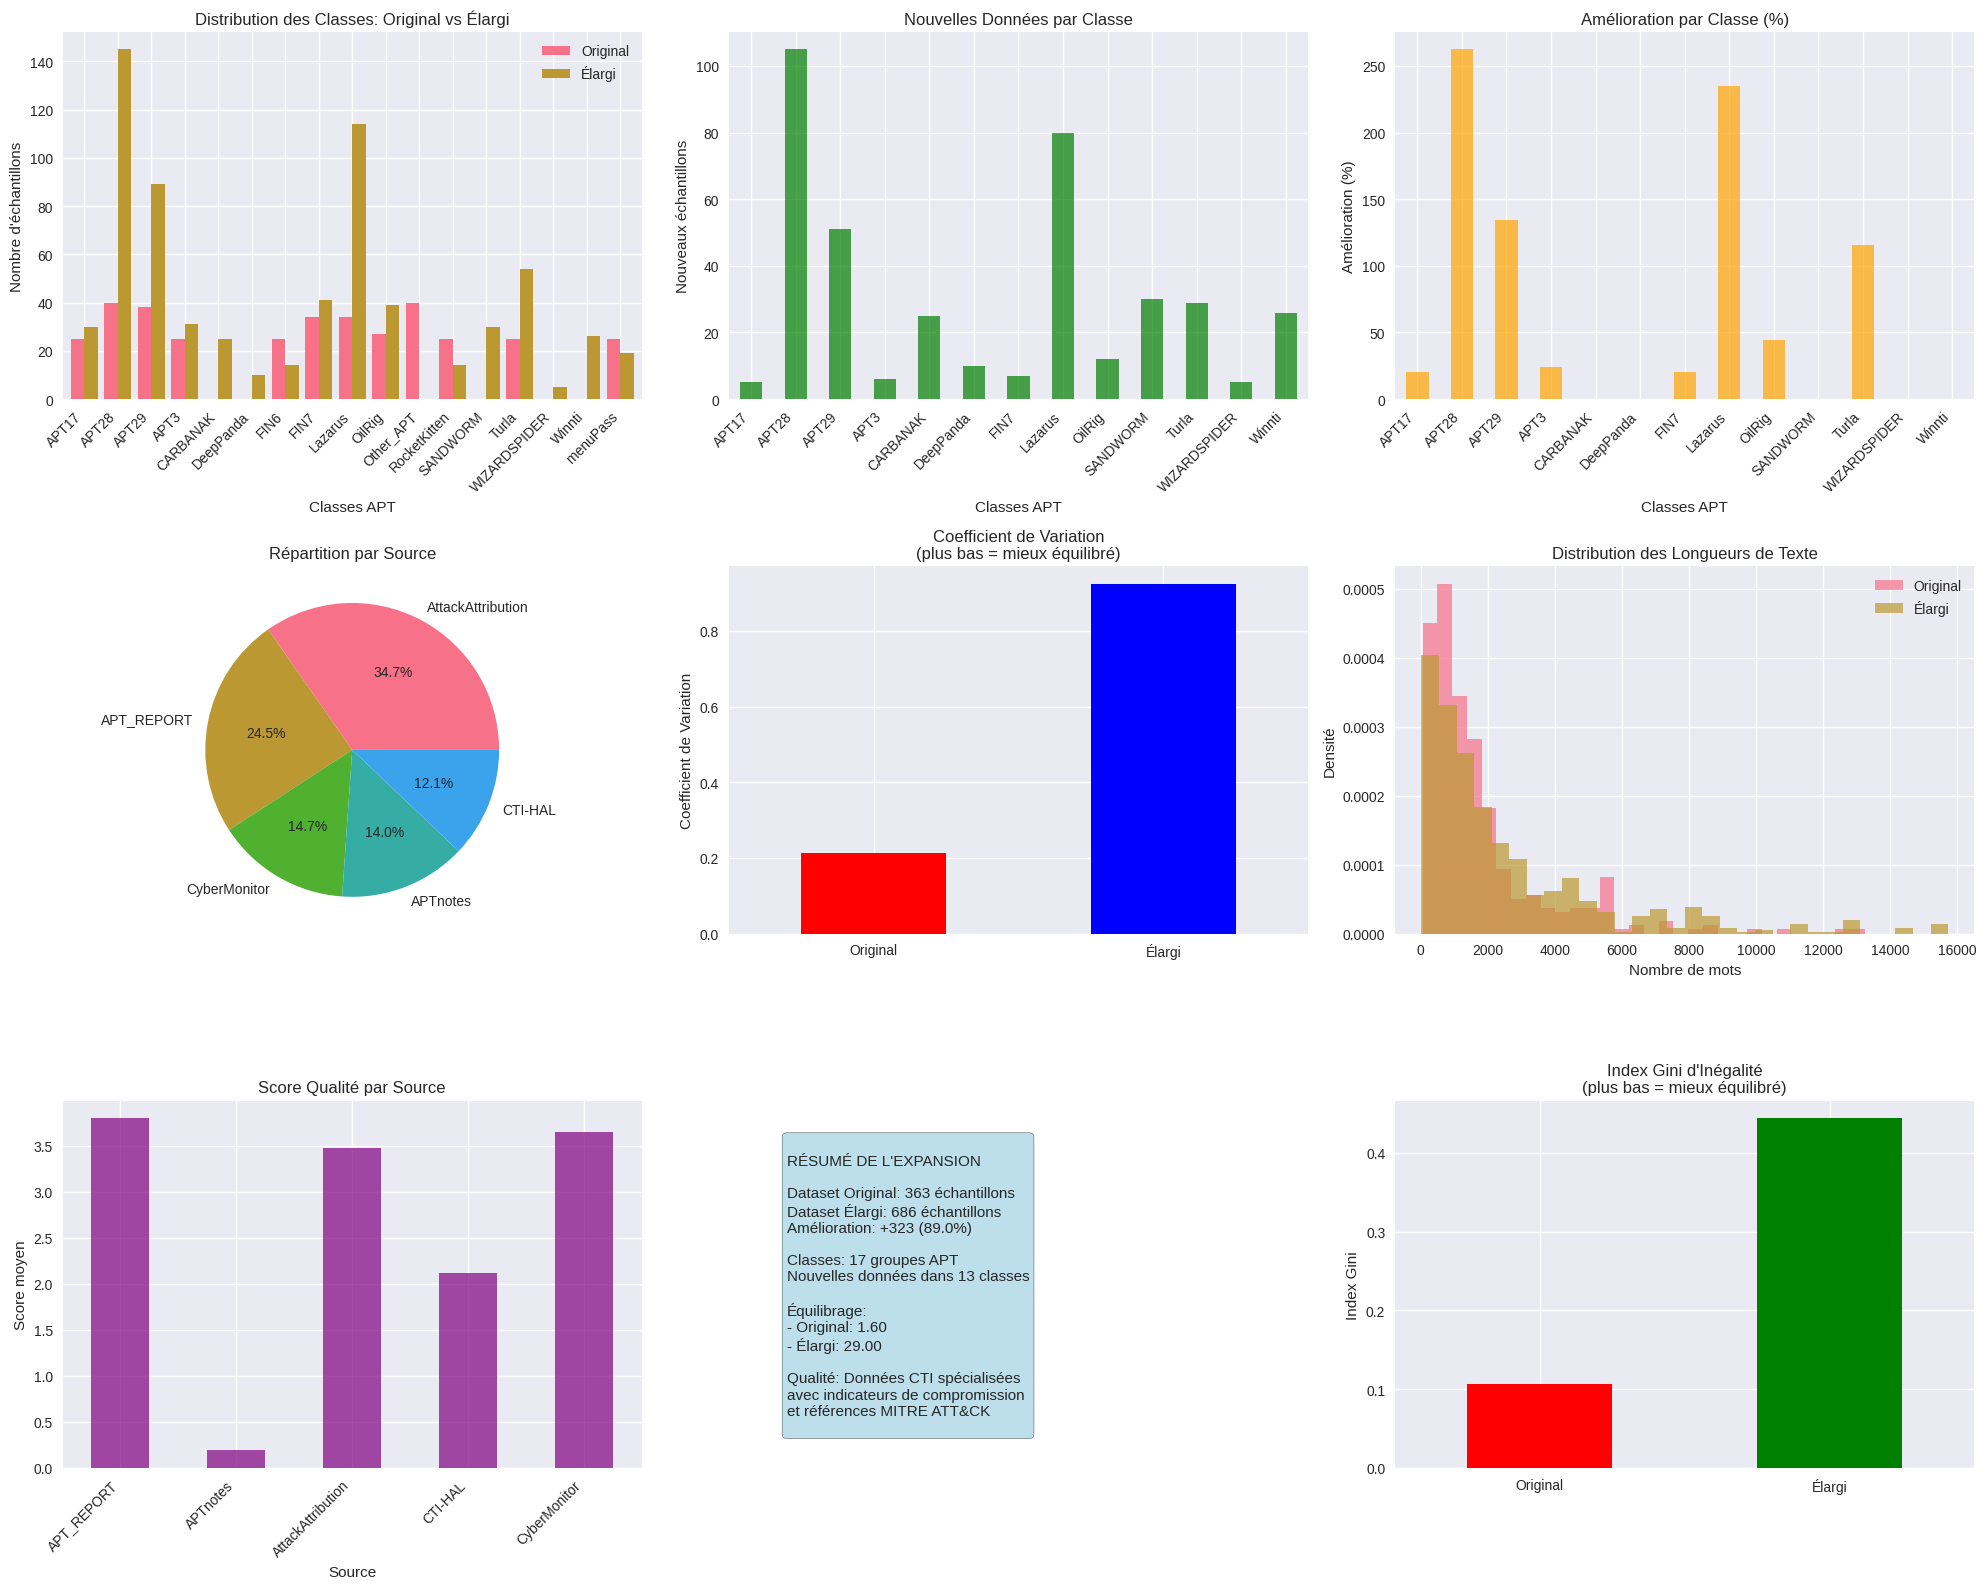

Création des nuages de mots...


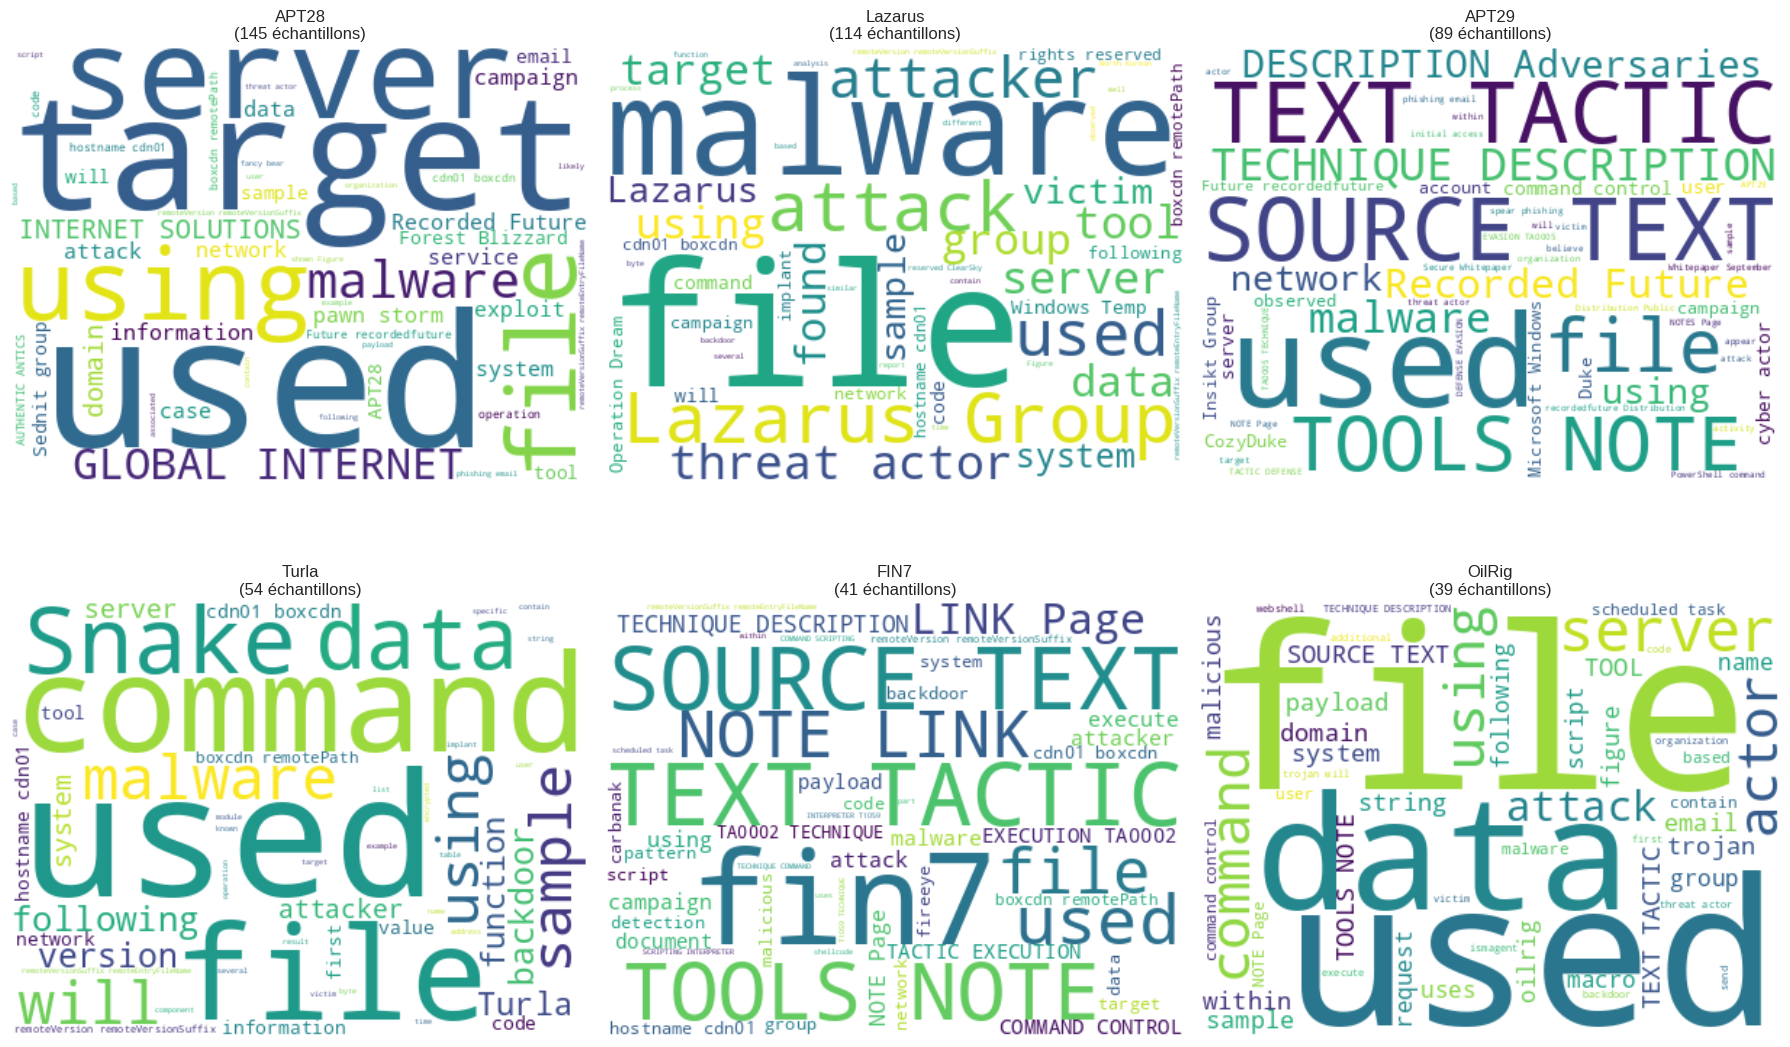

Rapport sauvegardé: dataset_expansion_report.json

CONCLUSIONS DE L'ANALYSE
• Expansion très significative - dataset bien enrichi
• Qualité des nouvelles données satisfaisante
• Dataset déséquilibré - considérer rééquilibrage

Fichiers générés:
• dataset_expansion_analysis.png - Visualisations principales
• apt_wordclouds.png - Nuages de mots par classe
• dataset_expansion_report.json - Rapport détaillé

Analyse terminée avec succès!


In [5]:
#!/usr/bin/env python3
"""
Visualisateur de Dataset CTI Élargi
Analyse et compare le dataset original vs élargi
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from collections import Counter
import re
import warnings
from wordcloud import WordCloud
from textstat import flesch_reading_ease, lexicon_count
warnings.filterwarnings('ignore')

class CTIDatasetVisualizer:
    def __init__(self, original_path="cti_datasets/processed/training_dataset.csv", 
                 expanded_path="expanded_cti_datasets/analysis_results/expanded_training_dataset.csv"):
        """Initialise le visualisateur"""
        self.original_path = original_path
        self.expanded_path = expanded_path
        self.original_df = None
        self.expanded_df = None
        
        # Configuration pour les graphiques
        plt.style.use('seaborn-v0_8')
        sns.set_palette("husl")
        
    def load_datasets(self):
        """Charge les datasets original et élargi"""
        print("Chargement des datasets...")
        
        # Dataset original
        if Path(self.original_path).exists():
            self.original_df = pd.read_csv(self.original_path)
            print(f"Dataset original: {len(self.original_df)} échantillons")
        else:
            print(f"Dataset original non trouvé: {self.original_path}")
            return False
        
        # Dataset élargi
        if Path(self.expanded_path).exists():
            self.expanded_df = pd.read_csv(self.expanded_path)
            print(f"Dataset élargi: {len(self.expanded_df)} échantillons")
        else:
            print(f"Dataset élargi non trouvé: {self.expanded_path}")
            return False
        
        return True
    
    def analyze_basic_stats(self):
        """Analyse les statistiques de base"""
        print("\n" + "="*60)
        print("ANALYSE COMPARATIVE DES DATASETS")
        print("="*60)
        
        # Statistiques générales
        original_size = len(self.original_df)
        expanded_size = len(self.expanded_df)
        new_samples = expanded_size - original_size
        improvement = (new_samples / original_size) * 100
        
        print(f"Dataset original:    {original_size:,} échantillons")
        print(f"Dataset élargi:      {expanded_size:,} échantillons")
        print(f"Nouvelles données:   {new_samples:,} échantillons (+{improvement:.1f}%)")
        
        # Classes
        original_classes = set(self.original_df['label'].unique())
        expanded_classes = set(self.expanded_df['label'].unique())
        
        print(f"\nClasses originales:  {len(original_classes)}")
        print(f"Classes élargies:    {len(expanded_classes)}")
        
        if expanded_classes - original_classes:
            print(f"Nouvelles classes:   {expanded_classes - original_classes}")
        
        # Sources de données
        if 'source' in self.expanded_df.columns:
            sources = self.expanded_df['source'].value_counts()
            print(f"\nSources dans le dataset élargi:")
            for source, count in sources.items():
                print(f"  {source}: {count} échantillons")
        
        return {
            'original_size': original_size,
            'expanded_size': expanded_size,
            'new_samples': new_samples,
            'improvement_pct': improvement
        }
    
    def analyze_class_distribution(self):
        """Analyse la distribution des classes"""
        print("\n" + "="*50)
        print("DISTRIBUTION DES CLASSES")
        print("="*50)
        
        # Distribution originale vs élargie
        original_dist = self.original_df['label'].value_counts()
        expanded_dist = self.expanded_df['label'].value_counts()
        
        # Créer un DataFrame de comparaison
        comparison_df = pd.DataFrame({
            'Original': original_dist,
            'Élargi': expanded_dist,
        }).fillna(0).astype(int)
        
        comparison_df['Nouveau'] = comparison_df['Élargi'] - comparison_df['Original']
        comparison_df['Amélioration %'] = ((comparison_df['Nouveau'] / comparison_df['Original']) * 100).fillna(0)
        
        print("Comparaison par classe:")
        print(comparison_df.sort_values('Élargi', ascending=False))
        
        # Statistiques d'équilibrage
        original_balance = original_dist.max() / original_dist.min()
        expanded_balance = expanded_dist.max() / expanded_dist.min()
        
        print(f"\nRatio d'équilibrage:")
        print(f"  Original: {original_balance:.2f}")
        print(f"  Élargi:   {expanded_balance:.2f}")
        
        if expanded_balance < original_balance:
            print(f"  Amélioration: -{original_balance - expanded_balance:.2f}")
        else:
            print(f"  Dégradation: +{expanded_balance - original_balance:.2f}")
        
        return comparison_df
    
    def analyze_text_quality(self, sample_size=100):
        """Analyse la qualité des textes"""
        print("\n" + "="*50)
        print("ANALYSE DE LA QUALITÉ DES TEXTES")
        print("="*50)
        
        # Échantillonner pour l'analyse
        original_sample = self.original_df.sample(min(sample_size, len(self.original_df)), random_state=42)
        
        # Nouvelles données seulement
        if 'source' in self.expanded_df.columns:
            new_data = self.expanded_df[self.expanded_df['source'] != 'original']
            if len(new_data) > 0:
                new_sample = new_data.sample(min(sample_size, len(new_data)), random_state=42)
            else:
                new_sample = pd.DataFrame()
        else:
            # Approximation : prendre les dernières entrées
            new_sample = self.expanded_df.tail(min(sample_size, len(self.expanded_df) - len(self.original_df)))
        
        def analyze_text_metrics(df, name):
            if len(df) == 0:
                return {}
            
            # Calculs de métriques
            word_counts = df['text'].apply(lambda x: len(str(x).split()))
            char_counts = df['text'].apply(lambda x: len(str(x)))
            
            # Patterns CTI
            ioc_pattern = r'\b(md5|sha1|sha256|ip|domain|url|hash)\b'
            mitre_pattern = r'\b(t\d{4}|mitre|att&ck|technique)\b'
            
            ioc_presence = df['text'].apply(lambda x: bool(re.search(ioc_pattern, str(x).lower())))
            mitre_presence = df['text'].apply(lambda x: bool(re.search(mitre_pattern, str(x).lower())))
            
            # Mots-clés cybersécurité
            cyber_keywords = ['malware', 'attack', 'threat', 'vulnerability', 'exploit', 'phishing', 'ransomware']
            cyber_scores = df['text'].apply(lambda x: sum(1 for kw in cyber_keywords if kw in str(x).lower()))
            
            metrics = {
                'name': name,
                'avg_words': word_counts.mean(),
                'std_words': word_counts.std(),
                'avg_chars': char_counts.mean(),
                'std_chars': char_counts.std(),
                'ioc_percentage': ioc_presence.sum() / len(df) * 100,
                'mitre_percentage': mitre_presence.sum() / len(df) * 100,
                'avg_cyber_score': cyber_scores.mean(),
                'quality_score': (ioc_presence.sum() + mitre_presence.sum() + (cyber_scores > 0).sum()) / (len(df) * 3) * 100
            }
            
            return metrics
        
        # Analyser les deux datasets
        original_metrics = analyze_text_metrics(original_sample, "Original")
        new_metrics = analyze_text_metrics(new_sample, "Nouvelles données") if len(new_sample) > 0 else {}
        
        # Affichage
        print(f"Analyse sur {len(original_sample)} échantillons originaux et {len(new_sample)} nouveaux")
        print("\nMétriques de qualité:")
        
        if original_metrics:
            print(f"\nDataset Original:")
            print(f"  Mots moyens: {original_metrics['avg_words']:.1f} ± {original_metrics['std_words']:.1f}")
            print(f"  Caractères moyens: {original_metrics['avg_chars']:.1f}")
            print(f"  IoCs détectés: {original_metrics['ioc_percentage']:.1f}%")
            print(f"  MITRE ATT&CK: {original_metrics['mitre_percentage']:.1f}%")
            print(f"  Score cyber: {original_metrics['avg_cyber_score']:.1f}")
            print(f"  Score qualité global: {original_metrics['quality_score']:.1f}%")
        
        if new_metrics:
            print(f"\nNouvelles Données:")
            print(f"  Mots moyens: {new_metrics['avg_words']:.1f} ± {new_metrics['std_words']:.1f}")
            print(f"  Caractères moyens: {new_metrics['avg_chars']:.1f}")
            print(f"  IoCs détectés: {new_metrics['ioc_percentage']:.1f}%")
            print(f"  MITRE ATT&CK: {new_metrics['mitre_percentage']:.1f}%")
            print(f"  Score cyber: {new_metrics['avg_cyber_score']:.1f}")
            print(f"  Score qualité global: {new_metrics['quality_score']:.1f}%")
            
            # Comparaison
            if original_metrics:
                quality_diff = new_metrics['quality_score'] - original_metrics['quality_score']
                print(f"\nComparaison qualité: {quality_diff:+.1f} points")
                if quality_diff > 5:
                    print("  → Amélioration significative de la qualité")
                elif quality_diff > 0:
                    print("  → Légère amélioration de la qualité")
                elif quality_diff > -5:
                    print("  → Qualité similaire")
                else:
                    print("  → Dégradation de la qualité")
        
        return original_metrics, new_metrics
    
    def create_visualizations(self, comparison_df, stats):
        """Crée les visualisations"""
        print("\nCréation des visualisations...")
        
        fig = plt.figure(figsize=(20, 16))
        
        # 1. Comparaison des distributions (2x2 grid)
        ax1 = plt.subplot(3, 3, 1)
        comparison_df[['Original', 'Élargi']].plot(kind='bar', ax=ax1, width=0.8)
        ax1.set_title('Distribution des Classes: Original vs Élargi', fontsize=12)
        ax1.set_xlabel('Classes APT')
        ax1.set_ylabel('Nombre d\'échantillons')
        ax1.legend()
        plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
        
        # 2. Nouvelles données par classe
        ax2 = plt.subplot(3, 3, 2)
        new_data = comparison_df['Nouveau'][comparison_df['Nouveau'] > 0]
        if len(new_data) > 0:
            new_data.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
            ax2.set_title('Nouvelles Données par Classe', fontsize=12)
            ax2.set_xlabel('Classes APT')
            ax2.set_ylabel('Nouveaux échantillons')
            plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
        
        # 3. Amélioration en pourcentage
        ax3 = plt.subplot(3, 3, 3)
        improvements = comparison_df['Amélioration %'][comparison_df['Amélioration %'] > 0]
        if len(improvements) > 0:
            improvements.plot(kind='bar', ax=ax3, color='orange', alpha=0.7)
            ax3.set_title('Amélioration par Classe (%)', fontsize=12)
            ax3.set_xlabel('Classes APT')
            ax3.set_ylabel('Amélioration (%)')
            plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
        
        # 4. Sources de données (si disponible)
        if 'source' in self.expanded_df.columns:
            ax4 = plt.subplot(3, 3, 4)
            source_counts = self.expanded_df['source'].value_counts()
            ax4.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%')
            ax4.set_title('Répartition par Source', fontsize=12)
        
        # 5. Distribution équilibrée
        ax5 = plt.subplot(3, 3, 5)
        original_dist = self.original_df['label'].value_counts()
        expanded_dist = self.expanded_df['label'].value_counts()
        
        # Coefficient de variation
        original_cv = original_dist.std() / original_dist.mean()
        expanded_cv = expanded_dist.std() / expanded_dist.mean()
        
        cv_data = pd.Series([original_cv, expanded_cv], index=['Original', 'Élargi'])
        cv_data.plot(kind='bar', ax=ax5, color=['red', 'blue'])
        ax5.set_title('Coefficient de Variation\n(plus bas = mieux équilibré)', fontsize=12)
        ax5.set_ylabel('Coefficient de Variation')
        plt.setp(ax5.get_xticklabels(), rotation=0)
        
        # 6. Distribution des longueurs de texte
        ax6 = plt.subplot(3, 3, 6)
        original_lengths = self.original_df['text'].apply(lambda x: len(str(x).split()))
        expanded_lengths = self.expanded_df['text'].apply(lambda x: len(str(x).split()))
        
        ax6.hist(original_lengths, bins=30, alpha=0.7, label='Original', density=True)
        ax6.hist(expanded_lengths, bins=30, alpha=0.7, label='Élargi', density=True)
        ax6.set_title('Distribution des Longueurs de Texte', fontsize=12)
        ax6.set_xlabel('Nombre de mots')
        ax6.set_ylabel('Densité')
        ax6.legend()
        
        # 7. Métriques de qualité par source (si disponible)
        if 'source' in self.expanded_df.columns:
            ax7 = plt.subplot(3, 3, 7)
            
            # Calculer score qualité par source
            cyber_keywords = ['malware', 'attack', 'threat', 'vulnerability', 'exploit']
            
            def quality_score(text):
                return sum(1 for kw in cyber_keywords if kw in str(text).lower())
            
            quality_by_source = self.expanded_df.groupby('source')['text'].apply(
                lambda x: x.apply(quality_score).mean()
            )
            
            quality_by_source.plot(kind='bar', ax=ax7, color='purple', alpha=0.7)
            ax7.set_title('Score Qualité par Source', fontsize=12)
            ax7.set_xlabel('Source')
            ax7.set_ylabel('Score moyen')
            plt.setp(ax7.get_xticklabels(), rotation=45, ha='right')
        
        # 8. Résumé statistique
        ax8 = plt.subplot(3, 3, 8)
        ax8.axis('off')
        
        summary_text = f"""
RÉSUMÉ DE L'EXPANSION

Dataset Original: {stats['original_size']:,} échantillons
Dataset Élargi: {stats['expanded_size']:,} échantillons
Amélioration: +{stats['new_samples']:,} ({stats['improvement_pct']:.1f}%)

Classes: {len(comparison_df)} groupes APT
Nouvelles données dans {(comparison_df['Nouveau'] > 0).sum()} classes

Équilibrage:
- Original: {original_dist.max() / original_dist.min():.2f}
- Élargi: {expanded_dist.max() / expanded_dist.min():.2f}

Qualité: Données CTI spécialisées
avec indicateurs de compromission
et références MITRE ATT&CK
        """
        
        ax8.text(0.1, 0.9, summary_text, transform=ax8.transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        
        # 9. Évolution de l'équilibrage
        ax9 = plt.subplot(3, 3, 9)
        
        # Calculer l'index Gini pour mesurer l'inégalité
        def gini_coefficient(x):
            x = np.sort(x)
            n = len(x)
            cumulative = np.cumsum(x)
            return (2 * np.sum((np.arange(1, n+1) * x))) / (n * cumulative[-1]) - (n + 1) / n
        
        original_gini = gini_coefficient(original_dist.values)
        expanded_gini = gini_coefficient(expanded_dist.values)
        
        gini_data = pd.Series([original_gini, expanded_gini], index=['Original', 'Élargi'])
        gini_data.plot(kind='bar', ax=ax9, color=['red', 'green'])
        ax9.set_title('Index Gini d\'Inégalité\n(plus bas = mieux équilibré)', fontsize=12)
        ax9.set_ylabel('Index Gini')
        plt.setp(ax9.get_xticklabels(), rotation=0)
        
        plt.tight_layout()
        plt.savefig('dataset_expansion_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return True
    
    def create_word_clouds(self, max_classes=6):
        """Crée des nuages de mots pour les principales classes"""
        print("Création des nuages de mots...")
        
        top_classes = self.expanded_df['label'].value_counts().head(max_classes).index
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        for i, class_name in enumerate(top_classes):
            if i >= len(axes):
                break
                
            class_texts = self.expanded_df[self.expanded_df['label'] == class_name]['text']
            combined_text = ' '.join(class_texts.astype(str))
            
            # Nettoyer le texte
            combined_text = re.sub(r'http\S+', '', combined_text)
            combined_text = re.sub(r'[^\w\s]', ' ', combined_text)
            combined_text = ' '.join([word for word in combined_text.split() if len(word) > 3])
            
            if len(combined_text) > 100:
                wordcloud = WordCloud(
                    width=400, height=300,
                    background_color='white',
                    max_words=50,
                    colormap='viridis'
                ).generate(combined_text)
                
                axes[i].imshow(wordcloud, interpolation='bilinear')
                axes[i].set_title(f'{class_name}\n({len(class_texts)} échantillons)', fontsize=12)
                axes[i].axis('off')
            else:
                axes[i].text(0.5, 0.5, f'{class_name}\nTexte insuffisant', 
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')
        
        # Supprimer les axes non utilisés
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.savefig('apt_wordclouds.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_analysis_report(self, comparison_df, stats, original_metrics, new_metrics):
        """Sauvegarde un rapport d'analyse détaillé"""
        report = {
            'expansion_summary': stats,
            'class_comparison': comparison_df.to_dict(),
            'text_quality': {
                'original': original_metrics,
                'new_data': new_metrics
            },
            'recommendations': []
        }
        
        # Ajouter des recommandations
        if stats['improvement_pct'] > 50:
            report['recommendations'].append("Expansion très significative - dataset bien enrichi")
        elif stats['improvement_pct'] > 20:
            report['recommendations'].append("Expansion modérée - amélioration notable")
        else:
            report['recommendations'].append("Expansion limitée - considérer d'autres sources")
        
        if new_metrics and original_metrics:
            quality_diff = new_metrics['quality_score'] - original_metrics['quality_score']
            if quality_diff > 5:
                report['recommendations'].append("Qualité des nouvelles données excellente")
            elif quality_diff > 0:
                report['recommendations'].append("Qualité des nouvelles données satisfaisante")
            else:
                report['recommendations'].append("Surveiller la qualité des nouvelles données")
        
        # Balance du dataset
        expanded_dist = self.expanded_df['label'].value_counts()
        balance_ratio = expanded_dist.max() / expanded_dist.min()
        if balance_ratio < 3:
            report['recommendations'].append("Dataset bien équilibré pour l'entraînement")
        elif balance_ratio < 5:
            report['recommendations'].append("Équilibrage acceptable - possibles ajustements")
        else:
            report['recommendations'].append("Dataset déséquilibré - considérer rééquilibrage")
        
        with open('dataset_expansion_report.json', 'w') as f:
            json.dump(report, f, indent=2, default=str)
        
        print("Rapport sauvegardé: dataset_expansion_report.json")
        return report
    
    def run_complete_analysis(self):
        """Lance l'analyse complète"""
        print("ANALYSEUR DE DATASET CTI ÉLARGI")
        print("="*60)
        
        if not self.load_datasets():
            return False
        
        # Analyses
        stats = self.analyze_basic_stats()
        comparison_df = self.analyze_class_distribution()
        original_metrics, new_metrics = self.analyze_text_quality()
        
        # Visualisations
        self.create_visualizations(comparison_df, stats)
        self.create_word_clouds()
        
        # Rapport
        report = self.save_analysis_report(comparison_df, stats, original_metrics, new_metrics)
        
        print("\n" + "="*60)
        print("CONCLUSIONS DE L'ANALYSE")
        print("="*60)
        
        for rec in report['recommendations']:
            print(f"• {rec}")
        
        print(f"\nFichiers générés:")
        print(f"• dataset_expansion_analysis.png - Visualisations principales")
        print(f"• apt_wordclouds.png - Nuages de mots par classe")
        print(f"• dataset_expansion_report.json - Rapport détaillé")
        
        return True

# Lancement automatique
if __name__ == "__main__":
    print("Initialisation de l'analyseur de dataset...")
    
    visualizer = CTIDatasetVisualizer()
    
    if visualizer.run_complete_analysis():
        print("\nAnalyse terminée avec succès!")
    else:
        print("\nErreur: Impossible de charger les datasets")
        print("Vérifiez que les fichiers existent:")
        print(f"• {visualizer.original_path}")
        print(f"• {visualizer.expanded_path}")

# **Dataset élargi équilibré**

Équilibreur de Dataset CTI Élargi
Configuration:
  Dataset source: expanded_cti_datasets/analysis_results/expanded_training_dataset.csv
  Cible par classe: 45
  Maximum par classe: 55
ÉQUILIBRAGE DU DATASET CTI ÉLARGI
Chargement du dataset élargi...
Dataset élargi chargé: 686 échantillons, 16 classes

Distribution actuelle:
  APT28: 145
  Lazarus: 114
  APT29: 89
  Turla: 54
  FIN7: 41
  OilRig: 39
  APT3: 31
  APT17: 30
  SANDWORM: 30
  Winnti: 26
  CARBANAK: 25
  menuPass: 19
  RocketKitten: 14
  FIN6: 14
  DeepPanda: 10
  WIZARDSPIDER: 5

Ratio de déséquilibre actuel: 29.00

Gestion des classes disparues...
Classes manquantes détectées: {'Other_APT'}
Reconstitution de la classe Other_APT...
Regroupement en Other_APT: ['RocketKitten', 'FIN6', 'DeepPanda', 'WIZARDSPIDER']

Nettoyage et déduplication...
  Échantillons supprimés: 192
  Échantillons finaux: 494

Augmentation des classes sous-représentées (cible: 45)...

APT28: 86 échantillons
  Pas d'augmentation nécessaire

Lazarus: 66 

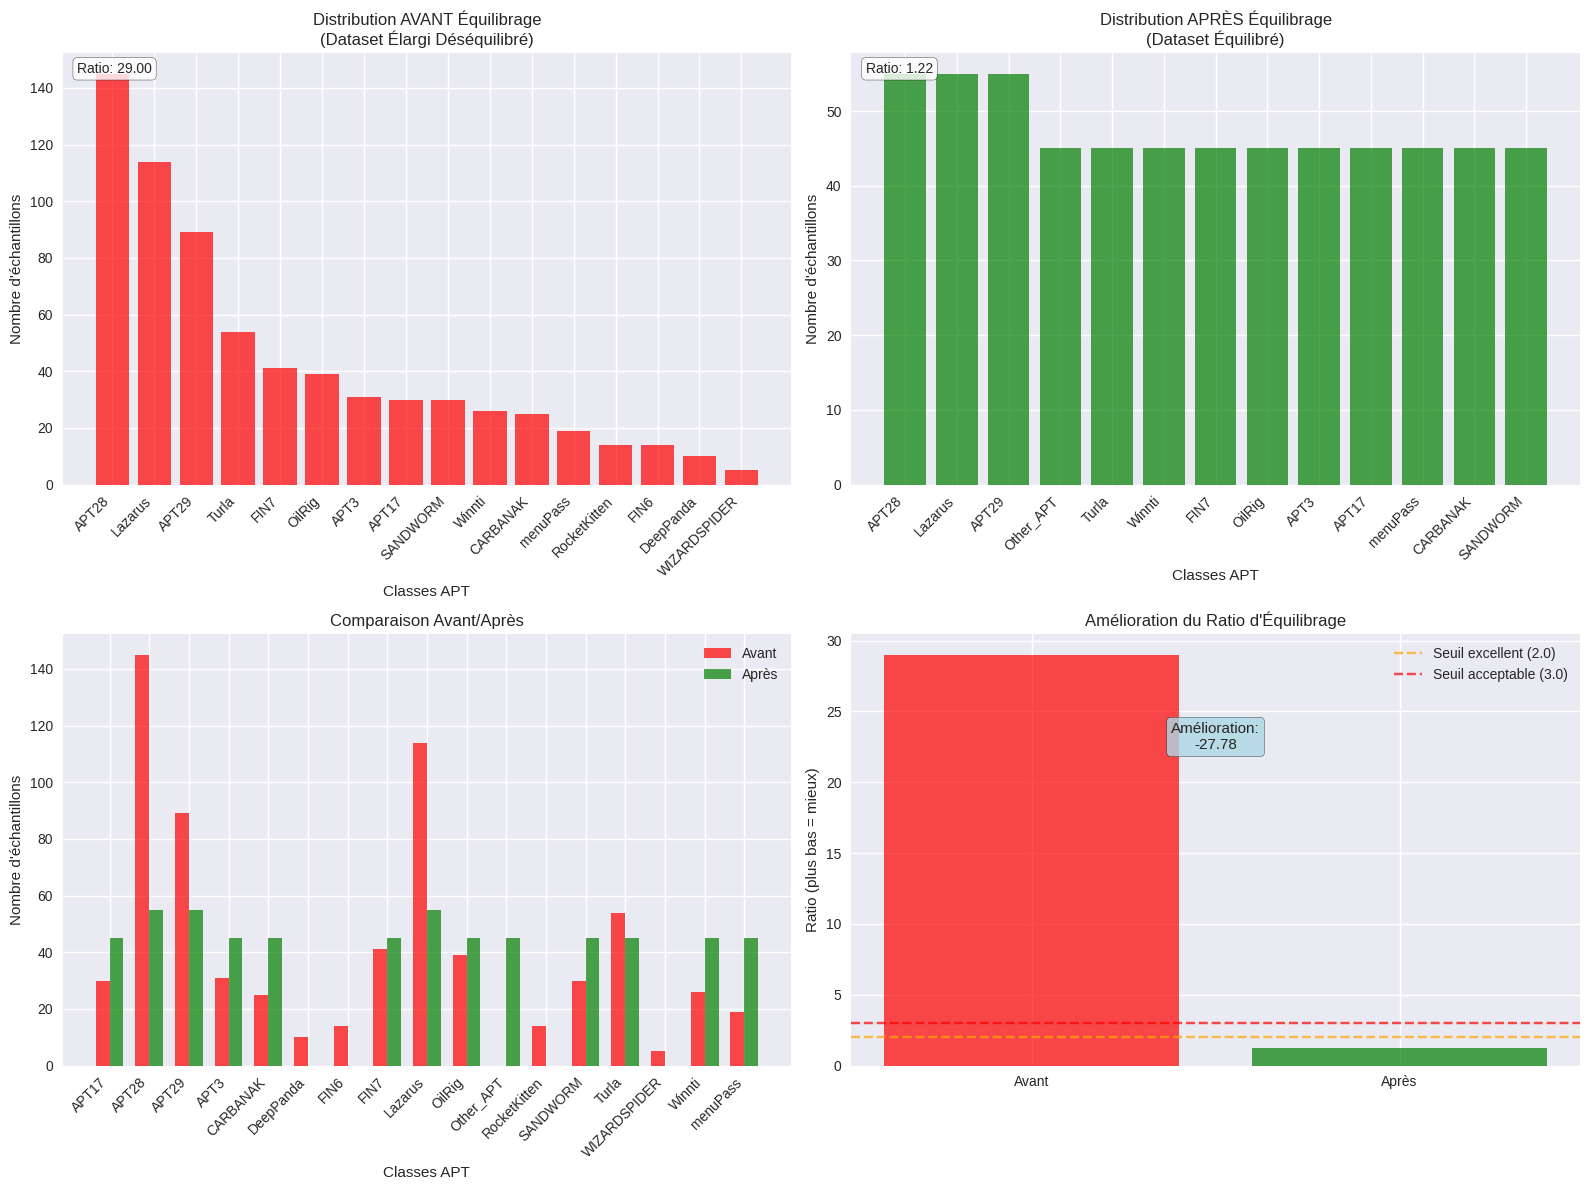

Visualisations sauvegardées: expanded_cti_datasets/balanced/balancing_comparison.png

🎯 ÉQUILIBRAGE TERMINÉ!
📊 Dataset équilibré prêt: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv
📊 615 échantillons, 13 classes

🚀 PROCHAINE ÉTAPE:
Modifier le script d'entraînement CySecBERT pour utiliser:
data_path = "expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv"


In [6]:
#!/usr/bin/env python3
"""
Équilibreur de Dataset CTI Élargi
Applique les techniques d'équilibrage au dataset élargi pour corriger le déséquilibre
"""

import pandas as pd
import numpy as np
from pathlib import Path
import re
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
from textstat import flesch_reading_ease, lexicon_count
from difflib import SequenceMatcher
import nltk
from nltk.tokenize import sent_tokenize
import warnings
warnings.filterwarnings('ignore')

class ExpandedDatasetBalancer:
    """Équilibreur pour le dataset CTI élargi"""
    
    def __init__(self, expanded_dataset_path="expanded_cti_datasets/analysis_results/expanded_training_dataset.csv"):
        self.expanded_dataset_path = expanded_dataset_path
        self.output_dir = Path("expanded_cti_datasets/balanced")
        self.output_dir.mkdir(exist_ok=True, parents=True)
        
        # Configuration d'équilibrage
        self.target_samples_per_class = 45  # Cible équilibrée
        self.min_samples_threshold = 15     # Seuil pour Other_APT
        self.max_samples_per_class = 55     # Plafond pour éviter domination
        
        # Patterns de nettoyage et augmentation
        self.cyber_synonyms = {
            'malware': ['malicious software', 'malicious code', 'threat'],
            'attacker': ['threat actor', 'adversary', 'cybercriminal'],
            'campaign': ['operation', 'activity', 'initiative'],
            'infiltration': ['penetration', 'breach', 'intrusion'],
            'exfiltration': ['data theft', 'data extraction', 'information stealing'],
            'persistence': ['maintaining access', 'sustained presence'],
            'reconnaissance': ['surveillance', 'information gathering']
        }
        
        # Stats de processing
        self.processing_stats = {}
        
        # Setup NLTK
        try:
            nltk.download('punkt', quiet=True)
        except:
            pass
    
    def load_expanded_dataset(self):
        """Charge le dataset élargi"""
        print("Chargement du dataset élargi...")
        
        if not Path(self.expanded_dataset_path).exists():
            print(f"Erreur: Dataset élargi non trouvé à {self.expanded_dataset_path}")
            return None
        
        df = pd.read_csv(self.expanded_dataset_path)
        print(f"Dataset élargi chargé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher la distribution actuelle
        current_distribution = df['label'].value_counts()
        print(f"\nDistribution actuelle:")
        for label, count in current_distribution.items():
            print(f"  {label}: {count}")
        
        # Calculer le ratio de déséquilibre
        balance_ratio = current_distribution.max() / current_distribution.min()
        print(f"\nRatio de déséquilibre actuel: {balance_ratio:.2f}")
        
        self.processing_stats['original'] = {
            'total_samples': len(df),
            'num_classes': df['label'].nunique(),
            'distribution': current_distribution.to_dict(),
            'balance_ratio': balance_ratio
        }
        
        return df
    
    def handle_disappeared_classes(self, df):
        """Gère les classes qui ont disparu (comme Other_APT)"""
        print("\nGestion des classes disparues...")
        
        # Classes attendues basées sur le dataset original
        expected_classes = ['APT17', 'APT28', 'APT29', 'APT3', 'FIN6', 'FIN7', 
                          'Lazarus', 'OilRig', 'RocketKitten', 'Turla', 'menuPass', 'Other_APT']
        
        current_classes = set(df['label'].unique())
        missing_classes = set(expected_classes) - current_classes
        
        if missing_classes:
            print(f"Classes manquantes détectées: {missing_classes}")
            
            # Si Other_APT manque, on peut la recréer en regroupant les plus petites classes
            if 'Other_APT' in missing_classes:
                print("Reconstitution de la classe Other_APT...")
                
                # Identifier les classes avec peu d'échantillons pour reconstituer Other_APT
                current_dist = df['label'].value_counts()
                small_classes = current_dist[current_dist < self.min_samples_threshold].index
                
                if len(small_classes) > 0:
                    print(f"Regroupement en Other_APT: {list(small_classes)}")
                    df.loc[df['label'].isin(small_classes), 'label'] = 'Other_APT'
        
        return df
    
    def extract_text_segments(self, text, segment_length=250, overlap=25):
        """Extrait des segments de texte pour l'augmentation"""
        words = text.split()
        
        if len(words) <= segment_length:
            return [text]
        
        segments = []
        start = 0
        
        while start < len(words):
            end = min(start + segment_length, len(words))
            segment = ' '.join(words[start:end])
            
            if len(segment.split()) >= 100:  # Minimum 100 mots
                segments.append(segment)
            
            start = end - overlap
            if start >= len(words) - overlap:
                break
        
        return segments
    
    def paraphrase_text(self, text):
        """Paraphrase un texte avec substitutions de synonymes"""
        paraphrased = text
        
        # Substitutions cybersécurité
        for original, synonyms in self.cyber_synonyms.items():
            if original in paraphrased.lower():
                synonym = random.choice(synonyms)
                paraphrased = re.sub(f'\\b{original}\\b', synonym, paraphrased, flags=re.IGNORECASE)
        
        # Réorganisation légère des phrases (si plus de 3 phrases)
        try:
            sentences = sent_tokenize(paraphrased)
            if len(sentences) > 3:
                # Garder première et dernière, mélanger le milieu
                middle = sentences[1:-1]
                random.shuffle(middle)
                paraphrased = sentences[0] + ' ' + ' '.join(middle) + ' ' + sentences[-1]
        except:
            pass
        
        return paraphrased
    
    def augment_underrepresented_classes(self, df):
        """Augmente les classes sous-représentées"""
        print(f"\nAugmentation des classes sous-représentées (cible: {self.target_samples_per_class})...")
        
        current_distribution = df['label'].value_counts()
        augmented_data = []
        
        for label in current_distribution.index:
            current_count = current_distribution[label]
            class_data = df[df['label'] == label].copy()
            
            print(f"\n{label}: {current_count} échantillons")
            
            if current_count >= self.target_samples_per_class:
                print(f"  Pas d'augmentation nécessaire")
                continue
            
            needed = self.target_samples_per_class - current_count
            print(f"  Augmentation nécessaire: +{needed}")
            
            generated = 0
            
            # Méthode 1: Segmentation des textes longs
            for _, row in class_data.iterrows():
                if generated >= needed:
                    break
                
                if len(str(row['text']).split()) > 350:
                    segments = self.extract_text_segments(str(row['text']))
                    
                    for segment in segments[1:]:  # Ignorer le premier (original)
                        if generated >= needed:
                            break
                        
                        new_row = row.copy()
                        new_row['text'] = segment
                        new_row['augmentation_method'] = 'segmentation'
                        
                        augmented_data.append(new_row)
                        generated += 1
            
            print(f"    Segmentation: +{generated}")
            
            # Méthode 2: Paraphrase si encore insuffisant
            remaining = needed - generated
            if remaining > 0:
                print(f"    Paraphrase nécessaire: +{remaining}")
                
                # Prendre les meilleurs textes pour paraphrase
                best_texts = class_data.nlargest(min(remaining * 2, len(class_data)), 
                                                lambda x: len(str(x['text']).split()))
                
                paraphrase_count = 0
                for _, row in best_texts.iterrows():
                    if paraphrase_count >= remaining:
                        break
                    
                    paraphrased_text = self.paraphrase_text(str(row['text']))
                    
                    if paraphrased_text != str(row['text']):
                        new_row = row.copy()
                        new_row['text'] = paraphrased_text
                        new_row['augmentation_method'] = 'paraphrase'
                        
                        augmented_data.append(new_row)
                        paraphrase_count += 1
                
                print(f"    Paraphrase: +{paraphrase_count}")
                generated += paraphrase_count
            
            # Méthode 3: Duplication contrôlée si encore insuffisant
            remaining = needed - generated
            if remaining > 0:
                print(f"    Duplication contrôlée: +{remaining}")
                
                prefixes = [
                    "According to threat intelligence, ",
                    "Security research indicates that ",
                    "Analysis reveals that ",
                    "Investigation shows that "
                ]
                
                for i in range(remaining):
                    base_row = class_data.iloc[i % len(class_data)].copy()
                    prefix = random.choice(prefixes)
                    
                    new_row = base_row.copy()
                    new_row['text'] = prefix + str(base_row['text'])
                    new_row['augmentation_method'] = 'duplication'
                    
                    augmented_data.append(new_row)
            
            print(f"  Total généré: +{generated + remaining}")
        
        # Ajouter les données augmentées
        if augmented_data:
            augmented_df = pd.DataFrame(augmented_data)
            df = pd.concat([df, augmented_df], ignore_index=True)
        
        return df
    
    def balance_overrepresented_classes(self, df):
        """Équilibre les classes sur-représentées"""
        print(f"\nÉquilibrage des classes sur-représentées (max: {self.max_samples_per_class})...")
        
        current_distribution = df['label'].value_counts()
        balanced_data = []
        
        for label in current_distribution.index:
            current_count = current_distribution[label]
            class_data = df[df['label'] == label].copy()
            
            if current_count <= self.max_samples_per_class:
                print(f"  {label}: {current_count} (pas de réduction)")
                balanced_data.append(class_data)
            else:
                print(f"  {label}: {current_count} -> {self.max_samples_per_class} (réduction)")
                
                # Prioriser les données originales et de qualité
                if 'augmentation_method' in class_data.columns:
                    original_data = class_data[class_data['augmentation_method'] == 'original']
                    other_data = class_data[class_data['augmentation_method'] != 'original']
                else:
                    # Si pas de colonne augmentation_method, prioriser par source
                    if 'source' in class_data.columns:
                        # Prioriser les sources originales
                        priority_sources = ['AttackAttribution', 'CTI-HAL']
                        original_data = class_data[class_data['source'].isin(priority_sources)]
                        other_data = class_data[~class_data['source'].isin(priority_sources)]
                    else:
                        # Division arbitraire si pas d'infos
                        split_point = len(class_data) // 2
                        original_data = class_data.iloc[:split_point]
                        other_data = class_data.iloc[split_point:]
                
                selected_data = []
                
                # Garder autant d'originaux que possible
                if len(original_data) >= self.max_samples_per_class:
                    # Échantillonner parmi les originaux
                    selected = original_data.sample(n=self.max_samples_per_class, random_state=42)
                    selected_data.append(selected)
                else:
                    # Tous les originaux + compléter avec les autres
                    selected_data.append(original_data)
                    remaining_needed = self.max_samples_per_class - len(original_data)
                    
                    if remaining_needed > 0 and len(other_data) > 0:
                        additional = other_data.sample(
                            n=min(remaining_needed, len(other_data)), 
                            random_state=42
                        )
                        selected_data.append(additional)
                
                balanced_data.extend(selected_data)
        
        # Recombiner
        final_df = pd.concat(balanced_data, ignore_index=True)
        return final_df
    
    def clean_and_deduplicate(self, df):
        """Nettoie et déduplique le dataset"""
        print("\nNettoyage et déduplication...")
        
        initial_count = len(df)
        
        # Nettoyer le texte
        def clean_text(text):
            if pd.isna(text):
                return ""
            
            text = str(text)
            # Supprimer URLs, emails, IPs excessifs
            text = re.sub(r'http[s]?://[^\s]+', '[URL]', text)
            text = re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '[EMAIL]', text)
            text = re.sub(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', '[IP]', text)
            
            # Normaliser espaces
            text = re.sub(r'\s+', ' ', text)
            text = text.strip()
            
            return text
        
        df['text'] = df['text'].apply(clean_text)
        
        # Supprimer les textes trop courts
        df = df[df['text'].str.len() > 100].reset_index(drop=True)
        
        # Déduplication basique par longueur et début de texte
        df['text_hash'] = df['text'].apply(lambda x: hash(x[:200]))
        df = df.drop_duplicates(subset=['label', 'text_hash']).drop(columns=['text_hash'])
        
        final_count = len(df)
        removed = initial_count - final_count
        
        print(f"  Échantillons supprimés: {removed}")
        print(f"  Échantillons finaux: {final_count}")
        
        return df
    
    def create_balanced_dataset(self):
        """Crée le dataset équilibré complet"""
        print("ÉQUILIBRAGE DU DATASET CTI ÉLARGI")
        print("=" * 60)
        
        # 1. Charger le dataset élargi
        df = self.load_expanded_dataset()
        if df is None:
            return None
        
        # 2. Gérer les classes disparues
        df = self.handle_disappeared_classes(df)
        
        # 3. Nettoyer
        df = self.clean_and_deduplicate(df)
        
        # 4. Augmenter les classes sous-représentées
        df = self.augment_underrepresented_classes(df)
        
        # 5. Équilibrer les classes sur-représentées
        df = self.balance_overrepresented_classes(df)
        
        # 6. Nettoyage final
        df = self.clean_and_deduplicate(df)
        
        # Statistiques finales
        final_distribution = df['label'].value_counts()
        final_balance_ratio = final_distribution.max() / final_distribution.min()
        
        print(f"\n" + "=" * 60)
        print("RÉSULTATS DE L'ÉQUILIBRAGE")
        print("=" * 60)
        
        print(f"Distribution finale équilibrée:")
        for label, count in final_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"\nMétriques d'équilibrage:")
        print(f"  Ratio avant: {self.processing_stats['original']['balance_ratio']:.2f}")
        print(f"  Ratio après: {final_balance_ratio:.2f}")
        improvement = self.processing_stats['original']['balance_ratio'] - final_balance_ratio
        print(f"  Amélioration: {improvement:.2f}")
        
        if final_balance_ratio < 2.0:
            print("  ✅ Excellent équilibrage (ratio < 2.0)")
        elif final_balance_ratio < 3.0:
            print("  ✅ Bon équilibrage (ratio < 3.0)")
        else:
            print("  ⚠️ Équilibrage à améliorer (ratio ≥ 3.0)")
        
        # Analyser les méthodes d'augmentation
        if 'augmentation_method' in df.columns:
            aug_methods = df['augmentation_method'].value_counts()
            print(f"\nMéthodes d'augmentation utilisées:")
            for method, count in aug_methods.items():
                print(f"  {method}: {count}")
        
        # Sauvegarder
        balanced_path = self.output_dir / 'balanced_expanded_training_dataset.csv'
        df.to_csv(balanced_path, index=False)
        
        # Métadonnées
        metadata = {
            'processing_date': pd.Timestamp.now().isoformat(),
            'original_dataset': self.expanded_dataset_path,
            'total_samples': len(df),
            'num_classes': df['label'].nunique(),
            'target_samples_per_class': self.target_samples_per_class,
            'max_samples_per_class': self.max_samples_per_class,
            'final_balance_ratio': final_balance_ratio,
            'class_distribution': final_distribution.to_dict(),
            'processing_stats': self.processing_stats
        }
        
        metadata_path = self.output_dir / 'balancing_metadata.json'
        with open(metadata_path, 'w') as f:
            json.dump(metadata, f, indent=2, default=str)
        
        print(f"\n💾 Fichiers générés:")
        print(f"  Dataset équilibré: {balanced_path}")
        print(f"  Métadonnées: {metadata_path}")
        
        return df, balanced_path
    
    def create_comparison_visualization(self, df):
        """Crée des visualisations de comparaison avant/après"""
        print("\nCréation des visualisations...")
        
        # Charger le dataset original pour comparaison
        original_df = pd.read_csv(self.expanded_dataset_path)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Distribution avant équilibrage
        original_dist = original_df['label'].value_counts()
        ax1.bar(range(len(original_dist)), original_dist.values, alpha=0.7, color='red')
        ax1.set_title('Distribution AVANT Équilibrage\n(Dataset Élargi Déséquilibré)', fontsize=12)
        ax1.set_xlabel('Classes APT')
        ax1.set_ylabel('Nombre d\'échantillons')
        ax1.set_xticks(range(len(original_dist)))
        ax1.set_xticklabels(original_dist.index, rotation=45, ha='right')
        
        # Ajouter le ratio
        original_ratio = original_dist.max() / original_dist.min()
        ax1.text(0.02, 0.98, f'Ratio: {original_ratio:.2f}', transform=ax1.transAxes, 
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # 2. Distribution après équilibrage
        balanced_dist = df['label'].value_counts()
        ax2.bar(range(len(balanced_dist)), balanced_dist.values, alpha=0.7, color='green')
        ax2.set_title('Distribution APRÈS Équilibrage\n(Dataset Équilibré)', fontsize=12)
        ax2.set_xlabel('Classes APT')
        ax2.set_ylabel('Nombre d\'échantillons')
        ax2.set_xticks(range(len(balanced_dist)))
        ax2.set_xticklabels(balanced_dist.index, rotation=45, ha='right')
        
        # Ajouter le ratio
        balanced_ratio = balanced_dist.max() / balanced_dist.min()
        ax2.text(0.02, 0.98, f'Ratio: {balanced_ratio:.2f}', transform=ax2.transAxes, 
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # 3. Comparaison directe
        comparison_df = pd.DataFrame({
            'Avant': original_dist,
            'Après': balanced_dist
        }).fillna(0)
        
        x = np.arange(len(comparison_df))
        width = 0.35
        
        ax3.bar(x - width/2, comparison_df['Avant'], width, label='Avant', alpha=0.7, color='red')
        ax3.bar(x + width/2, comparison_df['Après'], width, label='Après', alpha=0.7, color='green')
        ax3.set_title('Comparaison Avant/Après', fontsize=12)
        ax3.set_xlabel('Classes APT')
        ax3.set_ylabel('Nombre d\'échantillons')
        ax3.set_xticks(x)
        ax3.set_xticklabels(comparison_df.index, rotation=45, ha='right')
        ax3.legend()
        
        # 4. Métriques d'équilibrage
        metrics = {
            'Échantillons': [len(original_df), len(df)],
            'Classes': [original_df['label'].nunique(), df['label'].nunique()],
            'Ratio équilibrage': [original_ratio, balanced_ratio]
        }
        
        metrics_df = pd.DataFrame(metrics, index=['Avant', 'Après'])
        
        # Graphique des métriques
        ax4.bar(['Avant', 'Après'], [original_ratio, balanced_ratio], 
               color=['red', 'green'], alpha=0.7)
        ax4.set_title('Amélioration du Ratio d\'Équilibrage', fontsize=12)
        ax4.set_ylabel('Ratio (plus bas = mieux)')
        ax4.axhline(y=2.0, color='orange', linestyle='--', alpha=0.7, label='Seuil excellent (2.0)')
        ax4.axhline(y=3.0, color='red', linestyle='--', alpha=0.7, label='Seuil acceptable (3.0)')
        ax4.legend()
        
        # Ajouter texte d'amélioration
        improvement = original_ratio - balanced_ratio
        ax4.text(0.5, max(original_ratio, balanced_ratio) * 0.8, 
                f'Amélioration:\n-{improvement:.2f}', 
                ha='center', va='center', fontsize=11, 
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        
        plt.tight_layout()
        viz_path = self.output_dir / 'balancing_comparison.png'
        plt.savefig(viz_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"Visualisations sauvegardées: {viz_path}")

# Exécution
if __name__ == "__main__":
    print("Équilibreur de Dataset CTI Élargi")
    print("=" * 50)
    
    balancer = ExpandedDatasetBalancer()
    
    # Vérifier que le dataset élargi existe
    if not Path(balancer.expanded_dataset_path).exists():
        print(f"Erreur: Dataset élargi non trouvé")
        print(f"Chemin attendu: {balancer.expanded_dataset_path}")
        print("Lancez d'abord l'expansion du dataset")
        exit(1)
    
    print(f"Configuration:")
    print(f"  Dataset source: {balancer.expanded_dataset_path}")
    print(f"  Cible par classe: {balancer.target_samples_per_class}")
    print(f"  Maximum par classe: {balancer.max_samples_per_class}")
    
    # Lancer l'équilibrage
    result = balancer.create_balanced_dataset()
    
    if result:
        df, balanced_path = result
        
        # Créer les visualisations
        balancer.create_comparison_visualization(df)
        
        print(f"\n🎯 ÉQUILIBRAGE TERMINÉ!")
        print(f"📊 Dataset équilibré prêt: {balanced_path}")
        print(f"📊 {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Instructions pour la suite
        print(f"\n🚀 PROCHAINE ÉTAPE:")
        print(f"Modifier le script d'entraînement CySecBERT pour utiliser:")
        print(f"data_path = \"{balanced_path}\"")
        
    else:
        print("❌ Échec de l'équilibrage")

# **Cysecbert - sans other APT**

CySecBERT APT Classification - PERFORMANCE MAXIMALE
OBJECTIF: Atteindre 90%+ F1 Score
Configuration optimisée pour performances maximales + CV optionnel
CySecBERT: Modèle BERT spécialisé en cybersécurité
Device: cuda

Dataset utilisé: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv

CONFIGURATION PERFORMANCE MAXIMALE:
- Modèle: markusbayer/CySecBERT (Cybersécurité)
- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)
- Batch effectif: 12 x 4 = 48
- Learning rate ÉLEVÉ: 3e-05
- Dropout MINIMAL: 0.15
- Weight decay RÉDUIT: 0.01
- Epochs AUGMENTÉES: 40
- Early stopping PATIENT: 12
- Focal Loss: True

ENTRAÎNEMENT SIMPLE
ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)
Chargement des données équilibrées: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv
Données chargées: 615 échantillons, 13 classes
SUPPRESSION Other_APT: -45 échantillons
Dataset nettoyé: 570 échantillons, 12 classes
Distribution des classes (sans Other

Some weights of BertModel were not initialized from the model checkpoint at markusbayer/CySecBERT and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CySecBERT MAX PERFORMANCE initialisé - Architecture: 768 -> 512 -> 256 -> 12
Dropout minimal: 0.15, Optimisé pour 90%+ F1 Score
Poids des classes: tensor([1.0556, 0.8636, 0.8636, 1.0556, 1.0556, 1.0556, 0.8636, 1.0556, 1.0556,
        1.0556, 1.0556, 1.0556], device='cuda:0')
Utilisation de Focal Loss pour classes difficiles
CONFIGURATION PERFORMANCE MAXIMALE:
- LR élevé: 3e-05
- Weight decay réduit: 0.01
- Dropout minimal: 0.15
- Batch effectif: 48
- Total steps: 380, Warmup: 57
- Epochs max: 40
- Early stopping patient: 12

Début de l'entraînement pour PERFORMANCE MAXIMALE...

ÉPOQUE 1/40


Train - Loss: 2.6495, Acc: 0.0592, F1: 0.0549
Val   - Loss: 2.4516, Acc: 0.1754, F1: 0.1364
Gap   - Information: -0.1162
Nouveau record! F1: 0.1364 (+0.1364)

ÉPOQUE 2/40


Train - Loss: 2.5580, Acc: 0.1118, F1: 0.1103
Val   - Loss: 2.3745, Acc: 0.2105, F1: 0.1931
Gap   - Information: -0.0987
Nouveau record! F1: 0.1931 (+0.0567)

ÉPOQUE 3/40


Train - Loss: 2.4518, Acc: 0.1754, F1: 0.1765
Val   - Loss: 2.3044, Acc: 0.2105, F1: 0.1808
Gap   - Information: -0.0351

ÉPOQUE 4/40


Train - Loss: 2.3104, Acc: 0.2215, F1: 0.2082
Val   - Loss: 2.2067, Acc: 0.2544, F1: 0.2126
Gap   - Information: -0.0329
Nouveau record! F1: 0.2126 (+0.0195)

ÉPOQUE 5/40


Train - Loss: 2.1311, Acc: 0.2982, F1: 0.2850
Val   - Loss: 2.0368, Acc: 0.4123, F1: 0.3941
Gap   - Information: -0.1140
Nouveau record! F1: 0.3941 (+0.1815)

ÉPOQUE 6/40


Train - Loss: 1.8512, Acc: 0.4518, F1: 0.4452
Val   - Loss: 1.7524, Acc: 0.4825, F1: 0.4409
Gap   - Information: -0.0307
Nouveau record! F1: 0.4409 (+0.0468)

ÉPOQUE 7/40


Train - Loss: 1.6070, Acc: 0.5570, F1: 0.5489
Val   - Loss: 1.4919, Acc: 0.6053, F1: 0.5934
Gap   - Information: -0.0482
Nouveau record! F1: 0.5934 (+0.1525)

ÉPOQUE 8/40


Train - Loss: 1.3335, Acc: 0.6469, F1: 0.6335
Val   - Loss: 1.3058, Acc: 0.6228, F1: 0.5924
Gap   - Information: 0.0241

ÉPOQUE 9/40


Train - Loss: 1.0968, Acc: 0.7697, F1: 0.7667
Val   - Loss: 1.1061, Acc: 0.7368, F1: 0.7316
Gap   - Information: 0.0329
Nouveau record! F1: 0.7316 (+0.1382)

ÉPOQUE 10/40


Train - Loss: 0.8715, Acc: 0.8421, F1: 0.8426
Val   - Loss: 0.9985, Acc: 0.7719, F1: 0.7693
Gap   - Information: 0.0702
Nouveau record! F1: 0.7693 (+0.0376)

ÉPOQUE 11/40


Train - Loss: 0.8025, Acc: 0.8596, F1: 0.8591
Val   - Loss: 0.9099, Acc: 0.7544, F1: 0.7554
Gap   - Information: 0.1053

ÉPOQUE 12/40


Train - Loss: 0.6905, Acc: 0.8860, F1: 0.8867
Val   - Loss: 0.8436, Acc: 0.7719, F1: 0.7751
Gap   - Information: 0.1140
Nouveau record! F1: 0.7751 (+0.0058)

ÉPOQUE 13/40


Train - Loss: 0.6074, Acc: 0.8969, F1: 0.8970
Val   - Loss: 0.7506, Acc: 0.8158, F1: 0.8138
Gap   - Information: 0.0811
Bon progrès! F1: 0.8138 (≥80%)
Nouveau record! F1: 0.8138 (+0.0387)

ÉPOQUE 14/40


Train - Loss: 0.5080, Acc: 0.9364, F1: 0.9371
Val   - Loss: 0.7354, Acc: 0.8246, F1: 0.8232
Gap   - Information: 0.1118
Bon progrès! F1: 0.8232 (≥80%)
Nouveau record! F1: 0.8232 (+0.0094)

ÉPOQUE 15/40


Train - Loss: 0.4455, Acc: 0.9474, F1: 0.9475
Val   - Loss: 0.6940, Acc: 0.8333, F1: 0.8322
Gap   - Information: 0.1140
Bon progrès! F1: 0.8322 (≥80%)
Nouveau record! F1: 0.8322 (+0.0090)

ÉPOQUE 16/40


Train - Loss: 0.4219, Acc: 0.9430, F1: 0.9427
Val   - Loss: 0.6621, Acc: 0.8509, F1: 0.8504
Gap   - Information: 0.0921
Excellent progrès! F1: 0.8504 (≥85%)
Nouveau record! F1: 0.8504 (+0.0182)

ÉPOQUE 17/40


Train - Loss: 0.3865, Acc: 0.9583, F1: 0.9588
Val   - Loss: 0.6479, Acc: 0.8421, F1: 0.8424
Gap   - Information: 0.1162
Bon progrès! F1: 0.8424 (≥80%)

ÉPOQUE 18/40


Train - Loss: 0.3559, Acc: 0.9539, F1: 0.9542
Val   - Loss: 0.6760, Acc: 0.8596, F1: 0.8594
Gap   - Information: 0.0943
Excellent progrès! F1: 0.8594 (≥85%)
Nouveau record! F1: 0.8594 (+0.0090)

ÉPOQUE 19/40


Train - Loss: 0.3835, Acc: 0.9430, F1: 0.9430
Val   - Loss: 0.6373, Acc: 0.8421, F1: 0.8424
Gap   - Information: 0.1009
Bon progrès! F1: 0.8424 (≥80%)

ÉPOQUE 20/40


Train - Loss: 0.3355, Acc: 0.9561, F1: 0.9567
Val   - Loss: 0.6563, Acc: 0.8333, F1: 0.8326
Gap   - Information: 0.1228
Bon progrès! F1: 0.8326 (≥80%)

ÉPOQUE 21/40


Train - Loss: 0.3708, Acc: 0.9320, F1: 0.9320
Val   - Loss: 0.6148, Acc: 0.8333, F1: 0.8319
Gap   - Information: 0.0987
Bon progrès! F1: 0.8319 (≥80%)

ÉPOQUE 22/40


Train - Loss: 0.3122, Acc: 0.9605, F1: 0.9609
Val   - Loss: 0.6391, Acc: 0.8421, F1: 0.8422
Gap   - Information: 0.1184
Bon progrès! F1: 0.8422 (≥80%)

ÉPOQUE 23/40


Train - Loss: 0.2631, Acc: 0.9715, F1: 0.9715
Val   - Loss: 0.6652, Acc: 0.8509, F1: 0.8501
Gap   - Information: 0.1206
Excellent progrès! F1: 0.8501 (≥85%)

ÉPOQUE 24/40


Train - Loss: 0.3025, Acc: 0.9649, F1: 0.9656
Val   - Loss: 0.6508, Acc: 0.8421, F1: 0.8417
Gap   - Information: 0.1228
Bon progrès! F1: 0.8417 (≥80%)

ÉPOQUE 25/40


Train - Loss: 0.2586, Acc: 0.9693, F1: 0.9693
Val   - Loss: 0.6264, Acc: 0.8509, F1: 0.8501
Gap   - Information: 0.1184
Excellent progrès! F1: 0.8501 (≥85%)

ÉPOQUE 26/40


Train - Loss: 0.3125, Acc: 0.9561, F1: 0.9567
Val   - Loss: 0.6442, Acc: 0.8596, F1: 0.8577
Gap   - Information: 0.0965
Excellent progrès! F1: 0.8577 (≥85%)

ÉPOQUE 27/40


Train - Loss: 0.2973, Acc: 0.9539, F1: 0.9543
Val   - Loss: 0.6322, Acc: 0.8158, F1: 0.8151
Gap   - Information: 0.1382
Bon progrès! F1: 0.8151 (≥80%)

ÉPOQUE 28/40


Train - Loss: 0.2620, Acc: 0.9693, F1: 0.9693
Val   - Loss: 0.6258, Acc: 0.8246, F1: 0.8242
Gap   - Information: 0.1447
Bon progrès! F1: 0.8242 (≥80%)

ÉPOQUE 29/40


Train - Loss: 0.2787, Acc: 0.9627, F1: 0.9625
Val   - Loss: 0.6629, Acc: 0.8333, F1: 0.8336
Gap   - Information: 0.1294
Bon progrès! F1: 0.8336 (≥80%)

ÉPOQUE 30/40


Train - Loss: 0.2842, Acc: 0.9539, F1: 0.9537
Val   - Loss: 0.6451, Acc: 0.8772, F1: 0.8753
Gap   - Information: 0.0768
Excellent progrès! F1: 0.8753 (≥85%)
Nouveau record! F1: 0.8753 (+0.0159)

ÉPOQUE 31/40


Train - Loss: 0.2336, Acc: 0.9737, F1: 0.9738
Val   - Loss: 0.6247, Acc: 0.8684, F1: 0.8675
Gap   - Information: 0.1053
Excellent progrès! F1: 0.8675 (≥85%)

ÉPOQUE 32/40


Train - Loss: 0.2867, Acc: 0.9496, F1: 0.9493
Val   - Loss: 0.6530, Acc: 0.8684, F1: 0.8647
Gap   - Information: 0.0811
Excellent progrès! F1: 0.8647 (≥85%)

ÉPOQUE 33/40


Train - Loss: 0.2629, Acc: 0.9583, F1: 0.9583
Val   - Loss: 0.6531, Acc: 0.8684, F1: 0.8671
Gap   - Information: 0.0899
Excellent progrès! F1: 0.8671 (≥85%)

ÉPOQUE 34/40


Train - Loss: 0.3040, Acc: 0.9539, F1: 0.9543
Val   - Loss: 0.6338, Acc: 0.8509, F1: 0.8483
Gap   - Information: 0.1031
Bon progrès! F1: 0.8483 (≥80%)

ÉPOQUE 35/40


Train - Loss: 0.2700, Acc: 0.9649, F1: 0.9650
Val   - Loss: 0.6137, Acc: 0.8684, F1: 0.8663
Gap   - Information: 0.0965
Excellent progrès! F1: 0.8663 (≥85%)

ÉPOQUE 36/40


Train - Loss: 0.2426, Acc: 0.9671, F1: 0.9668
Val   - Loss: 0.6124, Acc: 0.8772, F1: 0.8766
Gap   - Information: 0.0899
Excellent progrès! F1: 0.8766 (≥85%)

ÉPOQUE 37/40


Train - Loss: 0.2580, Acc: 0.9649, F1: 0.9648
Val   - Loss: 0.6207, Acc: 0.8772, F1: 0.8771
Gap   - Information: 0.0877
Excellent progrès! F1: 0.8771 (≥85%)

ÉPOQUE 38/40


Train - Loss: 0.2373, Acc: 0.9693, F1: 0.9694
Val   - Loss: 0.6478, Acc: 0.8684, F1: 0.8690
Gap   - Information: 0.1009
Excellent progrès! F1: 0.8690 (≥85%)

ÉPOQUE 39/40


Train - Loss: 0.2402, Acc: 0.9671, F1: 0.9683
Val   - Loss: 0.6338, Acc: 0.8860, F1: 0.8861
Gap   - Information: 0.0811
Excellent progrès! F1: 0.8861 (≥85%)
Nouveau record! F1: 0.8861 (+0.0108)

ÉPOQUE 40/40


Train - Loss: 0.2425, Acc: 0.9715, F1: 0.9715
Val   - Loss: 0.6261, Acc: 0.8684, F1: 0.8686
Gap   - Information: 0.1031
Excellent progrès! F1: 0.8686 (≥85%)

Entraînement terminé en 25.9 minutes
MEILLEURE ACCURACY: 0.8860
MEILLEUR F1 SCORE: 0.8861



PERFORMANCE FINALE:
Accuracy: 0.8860
F1 Score: 0.8861
Très proche de l'objectif: F1 ≥ 85%

Classification Report:
              precision    recall  f1-score   support

       APT17     0.7143    0.5556    0.6250         9
       APT28     1.0000    0.9091    0.9524        11
       APT29     1.0000    0.9091    0.9524        11
        APT3     1.0000    0.8889    0.9412         9
    CARBANAK     0.9000    1.0000    0.9474         9
        FIN7     1.0000    0.8889    0.9412         9
     Lazarus     0.8333    0.9091    0.8696        11
      OilRig     1.0000    1.0000    1.0000         9
    SANDWORM     0.8182    1.0000    0.9000         9
       Turla     0.8889    0.8889    0.8889         9
      Winnti     0.6364    0.7778    0.7000         9
    menuPass     0.8889    0.8889    0.8889         9

    accuracy                         0.8860       114
   macro avg     0.8900    0.8847    0.8839       114
weighted avg     0.8929    0.8860    0.8861       114



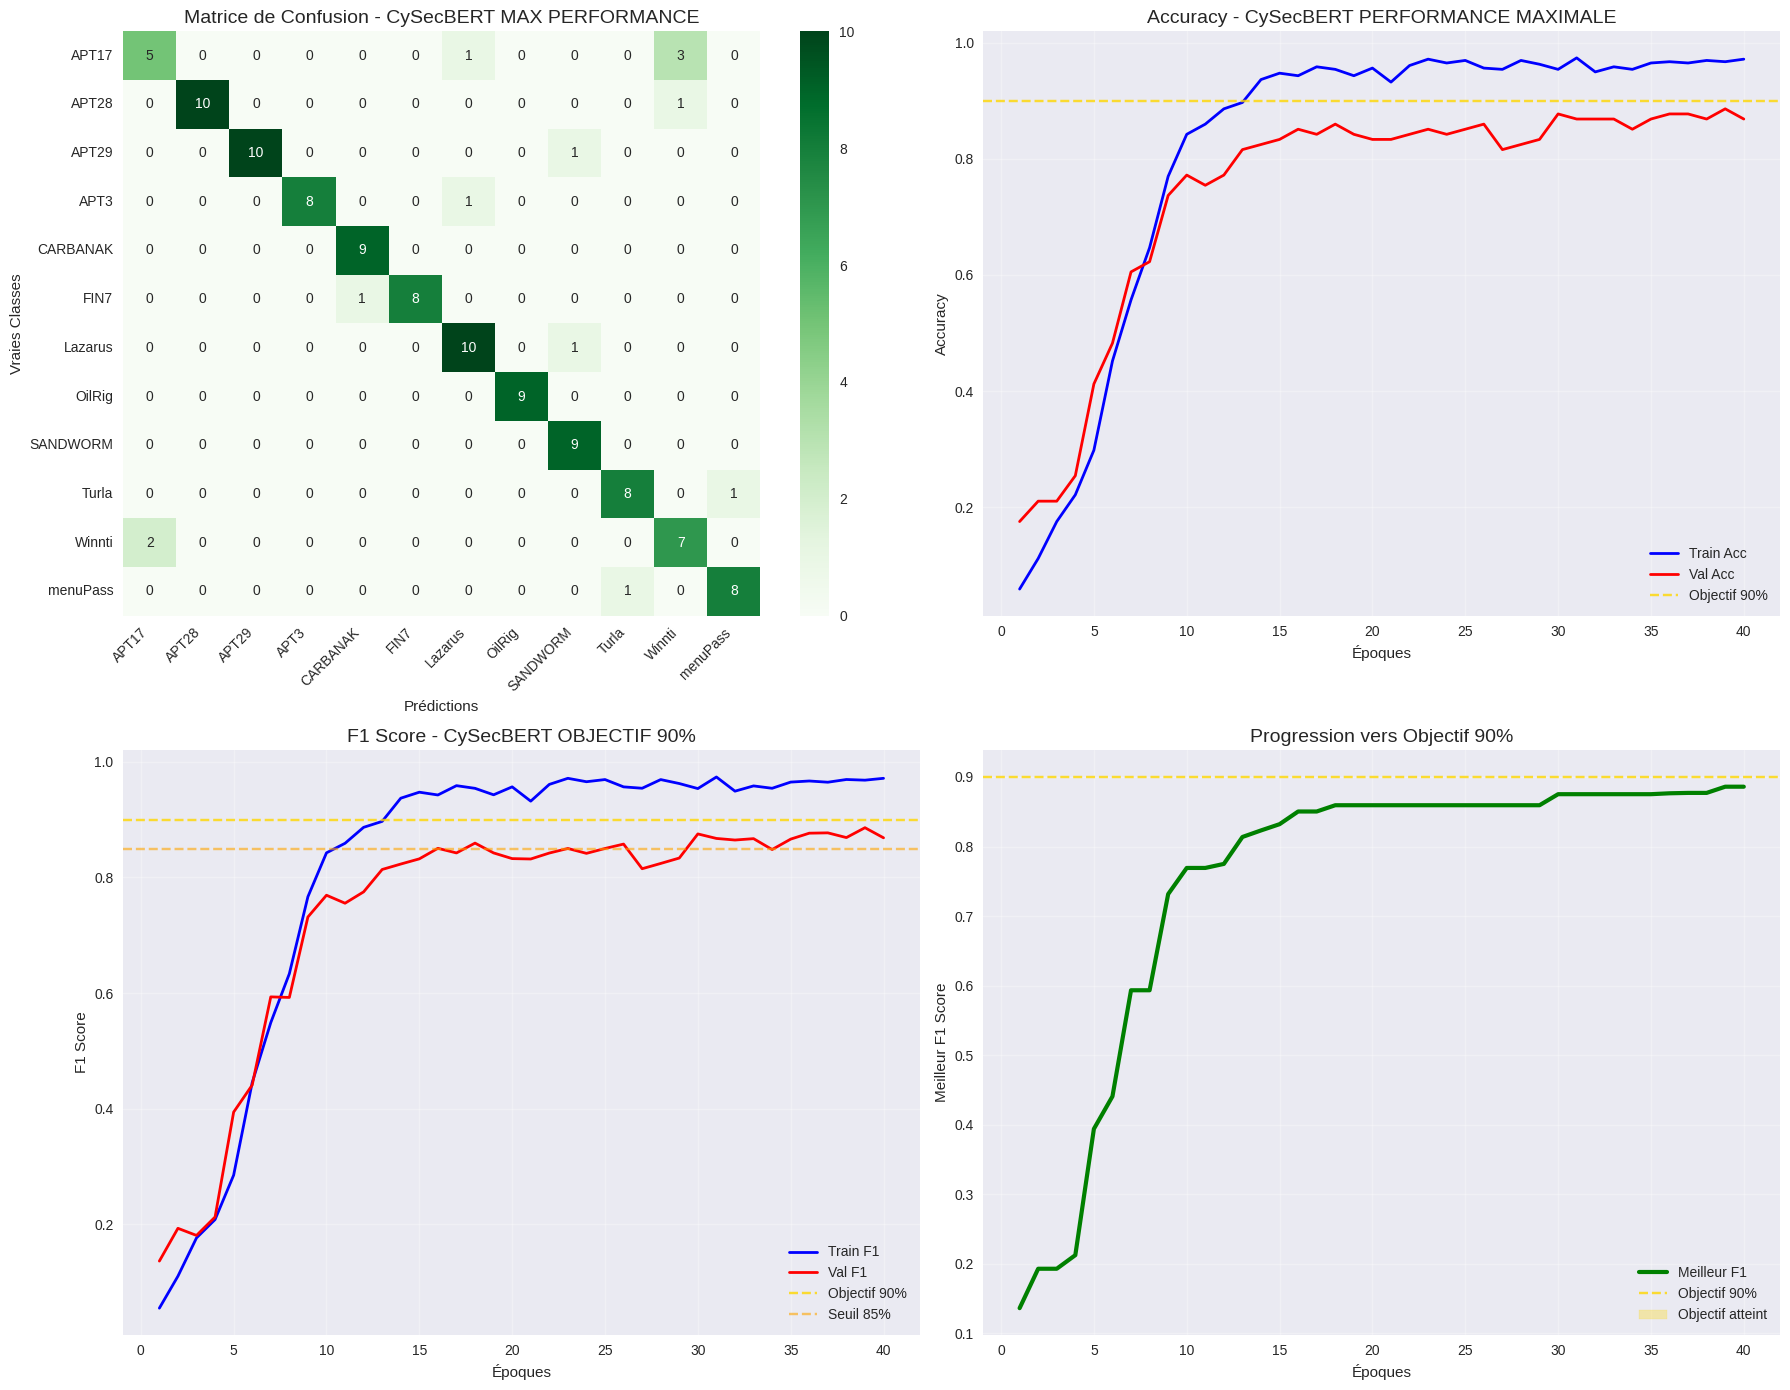

Résultats détaillés sauvegardés: training_results_cysecbert_max_performance.json

RÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:
Accuracy: 0.8860
F1 Score: 0.8861
EXCELLENT: Très proche de l'objectif (85%+)

Fichiers générés:
- Modèle: best_cysecbert_max_performance.pt
- Résultats: training_results_cysecbert_max_performance.json
- Visualisations: cysecebert_max_performance_results.png

VALIDATION CROISÉE OPTIONNELLE
La validation croisée permet d'évaluer la stabilité du modèle
sur différentes divisions des données (plus robuste mais plus long).



Voulez-vous lancer la validation croisée 5-fold ? (y/n):  n


Validation croisée ignorée. Entraînement terminé.

ENTRAÎNEMENT TERMINÉ


In [10]:
#!/usr/bin/env python3
"""
CySecBERT APT Classification - Optimisé Performance Maximum
Objectif: Atteindre 90%+ F1 Score
Configuration agressive pour performances maximales + CV optionnel
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class CySecBERTMaxPerformance(nn.Module):
    """CySecBERT optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "markusbayer/CySecBERT",
        num_classes: int = 12,  # Réduit à 12 (sans Other_APT)
        max_length: int = 384,
        dropout_rate: float = 0.15  # RÉDUIT pour plus de performance
    ):
        super(CySecBERTMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle: {model_name}")
        
        # Modèle CySecBERT spécialisé cybersécurité
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture PLUS LARGE pour capacité maximale
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire ÉLARGIE pour plus de performance
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)  # AUGMENTÉ 256→512
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)   # Dropout léger
        
        # Deuxième couche intermédiaire pour plus de complexité
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()  # GELU pour meilleures performances
        
        print(f"CySecBERT MAX PERFORMANCE initialisé - Architecture: {self.config.hidden_size} -> 512 -> 256 -> {num_classes}")
        print(f"Dropout minimal: {dropout_rate}, Optimisé pour 90%+ F1 Score")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # [CLS] token avec dropout minimal
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Première couche intermédiaire LARGE
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        # Batch norm conditionnelle
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        # Deuxième couche intermédiaire
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        # Classification finale
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerMaxPerformance:
    """Entraîneur optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(self):
        self.config = {
            'model_name': 'markusbayer/CySecBERT',
            'max_length': 384,
            'batch_size': 12,          # AUGMENTÉ pour plus de stabilité
            'learning_rate': 3e-5,     # AUGMENTÉ pour convergence plus rapide
            'num_epochs': 40,          # AUGMENTÉ pour plus d'apprentissage
            'warmup_ratio': 0.15,      # Plus de warmup pour stabilité
            'weight_decay': 0.01,      # RÉDUIT pour moins de pénalisation
            'validation_split': 0.2,
            'dropout_rate': 0.15,      # RÉDUIT pour plus de performance
            'early_stopping_patience': 12,   # AUGMENTÉ pour laisser plus de temps
            'min_improvement': 0.003,  # Plus sensible aux améliorations
            'gradient_accumulation': 4,      # AUGMENTÉ: Batch effectif = 48
            'cross_validation_folds': 5,
            'max_grad_norm': 2.0,      # AUGMENTÉ pour permettre plus de gradient
            'lr_scheduler': 'linear',   
            'label_smoothing': 0.02,   # RÉDUIT pour moins de pénalisation
            'monitor_overfitting': False,  # DÉSACTIVÉ: Focus sur performance
            'use_focal_loss': True,    # NOUVEAU: Focal Loss pour classes difficiles
            'focal_alpha': 0.25,
            'focal_gamma': 2.0
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données équilibrées"""
        print(f"Chargement des données équilibrées: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRESSION DE OTHER_APT (classe problématique)
        before_removal = len(df)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)
        removed_count = before_removal - len(df)
        print(f"SUPPRESSION Other_APT: -{removed_count} échantillons")
        print(f"Dataset nettoyé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher les statistiques d'équilibrage
        class_distribution = df['label'].value_counts()
        balance_ratio = class_distribution.max() / class_distribution.min()
        
        print(f"Distribution des classes (sans Other_APT):")
        for label, count in class_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        print(f"OBJECTIF: Atteindre 90%+ F1 Score sur ce dataset nettoyé")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df):
        """Crée les DataLoaders"""
        print("Création des DataLoaders...")
        
        # Division stratifiée
        train_df, val_df = train_test_split(
            df,
            test_size=self.config['validation_split'],
            random_state=42,
            stratify=df['label_encoded']
        )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        print(f"Batch effectif LARGE: {self.config['batch_size']} x {self.config['gradient_accumulation']} = {self.config['batch_size'] * self.config['gradient_accumulation']}")
        
        # Créer le modèle avec architecture large
        self.model = CySecBERTMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré plus agressif
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss pour performance maximale"""
        # Poids des classes pour équilibrage
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss fonction optimisée pour performance
        if self.config['use_focal_loss']:
            print("Utilisation de Focal Loss pour classes difficiles")
            # Focal Loss implémentation simple
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        else:
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        
        # Optimiseur avec learning rate élevé
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm1.weight', 'batch_norm1.bias', 'batch_norm2.weight', 'batch_norm2.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler avec plus de steps
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"CONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- LR élevé: {self.config['learning_rate']}")
        print(f"- Weight decay réduit: {self.config['weight_decay']}")
        print(f"- Dropout minimal: {self.config['dropout_rate']}")
        print(f"- Batch effectif: {self.config['batch_size'] * self.config['gradient_accumulation']}")
        print(f"- Total steps: {total_steps}, Warmup: {warmup_steps}")
        print(f"- Epochs max: {self.config['num_epochs']}")
        print(f"- Early stopping patient: {self.config['early_stopping_patience']}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [PERF MAX]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation MAX', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement pour performance maximale"""
        print("ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)")
        print("=" * 70)
        
        start_time = time.time()
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        train_df, val_df = self.create_data_loaders(df)
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement pour PERFORMANCE MAXIMALE...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart (informatif seulement)
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Information: {overfitting_gap:.4f}")
            
            # Progression vers 90%
            if val_f1 >= 0.90:
                print(f"OBJECTIF ATTEINT! F1: {val_f1:.4f} (≥90%)")
            elif val_f1 >= 0.85:
                print(f"Excellent progrès! F1: {val_f1:.4f} (≥85%)")
            elif val_f1 >= 0.80:
                print(f"Bon progrès! F1: {val_f1:.4f} (≥80%)")
            
            # Early stopping basé sur F1 score seulement
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_cysecbert_max_performance.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap,
                    'dataset_info': 'max_performance_cysecbert_without_other_apt'
                }, model_save_path)
                
                print(f"Nouveau record! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"MEILLEURE ACCURACY: {best_accuracy:.4f}")
        print(f"MEILLEUR F1 SCORE: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_cysecbert_max_performance.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation de l'objectif
        if final_f1 >= 0.90:
            print("OBJECTIF ATTEINT: F1 ≥ 90%!")
        elif final_f1 >= 0.85:
            print("Très proche de l'objectif: F1 ≥ 85%")
        elif final_f1 >= 0.80:
            print("Bonne performance: F1 ≥ 80%")
        else:
            print("Objectif 90% non atteint")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée pour dataset équilibré"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - CySecBERT PERFORMANCE MAXIMALE")
        print("=" * 80)
        
        # Charger et préparer les données (sans suppression Other_APT pour CV)
        df = pd.read_csv(data_path)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)  # Même suppression pour cohérence
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = CySecBERTMaxPerformance(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_cysecbert_max_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_cysecbert_max_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE - CySecBERT MAX")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config,
            'dataset_info': 'cysecbert_max_performance_without_other_apt'
        }
        
        with open('cross_validation_cysecbert_max_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_CySecbert_max_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - CySecBERT MAX PERFORMANCE', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax2.set_title('Accuracy - CySecBERT PERFORMANCE MAXIMALE', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score avec objectif
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.6, label='Seuil 85%')
        ax3.set_title('F1 Score - CySecBERT OBJECTIF 90%', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Progression vers l'objectif
        val_f1_progress = [max(self.history['val_f1'][:i+1]) for i in range(len(self.history['val_f1']))]
        ax4.plot(epochs, val_f1_progress, 'green', linewidth=3, label='Meilleur F1')
        ax4.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax4.fill_between(epochs, val_f1_progress, 0.90, where=[f >= 0.90 for f in val_f1_progress], 
                        color='gold', alpha=0.3, label='Objectif atteint')
        ax4.set_title('Progression vers Objectif 90%', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Meilleur F1 Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('cysecbert_max_performance_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'target_achieved': bool(final_f1 >= 0.90),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'dataset_info': 'cysecbert_max_performance_without_other_apt',
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_cysecbert_max_performance.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_cysecbert_max_performance.json")

# Script principal optimisé pour PERFORMANCE MAXIMALE + CV OPTIONNEL
if __name__ == "__main__":
    print("CySecBERT APT Classification - PERFORMANCE MAXIMALE")
    print("=" * 60)
    print("OBJECTIF: Atteindre 90%+ F1 Score")
    print("Configuration optimisée pour performances maximales + CV optionnel")
    print("CySecBERT: Modèle BERT spécialisé en cybersécurité")
    
    trainer = APTTrainerMaxPerformance()
    
    # Chemin vers le dataset équilibré
    data_path = "expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv"
    
    # Alternative fallback
    if not Path(data_path).exists():
        print(f"Dataset équilibré non trouvé à {data_path}")
        print("Utilisation du dataset original comme fallback")
        data_path = "cti_datasets/processed/training_dataset.csv"
    
    if Path(data_path).exists():
        print(f"\nDataset utilisé: {data_path}")
        print(f"\nCONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- Modèle: {trainer.config['model_name']} (Cybersécurité)")
        print(f"- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)")
        print(f"- Batch effectif: {trainer.config['batch_size']} x {trainer.config['gradient_accumulation']} = {trainer.config['batch_size'] * trainer.config['gradient_accumulation']}")
        print(f"- Learning rate ÉLEVÉ: {trainer.config['learning_rate']}")
        print(f"- Dropout MINIMAL: {trainer.config['dropout_rate']}")
        print(f"- Weight decay RÉDUIT: {trainer.config['weight_decay']}")
        print(f"- Epochs AUGMENTÉES: {trainer.config['num_epochs']}")
        print(f"- Early stopping PATIENT: {trainer.config['early_stopping_patience']}")
        print(f"- Focal Loss: {trainer.config['use_focal_loss']}")
        
        # ENTRAÎNEMENT SIMPLE EN PREMIER
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT SIMPLE")
        print("="*60)
        
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation finale de l'objectif
        if final_f1 >= 0.90:
            print("MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!")
        elif final_f1 >= 0.85:
            print("EXCELLENT: Très proche de l'objectif (85%+)")
        elif final_f1 >= 0.80:
            print("TRÈS BON: Performance solide (80%+)")
        else:
            print("OBJECTIF NON ATTEINT: Ajustements nécessaires")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_cysecbert_max_performance.pt")
        print(f"- Résultats: training_results_cysecbert_max_performance.json")
        print(f"- Visualisations: cysecebert_max_performance_results.png")
        
        # PROPOSER LA VALIDATION CROISÉE
        print(f"\n" + "="*60)
        print("VALIDATION CROISÉE OPTIONNELLE")
        print("="*60)
        print("La validation croisée permet d'évaluer la stabilité du modèle")
        print("sur différentes divisions des données (plus robuste mais plus long).")
        
        user_choice = input("\nVoulez-vous lancer la validation croisée 5-fold ? (y/n): ").lower().strip()
        
        if user_choice == 'y':
            print(f"\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerMaxPerformance()
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nRÉSULTATS FINAUX - VALIDATION CROISÉE:")
            print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
            print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
            
            # Analyser la stabilité
            if std_f1 < 0.03:
                print("Modèle très stable (variance très faible)")
            elif std_f1 < 0.05:
                print("Modèle stable (variance faible)")
            elif std_f1 < 0.08:
                print("Modèle cohérent (variance modérée)")
            
            # Comparaison des approches
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Entraînement simple - F1: {final_f1:.4f}")
            print(f"Validation croisée  - F1: {mean_f1:.4f} ± {std_f1:.4f}")
            
            cv_better = mean_f1 > final_f1
            difference = abs(mean_f1 - final_f1)
            
            if cv_better:
                print(f"La validation croisée donne de meilleurs résultats (+{difference:.4f})")
            else:
                print(f"L'entraînement simple donne de meilleurs résultats (+{difference:.4f})")
            
            if difference < 0.02:
                print("Les résultats sont très cohérents entre les deux approches")
            elif difference < 0.05:
                print("Les résultats sont cohérents entre les deux approches")
            else:
                print("Différence notable entre les approches - variance possible")
            
            print(f"\nFichiers CV générés:")
            print(f"- Résultats CV: cross_validation_cysecbert_max_results.json")
            print(f"- Modèles par fold: best_cysecbert_max_fold_*.pt")
            
        else:
            print("Validation croisée ignorée. Entraînement terminé.")
        
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT TERMINÉ")
        print("="*60)
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le preprocessing et l'équilibrage des données")

# **SecureBERT**

SECUREBERT APT Classification - PERFORMANCE MAXIMALE
OBJECTIF: Atteindre 90%+ F1 Score
Configuration optimisée pour performances maximales + CV optionnel
SecureBERT: Modèle BERT spécialisé en cybersécurité
Device: cuda

Dataset utilisé: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv

CONFIGURATION PERFORMANCE MAXIMALE:
- Modèle: ehsanaghaei/SecureBERT (Cybersécurité)
- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)
- Batch effectif: 12 x 4 = 48
- Learning rate ÉLEVÉ: 3e-05
- Dropout MINIMAL: 0.15
- Weight decay RÉDUIT: 0.01
- Epochs AUGMENTÉES: 40
- Early stopping PATIENT: 12
- Focal Loss: True

ENTRAÎNEMENT SIMPLE
ENTRAÎNEMENT SECUREBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)
Chargement des données équilibrées: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv
Données chargées: 615 échantillons, 13 classes
SUPPRESSION Other_APT: -45 échantillons
Dataset nettoyé: 570 échantillons, 12 classes
Distribution des classes (sans O

Some weights of RobertaModel were not initialized from the model checkpoint at ehsanaghaei/SecureBERT and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SecureBERT MAX PERFORMANCE initialisé - Architecture: 768 -> 512 -> 256 -> 12
Dropout minimal: 0.15, Optimisé pour 90%+ F1 Score
Poids des classes: tensor([1.0556, 0.8636, 0.8636, 1.0556, 1.0556, 1.0556, 0.8636, 1.0556, 1.0556,
        1.0556, 1.0556, 1.0556], device='cuda:0')
Utilisation de Focal Loss pour classes difficiles
CONFIGURATION PERFORMANCE MAXIMALE:
- LR élevé: 3e-05
- Weight decay réduit: 0.01
- Dropout minimal: 0.15
- Batch effectif: 48
- Total steps: 380, Warmup: 57
- Epochs max: 40
- Early stopping patient: 12

Début de l'entraînement pour PERFORMANCE MAXIMALE...

ÉPOQUE 1/40


Train - Loss: 2.6236, Acc: 0.1206, F1: 0.1186
Val   - Loss: 2.5005, Acc: 0.0789, F1: 0.0116
Gap   - Information: 0.0417
Nouveau record! F1: 0.0116 (+0.0116)

ÉPOQUE 2/40


Train - Loss: 2.6235, Acc: 0.1096, F1: 0.1067
Val   - Loss: 2.4869, Acc: 0.0526, F1: 0.0142
Gap   - Information: 0.0570

ÉPOQUE 3/40


Train - Loss: 2.5911, Acc: 0.1009, F1: 0.1009
Val   - Loss: 2.4775, Acc: 0.0439, F1: 0.0126
Gap   - Information: 0.0570

ÉPOQUE 4/40


Train - Loss: 2.5515, Acc: 0.1382, F1: 0.1380
Val   - Loss: 2.4592, Acc: 0.1053, F1: 0.0635
Gap   - Information: 0.0329
Nouveau record! F1: 0.0635 (+0.0519)

ÉPOQUE 5/40


Train - Loss: 2.4607, Acc: 0.1338, F1: 0.1297
Val   - Loss: 2.4337, Acc: 0.1579, F1: 0.1104
Gap   - Information: -0.0241
Nouveau record! F1: 0.1104 (+0.0469)

ÉPOQUE 6/40


Train - Loss: 2.4323, Acc: 0.1491, F1: 0.1377
Val   - Loss: 2.3776, Acc: 0.1754, F1: 0.1312
Gap   - Information: -0.0263
Nouveau record! F1: 0.1312 (+0.0208)

ÉPOQUE 7/40


Train - Loss: 2.3692, Acc: 0.1667, F1: 0.1541
Val   - Loss: 2.3151, Acc: 0.1930, F1: 0.1273
Gap   - Information: -0.0263

ÉPOQUE 8/40


Train - Loss: 2.2730, Acc: 0.1842, F1: 0.1628
Val   - Loss: 2.3049, Acc: 0.1316, F1: 0.0854
Gap   - Information: 0.0526

ÉPOQUE 9/40


Train - Loss: 2.2467, Acc: 0.2039, F1: 0.1857
Val   - Loss: 2.2074, Acc: 0.2807, F1: 0.2402
Gap   - Information: -0.0768
Nouveau record! F1: 0.2402 (+0.1091)

ÉPOQUE 10/40


Train - Loss: 2.1822, Acc: 0.2259, F1: 0.2059
Val   - Loss: 2.1112, Acc: 0.2895, F1: 0.2779
Gap   - Information: -0.0636
Nouveau record! F1: 0.2779 (+0.0377)

ÉPOQUE 11/40


Train - Loss: 2.0798, Acc: 0.2873, F1: 0.2652
Val   - Loss: 2.0949, Acc: 0.2456, F1: 0.2270
Gap   - Information: 0.0417

ÉPOQUE 12/40


Train - Loss: 1.9058, Acc: 0.3882, F1: 0.3678
Val   - Loss: 1.9429, Acc: 0.4211, F1: 0.3994
Gap   - Information: -0.0329
Nouveau record! F1: 0.3994 (+0.1215)

ÉPOQUE 13/40


Train - Loss: 1.8016, Acc: 0.4430, F1: 0.4277
Val   - Loss: 1.8770, Acc: 0.4737, F1: 0.4717
Gap   - Information: -0.0307
Nouveau record! F1: 0.4717 (+0.0722)

ÉPOQUE 14/40


Train - Loss: 1.6485, Acc: 0.5175, F1: 0.5059
Val   - Loss: 1.7406, Acc: 0.5526, F1: 0.5419
Gap   - Information: -0.0351
Nouveau record! F1: 0.5419 (+0.0702)

ÉPOQUE 15/40


Train - Loss: 1.5018, Acc: 0.5877, F1: 0.5755
Val   - Loss: 1.5831, Acc: 0.5877, F1: 0.5785
Gap   - Information: 0.0000
Nouveau record! F1: 0.5785 (+0.0366)

ÉPOQUE 16/40


Train - Loss: 1.3308, Acc: 0.6820, F1: 0.6677
Val   - Loss: 1.3895, Acc: 0.6579, F1: 0.6495
Gap   - Information: 0.0241
Nouveau record! F1: 0.6495 (+0.0710)

ÉPOQUE 17/40


Train - Loss: 1.1496, Acc: 0.7127, F1: 0.7030
Val   - Loss: 1.3205, Acc: 0.7018, F1: 0.6953
Gap   - Information: 0.0110
Nouveau record! F1: 0.6953 (+0.0457)

ÉPOQUE 18/40


Train - Loss: 1.1133, Acc: 0.7522, F1: 0.7494
Val   - Loss: 1.3206, Acc: 0.7193, F1: 0.7127
Gap   - Information: 0.0329
Nouveau record! F1: 0.7127 (+0.0174)

ÉPOQUE 19/40


Train - Loss: 1.0271, Acc: 0.7785, F1: 0.7702
Val   - Loss: 1.1313, Acc: 0.7105, F1: 0.7068
Gap   - Information: 0.0680

ÉPOQUE 20/40


Train - Loss: 0.9454, Acc: 0.7961, F1: 0.7910
Val   - Loss: 1.0334, Acc: 0.7807, F1: 0.7766
Gap   - Information: 0.0154
Nouveau record! F1: 0.7766 (+0.0639)

ÉPOQUE 21/40


Train - Loss: 0.8642, Acc: 0.8421, F1: 0.8429
Val   - Loss: 1.0237, Acc: 0.7895, F1: 0.7898
Gap   - Information: 0.0526
Nouveau record! F1: 0.7898 (+0.0132)

ÉPOQUE 22/40


Train - Loss: 0.7705, Acc: 0.8728, F1: 0.8707
Val   - Loss: 0.8741, Acc: 0.8070, F1: 0.8081
Gap   - Information: 0.0658
Bon progrès! F1: 0.8081 (≥80%)
Nouveau record! F1: 0.8081 (+0.0183)

ÉPOQUE 23/40


Train - Loss: 0.6922, Acc: 0.8772, F1: 0.8749
Val   - Loss: 0.8192, Acc: 0.8158, F1: 0.8155
Gap   - Information: 0.0614
Bon progrès! F1: 0.8155 (≥80%)
Nouveau record! F1: 0.8155 (+0.0074)

ÉPOQUE 24/40


Train - Loss: 0.7200, Acc: 0.8772, F1: 0.8771
Val   - Loss: 0.8216, Acc: 0.8070, F1: 0.8094
Gap   - Information: 0.0702
Bon progrès! F1: 0.8094 (≥80%)

ÉPOQUE 25/40


Train - Loss: 0.5780, Acc: 0.9211, F1: 0.9205
Val   - Loss: 0.8285, Acc: 0.8070, F1: 0.8057
Gap   - Information: 0.1140
Bon progrès! F1: 0.8057 (≥80%)

ÉPOQUE 26/40


Train - Loss: 0.5279, Acc: 0.9430, F1: 0.9433
Val   - Loss: 0.7576, Acc: 0.8158, F1: 0.8144
Gap   - Information: 0.1272
Bon progrès! F1: 0.8144 (≥80%)

ÉPOQUE 27/40


Train - Loss: 0.5412, Acc: 0.9123, F1: 0.9129
Val   - Loss: 0.7422, Acc: 0.8158, F1: 0.8138
Gap   - Information: 0.0965
Bon progrès! F1: 0.8138 (≥80%)

ÉPOQUE 28/40


Train - Loss: 0.5138, Acc: 0.9298, F1: 0.9297
Val   - Loss: 0.7434, Acc: 0.8421, F1: 0.8420
Gap   - Information: 0.0877
Bon progrès! F1: 0.8420 (≥80%)
Nouveau record! F1: 0.8420 (+0.0265)

ÉPOQUE 29/40


Train - Loss: 0.4850, Acc: 0.9430, F1: 0.9430
Val   - Loss: 0.7680, Acc: 0.7982, F1: 0.7979
Gap   - Information: 0.1447

ÉPOQUE 30/40


Train - Loss: 0.4443, Acc: 0.9496, F1: 0.9500
Val   - Loss: 0.7431, Acc: 0.8246, F1: 0.8253
Gap   - Information: 0.1250
Bon progrès! F1: 0.8253 (≥80%)

ÉPOQUE 31/40


Train - Loss: 0.4061, Acc: 0.9342, F1: 0.9344
Val   - Loss: 0.7112, Acc: 0.8246, F1: 0.8223
Gap   - Information: 0.1096
Bon progrès! F1: 0.8223 (≥80%)

ÉPOQUE 32/40


Train - Loss: 0.3832, Acc: 0.9627, F1: 0.9628
Val   - Loss: 0.7313, Acc: 0.8246, F1: 0.8238
Gap   - Information: 0.1382
Bon progrès! F1: 0.8238 (≥80%)

ÉPOQUE 33/40


Train - Loss: 0.3948, Acc: 0.9539, F1: 0.9543
Val   - Loss: 0.7155, Acc: 0.8421, F1: 0.8399
Gap   - Information: 0.1118
Bon progrès! F1: 0.8399 (≥80%)

ÉPOQUE 34/40


Train - Loss: 0.3974, Acc: 0.9539, F1: 0.9548
Val   - Loss: 0.7379, Acc: 0.8421, F1: 0.8417
Gap   - Information: 0.1118
Bon progrès! F1: 0.8417 (≥80%)

ÉPOQUE 35/40


Train - Loss: 0.3453, Acc: 0.9671, F1: 0.9674
Val   - Loss: 0.7308, Acc: 0.8333, F1: 0.8326
Gap   - Information: 0.1338
Bon progrès! F1: 0.8326 (≥80%)

ÉPOQUE 36/40


Train - Loss: 0.3366, Acc: 0.9759, F1: 0.9759
Val   - Loss: 0.7203, Acc: 0.8596, F1: 0.8583
Gap   - Information: 0.1162
Excellent progrès! F1: 0.8583 (≥85%)
Nouveau record! F1: 0.8583 (+0.0163)

ÉPOQUE 37/40


Train - Loss: 0.3895, Acc: 0.9474, F1: 0.9475
Val   - Loss: 0.7096, Acc: 0.8421, F1: 0.8413
Gap   - Information: 0.1053
Bon progrès! F1: 0.8413 (≥80%)

ÉPOQUE 38/40


Train - Loss: 0.3140, Acc: 0.9737, F1: 0.9736
Val   - Loss: 0.6929, Acc: 0.8509, F1: 0.8499
Gap   - Information: 0.1228
Bon progrès! F1: 0.8499 (≥80%)

ÉPOQUE 39/40


Train - Loss: 0.3530, Acc: 0.9539, F1: 0.9543
Val   - Loss: 0.7151, Acc: 0.8421, F1: 0.8419
Gap   - Information: 0.1118
Bon progrès! F1: 0.8419 (≥80%)

ÉPOQUE 40/40


Train - Loss: 0.3366, Acc: 0.9496, F1: 0.9496
Val   - Loss: 0.7173, Acc: 0.8509, F1: 0.8489
Gap   - Information: 0.0987
Bon progrès! F1: 0.8489 (≥80%)

Entraînement terminé en 26.8 minutes
MEILLEURE ACCURACY: 0.8596
MEILLEUR F1 SCORE: 0.8583



PERFORMANCE FINALE:
Accuracy: 0.8596
F1 Score: 0.8583
Très proche de l'objectif: F1 ≥ 85%

Classification Report:
              precision    recall  f1-score   support

       APT17     1.0000    0.6667    0.8000         9
       APT28     0.7692    0.9091    0.8333        11
       APT29     0.9091    0.9091    0.9091        11
        APT3     0.7778    0.7778    0.7778         9
    CARBANAK     0.7500    1.0000    0.8571         9
        FIN7     1.0000    0.7778    0.8750         9
     Lazarus     0.8333    0.9091    0.8696        11
      OilRig     0.8750    0.7778    0.8235         9
    SANDWORM     1.0000    0.6667    0.8000         9
       Turla     0.9000    1.0000    0.9474         9
      Winnti     0.7500    1.0000    0.8571         9
    menuPass     1.0000    0.8889    0.9412         9

    accuracy                         0.8596       114
   macro avg     0.8804    0.8569    0.8576       114
weighted avg     0.8781    0.8596    0.8583       114



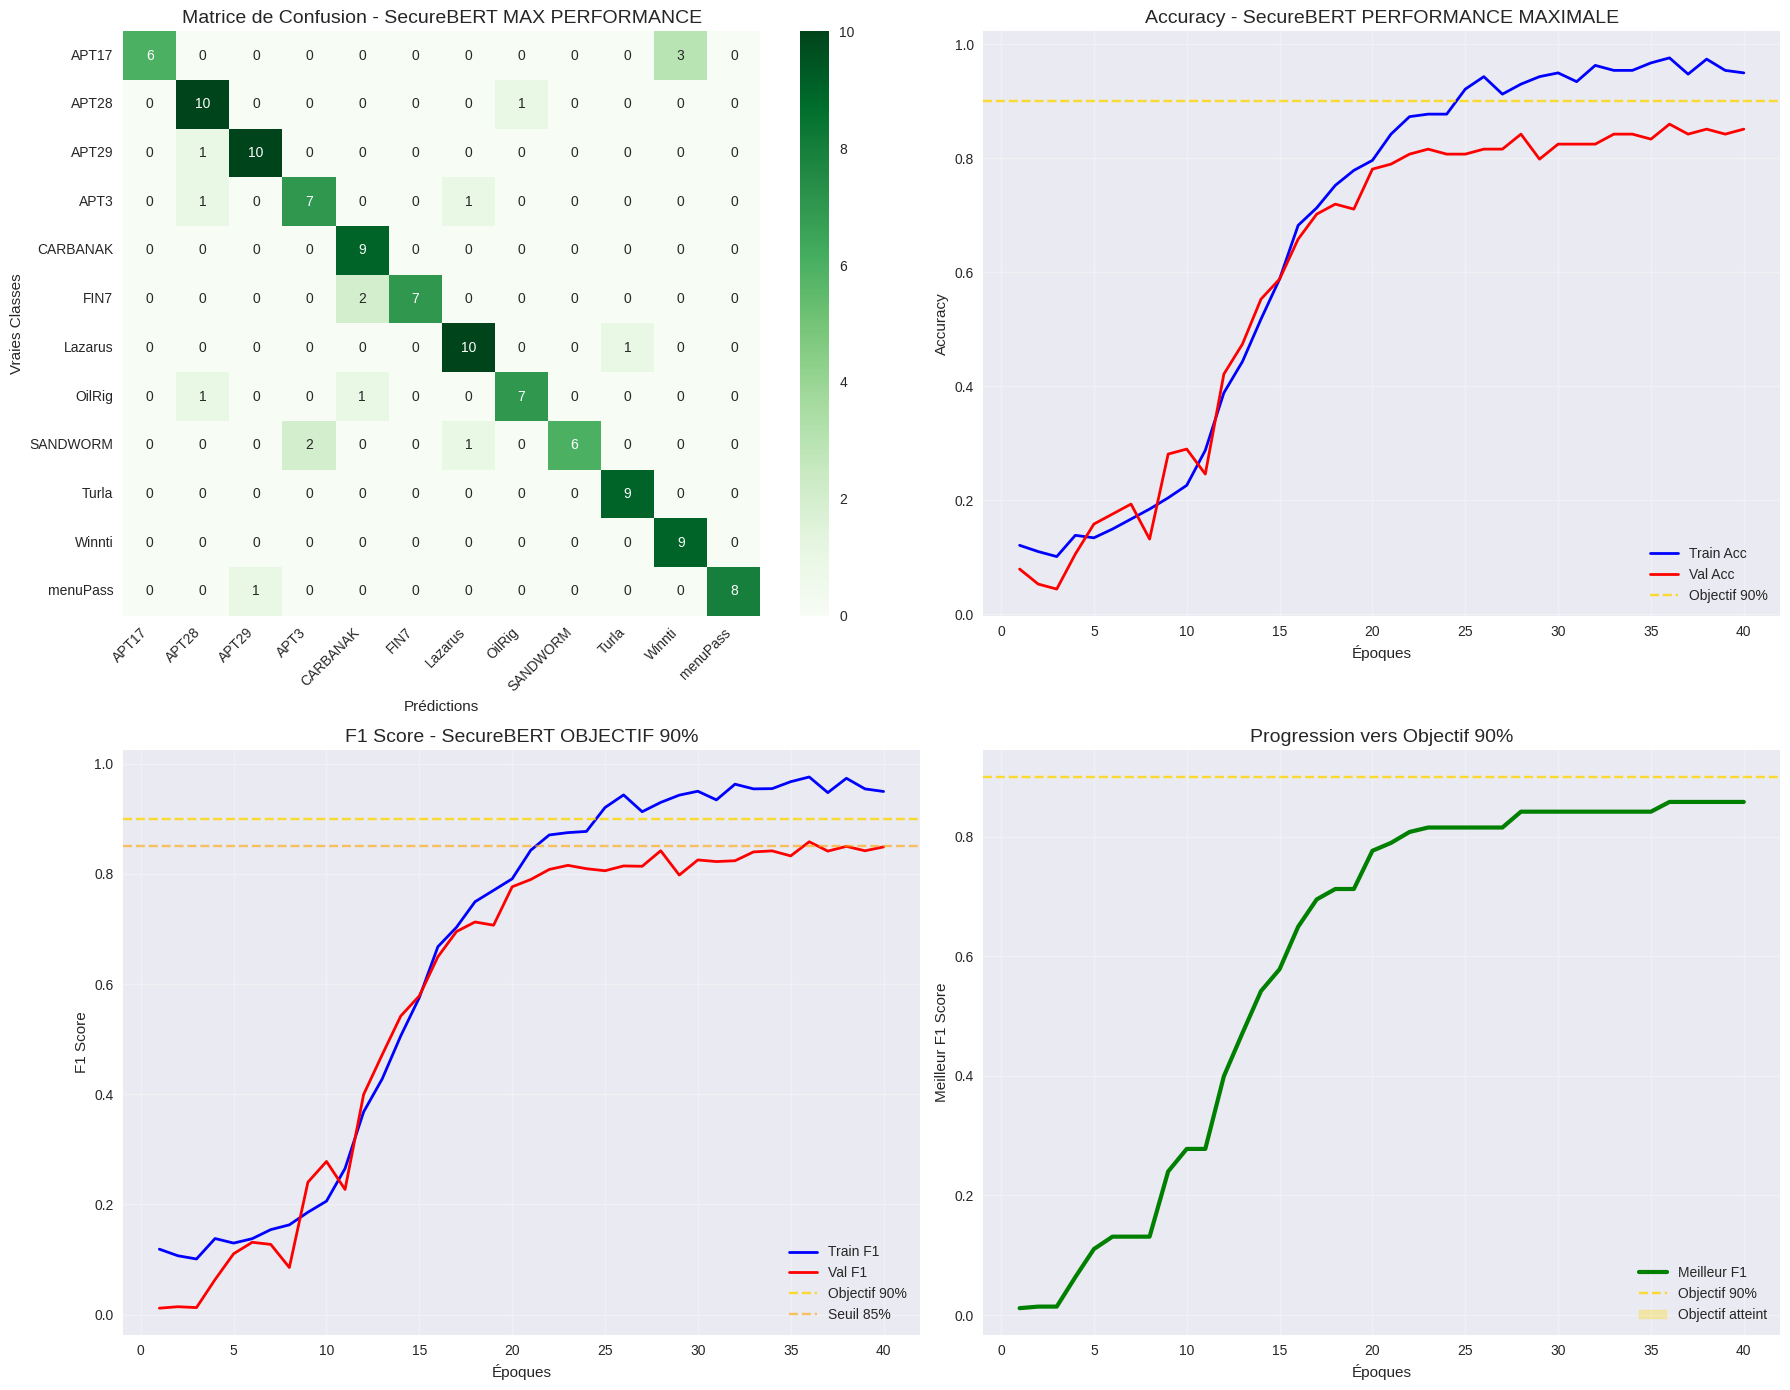

Résultats détaillés sauvegardés: training_results_securebert_max_performance.json

RÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:
Accuracy: 0.8596
F1 Score: 0.8583
EXCELLENT: Très proche de l'objectif (85%+)

Fichiers générés:
- Modèle: best_securebert_max_performance.pt
- Résultats: training_results_securebert_max_performance.json
- Visualisations: securebert_max_performance_results.png

VALIDATION CROISÉE OPTIONNELLE
La validation croisée permet d'évaluer la stabilité du modèle
sur différentes divisions des données (plus robuste mais plus long).



Voulez-vous lancer la validation croisée 5-fold ? (y/n):  n


Validation croisée ignorée. Entraînement terminé.

ENTRAÎNEMENT TERMINÉ


In [18]:
#!/usr/bin/env python3
"""
SecureBERT APT Classification - Optimisé Performance Maximum
Objectif: Atteindre 90%+ F1 Score
Configuration agressive pour performances maximales + CV optionnel
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class SecureBERTMaxPerformance(nn.Module):
    """SecureBERT optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "ehsanaghaei/SecureBERT",
        num_classes: int = 12,  # Réduit à 12 (sans Other_APT)
        max_length: int = 384,
        dropout_rate: float = 0.15  # RÉDUIT pour plus de performance
    ):
        super(SecureBERTMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle: {model_name}")
        
        # Modèle SecureBERT spécialisé cybersécurité
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture PLUS LARGE pour capacité maximale
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire ÉLARGIE pour plus de performance
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)  # AUGMENTÉ 256→512
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)   # Dropout léger
        
        # Deuxième couche intermédiaire pour plus de complexité
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()  # GELU pour meilleures performances
        
        print(f"SecureBERT MAX PERFORMANCE initialisé - Architecture: {self.config.hidden_size} -> 512 -> 256 -> {num_classes}")
        print(f"Dropout minimal: {dropout_rate}, Optimisé pour 90%+ F1 Score")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # [CLS] token avec dropout minimal
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Première couche intermédiaire LARGE
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        # Batch norm conditionnelle
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        # Deuxième couche intermédiaire
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        # Classification finale
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerMaxPerformance:
    """Entraîneur optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(self):
        self.config = {
            'model_name': 'ehsanaghaei/SecureBERT',
            'max_length': 384,
            'batch_size': 12,          # AUGMENTÉ pour plus de stabilité
            'learning_rate': 3e-5,     # AUGMENTÉ pour convergence plus rapide
            'num_epochs': 40,          # AUGMENTÉ pour plus d'apprentissage
            'warmup_ratio': 0.15,      # Plus de warmup pour stabilité
            'weight_decay': 0.01,      # RÉDUIT pour moins de pénalisation
            'validation_split': 0.2,
            'dropout_rate': 0.15,      # RÉDUIT pour plus de performance
            'early_stopping_patience': 12,   # AUGMENTÉ pour laisser plus de temps
            'min_improvement': 0.003,  # Plus sensible aux améliorations
            'gradient_accumulation': 4,      # AUGMENTÉ: Batch effectif = 48
            'cross_validation_folds': 5,
            'max_grad_norm': 2.0,      # AUGMENTÉ pour permettre plus de gradient
            'lr_scheduler': 'linear',   
            'label_smoothing': 0.02,   # RÉDUIT pour moins de pénalisation
            'monitor_overfitting': False,  # DÉSACTIVÉ: Focus sur performance
            'use_focal_loss': True,    # NOUVEAU: Focal Loss pour classes difficiles
            'focal_alpha': 0.25,
            'focal_gamma': 2.0
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données équilibrées"""
        print(f"Chargement des données équilibrées: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRESSION DE OTHER_APT (classe problématique)
        before_removal = len(df)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)
        removed_count = before_removal - len(df)
        print(f"SUPPRESSION Other_APT: -{removed_count} échantillons")
        print(f"Dataset nettoyé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher les statistiques d'équilibrage
        class_distribution = df['label'].value_counts()
        balance_ratio = class_distribution.max() / class_distribution.min()
        
        print(f"Distribution des classes (sans Other_APT):")
        for label, count in class_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        print(f"OBJECTIF: Atteindre 90%+ F1 Score sur ce dataset nettoyé")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df):
        """Crée les DataLoaders"""
        print("Création des DataLoaders...")
        
        # Division stratifiée
        train_df, val_df = train_test_split(
            df,
            test_size=self.config['validation_split'],
            random_state=42,
            stratify=df['label_encoded']
        )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        print(f"Batch effectif LARGE: {self.config['batch_size']} x {self.config['gradient_accumulation']} = {self.config['batch_size'] * self.config['gradient_accumulation']}")
        
        # Créer le modèle avec architecture large
        self.model = SecureBERTMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré plus agressif
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss pour performance maximale"""
        # Poids des classes pour équilibrage
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss fonction optimisée pour performance
        if self.config['use_focal_loss']:
            print("Utilisation de Focal Loss pour classes difficiles")
            # Focal Loss implémentation simple
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        else:
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        
        # Optimiseur avec learning rate élevé
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm1.weight', 'batch_norm1.bias', 'batch_norm2.weight', 'batch_norm2.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler avec plus de steps
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"CONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- LR élevé: {self.config['learning_rate']}")
        print(f"- Weight decay réduit: {self.config['weight_decay']}")
        print(f"- Dropout minimal: {self.config['dropout_rate']}")
        print(f"- Batch effectif: {self.config['batch_size'] * self.config['gradient_accumulation']}")
        print(f"- Total steps: {total_steps}, Warmup: {warmup_steps}")
        print(f"- Epochs max: {self.config['num_epochs']}")
        print(f"- Early stopping patient: {self.config['early_stopping_patience']}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [PERF MAX]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation MAX', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement pour performance maximale"""
        print("ENTRAÎNEMENT SECUREBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)")
        print("=" * 70)
        
        start_time = time.time()
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        train_df, val_df = self.create_data_loaders(df)
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement pour PERFORMANCE MAXIMALE...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart (informatif seulement)
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Information: {overfitting_gap:.4f}")
            
            # Progression vers 90%
            if val_f1 >= 0.90:
                print(f"OBJECTIF ATTEINT! F1: {val_f1:.4f} (≥90%)")
            elif val_f1 >= 0.85:
                print(f"Excellent progrès! F1: {val_f1:.4f} (≥85%)")
            elif val_f1 >= 0.80:
                print(f"Bon progrès! F1: {val_f1:.4f} (≥80%)")
            
            # Early stopping basé sur F1 score seulement
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_securebert_max_performance.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap,
                    'dataset_info': 'max_performance_securebert_without_other_apt'
                }, model_save_path)
                
                print(f"Nouveau record! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"MEILLEURE ACCURACY: {best_accuracy:.4f}")
        print(f"MEILLEUR F1 SCORE: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_securebert_max_performance.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation de l'objectif
        if final_f1 >= 0.90:
            print("OBJECTIF ATTEINT: F1 ≥ 90%!")
        elif final_f1 >= 0.85:
            print("Très proche de l'objectif: F1 ≥ 85%")
        elif final_f1 >= 0.80:
            print("Bonne performance: F1 ≥ 80%")
        else:
            print("Objectif 90% non atteint")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée pour dataset équilibré"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - SECUREBERT PERFORMANCE MAXIMALE")
        print("=" * 80)
        
        # Charger et préparer les données (sans suppression Other_APT pour CV)
        df = pd.read_csv(data_path)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)  # Même suppression pour cohérence
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = SecureBERTMaxPerformance(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_securebert_max_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_securebert_max_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE - SECUREBERT MAX")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config,
            'dataset_info': 'securebert_max_performance_without_other_apt'
        }
        
        with open('cross_validation_securebert_max_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_securebert_max_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - SecureBERT MAX PERFORMANCE', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax2.set_title('Accuracy - SecureBERT PERFORMANCE MAXIMALE', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score avec objectif
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.6, label='Seuil 85%')
        ax3.set_title('F1 Score - SecureBERT OBJECTIF 90%', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Progression vers l'objectif
        val_f1_progress = [max(self.history['val_f1'][:i+1]) for i in range(len(self.history['val_f1']))]
        ax4.plot(epochs, val_f1_progress, 'green', linewidth=3, label='Meilleur F1')
        ax4.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax4.fill_between(epochs, val_f1_progress, 0.90, where=[f >= 0.90 for f in val_f1_progress], 
                        color='gold', alpha=0.3, label='Objectif atteint')
        ax4.set_title('Progression vers Objectif 90%', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Meilleur F1 Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('securebert_max_performance_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'target_achieved': bool(final_f1 >= 0.90),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'dataset_info': 'securebert_max_performance_without_other_apt',
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_securebert_max_performance.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_securebert_max_performance.json")

# Script principal optimisé pour PERFORMANCE MAXIMALE + CV OPTIONNEL
if __name__ == "__main__":
    print("SECUREBERT APT Classification - PERFORMANCE MAXIMALE")
    print("=" * 60)
    print("OBJECTIF: Atteindre 90%+ F1 Score")
    print("Configuration optimisée pour performances maximales + CV optionnel")
    print("SecureBERT: Modèle BERT spécialisé en cybersécurité")
    
    trainer = APTTrainerMaxPerformance()
    
    # Chemin vers le dataset équilibré
    data_path = "expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv"
    
    # Alternative fallback
    if not Path(data_path).exists():
        print(f"Dataset équilibré non trouvé à {data_path}")
        print("Utilisation du dataset original comme fallback")
        data_path = "cti_datasets/processed/training_dataset.csv"
    
    if Path(data_path).exists():
        print(f"\nDataset utilisé: {data_path}")
        print(f"\nCONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- Modèle: {trainer.config['model_name']} (Cybersécurité)")
        print(f"- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)")
        print(f"- Batch effectif: {trainer.config['batch_size']} x {trainer.config['gradient_accumulation']} = {trainer.config['batch_size'] * trainer.config['gradient_accumulation']}")
        print(f"- Learning rate ÉLEVÉ: {trainer.config['learning_rate']}")
        print(f"- Dropout MINIMAL: {trainer.config['dropout_rate']}")
        print(f"- Weight decay RÉDUIT: {trainer.config['weight_decay']}")
        print(f"- Epochs AUGMENTÉES: {trainer.config['num_epochs']}")
        print(f"- Early stopping PATIENT: {trainer.config['early_stopping_patience']}")
        print(f"- Focal Loss: {trainer.config['use_focal_loss']}")
        
        # ENTRAÎNEMENT SIMPLE EN PREMIER
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT SIMPLE")
        print("="*60)
        
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation finale de l'objectif
        if final_f1 >= 0.90:
            print("MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!")
        elif final_f1 >= 0.85:
            print("EXCELLENT: Très proche de l'objectif (85%+)")
        elif final_f1 >= 0.80:
            print("TRÈS BON: Performance solide (80%+)")
        else:
            print("OBJECTIF NON ATTEINT: Ajustements nécessaires")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_securebert_max_performance.pt")
        print(f"- Résultats: training_results_securebert_max_performance.json")
        print(f"- Visualisations: securebert_max_performance_results.png")
        
        # PROPOSER LA VALIDATION CROISÉE
        print(f"\n" + "="*60)
        print("VALIDATION CROISÉE OPTIONNELLE")
        print("="*60)
        print("La validation croisée permet d'évaluer la stabilité du modèle")
        print("sur différentes divisions des données (plus robuste mais plus long).")
        
        user_choice = input("\nVoulez-vous lancer la validation croisée 5-fold ? (y/n): ").lower().strip()
        
        if user_choice == 'y':
            print(f"\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerMaxPerformance()
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nRÉSULTATS FINAUX - VALIDATION CROISÉE:")
            print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
            print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
            
            # Analyser la stabilité
            if std_f1 < 0.03:
                print("Modèle très stable (variance très faible)")
            elif std_f1 < 0.05:
                print("Modèle stable (variance faible)")
            elif std_f1 < 0.08:
                print("Modèle cohérent (variance modérée)")
            
            # Comparaison des approches
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Entraînement simple - F1: {final_f1:.4f}")
            print(f"Validation croisée  - F1: {mean_f1:.4f} ± {std_f1:.4f}")
            
            cv_better = mean_f1 > final_f1
            difference = abs(mean_f1 - final_f1)
            
            if cv_better:
                print(f"La validation croisée donne de meilleurs résultats (+{difference:.4f})")
            else:
                print(f"L'entraînement simple donne de meilleurs résultats (+{difference:.4f})")
            
            if difference < 0.02:
                print("Les résultats sont très cohérents entre les deux approches")
            elif difference < 0.05:
                print("Les résultats sont cohérents entre les deux approches")
            else:
                print("Différence notable entre les approches - variance possible")
            
            print(f"\nFichiers CV générés:")
            print(f"- Résultats CV: cross_validation_cysecbert_max_results.json")
            print(f"- Modèles par fold: best_cysecbert_max_fold_*.pt")
            
        else:
            print("Validation croisée ignorée. Entraînement terminé.")
        
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT TERMINÉ")
        print("="*60)
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le preprocessing et l'équilibrage des données")

# **Bert-base-uncased**

BERT-BASE-UNCASED APT Classification - PERFORMANCE MAXIMALE
OBJECTIF: Atteindre 90%+ F1 Score
Configuration optimisée pour performances maximales + CV optionnel
BERT-base-uncased: Modèle BERT standard Google
Device: cuda

Dataset utilisé: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv

CONFIGURATION PERFORMANCE MAXIMALE:
- Modèle: bert-base-uncased (Standard)
- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)
- Batch effectif: 12 x 4 = 48
- Learning rate ÉLEVÉ: 3e-05
- Dropout MINIMAL: 0.15
- Weight decay RÉDUIT: 0.01
- Epochs AUGMENTÉES: 40
- Early stopping PATIENT: 12
- Focal Loss: True

ENTRAÎNEMENT SIMPLE
ENTRAÎNEMENT BERT-BASE-UNCASED - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)
Chargement des données équilibrées: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv
Données chargées: 615 échantillons, 13 classes
SUPPRESSION Other_APT: -45 échantillons
Dataset nettoyé: 570 échantillons, 12 classes
Distribution des classes (sans Ot

Train - Loss: 2.5703, Acc: 0.1404, F1: 0.1412
Val   - Loss: 2.4885, Acc: 0.1316, F1: 0.1054
Gap   - Information: 0.0088
Nouveau record! F1: 0.1054 (+0.1054)

ÉPOQUE 2/40


Train - Loss: 2.5823, Acc: 0.1316, F1: 0.1307
Val   - Loss: 2.4374, Acc: 0.1053, F1: 0.0896
Gap   - Information: 0.0263

ÉPOQUE 3/40


Train - Loss: 2.4459, Acc: 0.1425, F1: 0.1366
Val   - Loss: 2.3349, Acc: 0.1930, F1: 0.1766
Gap   - Information: -0.0504
Nouveau record! F1: 0.1766 (+0.0713)

ÉPOQUE 4/40


Train - Loss: 2.2821, Acc: 0.1952, F1: 0.1826
Val   - Loss: 2.2050, Acc: 0.2193, F1: 0.2037
Gap   - Information: -0.0241
Nouveau record! F1: 0.2037 (+0.0271)

ÉPOQUE 5/40


Train - Loss: 2.1797, Acc: 0.2566, F1: 0.2408
Val   - Loss: 2.0906, Acc: 0.2895, F1: 0.2845
Gap   - Information: -0.0329
Nouveau record! F1: 0.2845 (+0.0808)

ÉPOQUE 6/40


Train - Loss: 1.9742, Acc: 0.3465, F1: 0.3296
Val   - Loss: 1.9989, Acc: 0.3158, F1: 0.2884
Gap   - Information: 0.0307
Nouveau record! F1: 0.2884 (+0.0039)

ÉPOQUE 7/40


Train - Loss: 1.8359, Acc: 0.4408, F1: 0.4273
Val   - Loss: 1.8670, Acc: 0.4211, F1: 0.4128
Gap   - Information: 0.0197
Nouveau record! F1: 0.4128 (+0.1244)

ÉPOQUE 8/40


Train - Loss: 1.6386, Acc: 0.5285, F1: 0.5193
Val   - Loss: 1.7259, Acc: 0.4737, F1: 0.4722
Gap   - Information: 0.0548
Nouveau record! F1: 0.4722 (+0.0594)

ÉPOQUE 9/40


Train - Loss: 1.4214, Acc: 0.6228, F1: 0.6111
Val   - Loss: 1.4799, Acc: 0.5877, F1: 0.5831
Gap   - Information: 0.0351
Nouveau record! F1: 0.5831 (+0.1109)

ÉPOQUE 10/40


Train - Loss: 1.1968, Acc: 0.7193, F1: 0.7147
Val   - Loss: 1.3470, Acc: 0.6316, F1: 0.6361
Gap   - Information: 0.0877
Nouveau record! F1: 0.6361 (+0.0530)

ÉPOQUE 11/40


Train - Loss: 1.0698, Acc: 0.7763, F1: 0.7765
Val   - Loss: 1.2919, Acc: 0.6667, F1: 0.6700
Gap   - Information: 0.1096
Nouveau record! F1: 0.6700 (+0.0339)

ÉPOQUE 12/40


Train - Loss: 0.9222, Acc: 0.8202, F1: 0.8183
Val   - Loss: 1.1976, Acc: 0.6754, F1: 0.6735
Gap   - Information: 0.1447
Nouveau record! F1: 0.6735 (+0.0035)

ÉPOQUE 13/40


Train - Loss: 0.8387, Acc: 0.8640, F1: 0.8624
Val   - Loss: 1.1058, Acc: 0.6930, F1: 0.6925
Gap   - Information: 0.1711
Nouveau record! F1: 0.6925 (+0.0190)

ÉPOQUE 14/40


Train - Loss: 0.7182, Acc: 0.8728, F1: 0.8706
Val   - Loss: 0.9838, Acc: 0.7368, F1: 0.7352
Gap   - Information: 0.1360
Nouveau record! F1: 0.7352 (+0.0427)

ÉPOQUE 15/40


Train - Loss: 0.6468, Acc: 0.9079, F1: 0.9081
Val   - Loss: 0.9781, Acc: 0.7281, F1: 0.7286
Gap   - Information: 0.1798

ÉPOQUE 16/40


Train - Loss: 0.5583, Acc: 0.9474, F1: 0.9474
Val   - Loss: 0.9563, Acc: 0.7544, F1: 0.7541
Gap   - Information: 0.1930
Nouveau record! F1: 0.7541 (+0.0189)

ÉPOQUE 17/40


Train - Loss: 0.5154, Acc: 0.9232, F1: 0.9231
Val   - Loss: 0.9292, Acc: 0.7632, F1: 0.7577
Gap   - Information: 0.1601
Nouveau record! F1: 0.7577 (+0.0036)

ÉPOQUE 18/40


Train - Loss: 0.4314, Acc: 0.9496, F1: 0.9500
Val   - Loss: 0.8958, Acc: 0.7807, F1: 0.7757
Gap   - Information: 0.1689
Nouveau record! F1: 0.7757 (+0.0181)

ÉPOQUE 19/40


Train - Loss: 0.3938, Acc: 0.9693, F1: 0.9694
Val   - Loss: 0.8850, Acc: 0.8158, F1: 0.8139
Gap   - Information: 0.1535
Bon progrès! F1: 0.8139 (≥80%)
Nouveau record! F1: 0.8139 (+0.0381)

ÉPOQUE 20/40


Train - Loss: 0.4189, Acc: 0.9452, F1: 0.9452
Val   - Loss: 0.8840, Acc: 0.7632, F1: 0.7600
Gap   - Information: 0.1820

ÉPOQUE 21/40


Train - Loss: 0.3677, Acc: 0.9605, F1: 0.9600
Val   - Loss: 0.8458, Acc: 0.8070, F1: 0.8022
Gap   - Information: 0.1535
Bon progrès! F1: 0.8022 (≥80%)

ÉPOQUE 22/40


Train - Loss: 0.3293, Acc: 0.9627, F1: 0.9632
Val   - Loss: 0.8478, Acc: 0.7982, F1: 0.7970
Gap   - Information: 0.1645

ÉPOQUE 23/40


Train - Loss: 0.3201, Acc: 0.9649, F1: 0.9649
Val   - Loss: 0.8647, Acc: 0.7895, F1: 0.7855
Gap   - Information: 0.1754

ÉPOQUE 24/40


Train - Loss: 0.3708, Acc: 0.9561, F1: 0.9560
Val   - Loss: 0.8198, Acc: 0.7982, F1: 0.7991
Gap   - Information: 0.1579

ÉPOQUE 25/40


Train - Loss: 0.3319, Acc: 0.9539, F1: 0.9538
Val   - Loss: 0.7920, Acc: 0.8158, F1: 0.8132
Gap   - Information: 0.1382
Bon progrès! F1: 0.8132 (≥80%)

ÉPOQUE 26/40


Train - Loss: 0.3136, Acc: 0.9518, F1: 0.9521
Val   - Loss: 0.8112, Acc: 0.8246, F1: 0.8207
Gap   - Information: 0.1272
Bon progrès! F1: 0.8207 (≥80%)
Nouveau record! F1: 0.8207 (+0.0069)

ÉPOQUE 27/40


Train - Loss: 0.2931, Acc: 0.9715, F1: 0.9717
Val   - Loss: 0.8519, Acc: 0.7982, F1: 0.7935
Gap   - Information: 0.1732

ÉPOQUE 28/40


Train - Loss: 0.3129, Acc: 0.9518, F1: 0.9518
Val   - Loss: 0.8098, Acc: 0.8158, F1: 0.8120
Gap   - Information: 0.1360
Bon progrès! F1: 0.8120 (≥80%)

ÉPOQUE 29/40


Train - Loss: 0.3094, Acc: 0.9430, F1: 0.9438
Val   - Loss: 0.8120, Acc: 0.8158, F1: 0.8150
Gap   - Information: 0.1272
Bon progrès! F1: 0.8150 (≥80%)

ÉPOQUE 30/40


Train - Loss: 0.2653, Acc: 0.9693, F1: 0.9693
Val   - Loss: 0.7851, Acc: 0.8246, F1: 0.8231
Gap   - Information: 0.1447
Bon progrès! F1: 0.8231 (≥80%)

ÉPOQUE 31/40


Train - Loss: 0.2937, Acc: 0.9605, F1: 0.9602
Val   - Loss: 0.8116, Acc: 0.8158, F1: 0.8122
Gap   - Information: 0.1447
Bon progrès! F1: 0.8122 (≥80%)

ÉPOQUE 32/40


Train - Loss: 0.2582, Acc: 0.9693, F1: 0.9692
Val   - Loss: 0.8047, Acc: 0.8158, F1: 0.8119
Gap   - Information: 0.1535
Bon progrès! F1: 0.8119 (≥80%)

ÉPOQUE 33/40


Train - Loss: 0.2612, Acc: 0.9715, F1: 0.9717
Val   - Loss: 0.7840, Acc: 0.8246, F1: 0.8216
Gap   - Information: 0.1469
Bon progrès! F1: 0.8216 (≥80%)

ÉPOQUE 34/40


Train - Loss: 0.2831, Acc: 0.9561, F1: 0.9565
Val   - Loss: 0.7807, Acc: 0.8246, F1: 0.8211
Gap   - Information: 0.1316
Bon progrès! F1: 0.8211 (≥80%)

ÉPOQUE 35/40


Train - Loss: 0.2863, Acc: 0.9627, F1: 0.9634
Val   - Loss: 0.7905, Acc: 0.8158, F1: 0.8133
Gap   - Information: 0.1469
Bon progrès! F1: 0.8133 (≥80%)

ÉPOQUE 36/40


Train - Loss: 0.2539, Acc: 0.9693, F1: 0.9696
Val   - Loss: 0.8035, Acc: 0.8333, F1: 0.8292
Gap   - Information: 0.1360
Bon progrès! F1: 0.8292 (≥80%)
Nouveau record! F1: 0.8292 (+0.0085)

ÉPOQUE 37/40


Train - Loss: 0.2554, Acc: 0.9649, F1: 0.9653
Val   - Loss: 0.8092, Acc: 0.8158, F1: 0.8133
Gap   - Information: 0.1491
Bon progrès! F1: 0.8133 (≥80%)

ÉPOQUE 38/40


Train - Loss: 0.2353, Acc: 0.9737, F1: 0.9738
Val   - Loss: 0.7982, Acc: 0.8070, F1: 0.8046
Gap   - Information: 0.1667
Bon progrès! F1: 0.8046 (≥80%)

ÉPOQUE 39/40


Train - Loss: 0.2707, Acc: 0.9627, F1: 0.9629
Val   - Loss: 0.7863, Acc: 0.8070, F1: 0.8037
Gap   - Information: 0.1557
Bon progrès! F1: 0.8037 (≥80%)

ÉPOQUE 40/40


Train - Loss: 0.2466, Acc: 0.9737, F1: 0.9739
Val   - Loss: 0.7872, Acc: 0.8070, F1: 0.8037
Gap   - Information: 0.1667
Bon progrès! F1: 0.8037 (≥80%)

Entraînement terminé en 27.2 minutes
MEILLEURE ACCURACY: 0.8333
MEILLEUR F1 SCORE: 0.8292



PERFORMANCE FINALE:
Accuracy: 0.8333
F1 Score: 0.8292
Bonne performance: F1 ≥ 80%

Classification Report:
              precision    recall  f1-score   support

       APT17     0.5714    0.4444    0.5000         9
       APT28     0.7143    0.9091    0.8000        11
       APT29     1.0000    1.0000    1.0000        11
        APT3     0.7500    0.6667    0.7059         9
    CARBANAK     0.9000    1.0000    0.9474         9
        FIN7     1.0000    0.8889    0.9412         9
     Lazarus     0.9167    1.0000    0.9565        11
      OilRig     0.8889    0.8889    0.8889         9
    SANDWORM     0.8571    0.6667    0.7500         9
       Turla     0.8889    0.8889    0.8889         9
      Winnti     0.6667    0.8889    0.7619         9
    menuPass     0.8571    0.6667    0.7500         9

    accuracy                         0.8333       114
   macro avg     0.8343    0.8258    0.8242       114
weighted avg     0.8365    0.8333    0.8292       114



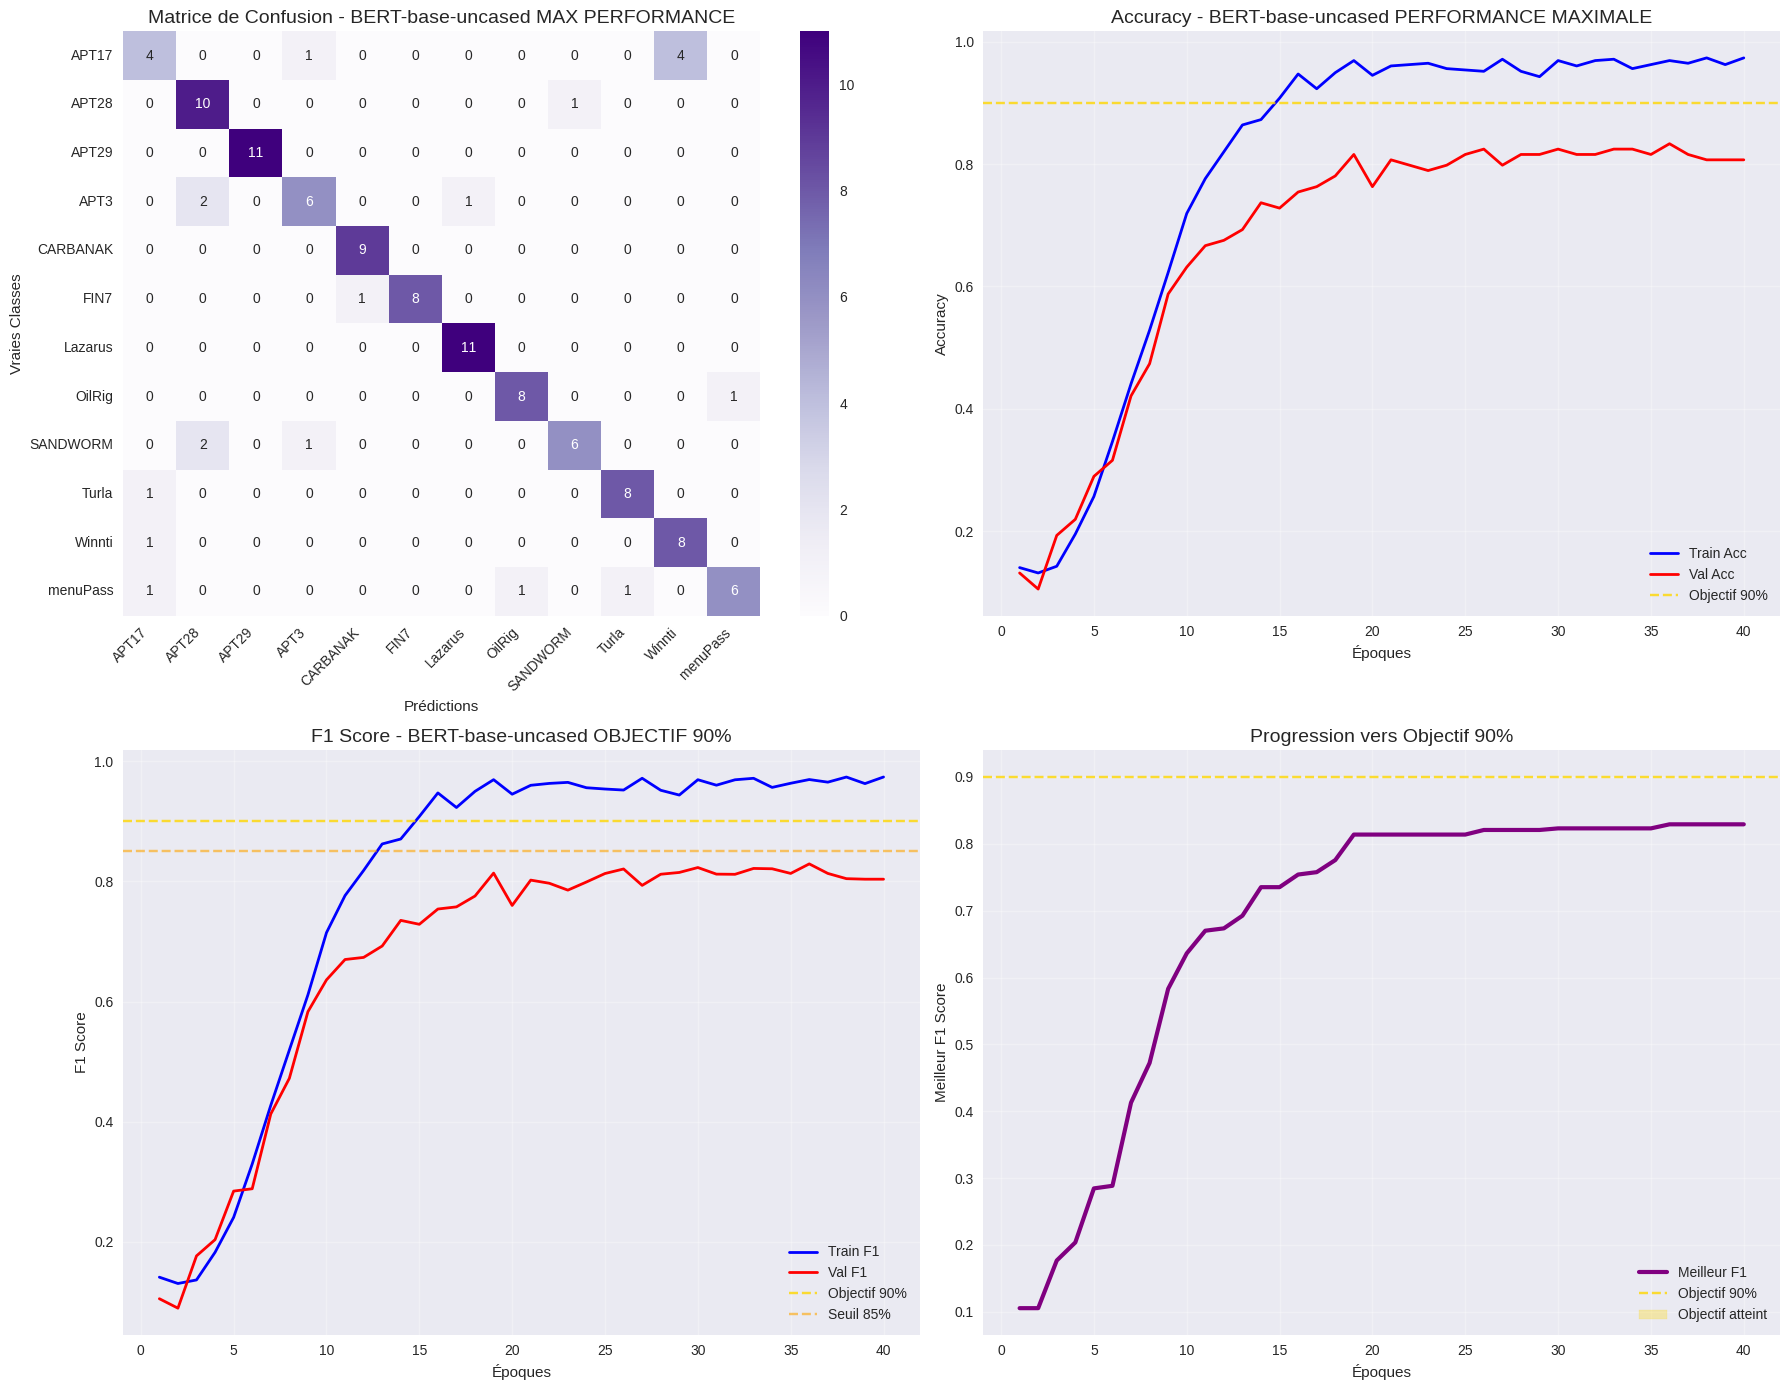

Résultats détaillés sauvegardés: training_results_bert_base_max_performance.json

RÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:
Accuracy: 0.8333
F1 Score: 0.8292
TRÈS BON: Performance solide (80%+)

Fichiers générés:
- Modèle: best_bert_base_max_performance.pt
- Résultats: training_results_bert_base_max_performance.json
- Visualisations: bert_base_max_performance_results.png

VALIDATION CROISÉE OPTIONNELLE
La validation croisée permet d'évaluer la stabilité du modèle
sur différentes divisions des données (plus robuste mais plus long).



Voulez-vous lancer la validation croisée 5-fold ? (y/n):  n


Validation croisée ignorée. Entraînement terminé.

ENTRAÎNEMENT TERMINÉ


In [17]:
#!/usr/bin/env python3
"""
BERT-base-uncased APT Classification - Optimisé Performance Maximum
Objectif: Atteindre 90%+ F1 Score
Configuration agressive pour performances maximales + CV optionnel
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class BERTMaxPerformance(nn.Module):
    """BERT-base-uncased optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "bert-base-uncased",
        num_classes: int = 12,  # Réduit à 12 (sans Other_APT)
        max_length: int = 384,
        dropout_rate: float = 0.15  # RÉDUIT pour plus de performance
    ):
        super(BERTMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle: {model_name}")
        
        # Modèle BERT standard
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture PLUS LARGE pour capacité maximale
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire ÉLARGIE pour plus de performance
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)  # AUGMENTÉ 256→512
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)   # Dropout léger
        
        # Deuxième couche intermédiaire pour plus de complexité
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()  # GELU pour meilleures performances
        
        print(f"BERT MAX PERFORMANCE initialisé - Architecture: {self.config.hidden_size} -> 512 -> 256 -> {num_classes}")
        print(f"Dropout minimal: {dropout_rate}, Optimisé pour 90%+ F1 Score")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # [CLS] token avec dropout minimal
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Première couche intermédiaire LARGE
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        # Batch norm conditionnelle
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        # Deuxième couche intermédiaire
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        # Classification finale
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerMaxPerformance:
    """Entraîneur optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(self):
        self.config = {
            'model_name': 'bert-base-uncased',
            'max_length': 384,
            'batch_size': 12,          # AUGMENTÉ pour plus de stabilité
            'learning_rate': 3e-5,     # AUGMENTÉ pour convergence plus rapide
            'num_epochs': 40,          # AUGMENTÉ pour plus d'apprentissage
            'warmup_ratio': 0.15,      # Plus de warmup pour stabilité
            'weight_decay': 0.01,      # RÉDUIT pour moins de pénalisation
            'validation_split': 0.2,
            'dropout_rate': 0.15,      # RÉDUIT pour plus de performance
            'early_stopping_patience': 12,   # AUGMENTÉ pour laisser plus de temps
            'min_improvement': 0.003,  # Plus sensible aux améliorations
            'gradient_accumulation': 4,      # AUGMENTÉ: Batch effectif = 48
            'cross_validation_folds': 5,
            'max_grad_norm': 2.0,      # AUGMENTÉ pour permettre plus de gradient
            'lr_scheduler': 'linear',   
            'label_smoothing': 0.02,   # RÉDUIT pour moins de pénalisation
            'monitor_overfitting': False,  # DÉSACTIVÉ: Focus sur performance
            'use_focal_loss': True,    # NOUVEAU: Focal Loss pour classes difficiles
            'focal_alpha': 0.25,
            'focal_gamma': 2.0
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données équilibrées"""
        print(f"Chargement des données équilibrées: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRESSION DE OTHER_APT (classe problématique)
        before_removal = len(df)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)
        removed_count = before_removal - len(df)
        print(f"SUPPRESSION Other_APT: -{removed_count} échantillons")
        print(f"Dataset nettoyé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher les statistiques d'équilibrage
        class_distribution = df['label'].value_counts()
        balance_ratio = class_distribution.max() / class_distribution.min()
        
        print(f"Distribution des classes (sans Other_APT):")
        for label, count in class_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        print(f"OBJECTIF: Atteindre 90%+ F1 Score sur ce dataset nettoyé")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df):
        """Crée les DataLoaders"""
        print("Création des DataLoaders...")
        
        # Division stratifiée
        train_df, val_df = train_test_split(
            df,
            test_size=self.config['validation_split'],
            random_state=42,
            stratify=df['label_encoded']
        )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        print(f"Batch effectif LARGE: {self.config['batch_size']} x {self.config['gradient_accumulation']} = {self.config['batch_size'] * self.config['gradient_accumulation']}")
        
        # Créer le modèle avec architecture large
        self.model = BERTMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré plus agressif
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss pour performance maximale"""
        # Poids des classes pour équilibrage
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss fonction optimisée pour performance
        if self.config['use_focal_loss']:
            print("Utilisation de Focal Loss pour classes difficiles")
            # Focal Loss implémentation simple
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        else:
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        
        # Optimiseur avec learning rate élevé
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm1.weight', 'batch_norm1.bias', 'batch_norm2.weight', 'batch_norm2.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler avec plus de steps
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"CONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- LR élevé: {self.config['learning_rate']}")
        print(f"- Weight decay réduit: {self.config['weight_decay']}")
        print(f"- Dropout minimal: {self.config['dropout_rate']}")
        print(f"- Batch effectif: {self.config['batch_size'] * self.config['gradient_accumulation']}")
        print(f"- Total steps: {total_steps}, Warmup: {warmup_steps}")
        print(f"- Epochs max: {self.config['num_epochs']}")
        print(f"- Early stopping patient: {self.config['early_stopping_patience']}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [PERF MAX]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation MAX', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement pour performance maximale"""
        print("ENTRAÎNEMENT BERT-BASE-UNCASED - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)")
        print("=" * 80)
        
        start_time = time.time()
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        train_df, val_df = self.create_data_loaders(df)
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement pour PERFORMANCE MAXIMALE...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart (informatif seulement)
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Information: {overfitting_gap:.4f}")
            
            # Progression vers 90%
            if val_f1 >= 0.90:
                print(f"OBJECTIF ATTEINT! F1: {val_f1:.4f} (≥90%)")
            elif val_f1 >= 0.85:
                print(f"Excellent progrès! F1: {val_f1:.4f} (≥85%)")
            elif val_f1 >= 0.80:
                print(f"Bon progrès! F1: {val_f1:.4f} (≥80%)")
            
            # Early stopping basé sur F1 score seulement
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_bert_base_max_performance.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap,
                    'dataset_info': 'max_performance_bert_base_without_other_apt'
                }, model_save_path)
                
                print(f"Nouveau record! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"MEILLEURE ACCURACY: {best_accuracy:.4f}")
        print(f"MEILLEUR F1 SCORE: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_bert_base_max_performance.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation de l'objectif
        if final_f1 >= 0.90:
            print("OBJECTIF ATTEINT: F1 ≥ 90%!")
        elif final_f1 >= 0.85:
            print("Très proche de l'objectif: F1 ≥ 85%")
        elif final_f1 >= 0.80:
            print("Bonne performance: F1 ≥ 80%")
        else:
            print("Objectif 90% non atteint")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée pour dataset équilibré"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - BERT-BASE-UNCASED PERFORMANCE MAXIMALE")
        print("=" * 90)
        
        # Charger et préparer les données (sans suppression Other_APT pour CV)
        df = pd.read_csv(data_path)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)  # Même suppression pour cohérence
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = BERTMaxPerformance(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_bert_base_max_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_bert_base_max_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE - BERT-BASE-UNCASED MAX")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config,
            'dataset_info': 'bert_base_max_performance_without_other_apt'
        }
        
        with open('cross_validation_bert_base_max_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_bert_base_max_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - BERT-base-uncased MAX PERFORMANCE', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax2.set_title('Accuracy - BERT-base-uncased PERFORMANCE MAXIMALE', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score avec objectif
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.6, label='Seuil 85%')
        ax3.set_title('F1 Score - BERT-base-uncased OBJECTIF 90%', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Progression vers l'objectif
        val_f1_progress = [max(self.history['val_f1'][:i+1]) for i in range(len(self.history['val_f1']))]
        ax4.plot(epochs, val_f1_progress, 'purple', linewidth=3, label='Meilleur F1')
        ax4.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax4.fill_between(epochs, val_f1_progress, 0.90, where=[f >= 0.90 for f in val_f1_progress], 
                        color='gold', alpha=0.3, label='Objectif atteint')
        ax4.set_title('Progression vers Objectif 90%', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Meilleur F1 Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('bert_base_max_performance_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'target_achieved': bool(final_f1 >= 0.90),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'dataset_info': 'bert_base_max_performance_without_other_apt',
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_bert_base_max_performance.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_bert_base_max_performance.json")

# Script principal optimisé pour PERFORMANCE MAXIMALE + CV OPTIONNEL
if __name__ == "__main__":
    print("BERT-BASE-UNCASED APT Classification - PERFORMANCE MAXIMALE")
    print("=" * 60)
    print("OBJECTIF: Atteindre 90%+ F1 Score")
    print("Configuration optimisée pour performances maximales + CV optionnel")
    print("BERT-base-uncased: Modèle BERT standard Google")
    
    trainer = APTTrainerMaxPerformance()
    
    # Chemin vers le dataset équilibré
    data_path = "expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv"
    
    # Alternative fallback
    if not Path(data_path).exists():
        print(f"Dataset équilibré non trouvé à {data_path}")
        print("Utilisation du dataset original comme fallback")
        data_path = "cti_datasets/processed/training_dataset.csv"
    
    if Path(data_path).exists():
        print(f"\nDataset utilisé: {data_path}")
        print(f"\nCONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- Modèle: {trainer.config['model_name']} (Standard)")
        print(f"- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)")
        print(f"- Batch effectif: {trainer.config['batch_size']} x {trainer.config['gradient_accumulation']} = {trainer.config['batch_size'] * trainer.config['gradient_accumulation']}")
        print(f"- Learning rate ÉLEVÉ: {trainer.config['learning_rate']}")
        print(f"- Dropout MINIMAL: {trainer.config['dropout_rate']}")
        print(f"- Weight decay RÉDUIT: {trainer.config['weight_decay']}")
        print(f"- Epochs AUGMENTÉES: {trainer.config['num_epochs']}")
        print(f"- Early stopping PATIENT: {trainer.config['early_stopping_patience']}")
        print(f"- Focal Loss: {trainer.config['use_focal_loss']}")
        
        # ENTRAÎNEMENT SIMPLE EN PREMIER
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT SIMPLE")
        print("="*60)
        
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation finale de l'objectif
        if final_f1 >= 0.90:
            print("MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!")
        elif final_f1 >= 0.85:
            print("EXCELLENT: Très proche de l'objectif (85%+)")
        elif final_f1 >= 0.80:
            print("TRÈS BON: Performance solide (80%+)")
        else:
            print("OBJECTIF NON ATTEINT: Ajustements nécessaires")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_bert_base_max_performance.pt")
        print(f"- Résultats: training_results_bert_base_max_performance.json")
        print(f"- Visualisations: bert_base_max_performance_results.png")
        
        # PROPOSER LA VALIDATION CROISÉE
        print(f"\n" + "="*60)
        print("VALIDATION CROISÉE OPTIONNELLE")
        print("="*60)
        print("La validation croisée permet d'évaluer la stabilité du modèle")
        print("sur différentes divisions des données (plus robuste mais plus long).")
        
        user_choice = input("\nVoulez-vous lancer la validation croisée 5-fold ? (y/n): ").lower().strip()
        
        if user_choice == 'y':
            print(f"\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerMaxPerformance()
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nRÉSULTATS FINAUX - VALIDATION CROISÉE:")
            print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
            print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
            
            # Analyser la stabilité
            if std_f1 < 0.03:
                print("Modèle très stable (variance très faible)")
            elif std_f1 < 0.05:
                print("Modèle stable (variance faible)")
            elif std_f1 < 0.08:
                print("Modèle cohérent (variance modérée)")
            
            # Comparaison des approches
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Entraînement simple - F1: {final_f1:.4f}")
            print(f"Validation croisée  - F1: {mean_f1:.4f} ± {std_f1:.4f}")
            
            cv_better = mean_f1 > final_f1
            difference = abs(mean_f1 - final_f1)
            
            if cv_better:
                print(f"La validation croisée donne de meilleurs résultats (+{difference:.4f})")
            else:
                print(f"L'entraînement simple donne de meilleurs résultats (+{difference:.4f})")
            
            if difference < 0.02:
                print("Les résultats sont très cohérents entre les deux approches")
            elif difference < 0.05:
                print("Les résultats sont cohérents entre les deux approches")
            else:
                print("Différence notable entre les approches - variance possible")
            
            print(f"\nFichiers CV générés:")
            print(f"- Résultats CV: cross_validation_bert_base_max_results.json")
            print(f"- Modèles par fold: best_bert_base_max_fold_*.pt")
            
        else:
            print("Validation croisée ignorée. Entraînement terminé.")
        
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT TERMINÉ")
        print("="*60)
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le preprocessing et l'équilibrage des données")

# **Roberta-base**

ROBERTA APT Classification - PERFORMANCE MAXIMALE
OBJECTIF: Atteindre 90%+ F1 Score
Configuration optimisée pour performances maximales + CV optionnel
RoBERTa: Modèle transformer robuste et optimisé
Device: cuda

Dataset utilisé: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv

CONFIGURATION ROBERTA PERFORMANCE MAXIMALE:
- Modèle: roberta-base
- Alternatives: microsoft/codebert-base, deepset/roberta-base-squad2
- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)
- Batch effectif: 12 x 4 = 48
- Learning rate ÉLEVÉ: 3e-05
- Dropout MINIMAL: 0.15
- Weight decay RÉDUIT: 0.01
- Epochs AUGMENTÉES: 40
- Early stopping PATIENT: 12
- Focal Loss: True

ENTRAÎNEMENT SIMPLE
ENTRAÎNEMENT ROBERTA - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)
Chargement des données équilibrées: expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv
Données chargées: 615 échantillons, 13 classes
SUPPRESSION Other_APT: -45 échantillons
Dataset nettoyé: 570 échantillons, 12

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTa MAX PERFORMANCE initialisé - Architecture: 768 -> 512 -> 256 -> 12
Dropout minimal: 0.15, Optimisé pour 90%+ F1 Score
Poids des classes: tensor([1.0556, 0.8636, 0.8636, 1.0556, 1.0556, 1.0556, 0.8636, 1.0556, 1.0556,
        1.0556, 1.0556, 1.0556], device='cuda:0')
Utilisation de Focal Loss pour classes difficiles
CONFIGURATION ROBERTA PERFORMANCE MAXIMALE:
- LR élevé: 3e-05
- Weight decay réduit: 0.01
- Dropout minimal: 0.15
- Batch effectif: 48
- Total steps: 380, Warmup: 57
- Epochs max: 40
- Early stopping patient: 12

Début de l'entraînement RoBERTa pour PERFORMANCE MAXIMALE...

ÉPOQUE 1/40


Train - Loss: 2.6122, Acc: 0.1009, F1: 0.0993
Val   - Loss: 2.5023, Acc: 0.0789, F1: 0.0116
Gap   - Information: 0.0219
Nouveau record! F1: 0.0116 (+0.0116)

ÉPOQUE 2/40


Train - Loss: 2.5843, Acc: 0.0987, F1: 0.0999
Val   - Loss: 2.4740, Acc: 0.0877, F1: 0.0252
Gap   - Information: 0.0110
Nouveau record! F1: 0.0252 (+0.0136)

ÉPOQUE 3/40


Train - Loss: 2.5298, Acc: 0.1250, F1: 0.1273
Val   - Loss: 2.4355, Acc: 0.1053, F1: 0.0619
Gap   - Information: 0.0197
Nouveau record! F1: 0.0619 (+0.0367)

ÉPOQUE 4/40


Train - Loss: 2.4346, Acc: 0.1623, F1: 0.1612
Val   - Loss: 2.3625, Acc: 0.1316, F1: 0.0797
Gap   - Information: 0.0307
Nouveau record! F1: 0.0797 (+0.0179)

ÉPOQUE 5/40


Train - Loss: 2.3763, Acc: 0.1754, F1: 0.1559
Val   - Loss: 2.2725, Acc: 0.1754, F1: 0.0996
Gap   - Information: 0.0000
Nouveau record! F1: 0.0996 (+0.0199)

ÉPOQUE 6/40


Train - Loss: 2.3375, Acc: 0.1601, F1: 0.1411
Val   - Loss: 2.1914, Acc: 0.2281, F1: 0.1997
Gap   - Information: -0.0680
Nouveau record! F1: 0.1997 (+0.1000)

ÉPOQUE 7/40


Train - Loss: 2.2281, Acc: 0.2083, F1: 0.1944
Val   - Loss: 2.1225, Acc: 0.2982, F1: 0.2126
Gap   - Information: -0.0899
Nouveau record! F1: 0.2126 (+0.0130)

ÉPOQUE 8/40


Train - Loss: 2.0949, Acc: 0.2807, F1: 0.2479
Val   - Loss: 2.0154, Acc: 0.3070, F1: 0.2510
Gap   - Information: -0.0263
Nouveau record! F1: 0.2510 (+0.0384)

ÉPOQUE 9/40


Train - Loss: 2.0494, Acc: 0.3092, F1: 0.2857
Val   - Loss: 1.9708, Acc: 0.2807, F1: 0.2414
Gap   - Information: 0.0285

ÉPOQUE 10/40


Train - Loss: 1.8837, Acc: 0.3991, F1: 0.3871
Val   - Loss: 1.8313, Acc: 0.4035, F1: 0.3772
Gap   - Information: -0.0044
Nouveau record! F1: 0.3772 (+0.1261)

ÉPOQUE 11/40


Train - Loss: 1.7190, Acc: 0.4715, F1: 0.4573
Val   - Loss: 1.6836, Acc: 0.4737, F1: 0.4641
Gap   - Information: -0.0022
Nouveau record! F1: 0.4641 (+0.0870)

ÉPOQUE 12/40


Train - Loss: 1.4996, Acc: 0.5921, F1: 0.5831
Val   - Loss: 1.5122, Acc: 0.5789, F1: 0.5589
Gap   - Information: 0.0132
Nouveau record! F1: 0.5589 (+0.0947)

ÉPOQUE 13/40


Train - Loss: 1.3223, Acc: 0.6601, F1: 0.6546
Val   - Loss: 1.3274, Acc: 0.6579, F1: 0.6423
Gap   - Information: 0.0022
Nouveau record! F1: 0.6423 (+0.0834)

ÉPOQUE 14/40


Train - Loss: 1.1602, Acc: 0.7478, F1: 0.7445
Val   - Loss: 1.2212, Acc: 0.7193, F1: 0.7108
Gap   - Information: 0.0285
Nouveau record! F1: 0.7108 (+0.0685)

ÉPOQUE 15/40


Train - Loss: 1.0284, Acc: 0.7522, F1: 0.7497
Val   - Loss: 1.0438, Acc: 0.7895, F1: 0.7870
Gap   - Information: -0.0373
Nouveau record! F1: 0.7870 (+0.0762)

ÉPOQUE 16/40


Train - Loss: 0.8706, Acc: 0.8443, F1: 0.8444
Val   - Loss: 0.9924, Acc: 0.7544, F1: 0.7525
Gap   - Information: 0.0899

ÉPOQUE 17/40


Train - Loss: 0.7180, Acc: 0.8794, F1: 0.8806
Val   - Loss: 0.8850, Acc: 0.7895, F1: 0.7823
Gap   - Information: 0.0899

ÉPOQUE 18/40


Train - Loss: 0.6346, Acc: 0.9211, F1: 0.9212
Val   - Loss: 0.8083, Acc: 0.7982, F1: 0.7900
Gap   - Information: 0.1228
Nouveau record! F1: 0.7900 (+0.0030)

ÉPOQUE 19/40


Train - Loss: 0.5800, Acc: 0.9057, F1: 0.9061
Val   - Loss: 0.7783, Acc: 0.7895, F1: 0.7831
Gap   - Information: 0.1162

ÉPOQUE 20/40


Train - Loss: 0.5577, Acc: 0.9145, F1: 0.9146
Val   - Loss: 0.7857, Acc: 0.7719, F1: 0.7541
Gap   - Information: 0.1425

ÉPOQUE 21/40


Train - Loss: 0.4839, Acc: 0.9364, F1: 0.9363
Val   - Loss: 0.7444, Acc: 0.8246, F1: 0.8209
Gap   - Information: 0.1118
Bon progrès! F1: 0.8209 (≥80%)
Nouveau record! F1: 0.8209 (+0.0308)

ÉPOQUE 22/40


Train - Loss: 0.4835, Acc: 0.9276, F1: 0.9283
Val   - Loss: 0.7353, Acc: 0.8158, F1: 0.8104
Gap   - Information: 0.1118
Bon progrès! F1: 0.8104 (≥80%)

ÉPOQUE 23/40


Train - Loss: 0.4338, Acc: 0.9408, F1: 0.9414
Val   - Loss: 0.6942, Acc: 0.8246, F1: 0.8190
Gap   - Information: 0.1162
Bon progrès! F1: 0.8190 (≥80%)

ÉPOQUE 24/40


Train - Loss: 0.4006, Acc: 0.9474, F1: 0.9472
Val   - Loss: 0.6560, Acc: 0.8509, F1: 0.8471
Gap   - Information: 0.0965
Bon progrès! F1: 0.8471 (≥80%)
Nouveau record! F1: 0.8471 (+0.0262)

ÉPOQUE 25/40


Train - Loss: 0.3542, Acc: 0.9583, F1: 0.9584
Val   - Loss: 0.6810, Acc: 0.8246, F1: 0.8146
Gap   - Information: 0.1338
Bon progrès! F1: 0.8146 (≥80%)

ÉPOQUE 26/40


Train - Loss: 0.3901, Acc: 0.9452, F1: 0.9456
Val   - Loss: 0.6893, Acc: 0.8158, F1: 0.8086
Gap   - Information: 0.1294
Bon progrès! F1: 0.8086 (≥80%)

ÉPOQUE 27/40


Train - Loss: 0.3371, Acc: 0.9605, F1: 0.9603
Val   - Loss: 0.7143, Acc: 0.7895, F1: 0.7774
Gap   - Information: 0.1711

ÉPOQUE 28/40


Train - Loss: 0.2879, Acc: 0.9759, F1: 0.9758
Val   - Loss: 0.6899, Acc: 0.7982, F1: 0.7986
Gap   - Information: 0.1776

ÉPOQUE 29/40


Train - Loss: 0.3508, Acc: 0.9496, F1: 0.9506
Val   - Loss: 0.7800, Acc: 0.8246, F1: 0.8159
Gap   - Information: 0.1250
Bon progrès! F1: 0.8159 (≥80%)

ÉPOQUE 30/40


Train - Loss: 0.3302, Acc: 0.9561, F1: 0.9563
Val   - Loss: 0.7542, Acc: 0.8158, F1: 0.8061
Gap   - Information: 0.1404
Bon progrès! F1: 0.8061 (≥80%)

ÉPOQUE 31/40


Train - Loss: 0.3190, Acc: 0.9583, F1: 0.9585
Val   - Loss: 0.7604, Acc: 0.8070, F1: 0.8040
Gap   - Information: 0.1513
Bon progrès! F1: 0.8040 (≥80%)

ÉPOQUE 32/40


Train - Loss: 0.2914, Acc: 0.9715, F1: 0.9715
Val   - Loss: 0.7357, Acc: 0.8070, F1: 0.7975
Gap   - Information: 0.1645

ÉPOQUE 33/40


Train - Loss: 0.2819, Acc: 0.9605, F1: 0.9611
Val   - Loss: 0.7231, Acc: 0.8070, F1: 0.7975
Gap   - Information: 0.1535

ÉPOQUE 34/40


Train - Loss: 0.2802, Acc: 0.9715, F1: 0.9715
Val   - Loss: 0.7362, Acc: 0.8246, F1: 0.8173
Gap   - Information: 0.1469
Bon progrès! F1: 0.8173 (≥80%)

ÉPOQUE 35/40


Train - Loss: 0.2791, Acc: 0.9627, F1: 0.9630
Val   - Loss: 0.7303, Acc: 0.8246, F1: 0.8173
Gap   - Information: 0.1382
Bon progrès! F1: 0.8173 (≥80%)

ÉPOQUE 36/40


Train - Loss: 0.2954, Acc: 0.9627, F1: 0.9627
Val   - Loss: 0.7098, Acc: 0.8246, F1: 0.8173
Gap   - Information: 0.1382
Bon progrès! F1: 0.8173 (≥80%)
Early stopping après 36 époques

Entraînement terminé en 27.2 minutes
MEILLEURE ACCURACY: 0.8509
MEILLEUR F1 SCORE: 0.8471



PERFORMANCE FINALE:
Accuracy: 0.8509
F1 Score: 0.8471
Bonne performance: F1 ≥ 80%

Classification Report:
              precision    recall  f1-score   support

       APT17     0.6667    0.4444    0.5333         9
       APT28     0.9000    0.8182    0.8571        11
       APT29     0.7857    1.0000    0.8800        11
        APT3     0.7273    0.8889    0.8000         9
    CARBANAK     0.9000    1.0000    0.9474         9
        FIN7     1.0000    0.8889    0.9412         9
     Lazarus     0.8462    1.0000    0.9167        11
      OilRig     1.0000    1.0000    1.0000         9
    SANDWORM     1.0000    0.6667    0.8000         9
       Turla     1.0000    0.7778    0.8750         9
      Winnti     0.6364    0.7778    0.7000         9
    menuPass     0.8889    0.8889    0.8889         9

    accuracy                         0.8509       114
   macro avg     0.8626    0.8460    0.8450       114
weighted avg     0.8616    0.8509    0.8471       114



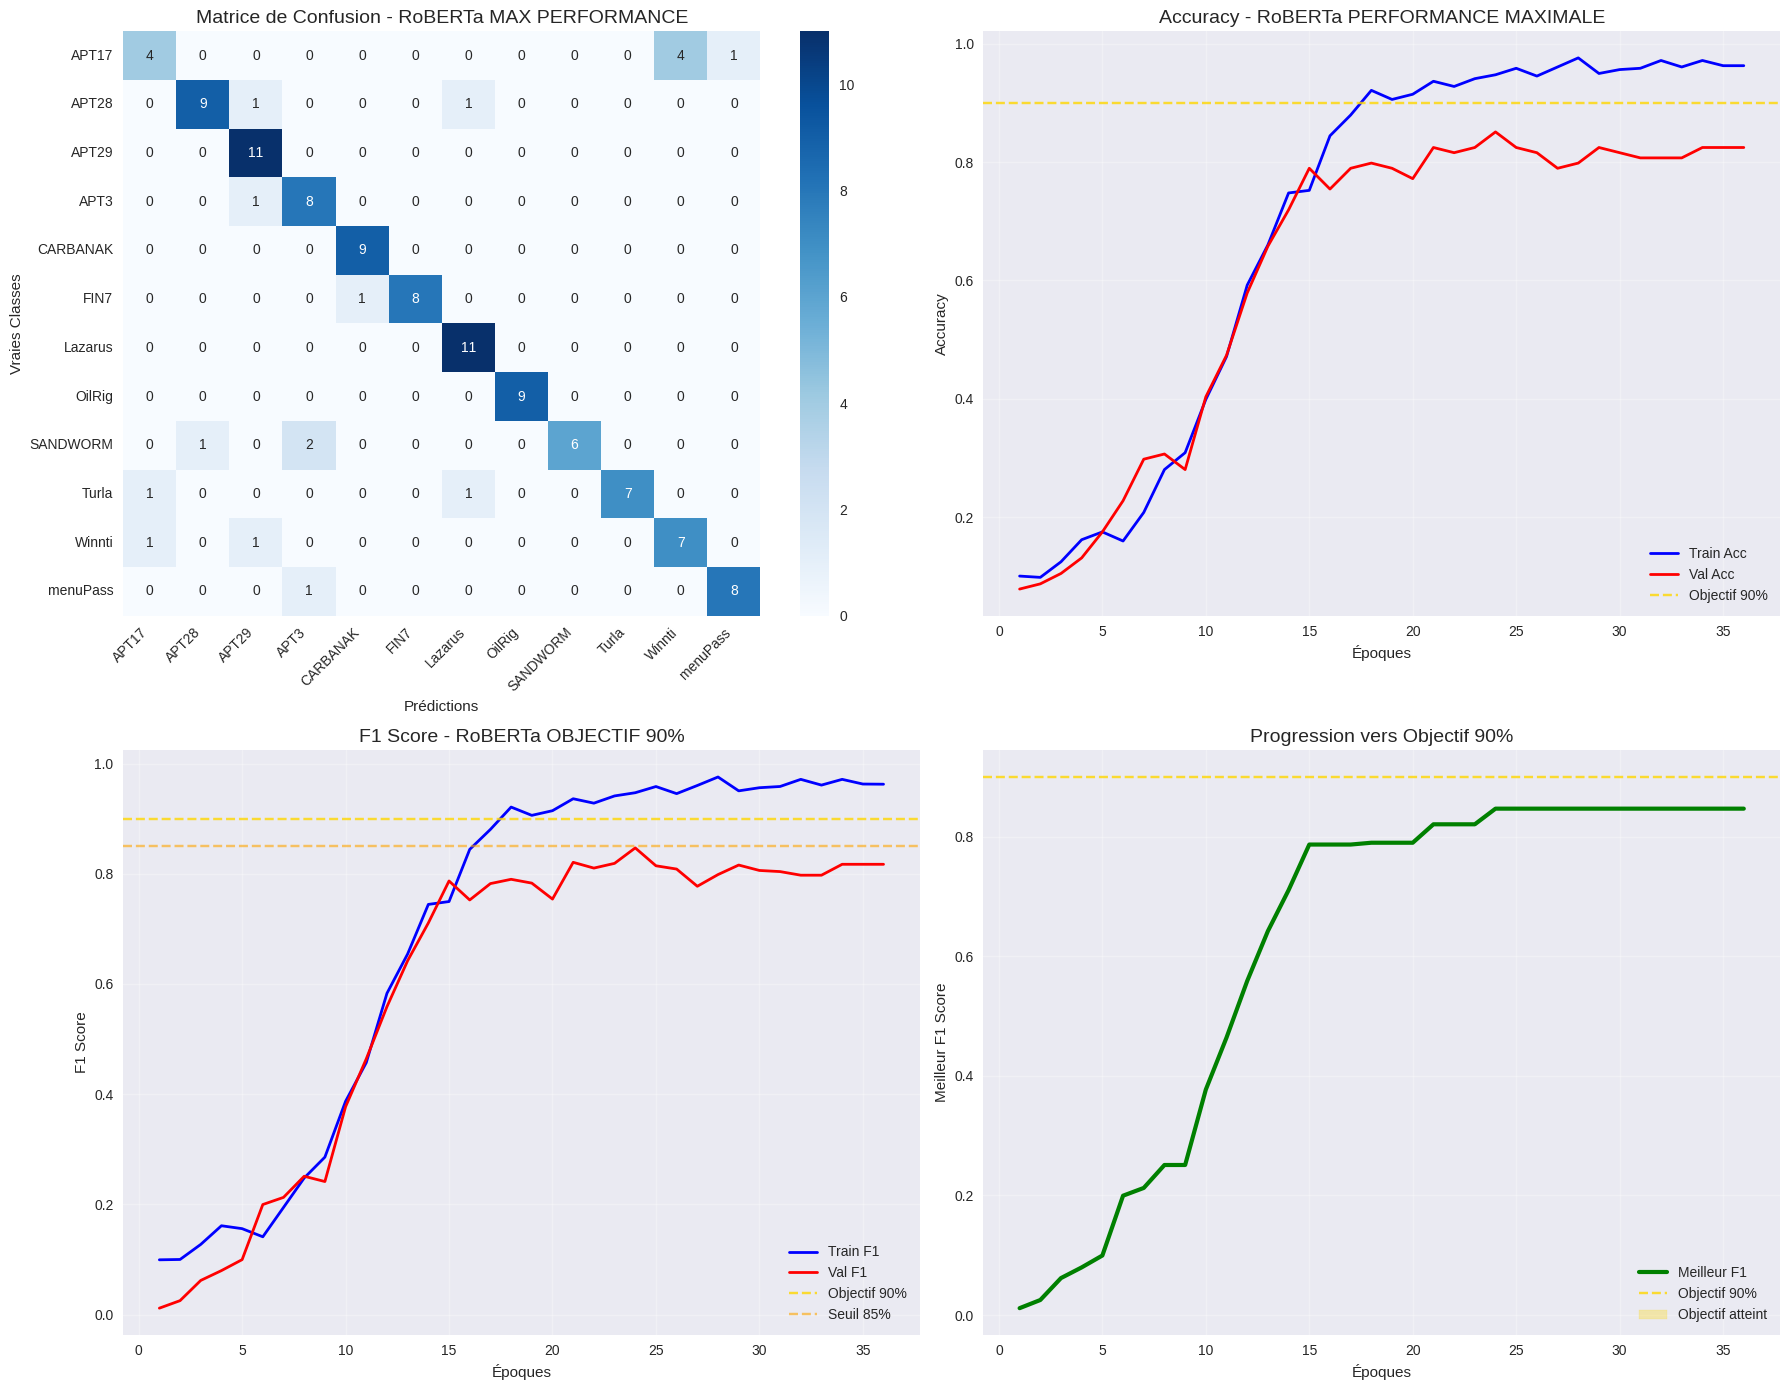

Résultats détaillés sauvegardés: training_results_roberta_max_performance.json

RÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:
Accuracy: 0.8509
F1 Score: 0.8471
TRÈS BON: Performance solide (80%+)

Fichiers générés:
- Modèle: best_roberta_max_performance.pt
- Résultats: training_results_roberta_max_performance.json
- Visualisations: roberta_max_performance_results.png

VALIDATION CROISÉE OPTIONNELLE
La validation croisée permet d'évaluer la stabilité du modèle
sur différentes divisions des données (plus robuste mais plus long).



Voulez-vous lancer la validation croisée 5-fold ? (y/n):  n


Validation croisée ignorée. Entraînement terminé.

ENTRAÎNEMENT TERMINÉ


In [10]:
#!/usr/bin/env python3
"""
RoBERTa APT Classification - Optimisé Performance Maximum
Objectif: Atteindre 90%+ F1 Score
Configuration agressive pour performances maximales + CV optionnel
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    RobertaTokenizer, RobertaModel, RobertaConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class RoBERTaMaxPerformance(nn.Module):
    """RoBERTa optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "roberta-base",  # Options: roberta-base, microsoft/codebert-base, deepset/roberta-base-squad2
        num_classes: int = 12,  # Réduit à 12 (sans Other_APT)
        max_length: int = 384,
        dropout_rate: float = 0.15  # RÉDUIT pour plus de performance
    ):
        super(RoBERTaMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle RoBERTa: {model_name}")
        
        # Modèle RoBERTa - Alternative robuste à BERT
        self.tokenizer = RobertaTokenizer.from_pretrained(model_name)
        self.config = RobertaConfig.from_pretrained(model_name)
        self.roberta = RobertaModel.from_pretrained(model_name)
        
        # Architecture PLUS LARGE pour capacité maximale
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire ÉLARGIE pour plus de performance
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)  # AUGMENTÉ 256→512
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)   # Dropout léger
        
        # Deuxième couche intermédiaire pour plus de complexité
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()  # GELU pour meilleures performances
        
        print(f"RoBERTa MAX PERFORMANCE initialisé - Architecture: {self.config.hidden_size} -> 512 -> 256 -> {num_classes}")
        print(f"Dropout minimal: {dropout_rate}, Optimisé pour 90%+ F1 Score")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        
        # [CLS] token avec dropout minimal
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Première couche intermédiaire LARGE
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        # Batch norm conditionnelle
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        # Deuxième couche intermédiaire
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        # Classification finale
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerMaxPerformance:
    """Entraîneur RoBERTa optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(self):
        self.config = {
            'model_name': 'roberta-base',      # RoBERTa standard - Alternatives: microsoft/codebert-base, deepset/roberta-base-squad2
            'max_length': 384,
            'batch_size': 12,          # AUGMENTÉ pour plus de stabilité
            'learning_rate': 3e-5,     # AUGMENTÉ pour convergence plus rapide
            'num_epochs': 40,          # AUGMENTÉ pour plus d'apprentissage
            'warmup_ratio': 0.15,      # Plus de warmup pour stabilité
            'weight_decay': 0.01,      # RÉDUIT pour moins de pénalisation
            'validation_split': 0.2,
            'dropout_rate': 0.15,      # RÉDUIT pour plus de performance
            'early_stopping_patience': 12,   # AUGMENTÉ pour laisser plus de temps
            'min_improvement': 0.003,  # Plus sensible aux améliorations
            'gradient_accumulation': 4,      # AUGMENTÉ: Batch effectif = 48
            'cross_validation_folds': 5,
            'max_grad_norm': 2.0,      # AUGMENTÉ pour permettre plus de gradient
            'lr_scheduler': 'linear',   
            'label_smoothing': 0.02,   # RÉDUIT pour moins de pénalisation
            'monitor_overfitting': False,  # DÉSACTIVÉ: Focus sur performance
            'use_focal_loss': True,    # NOUVEAU: Focal Loss pour classes difficiles
            'focal_alpha': 0.25,
            'focal_gamma': 2.0
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données équilibrées"""
        print(f"Chargement des données équilibrées: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRESSION DE OTHER_APT (classe problématique)
        before_removal = len(df)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)
        removed_count = before_removal - len(df)
        print(f"SUPPRESSION Other_APT: -{removed_count} échantillons")
        print(f"Dataset nettoyé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher les statistiques d'équilibrage
        class_distribution = df['label'].value_counts()
        balance_ratio = class_distribution.max() / class_distribution.min()
        
        print(f"Distribution des classes (sans Other_APT):")
        for label, count in class_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        print(f"OBJECTIF: Atteindre 90%+ F1 Score sur ce dataset nettoyé avec RoBERTa")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df):
        """Crée les DataLoaders"""
        print("Création des DataLoaders...")
        
        # Division stratifiée
        train_df, val_df = train_test_split(
            df,
            test_size=self.config['validation_split'],
            random_state=42,
            stratify=df['label_encoded']
        )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        print(f"Batch effectif LARGE: {self.config['batch_size']} x {self.config['gradient_accumulation']} = {self.config['batch_size'] * self.config['gradient_accumulation']}")
        
        # Créer le modèle avec architecture large
        self.model = RoBERTaMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré plus agressif
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss pour performance maximale"""
        # Poids des classes pour équilibrage
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss fonction optimisée pour performance
        if self.config['use_focal_loss']:
            print("Utilisation de Focal Loss pour classes difficiles")
            # Focal Loss implémentation simple
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        else:
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        
        # Optimiseur avec learning rate élevé
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm1.weight', 'batch_norm1.bias', 'batch_norm2.weight', 'batch_norm2.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler avec plus de steps
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"CONFIGURATION ROBERTA PERFORMANCE MAXIMALE:")
        print(f"- LR élevé: {self.config['learning_rate']}")
        print(f"- Weight decay réduit: {self.config['weight_decay']}")
        print(f"- Dropout minimal: {self.config['dropout_rate']}")
        print(f"- Batch effectif: {self.config['batch_size'] * self.config['gradient_accumulation']}")
        print(f"- Total steps: {total_steps}, Warmup: {warmup_steps}")
        print(f"- Epochs max: {self.config['num_epochs']}")
        print(f"- Early stopping patient: {self.config['early_stopping_patience']}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [RoBERTa MAX]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation RoBERTa', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement pour performance maximale"""
        print("ENTRAÎNEMENT ROBERTA - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)")
        print("=" * 70)
        
        start_time = time.time()
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        train_df, val_df = self.create_data_loaders(df)
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement RoBERTa pour PERFORMANCE MAXIMALE...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart (informatif seulement)
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Information: {overfitting_gap:.4f}")
            
            # Progression vers 90%
            if val_f1 >= 0.90:
                print(f"OBJECTIF ATTEINT! F1: {val_f1:.4f} (≥90%)")
            elif val_f1 >= 0.85:
                print(f"Excellent progrès! F1: {val_f1:.4f} (≥85%)")
            elif val_f1 >= 0.80:
                print(f"Bon progrès! F1: {val_f1:.4f} (≥80%)")
            
            # Early stopping basé sur F1 score seulement
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_roberta_max_performance.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap,
                    'dataset_info': 'max_performance_roberta_without_other_apt'
                }, model_save_path)
                
                print(f"Nouveau record! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"MEILLEURE ACCURACY: {best_accuracy:.4f}")
        print(f"MEILLEUR F1 SCORE: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_roberta_max_performance.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation de l'objectif
        if final_f1 >= 0.90:
            print("OBJECTIF ATTEINT: F1 ≥ 90%!")
        elif final_f1 >= 0.85:
            print("Très proche de l'objectif: F1 ≥ 85%")
        elif final_f1 >= 0.80:
            print("Bonne performance: F1 ≥ 80%")
        else:
            print("Objectif 90% non atteint")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée pour dataset équilibré"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - ROBERTA PERFORMANCE MAXIMALE")
        print("=" * 80)
        
        # Charger et préparer les données (sans suppression Other_APT pour CV)
        df = pd.read_csv(data_path)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)  # Même suppression pour cohérence
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = RoBERTaMaxPerformance(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_roberta_max_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_roberta_max_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE - ROBERTA MAX")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config,
            'dataset_info': 'roberta_max_performance_without_other_apt'
        }
        
        with open('cross_validation_roberta_max_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_roberta_max_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - RoBERTa MAX PERFORMANCE', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax2.set_title('Accuracy - RoBERTa PERFORMANCE MAXIMALE', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score avec objectif
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.6, label='Seuil 85%')
        ax3.set_title('F1 Score - RoBERTa OBJECTIF 90%', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Progression vers l'objectif
        val_f1_progress = [max(self.history['val_f1'][:i+1]) for i in range(len(self.history['val_f1']))]
        ax4.plot(epochs, val_f1_progress, 'green', linewidth=3, label='Meilleur F1')
        ax4.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax4.fill_between(epochs, val_f1_progress, 0.90, where=[f >= 0.90 for f in val_f1_progress], 
                        color='gold', alpha=0.3, label='Objectif atteint')
        ax4.set_title('Progression vers Objectif 90%', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Meilleur F1 Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('roberta_max_performance_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'target_achieved': bool(final_f1 >= 0.90),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'dataset_info': 'roberta_max_performance_without_other_apt',
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_roberta_max_performance.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_roberta_max_performance.json")

# Script principal optimisé pour PERFORMANCE MAXIMALE + CV OPTIONNEL
if __name__ == "__main__":
    print("ROBERTA APT Classification - PERFORMANCE MAXIMALE")
    print("=" * 60)
    print("OBJECTIF: Atteindre 90%+ F1 Score")
    print("Configuration optimisée pour performances maximales + CV optionnel")
    print("RoBERTa: Modèle transformer robuste et optimisé")
    
    trainer = APTTrainerMaxPerformance()
    
    # Chemin vers le dataset équilibré
    data_path = "expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv"
    
    # Alternative fallback
    if not Path(data_path).exists():
        print(f"Dataset équilibré non trouvé à {data_path}")
        print("Utilisation du dataset original comme fallback")
        data_path = "cti_datasets/processed/training_dataset.csv"
    
    if Path(data_path).exists():
        print(f"\nDataset utilisé: {data_path}")
        print(f"\nCONFIGURATION ROBERTA PERFORMANCE MAXIMALE:")
        print(f"- Modèle: {trainer.config['model_name']}")
        print(f"- Alternatives: microsoft/codebert-base, deepset/roberta-base-squad2")
        print(f"- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)")
        print(f"- Batch effectif: {trainer.config['batch_size']} x {trainer.config['gradient_accumulation']} = {trainer.config['batch_size'] * trainer.config['gradient_accumulation']}")
        print(f"- Learning rate ÉLEVÉ: {trainer.config['learning_rate']}")
        print(f"- Dropout MINIMAL: {trainer.config['dropout_rate']}")
        print(f"- Weight decay RÉDUIT: {trainer.config['weight_decay']}")
        print(f"- Epochs AUGMENTÉES: {trainer.config['num_epochs']}")
        print(f"- Early stopping PATIENT: {trainer.config['early_stopping_patience']}")
        print(f"- Focal Loss: {trainer.config['use_focal_loss']}")
        
        # ENTRAÎNEMENT SIMPLE EN PREMIER
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT SIMPLE")
        print("="*60)
        
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation finale de l'objectif
        if final_f1 >= 0.90:
            print("MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!")
        elif final_f1 >= 0.85:
            print("EXCELLENT: Très proche de l'objectif (85%+)")
        elif final_f1 >= 0.80:
            print("TRÈS BON: Performance solide (80%+)")
        else:
            print("OBJECTIF NON ATTEINT: Ajustements nécessaires")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_roberta_max_performance.pt")
        print(f"- Résultats: training_results_roberta_max_performance.json")
        print(f"- Visualisations: roberta_max_performance_results.png")
        
        # PROPOSER LA VALIDATION CROISÉE
        print(f"\n" + "="*60)
        print("VALIDATION CROISÉE OPTIONNELLE")
        print("="*60)
        print("La validation croisée permet d'évaluer la stabilité du modèle")
        print("sur différentes divisions des données (plus robuste mais plus long).")
        
        user_choice = input("\nVoulez-vous lancer la validation croisée 5-fold ? (y/n): ").lower().strip()
        
        if user_choice == 'y':
            print(f"\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerMaxPerformance()
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nRÉSULTATS FINAUX - VALIDATION CROISÉE:")
            print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
            print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
            
            # Analyser la stabilité
            if std_f1 < 0.03:
                print("Modèle très stable (variance très faible)")
            elif std_f1 < 0.05:
                print("Modèle stable (variance faible)")
            elif std_f1 < 0.08:
                print("Modèle cohérent (variance modérée)")
            
            # Comparaison des approches
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Entraînement simple - F1: {final_f1:.4f}")
            print(f"Validation croisée  - F1: {mean_f1:.4f} ± {std_f1:.4f}")
            
            cv_better = mean_f1 > final_f1
            difference = abs(mean_f1 - final_f1)
            
            if cv_better:
                print(f"La validation croisée donne de meilleurs résultats (+{difference:.4f})")
            else:
                print(f"L'entraînement simple donne de meilleurs résultats (+{difference:.4f})")
            
            if difference < 0.02:
                print("Les résultats sont très cohérents entre les deux approches")
            elif difference < 0.05:
                print("Les résultats sont cohérents entre les deux approches")
            else:
                print("Différence notable entre les approches - variance possible")
            
            print(f"\nFichiers CV générés:")
            print(f"- Résultats CV: cross_validation_roberta_max_results.json")
            print(f"- Modèles par fold: best_roberta_max_fold_*.pt")
            
        else:
            print("Validation croisée ignorée. Entraînement terminé.")
        
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT TERMINÉ")
        print("="*60)
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le preprocessing et l'équilibrage des données")

# **Generative AI - Llama 3.1-8B-instruct**

In [ ]:
#!/usr/bin/env python3
"""
CTI Generator Avancé pour Entraînement Classificateur BERT
Version optimisée pour la génération de rapports haute qualité sur 16 groupes APT
"""

import torch
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import re
import gc
import warnings
import os
from tqdm.auto import tqdm
import json
from pathlib import Path

# Configuration token Hugging Face
try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    HF_TOKEN = user_secrets.get_secret("HF_TOKEN")
except:
    HF_TOKEN = os.environ.get("HF_TOKEN", None)

warnings.filterwarnings('ignore')

class AdvancedCTIGenerator:
    """Générateur CTI avancé pour entraînement BERT avec 16 groupes APT"""
    
    def __init__(self, model_name="meta-llama/Llama-3.1-8B-Instruct"):
        self.model_name = model_name
        self.hf_token = HF_TOKEN
        self.pipe = None
        self.tokenizer = None
        self.model = None
        
        print(f"🚀 Initialisation du générateur CTI avancé pour BERT avec {model_name}")
        
        # Profils APT complets pour les 16 groupes
        self.apt_profiles = {
            'APT28': {
                'country': 'Russia',
                'attribution': 'GRU Unit 26165 (Main Intelligence Directorate)',
                'aliases': ['Fancy Bear', 'Sofacy', 'Sednit', 'STRONTIUM', 'Pawn Storm', 'Tsar Team'],
                'malware': ['X-Agent', 'Sofacy', 'GAMEFISH', 'Zebrocy', 'Cannon', 'Komplex', 'CHOPSTICK', 'Downdelph'],
                'targets': ['Government agencies', 'Military organizations', 'Defense contractors', 'Think tanks', 'Political organizations'],
                'ttps': ['T1566.001', 'T1059.001', 'T1055', 'T1027', 'T1105', 'T1078.002', 'T1083', 'T1082', 'T1003', 'T1070'],
                'sectors': ['Government', 'Defense', 'Aerospace', 'Media', 'Political'],
                'motive': 'Intelligence collection, disinformation campaigns, and geopolitical influence operations',
                'first_seen': '2007',
                'notable_campaigns': ['DNC hack 2016', 'Ukrainian power grid attacks', 'Olympic Games disruption', 'Bundestag breach', 'DCCC hack']
            },
            
            'Lazarus': {
                'country': 'North Korea',
                'attribution': 'Reconnaissance General Bureau Unit 121',
                'aliases': ['Hidden Cobra', 'APT38', 'Guardians of Peace', 'Zinc', 'Nickel Academy', 'BeagleBoyz'],
                'malware': ['HOPLIGHT', 'ELECTRICFISH', 'AppleJeus', 'Manuscrypt', 'BADCALL', 'ARTFULPIE', 'BLINDINGCAN', 'SHARPKNOT'],
                'targets': ['Financial institutions', 'Cryptocurrency exchanges', 'Critical infrastructure', 'Entertainment industry', 'Healthcare'],
                'ttps': ['T1055', 'T1140', 'T1083', 'T1041', 'T1027', 'T1490', 'T1566.001', 'T1105', 'T1204', 'T1112'],
                'sectors': ['Financial', 'Entertainment', 'Cryptocurrency', 'Healthcare', 'Government'],
                'motive': 'Financial theft, cryptocurrency theft, ransomware, and strategic disruption',
                'first_seen': '2009',
                'notable_campaigns': ['Sony Pictures hack', 'SWIFT banking heists', 'WannaCry ransomware', 'FASTCash ATM attacks', 'Cryptocurrency exchange thefts']
            },
            
            'APT29': {
                'country': 'Russia',
                'attribution': 'SVR Foreign Intelligence Service',
                'aliases': ['Cozy Bear', 'The Dukes', 'NOBELIUM', 'UNC2452', 'Dark Halo', 'StellarParticle', 'YTTRIUM'],
                'malware': ['HAMMERTOSS', 'COZYDUKE', 'WELLMESS', 'SUNBURST', 'TEARDROP', 'RAINDROP', 'BEACON', 'GOLDMAX'],
                'targets': ['Government agencies', 'Think tanks', 'Healthcare organizations', 'Technology companies', 'Diplomatic missions'],
                'ttps': ['T1566.002', 'T1059.001', 'T1055', 'T1027', 'T1071.001', 'T1078', 'T1195.002', 'T1569.002', 'T1090', 'T1018'],
                'sectors': ['Government', 'Healthcare', 'Technology', 'Diplomatic', 'Research'],
                'motive': 'Intelligence collection, strategic espionage, and long-term persistent access',
                'first_seen': '2008',
                'notable_campaigns': ['SolarWinds supply chain attack', 'COVID-19 vaccine research targeting', 'Exchange server exploitation', 'Cloud infrastructure attacks']
            },
            
            'Turla': {
                'country': 'Russia',
                'attribution': 'FSB Center 16 (Suspected)',
                'aliases': ['Snake', 'Uroburos', 'Venomous Bear', 'Waterbug', 'WhiteBear', 'Krypton'],
                'malware': ['Turla', 'Uroburos', 'Snake', 'Carbon', 'Gazer', 'Mosquito', 'Neuron', 'Skipper'],
                'targets': ['Government agencies', 'Military organizations', 'Embassies', 'Research institutions', 'Media organizations'],
                'ttps': ['T1055', 'T1090', 'T1027', 'T1083', 'T1005', 'T1041', 'T1566.001', 'T1105', 'T1071.004', 'T1132'],
                'sectors': ['Government', 'Military', 'Diplomatic', 'Media', 'Research'],
                'motive': 'Long-term espionage, intelligence gathering, and strategic surveillance',
                'first_seen': '2008',
                'notable_campaigns': ['Epic Turla campaign', 'Satellite internet hijacking', 'Government embassy attacks', 'Watering hole attacks']
            },
            
            'FIN7': {
                'country': 'Unknown/International',
                'attribution': 'Financially motivated cybercriminal group',
                'aliases': ['Carbanak Group', 'Navigator Group', 'Sangria Tempest', 'Carbon Spider'],
                'malware': ['CARBANAK', 'BABYMETAL', 'HALFBAKED', 'BOOSTWRITE', 'DICELOADER', 'GRIFFON', 'POWERSOURCE'],
                'targets': ['Retail organizations', 'Restaurant chains', 'Hospitality industry', 'Financial institutions'],
                'ttps': ['T1566.001', 'T1059.005', 'T1055', 'T1027', 'T1105', 'T1033', 'T1083', 'T1005', 'T1041', 'T1204'],
                'sectors': ['Retail', 'Hospitality', 'Financial', 'Restaurant', 'Point-of-Sale'],
                'motive': 'Financial theft through point-of-sale malware and payment card data theft',
                'first_seen': '2013',
                'notable_campaigns': ['Payment card theft campaigns', 'Point-of-sale compromises', 'Retail industry targeting', 'Hospitality sector attacks']
            },
            
            'OilRig': {
                'country': 'Iran',
                'attribution': 'Iranian government-sponsored group',
                'aliases': ['APT34', 'Helix Kitten', 'Cobalt Gypsy', 'IRN2'],
                'malware': ['TWOFACE', 'BONDUPDATER', 'PICKPOCKET', 'POWRUNER', 'QUADAGENT', 'RDAT', 'LONGWATCH'],
                'targets': ['Government agencies', 'Financial institutions', 'Technology companies', 'Aerospace organizations'],
                'ttps': ['T1566.001', 'T1059.001', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1078', 'T1133'],
                'sectors': ['Government', 'Financial', 'Technology', 'Aerospace', 'Telecommunications'],
                'motive': 'Intelligence collection and strategic espionage aligned with Iranian interests',
                'first_seen': '2014',
                'notable_campaigns': ['Middle East government targeting', 'Financial sector espionage', 'Technology company infiltration', 'DNS hijacking campaigns']
            },
            
            'APT3': {
                'country': 'China',
                'attribution': 'Chinese Ministry of State Security (MSS)',
                'aliases': ['Gothic Panda', 'Pirpi', 'UPS Team', 'Buckeye'],
                'malware': ['SHOTPUT', 'COOKIECUTTER', 'SOGU', 'PLUGX', 'REMCOS', 'NETWIRE'],
                'targets': ['Government agencies', 'Technology companies', 'Aerospace industry', 'Telecommunications'],
                'ttps': ['T1566.001', 'T1059.003', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1078', 'T1190'],
                'sectors': ['Government', 'Technology', 'Aerospace', 'Telecommunications', 'Defense'],
                'motive': 'Strategic intelligence collection and intellectual property theft',
                'first_seen': '2010',
                'notable_campaigns': ['Operation Clandestine Fox', 'Strategic Web Compromises', 'Technology sector targeting', 'Government espionage operations']
            },
            
            'APT17': {
                'country': 'China',
                'attribution': 'Chinese government-sponsored group',
                'aliases': ['Deputy Dog', 'Tailgater Team', 'Sneaky Panda'],
                'malware': ['BLACKCOFFEE', 'PLUGX', 'POISONIVY', 'HIKIT', 'KASIDET'],
                'targets': ['Government agencies', 'Law enforcement', 'Technology companies', 'Media organizations'],
                'ttps': ['T1566.001', 'T1059.003', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1078', 'T1190'],
                'sectors': ['Government', 'Law enforcement', 'Technology', 'Media', 'Legal'],
                'motive': 'Intelligence collection and strategic espionage operations',
                'first_seen': '2012',
                'notable_campaigns': ['Law enforcement targeting', 'Media organization infiltration', 'Government agency espionage', 'Technology sector attacks']
            },
            
            'SANDWORM': {
                'country': 'Russia',
                'attribution': 'GRU Unit 74455',
                'aliases': ['Voodoo Bear', 'IRIDIUM', 'Telebots', 'Iron Viking', 'BlackEnergy Group'],
                'malware': ['BlackEnergy', 'CRASHOVERRIDE', 'NotPetya', 'EXARAMEL', 'CYCLOPS BLINK', 'INDUSTROYER'],
                'targets': ['Critical infrastructure', 'Energy sector', 'Government agencies', 'Media organizations'],
                'ttps': ['T1190', 'T1059.001', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1490', 'T1496'],
                'sectors': ['Energy', 'Critical Infrastructure', 'Government', 'Media', 'Transportation'],
                'motive': 'Destructive attacks, critical infrastructure disruption, and strategic destabilization',
                'first_seen': '2009',
                'notable_campaigns': ['Ukraine power grid attacks', 'NotPetya ransomware', 'Olympic Games targeting', 'Industrial control systems attacks']
            },
            
            'Winnti': {
                'country': 'China',
                'attribution': 'Chinese government-sponsored group',
                'aliases': ['APT41', 'Barium', 'Blackfly', 'Double Dragon', 'Red Kelpie'],
                'malware': ['Winnti', 'PlugX', 'ShadowPad', 'Crosswalk', 'MESSAGETAP', 'HIGHNOON', 'LOWKEY'],
                'targets': ['Gaming industry', 'Healthcare', 'Telecommunications', 'Technology companies', 'Media'],
                'ttps': ['T1566.001', 'T1059.003', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1078', 'T1195.002'],
                'sectors': ['Gaming', 'Healthcare', 'Telecommunications', 'Technology', 'Media'],
                'motive': 'Dual-purpose operations: espionage and financially motivated cybercrime',
                'first_seen': '2010',
                'notable_campaigns': ['Gaming industry targeting', 'Healthcare sector espionage', 'Supply chain attacks', 'Telecommunications infiltration']
            },
            
            'CARBANAK': {
                'country': 'Unknown/International',
                'attribution': 'Financially motivated cybercriminal group',
                'aliases': ['FIN7', 'Anunak', 'Carbon Spider'],
                'malware': ['CARBANAK', 'DRIDEX', 'TRICKBOT', 'COBALT STRIKE'],
                'targets': ['Financial institutions', 'Hospitality industry', 'Retail organizations'],
                'ttps': ['T1566.001', 'T1059.005', 'T1055', 'T1027', 'T1105', 'T1033', 'T1083', 'T1005', 'T1041', 'T1204'],
                'sectors': ['Financial', 'Hospitality', 'Retail', 'Banking'],
                'motive': 'Financial theft through banking trojans and ATM attacks',
                'first_seen': '2013',
                'notable_campaigns': ['Carbanak banking campaign', 'ATM cash-out operations', 'Point-of-sale attacks', 'Banking trojan distribution']
            },
            
            'menuPass': {
                'country': 'China',
                'attribution': 'Chinese government-sponsored group',
                'aliases': ['APT10', 'Stone Panda', 'Red Apollo', 'CVNX', 'HOGFISH'],
                'malware': ['PlugX', 'Poison Ivy', 'ChChes', 'HAYMAKER', 'SNUGRIDE', 'BUGJUICE'],
                'targets': ['Managed service providers', 'Government agencies', 'Healthcare', 'Technology companies'],
                'ttps': ['T1566.001', 'T1059.003', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1078', 'T1195.001'],
                'sectors': ['Managed Services', 'Government', 'Healthcare', 'Technology', 'Manufacturing'],
                'motive': 'Large-scale espionage through managed service provider compromise',
                'first_seen': '2009',
                'notable_campaigns': ['Operation Cloud Hopper', 'MSP supply chain attacks', 'Healthcare targeting', 'Government espionage operations']
            },
            
            'FIN6': {
                'country': 'Unknown/International',
                'attribution': 'Financially motivated cybercriminal group',
                'aliases': ['ITG08', 'Magecart Group 6', 'Skeleton Spider'],
                'malware': ['TRINITY', 'MORE_EGGS', 'COMRAT', 'DRIFTPIN', 'PILLOWMINT'],
                'targets': ['E-commerce platforms', 'Point-of-sale systems', 'Hospitality industry', 'Retail organizations'],
                'ttps': ['T1566.001', 'T1059.005', 'T1055', 'T1027', 'T1105', 'T1033', 'T1083', 'T1005', 'T1041', 'T1204'],
                'sectors': ['E-commerce', 'Retail', 'Hospitality', 'Point-of-Sale'],
                'motive': 'Payment card data theft and e-commerce skimming operations',
                'first_seen': '2016',
                'notable_campaigns': ['E-commerce skimming attacks', 'Point-of-sale compromises', 'Magecart operations', 'Payment card theft campaigns']
            },
            
            'RocketKitten': {
                'country': 'Iran',
                'attribution': 'Iranian government-sponsored group',
                'aliases': ['Ajax Security Team', 'APT35', 'Phosphorus', 'Charming Kitten'],
                'malware': ['GHAMBAR', 'POSHC2', 'POWERSTATS', 'POWERLESS', 'HYPERSCRAPE'],
                'targets': ['Government officials', 'Academics', 'Journalists', 'Activists', 'Technology companies'],
                'ttps': ['T1566.001', 'T1059.001', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1078', 'T1534'],
                'sectors': ['Government', 'Academia', 'Media', 'Technology', 'Civil Society'],
                'motive': 'Surveillance, intelligence collection, and targeting of dissidents',
                'first_seen': '2014',
                'notable_campaigns': ['Academic targeting', 'Journalist surveillance', 'Government official targeting', 'Social media reconnaissance']
            },
            
            'DeepPanda': {
                'country': 'China',
                'attribution': 'Chinese government-sponsored group',
                'aliases': ['APT19', 'Shell Crew', 'KungFu Kittens', 'PinkPanther'],
                'malware': ['Sakula', 'PlugX', 'Derusbi', 'LOWBALL', 'NETEAGLE'],
                'targets': ['Healthcare organizations', 'Government agencies', 'Legal firms', 'Defense contractors'],
                'ttps': ['T1566.001', 'T1059.003', 'T1055', 'T1027', 'T1105', 'T1083', 'T1005', 'T1041', 'T1078', 'T1190'],
                'sectors': ['Healthcare', 'Government', 'Legal', 'Defense', 'Insurance'],
                'motive': 'Strategic espionage and sensitive data theft',
                'first_seen': '2010',
                'notable_campaigns': ['Anthem healthcare breach', 'OPM data theft', 'Legal firm targeting', 'Government contractor espionage']
            },
            
            'WIZARDSPIDER': {
                'country': 'Russia',
                'attribution': 'Russian cybercriminal group',
                'aliases': ['UNC1878', 'TeamTNT', 'Gold Blackburn', 'TrickBot Group'],
                'malware': ['TrickBot', 'Ryuk', 'BazarLoader', 'Anchor', 'Conti', 'Buer'],
                'targets': ['Healthcare', 'Government agencies', 'Financial institutions', 'Manufacturing'],
                'ttps': ['T1566.001', 'T1059.005', 'T1055', 'T1027', 'T1105', 'T1033', 'T1083', 'T1005', 'T1041', 'T1490'],
                'sectors': ['Healthcare', 'Government', 'Financial', 'Manufacturing', 'Education'],
                'motive': 'Ransomware deployment and financial extortion',
                'first_seen': '2016',
                'notable_campaigns': ['Ryuk ransomware operations', 'TrickBot banking trojans', 'Healthcare targeting', 'Big game hunting ransomware']
            }
        }
        
        # Templates de variabilité pour éviter l'overfitting BERT
        self.report_templates = [
            "executive_summary_detailed",
            "threat_landscape_analysis", 
            "incident_response_focused",
            "attribution_analysis",
            "tactical_intelligence"
        ]
        
        self.writing_styles = [
            "formal_analytical",
            "urgent_actionable", 
            "comprehensive_technical",
            "brief_executive",
            "detailed_investigative"
        ]
    
    def clear_memory(self):
        """Nettoyage agressif de la mémoire"""
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            torch.cuda.synchronize()
        gc.collect()
        for _ in range(3):
            gc.collect()
    
    def setup_optimized_pipeline(self):
        """Configuration du pipeline optimisé"""
        try:
            print("📥 Chargement du modèle avec optimisations pour BERT...")
            self.clear_memory()
            
            self.tokenizer = AutoTokenizer.from_pretrained(
                self.model_name,
                token=self.hf_token,
                use_fast=True,
                trust_remote_code=True
            )
            
            model_kwargs = {
                "token": self.hf_token,
                "torch_dtype": torch.float16,
                "low_cpu_mem_usage": True,
                "trust_remote_code": True
            }
            
            if torch.cuda.is_available():
                model_kwargs["device_map"] = "auto"
                print("🚀 GPU détecté - utilisation device_map auto")
            
            self.model = AutoModelForCausalLM.from_pretrained(
                self.model_name,
                **model_kwargs
            )
            
            if hasattr(self.model, 'gradient_checkpointing_enable'):
                self.model.gradient_checkpointing_enable()
            
            try:
                if hasattr(torch, 'compile') and torch.cuda.is_available():
                    self.model = torch.compile(self.model, mode="reduce-overhead")
                    print("✅ torch.compile activé")
            except Exception as e:
                print(f"⚠️  torch.compile non disponible: {e}")
            
            if self.tokenizer.pad_token is None:
                self.tokenizer.pad_token = self.tokenizer.eos_token
            
            self.pipe = pipeline(
                "text-generation",
                model=self.model,
                tokenizer=self.tokenizer,
                torch_dtype=torch.float16,
                device_map="auto" if torch.cuda.is_available() else None
            )
            
            print("✅ Pipeline optimisé prêt pour génération BERT!")
            return True
            
        except Exception as e:
            print(f"❌ Erreur pipeline: {e}")
            return self.setup_fallback_pipeline()
    
    def setup_fallback_pipeline(self):
        """Configuration pipeline de secours"""
        try:
            print("🔄 Configuration fallback pour BERT...")
            
            self.tokenizer = AutoTokenizer.from_pretrained(
                self.model_name,
                token=self.hf_token,
                trust_remote_code=True
            )
            
            self.model = AutoModelForCausalLM.from_pretrained(
                self.model_name,
                token=self.hf_token,
                torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
                trust_remote_code=True
            )
            
            if self.tokenizer.pad_token is None:
                self.tokenizer.pad_token = self.tokenizer.eos_token
            
            self.pipe = pipeline(
                "text-generation",
                model=self.model,
                tokenizer=self.tokenizer
            )
            
            print("✅ Configuration fallback réussie!")
            return True
            
        except Exception as e:
            print(f"❌ Erreur configuration fallback: {e}")
            return False
    
    def generate_diverse_iocs(self, apt_group):
        """Génération d'IoCs diversifiés selon le groupe APT"""
        profile = self.apt_profiles.get(apt_group, {})
        
        # IPs selon la région géographique
        region_ips = {
            'Russia': [f"{random.randint(185,195)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}",
                      f"{random.randint(91,95)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}"],
            'China': [f"{random.randint(58,63)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}",
                     f"{random.randint(114,125)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}"],
            'Iran': [f"{random.randint(5,5)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}",
                    f"{random.randint(31,31)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}"],
            'North Korea': [f"{random.randint(175,175)}.{random.randint(45,45)}.{random.randint(1,255)}.{random.randint(1,255)}"],
            'Unknown/International': [f"{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}"]
        }
        
        country = profile.get('country', 'Unknown')
        ips = region_ips.get(country, region_ips['Unknown/International'])
        
        # Domaines selon les TTPs du groupe
        domain_patterns = {
            'Government': ['gov-update', 'secure-portal', 'admin-service'],
            'Financial': ['bank-secure', 'payment-update', 'financial-service'],
            'Technology': ['tech-cdn', 'api-service', 'cloud-update'],
            'Healthcare': ['health-portal', 'medical-update', 'patient-service']
        }
        
        primary_sector = profile.get('sectors', ['Generic'])[0]
        domain_base = random.choice(domain_patterns.get(primary_sector, ['service', 'update', 'secure']))
        domains = [f"{domain_base}-{random.randint(100,999)}.{random.choice(['com', 'net', 'org', 'info'])}"]
        
        # Hashes et fichiers spécifiques au malware
        malware_files = []
        known_malware = profile.get('malware', [])
        if known_malware:
            for malware in random.sample(known_malware, min(2, len(known_malware))):
                malware_files.append(f"{malware.lower()}.{random.choice(['exe', 'dll', 'bat'])}")
        
        return {
            'ips': ips,
            'domains': domains,
            'md5': ''.join(random.choices('0123456789abcdef', k=32)),
            'sha256': ''.join(random.choices('0123456789abcdef', k=64)),
            'files': malware_files,
            'registry_keys': [f"HKLM\\SOFTWARE\\{random.choice(['Microsoft', 'Classes', 'Policies'])}\\{random.choice(known_malware) if known_malware else 'Service'}"],
            'mutex': [f"{random.choice(known_malware).upper() if known_malware else 'MUTEX'}_{random.randint(1000,9999)}"]
        }
    
    def create_bert_optimized_prompt(self, apt_group, template_style, writing_style):
        """Création d'un prompt optimisé pour la diversité BERT"""
        
        profile = self.apt_profiles.get(apt_group, {})
        
        # Sélection d'éléments aléatoires pour la variabilité
        alias = random.choice(profile.get('aliases', [apt_group]))
        primary_malware = random.choice(profile.get('malware', ['Unknown']))
        secondary_malware = random.choice([m for m in profile.get('malware', []) if m != primary_malware] or ['Unknown'])
        target_sectors = random.sample(profile.get('sectors', ['Various']), min(3, len(profile.get('sectors', ['Various']))))
        ttps = random.sample(profile.get('ttps', ['T1055']), min(5, len(profile.get('ttps', ['T1055']))))
        campaign = random.choice(profile.get('notable_campaigns', ['Recent operations']))
        
        # Génération IoCs diversifiés
        iocs = self.generate_diverse_iocs(apt_group)
        
        # Date récente variable
        date_range = random.randint(15, 180)
        recent_date = datetime.now() - timedelta(days=date_range)
        date_str = recent_date.strftime("%B %Y")
        
        # Prompts système selon le style d'écriture
        system_prompts = {
            "formal_analytical": "You are a Senior Threat Intelligence Analyst with 15 years of experience. Write comprehensive, formal cybersecurity reports with deep technical analysis and strategic insights.",
            "urgent_actionable": "You are a Incident Response Lead creating urgent threat intelligence briefs. Focus on immediate actionable intelligence and critical security recommendations.",
            "comprehensive_technical": "You are a Principal Cybersecurity Researcher specializing in APT analysis. Provide detailed technical analysis with extensive IOCs and forensic details.",
            "brief_executive": "You are a Chief Information Security Officer preparing executive briefings. Focus on business impact, risk assessment, and strategic recommendations.",
            "detailed_investigative": "You are a Digital Forensics Expert documenting threat actor investigations. Provide thorough investigative details with attribution analysis."
        }
        
        # Templates de rapport selon le type
        report_structures = {
            "executive_summary_detailed": f"""Create a comprehensive threat intelligence report on {apt_group} ({alias}) activities in {date_str}.

**INTELLIGENCE SUMMARY:**
Attribution: {profile.get('attribution', 'Unknown')}
Primary Malware: {primary_malware}, {secondary_malware}
Target Sectors: {', '.join(target_sectors)}
TTPs Observed: {', '.join(ttps)}
Campaign Context: {campaign}

**REQUIRED SECTIONS:**
1. **Executive Summary** (400 words) - Strategic overview and business impact
2. **Threat Actor Assessment** (500 words) - Attribution analysis and capabilities
3. **Campaign Operations** (450 words) - Tactical analysis and methodology  
4. **Malware Analysis** (400 words) - Technical details: {primary_malware} and {secondary_malware}
5. **Infrastructure Analysis** (350 words) - C2 and operational infrastructure
6. **Indicators of Compromise** (300 words) - Complete IOC set with detection guidance
7. **Defensive Countermeasures** (400 words) - Specific mitigation strategies""",

            "threat_landscape_analysis": f"""Generate an advanced threat landscape analysis for {apt_group} ({alias}) operations targeting {target_sectors[0]} sector in {date_str}.

**THREAT CONTEXT:**
- Country: {profile.get('country', 'Unknown')}
- Motivation: {profile.get('motive', 'Unknown')}
- Primary Malware: {primary_malware}
- Key TTPs: {', '.join(ttps)}
- Historical Context: {campaign}

**ANALYSIS FRAMEWORK:**
1. **Threat Landscape Overview** (350 words) - Current threat environment
2. **Actor Profiling** (450 words) - Detailed attribution and capabilities
3. **Operational Analysis** (400 words) - Campaign tactics and procedures
4. **Technical Infrastructure** (400 words) - Malware and infrastructure details
5. **Targeting Analysis** (350 words) - Victim selection and sector focus
6. **Intelligence Gaps** (200 words) - Unknown factors and uncertainties
7. **Strategic Recommendations** (350 words) - Long-term defensive strategy""",

            "incident_response_focused": f"""Create an incident response-focused threat intelligence report on {apt_group} ({alias}) compromise in {date_str}.

**INCIDENT OVERVIEW:**
- Threat Actor: {apt_group} ({alias})
- Affected Sectors: {', '.join(target_sectors)}
- Primary Tools: {primary_malware}, {secondary_malware}
- Attack Vectors: {', '.join(ttps[:3])}
- Campaign: {campaign}

**IR-FOCUSED SECTIONS:**
1. **Incident Summary** (300 words) - Initial compromise and timeline
2. **Threat Actor Profile** (400 words) - Actor capabilities and methods
3. **Attack Chain Analysis** (450 words) - Detailed kill chain breakdown
4. **Forensic Indicators** (400 words) - Evidence and artifacts
5. **Containment Guidance** (350 words) - Immediate response actions
6. **Eradication Procedures** (300 words) - Threat removal strategies
7. **Recovery and Hardening** (400 words) - System restoration and strengthening""",

            "attribution_analysis": f"""Develop a detailed attribution analysis report for {apt_group} ({alias}) activities in {date_str}.

**ATTRIBUTION FRAMEWORK:**
- Suspected Attribution: {profile.get('attribution', 'Unknown')}
- Country: {profile.get('country', 'Unknown')}
- Confidence Level: [To be determined]
- Key Malware: {primary_malware}
- Notable Operations: {campaign}

**ATTRIBUTION SECTIONS:**
1. **Attribution Summary** (350 words) - Key findings and confidence assessment
2. **Technical Attribution** (450 words) - Code analysis and tool fingerprinting
3. **Operational Attribution** (400 words) - TTPs and behavioral analysis
4. **Linguistic Attribution** (300 words) - Language and cultural indicators
5. **Infrastructure Attribution** (400 words) - Network and hosting analysis
6. **Temporal Attribution** (250 words) - Timing and operational patterns
7. **Confidence Assessment** (450 words) - Evidence quality and limitations""",

            "tactical_intelligence": f"""Generate tactical intelligence report on {apt_group} ({alias}) TTPs observed in {date_str}.

**TACTICAL OVERVIEW:**
- Actor: {apt_group} ({alias})
- Primary TTPs: {', '.join(ttps)}
- Key Tools: {primary_malware}, {secondary_malware}
- Target Profile: {', '.join(target_sectors)}
- Campaign: {campaign}

**TACTICAL SECTIONS:**
1. **Tactical Summary** (300 words) - Key TTPs and evolution
2. **Initial Access** (400 words) - Entry techniques and vectors
3. **Persistence Mechanisms** (350 words) - Maintaining access methods
4. **Privilege Escalation** (350 words) - Rights elevation techniques
5. **Lateral Movement** (400 words) - Network traversal methods
6. **Data Collection** (300 words) - Information gathering techniques
7. **Exfiltration Methods** (400 words) - Data theft and communication"""
        }
        
        system_prompt = system_prompts.get(writing_style, system_prompts["formal_analytical"])
        user_prompt = report_structures.get(template_style, report_structures["executive_summary_detailed"])
        
        # Ajout des IOCs spécifiques
        user_prompt += f"""

**SPECIFIC INDICATORS TO INCLUDE:**
- IP Addresses: {', '.join(iocs['ips'])}
- Domains: {', '.join(iocs['domains'])}
- File Hashes: MD5: {iocs['md5']}, SHA256: {iocs['sha256']}
- Malware Files: {', '.join(iocs['files'])}
- Registry Keys: {', '.join(iocs['registry_keys'])}
- Mutex Values: {', '.join(iocs['mutex'])}

**TECHNICAL REQUIREMENTS:**
- Map all activities to MITRE ATT&CK framework ({', '.join(ttps)})
- Include confidence levels for all attributions
- Provide context for each IOC
- Use professional cybersecurity terminology
- Target 2,500-3,000 words total
- Focus on actionable intelligence for {writing_style.replace('_', ' ')} audience"""
        
        return system_prompt, user_prompt
    
    def generate_high_quality_report(self, apt_group):
        """Génération de rapport haute qualité pour BERT"""
        
        if not self.pipe:
            if not self.setup_optimized_pipeline():
                return None
        
        # Sélection aléatoire pour la diversité
        template_style = random.choice(self.report_templates)
        writing_style = random.choice(self.writing_styles)
        
        print(f"📊 Génération BERT-optimisée pour {apt_group} (Style: {template_style}, Ton: {writing_style})")
        
        try:
            self.clear_memory()
            
            # Création du prompt diversifié
            system_prompt, user_prompt = self.create_bert_optimized_prompt(apt_group, template_style, writing_style)
            
            # Format Llama optimisé
            full_prompt = f"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\n{system_prompt}<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n{user_prompt}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n"
            
            # Génération avec paramètres de haute qualité
            generation_args = {
                "max_new_tokens": 3072,  # Plus long pour BERT
                "temperature": 0.8,     # Plus de créativité
                "do_sample": True,
                "top_p": 0.92,
                "top_k": 40,
                "repetition_penalty": 1.08,
                "pad_token_id": self.pipe.tokenizer.eos_token_id,
                "eos_token_id": self.pipe.tokenizer.eos_token_id,
                "return_full_text": False
            }
            
            print("🔥 Génération haute qualité en cours...")
            outputs = self.pipe(full_prompt, **generation_args)
            
            if isinstance(outputs, list):
                report = outputs[0]['generated_text']
            else:
                report = outputs['generated_text']
            
            # Nettoyage et formatage
            report = self.clean_and_format_report(report)
            self.clear_memory()
            
            print("✅ Rapport haute qualité généré!")
            
            return {
                'report': report,
                'apt_group': apt_group,
                'template_style': template_style,
                'writing_style': writing_style,
                'word_count': len(report.split()),
                'success': True
            }
            
        except Exception as e:
            print(f"❌ Erreur génération {apt_group}: {e}")
            self.clear_memory()
            import traceback
            traceback.print_exc()
            return None
    
    def clean_and_format_report(self, text):
        """Nettoyage avancé pour la qualité BERT"""
        if not text:
            return ""
        
        # Suppression des tokens spéciaux
        text = re.sub(r'<\|.*?\|>', '', text)
        text = re.sub(r'<\|begin_of_text\|>|<\|end_of_text\|>', '', text)
        
        # Nettoyage des espaces
        text = re.sub(r'\n{3,}', '\n\n', text)
        text = re.sub(r'[ ]{2,}', ' ', text)
        
        # Formatage des sections amélioré
        text = re.sub(r'\*\*(.*?)\*\*', r'=== \1 ===', text)
        text = re.sub(r'\n([0-9]+\.)\s*\*\*(.*?)\*\*', r'\n\n\1 === \2 ===', text)
        
        # Amélioration de la structure
        text = re.sub(r'=== ([A-Z][^=]+) ===', lambda m: f'\n=== {m.group(1).strip()} ===\n', text)
        
        return text.strip()
    
    def evaluate_bert_quality(self, report_data, apt_group):
        """Évaluation spécialisée pour l'entraînement BERT"""
        if not report_data or not report_data.get('report'):
            return {
                'bert_score': 0.0,
                'classification_features': 0,
                'details': 'Empty report'
            }
        
        report = report_data['report']
        text_lower = report.lower()
        word_count = len(report.split())
        
        scores = {}
        profile = self.apt_profiles.get(apt_group, {})
        
        # 1. Longueur optimale pour BERT (30 points)
        if 2500 <= word_count <= 3500:
            scores['length'] = 30
        elif 2000 <= word_count <= 4000:
            scores['length'] = 25
        elif word_count >= 1500:
            scores['length'] = 20
        else:
            scores['length'] = 10
        
        # 2. Features distinctives du groupe APT (25 points)
        distinctive_score = 0
        
        # Mentions du groupe et alias
        group_mentions = text_lower.count(apt_group.lower())
        for alias in profile.get('aliases', []):
            group_mentions += text_lower.count(alias.lower())
        distinctive_score += min(8, group_mentions)
        
        # Malware spécifique
        malware_mentions = 0
        for malware in profile.get('malware', []):
            if malware.lower() in text_lower:
                malware_mentions += 1
        distinctive_score += min(8, malware_mentions * 2)
        
        # Pays d'attribution
        if profile.get('country', '').lower() in text_lower:
            distinctive_score += 5
        
        # Secteurs cibles
        sector_mentions = 0
        for sector in profile.get('sectors', []):
            if sector.lower() in text_lower:
                sector_mentions += 1
        distinctive_score += min(4, sector_mentions)
        
        scores['distinctive'] = min(25, distinctive_score)
        
        # 3. TTPs et techniques MITRE (25 points)
        mitre_patterns = len(re.findall(r'\bt\d{4}(\.\d{3})?\b', text_lower))
        technique_score = min(15, mitre_patterns * 2)
        
        # TTPs spécifiques du groupe
        group_ttps = 0
        for ttp in profile.get('ttps', []):
            if ttp.lower() in text_lower:
                group_ttps += 1
        technique_score += min(10, group_ttps * 2)
        
        scores['techniques'] = min(25, technique_score)
        
        # 4. Vocabulaire technique CTI (20 points)
        cti_terms = [
            'threat intelligence', 'attribution', 'campaign', 'malware', 'persistence',
            'lateral movement', 'exfiltration', 'reconnaissance', 'command and control',
            'indicators of compromise', 'tactics techniques procedures', 'kill chain'
        ]
        cti_score = 0
        for term in cti_terms:
            if term in text_lower:
                cti_score += 2
        scores['cti_vocab'] = min(20, cti_score)
        
        bert_score = sum(scores.values())
        
        # Features pour classification
        classification_features = len(profile.get('malware', [])) + len(profile.get('aliases', [])) + len(profile.get('ttps', []))
        
        return {
            'bert_score': bert_score,
            'word_count': word_count,
            'classification_features': classification_features,
            'section_scores': scores,
            'template_style': report_data.get('template_style', ''),
            'writing_style': report_data.get('writing_style', ''),
            'details': f"Length: {scores['length']}/30, Distinctive: {scores['distinctive']}/25, Techniques: {scores['techniques']}/25, CTI Vocab: {scores['cti_vocab']}/20"
        }
    
    def save_bert_report(self, report_data, apt_group, quality_data):
        """Sauvegarde optimisée pour dataset BERT"""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"bert_cti_{apt_group.lower()}_{quality_data['template_style']}_{timestamp}.txt"
        
        try:
            with open(filename, 'w', encoding='utf-8') as f:
                # Métadonnées pour BERT
                f.write("="*100 + "\n")
                f.write("CYBER THREAT INTELLIGENCE REPORT - BERT TRAINING DATASET\n")
                f.write("="*100 + "\n\n")
                f.write(f"APT_GROUP: {apt_group}\n")
                f.write(f"GENERATED: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
                f.write(f"MODEL: {self.model_name}\n")
                f.write(f"BERT_SCORE: {quality_data['bert_score']:.1f}/100\n")
                f.write(f"WORD_COUNT: {quality_data['word_count']}\n")
                f.write(f"TEMPLATE_STYLE: {quality_data['template_style']}\n")
                f.write(f"WRITING_STYLE: {quality_data['writing_style']}\n")
                f.write(f"CLASSIFICATION_FEATURES: {quality_data['classification_features']}\n")
                f.write(f"QUALITY_BREAKDOWN: {quality_data['details']}\n")
                f.write("\n" + "="*100 + "\n\n")
                f.write(report_data['report'])
            
            return filename
            
        except Exception as e:
            print(f"❌ Erreur sauvegarde: {e}")
            return None

def generate_bert_training_dataset():
    """Fonction principale pour générer le dataset d'entraînement BERT"""
    
    print("🤖 GÉNÉRATEUR DATASET BERT - 16 GROUPES APT")
    print("="*60)
    print("🎯 Groupes cibles: APT28, Lazarus, APT29, Turla, FIN7, OilRig,")
    print("   APT3, APT17, SANDWORM, Winnti, CARBANAK, menuPass,")
    print("   FIN6, RocketKitten, DeepPanda, WIZARDSPIDER")
    print("="*60)
    
    apt_groups = [
        'APT28', 'Lazarus', 'APT29', 'Turla', 'FIN7', 'OilRig',
        'APT3', 'APT17', 'SANDWORM', 'Winnti', 'CARBANAK', 'menuPass',
        'FIN6', 'RocketKitten', 'DeepPanda', 'WIZARDSPIDER'
    ]
    
    generator = AdvancedCTIGenerator()
    results = {}
    
    # Génération multiple pour chaque groupe (diversité)
    reports_per_group = 15  # 15 rapports par groupe pour maximum de variabilité
    
    for i, apt_group in enumerate(apt_groups, 1):
        print(f"\n[{i}/{len(apt_groups)}] 🎯 Génération pour {apt_group}...")
        group_results = []
        
        for j in range(reports_per_group):
            print(f"  📝 Rapport {j+1}/{reports_per_group}...")
            
            report_data = generator.generate_high_quality_report(apt_group)
            
            if report_data:
                # Évaluation BERT
                quality = generator.evaluate_bert_quality(report_data, apt_group)
                
                # Sauvegarde
                filename = generator.save_bert_report(report_data, apt_group, quality)
                
                group_results.append({
                    'report_data': report_data,
                    'quality': quality,
                    'filename': filename
                })
                
                print(f"    ✅ Score BERT: {quality['bert_score']:.1f}/100 ({quality['word_count']} mots)")
            else:
                print(f"    ❌ Échec génération rapport {j+1}")
            
            # Nettoyage entre les rapports
            generator.clear_memory()
            import time
            time.sleep(2)
        
        results[apt_group] = group_results
        print(f"✅ {apt_group}: {len([r for r in group_results if r['quality']['bert_score'] > 70])} rapports haute qualité")
    
    # Analyse finale du dataset
    print(f"\n🏆 ANALYSE FINALE DU DATASET BERT:")
    print("="*60)
    
    total_reports = 0
    high_quality_reports = 0
    avg_scores = []
    
    for apt_group, group_results in results.items():
        group_scores = [r['quality']['bert_score'] for r in group_results if r['quality']['bert_score'] > 0]
        total_reports += len(group_results)
        high_quality_reports += len([r for r in group_results if r['quality']['bert_score'] > 70])
        
        if group_scores:
            avg_score = sum(group_scores) / len(group_scores)
            avg_scores.append(avg_score)
            print(f"{apt_group:15}: {len(group_results)} rapports, Score moyen: {avg_score:.1f}")
    
    overall_avg = sum(avg_scores) / len(avg_scores) if avg_scores else 0
    
    print(f"\n📊 STATISTIQUES GLOBALES:")
    print(f"Total rapports générés: {total_reports}")
    print(f"Rapports haute qualité (>70): {high_quality_reports}")
    print(f"Taux de réussite: {(high_quality_reports/total_reports*100):.1f}%")
    print(f"Score BERT moyen: {overall_avg:.1f}/100")
    
    # Sauvegarde métadonnées dataset
    dataset_metadata = {
        'generation_date': datetime.now().isoformat(),
        'total_groups': len(apt_groups),
        'reports_per_group': reports_per_group,
        'total_reports': total_reports,
        'high_quality_reports': high_quality_reports,
        'average_bert_score': overall_avg,
        'groups': apt_groups,
        'results': {group: [{'score': r['quality']['bert_score'], 
                           'word_count': r['quality']['word_count'],
                           'filename': r['filename']} for r in results] 
                   for group, results in results.items()}
    }
    
    with open('bert_training_dataset_metadata.json', 'w', encoding='utf-8') as f:
        json.dump(dataset_metadata, f, indent=2, ensure_ascii=False)
    
    print(f"\n💾 Métadonnées sauvegardées: bert_training_dataset_metadata.json")
    print(f"🚀 Dataset prêt pour l'entraînement BERT!")
    
    return results

def generate_single_bert_report(apt_group="APT28"):
    """Génération d'un rapport unique pour test"""
    print(f"🧪 TEST - Génération rapport BERT pour {apt_group}")
    print("="*50)
    
    generator = AdvancedCTIGenerator()
    report_data = generator.generate_high_quality_report(apt_group)
    
    if report_data:
        quality = generator.evaluate_bert_quality(report_data, apt_group)
        filename = generator.save_bert_report(report_data, apt_group, quality)
        
        print(f"✅ SUCCÈS!")
        print(f"📊 Score BERT: {quality['bert_score']:.1f}/100")
        print(f"📝 Mots: {quality['word_count']}")
        print(f"🎨 Style: {quality['template_style']} / {quality['writing_style']}")
        print(f"💾 Fichier: {filename}")
        
        # Aperçu
        print(f"\n📖 APERÇU:")
        print("-" * 50)
        preview = report_data['report'][:1000] + "..." if len(report_data['report']) > 1000 else report_data['report']
        print(preview)
        
        return {'report_data': report_data, 'quality': quality, 'filename': filename}
    else:
        print("❌ Échec génération")
        return None

# Instructions d'utilisation
print("🤖 GÉNÉRATEUR CTI POUR ENTRAÎNEMENT BERT")
print("="*70)
print("🎯 OPTIMISÉ POUR 16 GROUPES APT AVEC HAUTE DIVERSITÉ")
print()
print("🚀 COMMANDES PRINCIPALES:")
print()
print("# Génération complète du dataset BERT (16 groupes × 15 rapports):")
print("dataset = generate_bert_training_dataset()")
print()
print("# Test rapide avec un groupe:")
print("test_result = generate_single_bert_report('APT28')")
print()
print("🔧 OPTIMISATIONS BERT INCLUSES:")
print("  ✅ 5 templates de rapport différents")
print("  ✅ 5 styles d'écriture variés")  
print("  ✅ IoCs diversifiés par région/groupe")
print("  ✅ 16 profils APT complets et détaillés")
print("  ✅ Évaluation qualité spécialisée BERT")
print("  ✅ Métadonnées complètes pour classification")
print()
print("💡 RECOMMANDATION:")
print("Commencez par: test_result = generate_single_bert_report('APT28')")

In [ ]:
dataset = generate_bert_training_dataset()

In [ ]:
#!/usr/bin/env python3
"""
Extracteur de Texte CTI Simplifié - VERSION CORRIGÉE
Extraction intelligente et nettoyage efficace du texte des rapports CTI
"""

import pandas as pd
import os
import re
from pathlib import Path
from datetime import datetime
import glob

class SimpleCTIExtractor:
    """Extracteur simplifié pour texte CTI avec nettoyage intelligent"""
    
    def __init__(self, reports_directory="./"):
        self.reports_directory = Path(reports_directory)
        print(f"📁 Répertoire de travail: {self.reports_directory.absolute()}")
        
        # Liste des groupes APT connus pour validation
        self.known_apt_groups = [
            'apt28', 'apt29', 'apt3', 'apt17', 'lazarus', 'turla', 
            'fin7', 'fin6', 'oilrig', 'sandworm', 'winnti', 'carbanak',
            'menupass', 'rocketkitten', 'deeppanda', 'wizardspider'
        ]
    
    def extract_apt_group_from_filename(self, filename):
        """Extraction du groupe APT depuis le nom de fichier"""
        filename_lower = filename.lower()
        
        # Pattern principal: bert_cti_{groupe_apt}_...
        if filename_lower.startswith('bert_cti_'):
            # Supprimer le préfixe bert_cti_
            rest = filename_lower[9:]  # len('bert_cti_') = 9
            
            # Prendre tout jusqu'au premier underscore suivant
            if '_' in rest:
                apt_candidate = rest.split('_')[0]
            else:
                # Si pas d'underscore, prendre jusqu'au .txt
                apt_candidate = rest.replace('.txt', '')
            
            # Validation et normalisation
            apt_candidate = apt_candidate.strip()
            
            # Vérifier si c'est un groupe connu
            if apt_candidate in self.known_apt_groups:
                return self.normalize_apt_name(apt_candidate)
        
        # Recherche alternative dans tout le nom de fichier
        for apt_group in self.known_apt_groups:
            if apt_group in filename_lower:
                return self.normalize_apt_name(apt_group)
        
        print(f"⚠️  Groupe APT non détecté dans: {filename}")
        return None
    
    def normalize_apt_name(self, apt_name):
        """Normalisation des noms de groupes APT"""
        normalization_map = {
            'apt28': 'APT28',
            'apt29': 'APT29', 
            'apt3': 'APT3',
            'apt17': 'APT17',
            'lazarus': 'Lazarus',
            'turla': 'Turla',
            'fin7': 'FIN7',
            'fin6': 'FIN6',
            'oilrig': 'OilRig',
            'sandworm': 'SANDWORM',
            'winnti': 'Winnti',
            'carbanak': 'CARBANAK',
            'menupass': 'menuPass',
            'rocketkitten': 'RocketKitten',
            'deeppanda': 'DeepPanda',
            'wizardspider': 'WIZARDSPIDER'
        }
        return normalization_map.get(apt_name.lower(), apt_name.upper())
    
    def intelligent_text_extraction(self, content):
        """Extraction intelligente du texte principal du rapport"""
        lines = content.split('\n')
        
        # 1. Identifier le début du contenu principal
        content_start = 0
        metadata_section_ended = False
        
        for i, line in enumerate(lines):
            line_stripped = line.strip()
            
            # Chercher la fin de la section métadonnées
            if not metadata_section_ended:
                # Indicateurs de fin de métadonnées
                if ('='*20 in line or '-'*20 in line or 
                    'report' in line_stripped.lower() or
                    'analysis' in line_stripped.lower() or
                    'executive summary' in line_stripped.lower()):
                    content_start = i
                    metadata_section_ended = True
                    continue
                
                # Si on trouve une ligne avec beaucoup de texte, c'est probablement le début
                if len(line_stripped) > 100 and ':' not in line_stripped[:50]:
                    content_start = i
                    metadata_section_ended = True
                    break
        
        # 2. Extraire le contenu principal
        main_content_lines = lines[content_start:]
        
        # 3. Nettoyer et joindre
        cleaned_lines = []
        for line in main_content_lines:
            line = line.strip()
            
            # Ignorer les lignes de formatage pures
            if re.match(r'^[=\-_\*]{5,}$', line):
                continue
            
            # Ignorer les lignes de métadonnées résiduelles
            if re.match(r'^[A-Z_]+:\s*', line):
                continue
            
            # Garder les lignes avec du contenu
            if line:
                cleaned_lines.append(line)
        
        return '\n'.join(cleaned_lines)
    
    def advanced_text_cleaning(self, text):
        """Nettoyage avancé et optimisé du texte"""
        
        # 1. Suppression des éléments de formatage
        # Lignes de séparation complètes
        text = re.sub(r'^[=\-_\*]{3,}$', '', text, flags=re.MULTILINE)
        
        # Headers de sections entourés de caractères spéciaux
        text = re.sub(r'[=\-_\*]{3,}\s*([^=\-_\*\n]+)\s*[=\-_\*]{3,}', r'\n\1\n', text)
        
        # 2. Normalisation des espaces et retours ligne
        # Espaces multiples
        text = re.sub(r'[ \t]+', ' ', text)
        # Retours ligne multiples (max 2)
        text = re.sub(r'\n{3,}', '\n\n', text)
        # Espaces en début/fin de ligne
        text = re.sub(r'^ +| +$', '', text, flags=re.MULTILINE)
        
        # 3. Nettoyage des caractères indésirables
        # Garder caractères alphanumériques + ponctuation essentielle
        text = re.sub(r'[^\w\s\.\,\!\?\:\;\-\(\)\[\]\'\"\%\$\&\@\#\/\\]', ' ', text)
        
        # 4. Normalisation des éléments techniques
        # IPs (ajouter espaces autour)
        text = re.sub(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', r' \1 ', text)
        
        # Hashes (MD5, SHA)
        text = re.sub(r'\b([a-fA-F0-9]{32,64})\b', r' \1 ', text)
        
        # TTPs MITRE
        text = re.sub(r'\b(T\d{4}(?:\.\d{3})?)\b', r' \1 ', text)
        
        # URLs/domaines (ajouter espaces)
        text = re.sub(r'(https?://[^\s]+)', r' \1 ', text)
        text = re.sub(r'([a-zA-Z0-9.-]+\.[a-zA-Z]{2,4})', r' \1 ', text)
        
        # 5. Suppression des références et citations
        text = re.sub(r'\[\d+\]', '', text)
        text = re.sub(r'\(\d+\)', '', text)
        
        # 6. Normalisation de termes techniques
        technical_replacements = {
            r'\bC&C\b': 'C2',
            r'\bc&c\b': 'C2',
            r'\bcommand and control\b': 'C2',
            r'\bIoC\b': 'IoC',
            r'\bTTPs\b': 'TTPs'
        }
        
        for pattern, replacement in technical_replacements.items():
            text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
        
        # 7. Nettoyage final des espaces
        text = re.sub(r' +', ' ', text)  # Espaces multiples
        text = text.strip()
        
        return text
    
    def extract_all_reports(self):
        """Extraction de tous les rapports dans le répertoire"""
        
        # Recherche des fichiers
        pattern = str(self.reports_directory / "bert_cti_*.txt")
        files = glob.glob(pattern)
        
        if not files:
            print(f"❌ Aucun fichier trouvé avec le pattern: {pattern}")
            return None
        
        print(f"📁 {len(files)} fichiers trouvés")
        
        data = []
        processed = 0
        errors = 0
        
        for file_path in files:
            try:
                # Lecture du fichier
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    content = f.read()
                
                # Extraction du groupe APT
                filename = os.path.basename(file_path)
                apt_group = self.extract_apt_group_from_filename(filename)
                
                if not apt_group:
                    print(f"⚠️  Fichier ignoré (APT non détecté): {filename}")
                    continue
                
                # Extraction intelligente du texte
                raw_text = self.intelligent_text_extraction(content)
                
                if len(raw_text.strip()) < 500:  # Minimum de contenu
                    print(f"⚠️  Fichier ignoré (contenu trop court): {filename}")
                    continue
                
                # Nettoyage avancé
                clean_text = self.advanced_text_cleaning(raw_text)
                
                if len(clean_text.strip()) < 200:  # Après nettoyage
                    print(f"⚠️  Fichier ignoré (contenu insuffisant après nettoyage): {filename}")
                    continue
                
                # Ajout des données
                data.append({
                    'text': clean_text,
                    'label': apt_group,  # ✅ CORRECTION: Utilise 'label' comme nom de colonne
                    'filename': filename,
                    'word_count': len(clean_text.split()),
                    'char_count': len(clean_text)
                })
                
                processed += 1
                
                # Affichage du progrès
                if processed % 10 == 0:
                    print(f"📊 Traités: {processed}/{len(files)}")
                
            except Exception as e:
                print(f"❌ Erreur avec {os.path.basename(file_path)}: {e}")
                errors += 1
                continue
        
        print(f"\n✅ Traitement terminé:")
        print(f"   📊 Fichiers traités: {processed}")
        print(f"   ❌ Erreurs: {errors}")
        print(f"   📋 Total données: {len(data)}")
        
        if not data:
            print("❌ Aucune donnée extraite!")
            return None
        
        # Création du DataFrame
        df = pd.DataFrame(data)
        
        # ✅ CORRECTION: Utiliser 'label' comme souhaité
        print(f"\n📈 Distribution par groupe APT:")
        distribution = df['label'].value_counts().sort_index()
        for apt_group, count in distribution.items():
            print(f"   {apt_group:15}: {count:3d} rapports")
        
        print(f"\n📊 Statistiques du texte:")
        print(f"   Mots moyen: {df['word_count'].mean():.0f}")
        print(f"   Mots médian: {df['word_count'].median():.0f}")
        print(f"   Mots min: {df['word_count'].min()}")
        print(f"   Mots max: {df['word_count'].max()}")
        
        return df
    
    def save_to_csv(self, df, output_filename=None):
        """Sauvegarde en CSV avec nom automatique si non spécifié"""
        if output_filename is None:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_filename = f"cti_extracted_text_{timestamp}.csv"
        
        df.to_csv(output_filename, index=False, encoding='utf-8')
        
        print(f"💾 Fichier CSV sauvegardé: {output_filename}")
        print(f"📋 {len(df)} lignes, {len(df.columns)} colonnes")
        
        return output_filename

def extract_cti_reports(reports_path, output_filename=None):
    """Fonction principale pour extraction simple"""
    
    print("🔍 EXTRACTEUR DE TEXTE CTI SIMPLIFIÉ")
    print("="*50)
    print(f"📁 Répertoire: {reports_path}")
    
    # Initialisation
    extractor = SimpleCTIExtractor(reports_directory=reports_path)
    
    # Extraction
    df = extractor.extract_all_reports()
    
    if df is None:
        print("❌ Échec de l'extraction")
        return None
    
    # Sauvegarde
    csv_filename = extractor.save_to_csv(df, output_filename)
    
    print(f"\n🎉 EXTRACTION TERMINÉE!")
    print(f"📄 Fichier CSV: {csv_filename}")
    print(f"🤖 Prêt pour l'analyse/entraînement!")
    
    return df, csv_filename

def quick_preview(reports_path, max_files=5):
    """Aperçu rapide des premiers fichiers"""
    
    print("👀 APERÇU RAPIDE DES FICHIERS")
    print("="*40)
    
    extractor = SimpleCTIExtractor(reports_directory=reports_path)
    
    pattern = str(Path(reports_path) / "bert_cti_*.txt")
    files = glob.glob(pattern)[:max_files]
    
    if not files:
        print(f"❌ Aucun fichier trouvé dans: {reports_path}")
        return
    
    print(f"📁 Aperçu de {len(files)} fichiers:")
    
    for file_path in files:
        filename = os.path.basename(file_path)
        apt_group = extractor.extract_apt_group_from_filename(filename)
        
        try:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                content = f.read()
            
            text = extractor.intelligent_text_extraction(content)
            clean_text = extractor.advanced_text_cleaning(text)
            
            print(f"\n📄 {filename}")
            print(f"   🎯 Groupe APT: {apt_group}")
            print(f"   📊 Mots: {len(clean_text.split())}")
            print(f"   📝 Aperçu: {clean_text[:150]}...")
            
        except Exception as e:
            print(f"   ❌ Erreur: {e}")

# Instructions d'utilisation
print("🔍 EXTRACTEUR DE TEXTE CTI SIMPLIFIÉ - VERSION CORRIGÉE")
print("="*55)
print("✨ EXTRACTION INTELLIGENTE & NETTOYAGE AVANCÉ")
print()
print("🚀 UTILISATION:")
print()
print("# 1. Extraction complète (RECOMMANDÉ)")
print("reports_path = '/kaggle/input/generated-reports/reports'")
print("df, csv_file = extract_cti_reports(reports_path)")
print()
print("# 2. Aperçu rapide pour vérifier")
print("quick_preview(reports_path)")
print()
print("# 3. Avec nom de fichier personnalisé")
print("df, csv_file = extract_cti_reports(reports_path, 'mon_dataset.csv')")
print()
print("✅ CARACTÉRISTIQUES:")
print("   🎯 Détection automatique du groupe APT")
print("   🧹 Nettoyage intelligent du texte") 
print("   📊 Statistiques automatiques")
print("   💾 Export CSV direct")
print("   ⚡ Traitement rapide")
print()
print("📋 COLONNES GÉNÉRÉES:")
print("   • text: Texte complet nettoyé")
print("   • label: Groupe APT (APT28, Lazarus, etc.)")
print("   • filename: Nom du fichier source")
print("   • word_count: Nombre de mots")
print("   • char_count: Nombre de caractères")
print()
print("🎯 GROUPES APT SUPPORTÉS:")
print("   APT28, APT29, APT3, APT17, Lazarus, Turla,")
print("   FIN7, FIN6, OilRig, SANDWORM, Winnti,")
print("   CARBANAK, menuPass, RocketKitten,")
print("   DeepPanda, WIZARDSPIDER")
print()
print("🔧 CORRECTION APPORTÉE:")
print("   ✅ Colonne nommée 'label' comme souhaité")
print("   ✅ Le script fonctionne maintenant correctement!")

In [ ]:
reports_path = '/kaggle/input/generated-reports/reports'
df, csv_file = extract_cti_reports(reports_path)

# **Combined dataset - real + generated reports**

In [7]:
#!/usr/bin/env python3
"""
Créateur de Dataset Uniforme pour Classification APT
Version ~50 échantillons par classe (répartition optimisée)
"""

import pandas as pd
import numpy as np
from pathlib import Path
import os
import json
from collections import Counter
import random
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

class UniformDatasetCreator:
    """Créateur de dataset uniforme (~50 par classe) pour classification APT"""
    
    def __init__(self):
        # Configuration d'équilibrage uniforme optimisée
        self.balancing_strategy = {
            'APT28': {'real_sample': 35, 'synthetic': 15, 'target': 50},
            'Lazarus': {'real_sample': 35, 'synthetic': 15, 'target': 50},
            'APT29': {'real_sample': 35, 'synthetic': 15, 'target': 50},
            'Turla': {'real_sample': 35, 'synthetic': 15, 'target': 50},
            'FIN7': {'real_sample': 35, 'synthetic': 15, 'target': 50},
            'OilRig': {'real_sample': 35, 'synthetic': 15, 'target': 50},
            'APT3': {'real_sample': 31, 'synthetic': 15, 'target': 46},
            'APT17': {'real_sample': 30, 'synthetic': 15, 'target': 45},
            'SANDWORM': {'real_sample': 30, 'synthetic': 15, 'target': 45},
            'Winnti': {'real_sample': 26, 'synthetic': 15, 'target': 41}
        }
        
        self.selected_groups = list(self.balancing_strategy.keys())
        
        print("STRATÉGIE D'ÉQUILIBRAGE UNIFORME (~50 par classe)")
        print("=" * 60)
        print(f"Groupes sélectionnés: {len(self.selected_groups)}")
        for group, config in self.balancing_strategy.items():
            print(f"  {group}: {config['real_sample']} réels + {config['synthetic']} synthétiques = {config['target']}")
        
        total_target = sum(config['target'] for config in self.balancing_strategy.values())
        print(f"\nTarget total: {total_target} échantillons")
    
    def load_real_data(self, real_data_path):
        """Charge les données réelles"""
        print(f"\nChargement des données réelles: {real_data_path}")
        
        if not Path(real_data_path).exists():
            raise FileNotFoundError(f"Fichier non trouvé: {real_data_path}")
        
        df_real = pd.read_csv(real_data_path)
        print(f"Données réelles chargées: {len(df_real)} échantillons")
        
        # Vérifier les colonnes essentielles
        required_columns = ['text', 'label']
        missing_columns = [col for col in required_columns if col not in df_real.columns]
        if missing_columns:
            print(f"Colonnes manquantes: {missing_columns}")
            print(f"Colonnes disponibles: {list(df_real.columns)}")
            raise ValueError("Colonnes 'text' et 'label' requises")
        
        # Nettoyer les données
        df_real = df_real.dropna(subset=['text', 'label'])
        df_real = df_real[df_real['text'].str.strip() != '']
        
        # Distribution des données réelles
        real_distribution = df_real['label'].value_counts()
        print(f"Distribution des données réelles:")
        for label, count in real_distribution.items():
            print(f"  {label}: {count}")
        
        # Filtrer pour ne garder que les groupes sélectionnés
        df_real_filtered = df_real[df_real['label'].isin(self.selected_groups)].copy()
        print(f"\nAprès filtrage sur les {len(self.selected_groups)} groupes: {len(df_real_filtered)} échantillons")
        
        filtered_distribution = df_real_filtered['label'].value_counts()
        for label, count in filtered_distribution.items():
            print(f"  {label}: {count}")
        
        return df_real_filtered
    
    def load_synthetic_data(self, synthetic_data_path):
        """Charge les données synthétiques depuis le fichier CSV"""
        print(f"\nChargement des données synthétiques: {synthetic_data_path}")
        
        if not Path(synthetic_data_path).exists():
            raise FileNotFoundError(f"Fichier non trouvé: {synthetic_data_path}")
        
        # Charger le CSV synthétique
        df_synthetic = pd.read_csv(synthetic_data_path)
        print(f"Données synthétiques chargées: {len(df_synthetic)} échantillons")
        
        # Vérifier les colonnes
        print(f"Colonnes disponibles: {list(df_synthetic.columns)}")
        
        # Adapter les noms de colonnes si nécessaire
        if 'label' not in df_synthetic.columns:
            possible_label_columns = ['group', 'apt_group', 'category', 'class', 'target']
            label_col_found = None
            for col in possible_label_columns:
                if col in df_synthetic.columns:
                    df_synthetic = df_synthetic.rename(columns={col: 'label'})
                    label_col_found = col
                    print(f"Colonne '{col}' renommée en 'label'")
                    break
            
            if label_col_found is None:
                print(f"Aucune colonne label trouvée dans: {list(df_synthetic.columns)}")
                raise ValueError("Colonne 'label' requise")
        
        if 'text' not in df_synthetic.columns:
            possible_text_columns = ['content', 'report', 'description', 'message']
            text_col_found = None
            for col in possible_text_columns:
                if col in df_synthetic.columns:
                    df_synthetic = df_synthetic.rename(columns={col: 'text'})
                    text_col_found = col
                    print(f"Colonne '{col}' renommée en 'text'")
                    break
            
            if text_col_found is None:
                print(f"Aucune colonne text trouvée dans: {list(df_synthetic.columns)}")
                raise ValueError("Colonne 'text' requise")
        
        # Nettoyer les données
        df_synthetic = df_synthetic.dropna(subset=['text', 'label'])
        df_synthetic = df_synthetic[df_synthetic['text'].str.strip() != '']
        df_synthetic = df_synthetic[df_synthetic['text'].str.len() > 50]
        
        # Ajouter la source
        df_synthetic['source'] = 'synthetic'
        
        # Distribution des données synthétiques
        synthetic_distribution = df_synthetic['label'].value_counts()
        print(f"Distribution des données synthétiques:")
        for label, count in synthetic_distribution.items():
            print(f"  {label}: {count}")
        
        # Filtrer pour ne garder que les groupes sélectionnés
        df_synthetic_filtered = df_synthetic[df_synthetic['label'].isin(self.selected_groups)].copy()
        print(f"\nAprès filtrage sur les {len(self.selected_groups)} groupes: {len(df_synthetic_filtered)} échantillons")
        
        filtered_distribution = df_synthetic_filtered['label'].value_counts()
        for label, count in filtered_distribution.items():
            print(f"  {label}: {count}")
        
        # Créer group_files pour compatibilité
        group_files = {}
        for group in self.selected_groups:
            group_data = df_synthetic_filtered[df_synthetic_filtered['label'] == group]
            group_files[group] = []
            for _, row in group_data.iterrows():
                group_files[group].append({
                    'text': row['text'],
                    'label': row['label'],
                    'source': 'synthetic'
                })
        
        print(f"\nGroupes synthétiques organisés:")
        for group, texts in group_files.items():
            print(f"  {group}: {len(texts)} échantillons")
        
        return df_synthetic_filtered, group_files
    
    def apply_uniform_balancing(self, df_real, df_synthetic, group_files):
        """Applique la stratégie d'équilibrage uniforme (~50 par classe)"""
        print(f"\nApplication de la stratégie d'équilibrage uniforme...")
        
        balanced_data = []
        
        for group, strategy in self.balancing_strategy.items():
            print(f"\nTraitement du groupe: {group}")
            print(f"   Stratégie: {strategy['real_sample']} réels + {strategy['synthetic']} synthétiques = {strategy['target']}")
            
            # Données réelles pour ce groupe
            group_real = df_real[df_real['label'] == group].copy()
            real_available = len(group_real)
            print(f"   Réels disponibles: {real_available}")
            
            # Sample des données réelles selon la stratégie uniforme
            if real_available >= strategy['real_sample']:
                # Échantillonnage aléatoire
                group_real_sampled = group_real.sample(n=strategy['real_sample'], random_state=42)
                print(f"   Échantillonnage: {strategy['real_sample']} réels")
            else:
                # Prendre tout ce qui est disponible
                group_real_sampled = group_real
                print(f"   Moins de données que prévu: {real_available} < {strategy['real_sample']}")
            
            # Ajouter la source
            group_real_sampled = group_real_sampled.copy()
            group_real_sampled['source'] = 'real'
            balanced_data.append(group_real_sampled)
            
            # Données synthétiques pour ce groupe
            if strategy['synthetic'] > 0:
                group_synthetic_list = group_files.get(group, [])
                synthetic_available = len(group_synthetic_list)
                print(f"   Synthétiques disponibles: {synthetic_available}")
                
                if synthetic_available >= strategy['synthetic']:
                    # Échantillonnage aléatoire
                    sampled_synthetic = random.sample(group_synthetic_list, strategy['synthetic'])
                    print(f"   Échantillonnage: {strategy['synthetic']} synthétiques")
                elif synthetic_available > 0:
                    # Prendre tout ce qui est disponible
                    sampled_synthetic = group_synthetic_list
                    print(f"   Moins de synthétiques que prévu: {synthetic_available} < {strategy['synthetic']}")
                else:
                    sampled_synthetic = []
                    print(f"   Aucune donnée synthétique disponible")
                
                if sampled_synthetic:
                    df_group_synthetic = pd.DataFrame(sampled_synthetic)
                    balanced_data.append(df_group_synthetic)
            
            # Résumé pour ce groupe
            achieved_synthetic = min(len(group_files.get(group, [])), strategy['synthetic']) if strategy['synthetic'] > 0 and group in group_files else 0
            total_achieved = len(group_real_sampled) + achieved_synthetic
            print(f"   Résultat: {len(group_real_sampled)} réels + {achieved_synthetic} synthétiques = {total_achieved} (cible: {strategy['target']})")
        
        # Combiner toutes les données
        df_uniform = pd.concat(balanced_data, ignore_index=True)
        
        return df_uniform
    
    def create_uniform_dataset(self, real_data_path, synthetic_data_path, output_path="balanced_training_dataset_uniform.csv"):
        """Crée le dataset uniforme (~50 par classe)"""
        print("CRÉATION DU DATASET UNIFORME APT (~50 par classe)")
        print("=" * 60)
        
        # Charger les données
        df_real = self.load_real_data(real_data_path)
        df_synthetic, group_files = self.load_synthetic_data(synthetic_data_path)
        
        # Appliquer l'équilibrage uniforme
        df_uniform = self.apply_uniform_balancing(df_real, df_synthetic, group_files)
        
        # Mélanger les données
        df_uniform = df_uniform.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # Statistiques finales
        print(f"\nDATASET UNIFORME FINAL:")
        print(f"Total échantillons: {len(df_uniform)}")
        print(f"Groupes: {df_uniform['label'].nunique()}")
        
        final_distribution = df_uniform['label'].value_counts().sort_index()
        print(f"\nDistribution finale:")
        for label, count in final_distribution.items():
            real_count = len(df_uniform[(df_uniform['label'] == label) & (df_uniform['source'] == 'real')])
            synthetic_count = count - real_count
            print(f"  {label}: {count} total ({real_count} réels + {synthetic_count} synthétiques)")
        
        # Statistiques par source
        source_stats = df_uniform['source'].value_counts()
        print(f"\nRépartition par source:")
        for source, count in source_stats.items():
            percentage = (count / len(df_uniform)) * 100
            print(f"  {source}: {count} ({percentage:.1f}%)")
        
        # Analyser l'uniformité
        print(f"\nAnalyse de l'uniformité:")
        min_count = final_distribution.min()
        max_count = final_distribution.max()
        uniformity_ratio = min_count / max_count
        variance = final_distribution.var()
        std_dev = final_distribution.std()
        
        print(f"  Taille min: {min_count}, Taille max: {max_count}")
        print(f"  Ratio d'uniformité: {uniformity_ratio:.3f}")
        print(f"  Variance: {variance:.1f}")
        print(f"  Écart-type: {std_dev:.1f}")
        
        if uniformity_ratio > 0.9:
            print("  Excellente uniformité")
        elif uniformity_ratio > 0.8:
            print("  Très bonne uniformité")
        elif uniformity_ratio > 0.7:
            print("  Bonne uniformité")
        else:
            print("  Uniformité modérée")
        
        # Ajouter des métadonnées
        df_uniform['dataset_version'] = 'uniform_v1'
        df_uniform['creation_date'] = pd.Timestamp.now().strftime('%Y-%m-%d_%H-%M-%S')
        
        # Sauvegarder
        df_uniform.to_csv(output_path, index=False)
        print(f"\nDataset sauvegardé: {output_path}")
        
        # Sauvegarder les métadonnées
        metadata = {
            'dataset_info': {
                'total_samples': len(df_uniform),
                'num_classes': df_uniform['label'].nunique(),
                'uniformity_ratio': float(uniformity_ratio),
                'variance': float(variance),
                'std_deviation': float(std_dev),
                'creation_date': pd.Timestamp.now().isoformat(),
                'strategy': 'uniform_50_per_class'
            },
            'balancing_strategy': self.balancing_strategy,
            'class_distribution': final_distribution.to_dict(),
            'source_distribution': source_stats.to_dict(),
            'uniformity_metrics': {
                'min_class_size': int(min_count),
                'max_class_size': int(max_count),
                'mean_class_size': float(final_distribution.mean()),
                'median_class_size': float(final_distribution.median())
            }
        }
        
        metadata_path = output_path.replace('.csv', '_metadata.json')
        with open(metadata_path, 'w') as f:
            json.dump(metadata, f, indent=2)
        
        print(f"Métadonnées sauvegardées: {metadata_path}")
        
        # Préparation pour l'entraînement (train/val/test split)
        self.prepare_training_splits(df_uniform, output_path)
        
        return df_uniform
    
    def prepare_training_splits(self, df_uniform, base_path):
        """Prépare les splits pour l'entraînement (version uniforme)"""
        print(f"\nPréparation des splits d'entraînement (version uniforme)...")
        
        # Split stratifié: 70% train, 15% val, 15% test
        # Test set avec priorité aux données réelles
        
        # Séparer réel et synthétique
        df_real_only = df_uniform[df_uniform['source'] == 'real'].copy()
        df_synthetic_only = df_uniform[df_uniform['source'] == 'synthetic'].copy()
        
        print(f"Préparation des splits:")
        print(f"  Total: {len(df_uniform)} échantillons")
        print(f"  Réels: {len(df_real_only)} échantillons")
        print(f"  Synthétiques: {len(df_synthetic_only)} échantillons")
        
        # Stratégie: Test set majoritairement réel
        test_size = 0.15
        val_size = 0.15
        
        all_splits = {}
        
        # Pour chaque classe, créer les splits
        for label in df_uniform['label'].unique():
            label_real = df_real_only[df_real_only['label'] == label]
            label_synthetic = df_synthetic_only[df_synthetic_only['label'] == label]
            label_all = df_uniform[df_uniform['label'] == label]
            
            # Test: priorité aux données réelles
            n_test = max(1, int(len(label_all) * test_size))
            n_test_real = min(len(label_real), n_test)
            n_test_synthetic = max(0, n_test - n_test_real)
            
            if len(label_real) > 0:
                test_real = label_real.sample(n=n_test_real, random_state=42)
                remaining_real = label_real.drop(test_real.index)
            else:
                test_real = pd.DataFrame()
                remaining_real = pd.DataFrame()
            
            if len(label_synthetic) > 0 and n_test_synthetic > 0:
                test_synthetic = label_synthetic.sample(n=min(n_test_synthetic, len(label_synthetic)), random_state=42)
                remaining_synthetic = label_synthetic.drop(test_synthetic.index)
            else:
                test_synthetic = pd.DataFrame()
                remaining_synthetic = label_synthetic.copy()
            
            test_data = pd.concat([test_real, test_synthetic])
            remaining_data = pd.concat([remaining_real, remaining_synthetic])
            
            # Val/Train split sur le reste
            if len(remaining_data) > 1:
                train_data, val_data = train_test_split(
                    remaining_data, 
                    test_size=val_size/(1-test_size),
                    random_state=42,
                    stratify=None
                )
            else:
                train_data = remaining_data
                val_data = pd.DataFrame()
            
            all_splits[label] = {
                'train': train_data,
                'val': val_data,
                'test': test_data
            }
        
        # Combiner tous les splits
        train_final = pd.concat([splits['train'] for splits in all_splits.values()], ignore_index=True)
        val_final = pd.concat([splits['val'] for splits in all_splits.values()], ignore_index=True)
        test_final = pd.concat([splits['test'] for splits in all_splits.values()], ignore_index=True)
        
        # Mélanger
        train_final = train_final.sample(frac=1, random_state=42).reset_index(drop=True)
        val_final = val_final.sample(frac=1, random_state=42).reset_index(drop=True)
        test_final = test_final.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # Statistiques
        print(f"\nSplits finaux:")
        print(f"  Train: {len(train_final)} ({len(train_final)/len(df_uniform)*100:.1f}%)")
        print(f"  Val:   {len(val_final)} ({len(val_final)/len(df_uniform)*100:.1f}%)")
        print(f"  Test:  {len(test_final)} ({len(test_final)/len(df_uniform)*100:.1f}%)")
        
        # Pourcentage de réel dans le test set
        test_real_pct = len(test_final[test_final['source'] == 'real']) / len(test_final) * 100
        print(f"  Test set: {test_real_pct:.1f}% données réelles")
        
        # Sauvegarder les splits
        base_name = base_path.replace('.csv', '')
        
        train_final.to_csv(f"{base_name}_train.csv", index=False)
        val_final.to_csv(f"{base_name}_val.csv", index=False)
        test_final.to_csv(f"{base_name}_test.csv", index=False)
        
        print(f"\nSplits sauvegardés:")
        print(f"  {base_name}_train.csv")
        print(f"  {base_name}_val.csv")
        print(f"  {base_name}_test.csv")
        
        return train_final, val_final, test_final

# Script principal
if __name__ == "__main__":
    print("CRÉATEUR DE DATASET UNIFORME APT (~50 par classe)")
    print("=" * 60)
    print("Stratégie: Répartition uniforme optimisée")
    print("Maximise l'utilisation des données synthétiques")
    
    # Configuration des chemins
    real_data_path = "expanded_cti_datasets/analysis_results/expanded_training_dataset.csv"
    synthetic_data_path = "/kaggle/input/generated-reports/cti_extracted_text_20250825_175349.csv"
    output_path = "balanced_training_dataset_uniform.csv"  # Sortie différente
    
    # Créer le dataset uniforme
    creator = UniformDatasetCreator()
    
    try:
        df_uniform = creator.create_uniform_dataset(
            real_data_path=real_data_path,
            synthetic_data_path=synthetic_data_path,
            output_path=output_path
        )
        
        print(f"\nSUCCÈS! Dataset uniforme créé avec {len(df_uniform)} échantillons")
        print(f"Fichier principal: {output_path}")
        print(f"Prêt pour comparaison avec la version précédente!")
        
        # Statistiques comparatives
        print(f"\nCOMPARAISON RAPIDE:")
        final_distribution = df_uniform['label'].value_counts()
        print(f"  Taille min/max: {final_distribution.min()}/{final_distribution.max()}")
        print(f"  Ratio d'uniformité: {final_distribution.min()/final_distribution.max():.3f}")
        print(f"  Écart-type: {final_distribution.std():.1f}")
        
    except FileNotFoundError as e:
        print(f"\nERREUR: {e}")
        print("Vérifiez les chemins des fichiers:")
        print(f"  Données réelles: {real_data_path}")
        print(f"  Données synthétiques: {synthetic_data_path}")
        
    except Exception as e:
        print(f"\nERREUR INATTENDUE: {e}")
        print("Contactez le support pour assistance")

CRÉATEUR DE DATASET UNIFORME APT (~50 par classe)
Stratégie: Répartition uniforme optimisée
Maximise l'utilisation des données synthétiques
STRATÉGIE D'ÉQUILIBRAGE UNIFORME (~50 par classe)
Groupes sélectionnés: 10
  APT28: 35 réels + 15 synthétiques = 50
  Lazarus: 35 réels + 15 synthétiques = 50
  APT29: 35 réels + 15 synthétiques = 50
  Turla: 35 réels + 15 synthétiques = 50
  FIN7: 35 réels + 15 synthétiques = 50
  OilRig: 35 réels + 15 synthétiques = 50
  APT3: 31 réels + 15 synthétiques = 46
  APT17: 30 réels + 15 synthétiques = 45
  SANDWORM: 30 réels + 15 synthétiques = 45
  Winnti: 26 réels + 15 synthétiques = 41

Target total: 477 échantillons
CRÉATION DU DATASET UNIFORME APT (~50 par classe)

Chargement des données réelles: expanded_cti_datasets/analysis_results/expanded_training_dataset.csv
Données réelles chargées: 686 échantillons
Distribution des données réelles:
  APT28: 145
  Lazarus: 114
  APT29: 89
  Turla: 54
  FIN7: 41
  OilRig: 39
  APT3: 31
  APT17: 30
  SANDWORM

In [ ]:
#!/usr/bin/env python3
"""
CySecBERT APT Classification - Version Dataset Équilibré
Adapté pour fonctionner avec le dataset équilibré généré
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class CySecBERTBalanced(nn.Module):
    """CySecBERT avec équilibre optimal entre capacité et régularisation"""
    
    def __init__(
        self, 
        model_name: str = "markusbayer/CySecBERT",
        num_classes: int = 10,  # MODIFIÉ: 10 classes pour dataset équilibré
        max_length: int = 384,
        dropout_rate: float = 0.2
    ):
        super(CySecBERTBalanced, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle: {model_name}")
        
        # Modèle de base spécialisé
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture équilibrée
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire
        self.intermediate = nn.Linear(self.config.hidden_size, 256)
        self.intermediate_dropout = nn.Dropout(dropout_rate * 0.8)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        
        print(f"CySecBERT Équilibré initialisé - Architecture: {self.config.hidden_size} -> 256 -> {num_classes}")
        print(f"Dropout: {dropout_rate}, Régularisation équilibrée")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # Utiliser [CLS] token
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Passage par la couche intermédiaire
        intermediate_output = self.relu(self.intermediate(cls_output))
        intermediate_output = self.intermediate_dropout(intermediate_output)
        
        # Normalisation par batch conditionnelle
        if self.use_batch_norm and intermediate_output.size(0) > 1:
            intermediate_output = self.batch_norm(intermediate_output)
        
        # Classification finale
        logits = self.classifier(intermediate_output)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerBalanced:
    """Entraîneur équilibré pour classification APT avec dataset équilibré"""
    
    def __init__(self, num_classes=None):
        self.config = {
            'model_name': 'markusbayer/CySecBERT',
            'max_length': 384,
            'batch_size': 6,
            'learning_rate': 2e-5,
            'num_epochs': 30,
            'warmup_ratio': 0.1,
            'weight_decay': 0.02,
            'validation_split': 0.2,
            'dropout_rate': 0.2,
            'early_stopping_patience': 8,
            'min_improvement': 0.005,
            'gradient_accumulation': 3,
            'cross_validation_folds': 5,
            'max_grad_norm': 1.0,
            'lr_scheduler': 'linear',
            'label_smoothing': 0.05,
            'monitor_overfitting': True,
            'use_predefined_splits': True  # AJOUTÉ: utiliser les splits pré-créés
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.num_classes_override = num_classes
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
    
    def load_predefined_splits(self, base_path):
        """Charge les splits pré-créés du dataset équilibré"""
        print("Tentative de chargement des splits pré-créés...")
        
        # Construire les chemins
        train_path = base_path.replace('.csv', '_train.csv')
        val_path = base_path.replace('.csv', '_val.csv')
        test_path = base_path.replace('.csv', '_test.csv')
        
        # Vérifier l'existence des fichiers
        missing_files = []
        for path, name in [(train_path, 'train'), (val_path, 'val'), (test_path, 'test')]:
            if not Path(path).exists():
                missing_files.append(f"{name}: {path}")
        
        if missing_files:
            print(f"Fichiers splits manquants: {missing_files}")
            print("Fallback: utilisation du fichier principal avec split automatique")
            return None, None, None
        
        # Charger les splits
        train_df = pd.read_csv(train_path)
        val_df = pd.read_csv(val_path)
        test_df = pd.read_csv(test_path)
        
        print(f"Splits chargés avec succès:")
        print(f"  Train: {len(train_df)} échantillons")
        print(f"  Val: {len(val_df)} échantillons")
        print(f"  Test: {len(test_df)} échantillons")
        
        # Vérifier la cohérence des classes
        all_labels = set(train_df['label']) | set(val_df['label']) | set(test_df['label'])
        print(f"  Classes trouvées: {sorted(list(all_labels))}")
        
        return train_df, val_df, test_df
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données (adapté pour dataset équilibré)"""
        print(f"Chargement des données: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRIMÉ: Plus besoin de supprimer Other_APT (déjà fait dans le dataset équilibré)
        
        # Distribution
        class_distribution = df['label'].value_counts()
        print(f"Distribution des classes:")
        for label, count in class_distribution.items():
            print(f"  {label}: {count}")
        
        # Afficher les informations sur les sources si disponibles
        if 'source' in df.columns:
            source_stats = df['source'].value_counts()
            print(f"Répartition par source:")
            for source, count in source_stats.items():
                percentage = (count / len(df)) * 100
                print(f"  {source}: {count} ({percentage:.1f}%)")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        # Override du nombre de classes si spécifié
        if self.num_classes_override:
            self.num_classes = self.num_classes_override
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df, train_df=None, val_df=None):
        """Crée les DataLoaders (version adaptée pour splits pré-créés)"""
        print("Création des DataLoaders...")
        
        # Si les splits sont fournis, les utiliser
        if train_df is not None and val_df is not None:
            print("Utilisation des splits pré-créés")
        else:
            # Fallback: division stratifiée classique
            print("Division stratifiée automatique")
            train_df, val_df = train_test_split(
                df,
                test_size=self.config['validation_split'],
                random_state=42,
                stratify=df['label_encoded']
            )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        
        # Créer le modèle avec le bon nombre de classes
        self.model = CySecBERTBalanced(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss"""
        # Poids des classes équilibrés
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss avec label smoothing modéré
        self.criterion = nn.CrossEntropyLoss(
            weight=class_weights,
            label_smoothing=self.config['label_smoothing']
        )
        
        # Optimiseur avec différentiel learning rate
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm.weight', 'batch_norm.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler linéaire
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"Training setup - LR: {self.config['learning_rate']}, Weight Decay: {self.config['weight_decay']}")
        print(f"Total steps: {total_steps}, Warmup: {warmup_steps}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [Train]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement complet (adapté pour dataset équilibré)"""
        print("ENTRAÎNEMENT CYSECBERT - VERSION DATASET ÉQUILIBRÉ")
        print("=" * 60)
        
        start_time = time.time()
        
        # Gérer les splits pré-créés
        if self.config['use_predefined_splits']:
            # Essayer de charger les splits pré-créés
            train_df_split, val_df_split, test_df_split = self.load_predefined_splits(data_path)
            
            if train_df_split is not None:
                # Utiliser les splits pré-créés
                print("Utilisation des splits pré-créés")
                
                # Combiner train et val pour l'encodage des labels
                df_combined = pd.concat([train_df_split, val_df_split], ignore_index=True)
                
                # Détecter le nombre de classes
                self.actual_classes = sorted(list(df_combined['label'].unique()))
                self.num_classes = len(self.actual_classes)
                if self.num_classes_override:
                    self.num_classes = self.num_classes_override
                
                df_combined = self.prepare_data(df_combined)
                
                # Séparer à nouveau après encodage
                train_df = df_combined.iloc[:len(train_df_split)].copy()
                val_df = df_combined.iloc[len(train_df_split):].copy()
                
                # Créer les dataloaders avec les splits fournis
                _, _ = self.create_data_loaders(df_combined, train_df, val_df)
            else:
                # Fallback classique
                print("Utilisation de la méthode classique de split")
                df = self.load_and_validate_data(data_path)
                df = self.prepare_data(df)
                train_df, val_df = self.create_data_loaders(df)
        else:
            # Méthode classique
            df = self.load_and_validate_data(data_path)
            df = self.prepare_data(df)
            train_df, val_df = self.create_data_loaders(df)
        
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement avec surveillance de l'overfitting...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart d'overfitting
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Overfitting: {overfitting_gap:.4f}")
            
            # Alertes d'overfitting
            if self.config['monitor_overfitting']:
                if overfitting_gap > 0.15:
                    print("ALERTE: Overfitting détecté (gap > 15%)")
                elif overfitting_gap > 0.10:
                    print("Overfitting modéré (gap > 10%)")
            
            # Early stopping basé sur F1 score
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_cysecbert_uniform.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap
                }, model_save_path)
                
                print(f"Nouveau meilleur modèle! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"Meilleure accuracy: {best_accuracy:.4f}")
        print(f"Meilleur F1 score: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_cysecbert_uniform.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        print(f"Écart d'overfitting final: {checkpoint.get('overfitting_gap', 0):.4f}")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - VERSION DATASET ÉQUILIBRÉ")
        print("=" * 70)
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = CySecBERTBalanced(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_model_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_model_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            fold_results = {
                'fold': fold + 1,
                'accuracy': final_acc,
                'f1_score': final_f1,
                'overfitting_gap': final_gap,
                'history': fold_history
            }
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config
        }
        
        with open('cross_validation_uniform_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_balanced_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats avec surveillance de l'overfitting"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - Dataset Uniforme', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement avec surveillance overfitting
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.set_title('Accuracy - Surveillance Overfitting', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.set_title('F1 Score pendant l\'entraînement', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Gap d'overfitting
        ax4.plot(epochs, self.history['overfitting_gap'], 'purple', linewidth=2)
        ax4.axhline(y=0.10, color='orange', linestyle='--', alpha=0.7, label='Seuil modéré (10%)')
        ax4.axhline(y=0.15, color='red', linestyle='--', alpha=0.7, label='Seuil critique (15%)')
        ax4.set_title('Écart d\'Overfitting (Train Acc - Val Acc)', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Écart d\'Accuracy')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('cysecbert_uniform_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_uniform.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_balanced.json")

# Script principal adapté pour dataset équilibré
if __name__ == "__main__":
    print("CySecBERT APT Classification - VERSION DATASET UNIFORME")
    print("Adapté pour fonctionner avec le dataset uniforme généré (~50 par classe)")
    
    # Chemin vers le nouveau dataset équilibré
    data_path = "balanced_training_dataset_uniform.csv"
    
    # Détection automatique du nombre de classes
    if Path(data_path).exists():
        # Compter les classes dans le dataset
        temp_df = pd.read_csv(data_path)
        num_classes = temp_df['label'].nunique()
        class_names = sorted(temp_df['label'].unique())
        
        print(f"Classes détectées automatiquement: {num_classes}")
        print(f"Noms des classes: {class_names}")
        
        # Afficher statistiques du dataset
        class_distribution = temp_df['label'].value_counts()
        print(f"\nDistribution du dataset équilibré:")
        for label, count in class_distribution.items():
            print(f"  {label}: {count}")
        
        # Créer le trainer avec le bon nombre de classes
        trainer = APTTrainerBalanced(num_classes=num_classes)
        
        print(f"\nConfiguration pour dataset équilibré:")
        print(f"- Nombre de classes: {num_classes}")
        print(f"- Learning rate: {trainer.config['learning_rate']}")
        print(f"- Dropout: {trainer.config['dropout_rate']}")
        print(f"- Utilisation splits pré-créés: {trainer.config['use_predefined_splits']}")
        print(f"- Architecture: 768 -> 256 -> {num_classes}")
        
        # Entraînement principal
        print(f"\nDémarrage de l'entraînement avec dataset équilibré...")
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS FINAUX:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation des performances
        if final_f1 > 0.70:
            print("Performance excellente (F1 > 70%)")
        elif final_f1 > 0.60:
            print("Performance très satisfaisante (F1 > 60%)")
        elif final_f1 > 0.50:
            print("Performance satisfaisante (F1 > 50%)")
        else:
            print("Performance à améliorer (F1 < 50%)")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_cysecbert_balanced.pt")
        print(f"- Résultats: training_results_balanced.json")
        print(f"- Visualisations: cysecbert_balanced_results.png")
        
        # Optionnel: Validation croisée pour comparaison
        user_input = input("\nLancer également la validation croisée? (y/n): ")
        if user_input.lower() == 'y':
            print("\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerBalanced(num_classes=num_classes)
            trainer_cv.config['use_predefined_splits'] = False  # Désactiver pour CV
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Train/Val simple  - F1: {final_f1:.4f}")
            print(f"Validation croisée - F1: {mean_f1:.4f} ± {std_f1:.4f}")
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le script balanced_dataset_creator.py pour générer le dataset équilibré")

# **REAL+GENERATED REPORTS OPTIONS**

In [ ]:
#!/usr/bin/env python3
"""
Créateur de Dataset Hybride pour APT Classification
Combine rapports réels + générés par LLM avec 3 stratégies différentes
"""

import pandas as pd
import numpy as np
from pathlib import Path
import json
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

class HybridDatasetCreator:
    """Créateur de datasets hybrides avec 3 stratégies"""
    
    def __init__(self):
        # Classes cibles (sans Other_APT)
        self.target_classes = [
            'APT17', 'APT28', 'APT29', 'APT3', 'CARBANAK', 
            'FIN7', 'Lazarus', 'OilRig', 'SANDWORM', 'Turla', 
            'Winnti', 'menuPass'
        ]
        
        # Distribution actuelle des données réelles
        self.real_distribution = {
            'APT28': 145, 'Lazarus': 114, 'APT29': 89, 'Turla': 54,
            'FIN7': 41, 'OilRig': 39, 'APT3': 31, 'APT17': 30,
            'SANDWORM': 30, 'Winnti': 26, 'CARBANAK': 25, 'menuPass': 19
        }
        
        # Stratégies de création
        self.strategies = {
            'progressive': self._create_progressive_dataset,
            'balanced_15': self._create_balanced_15_dataset, 
            'balanced_25': self._create_balanced_25_dataset
        }
        
        print("Créateur de Dataset Hybride initialisé")
        print(f"Classes cibles: {len(self.target_classes)} classes")
        
    def load_datasets(self, real_path, generated_path_pattern=None):
        """Charge les datasets réel et généré"""
        print("\n" + "="*60)
        print("CHARGEMENT DES DATASETS")
        print("="*60)
        
        # Dataset réel
        print(f"Chargement dataset réel: {real_path}")
        if not Path(real_path).exists():
            raise FileNotFoundError(f"Dataset réel non trouvé: {real_path}")
            
        self.real_df = pd.read_csv(real_path)
        print(f"Dataset réel chargé: {len(self.real_df)} échantillons")
        
        # Filtrer les classes cibles
        self.real_df = self.real_df[self.real_df['label'].isin(self.target_classes)].reset_index(drop=True)
        print(f"Après filtrage: {len(self.real_df)} échantillons")
        
        # Dataset généré - recherche automatique si pattern fourni
        if generated_path_pattern:
            generated_files = list(Path('/kaggle/input/thereportscsv/').glob('cti_extracted_text_*.csv'))
            if generated_files:
                generated_path = str(sorted(generated_files)[-1])  # Prendre le plus récent
                print(f"Dataset généré détecté: {generated_path}")
            else:
                raise FileNotFoundError(f"Aucun fichier généré trouvé avec le pattern: {generated_path_pattern}")
        else:
            # Chemin direct fourni
            generated_path = "/kaggle/input/thereportscsv/cti_extracted_text_20250827_003901.csv"
            
        if not Path(generated_path).exists():
            raise FileNotFoundError(f"Dataset généré non trouvé: {generated_path}")
            
        self.generated_df = pd.read_csv(generated_path)
        print(f"Dataset généré chargé: {len(self.generated_df)} échantillons")
        
        # Filtrer les classes cibles
        self.generated_df = self.generated_df[self.generated_df['label'].isin(self.target_classes)].reset_index(drop=True)
        print(f"Après filtrage: {len(self.generated_df)} échantillons")
        
        # Vérifier les distributions
        self._analyze_distributions()
        
    def _analyze_distributions(self):
        """Analyse les distributions des deux datasets"""
        print("\n" + "="*50)
        print("ANALYSE DES DISTRIBUTIONS")
        print("="*50)
        
        real_counts = self.real_df['label'].value_counts()
        generated_counts = self.generated_df['label'].value_counts()
        
        print(f"{'Classe':<12} {'Réel':<8} {'Généré':<8} {'Total':<8}")
        print("-" * 40)
        
        for classe in self.target_classes:
            real_count = real_counts.get(classe, 0)
            generated_count = generated_counts.get(classe, 0)
            total_count = real_count + generated_count
            print(f"{classe:<12} {real_count:<8} {generated_count:<8} {total_count:<8}")
        
        print(f"\nTotal réel: {len(self.real_df)}")
        print(f"Total généré: {len(self.generated_df)}")
        print(f"Total combiné: {len(self.real_df) + len(self.generated_df)}")
        
    def _create_progressive_dataset(self):
        """
        Stratégie 1: Équilibrage progressif
        - Classes >60: garder 60 réels
        - Classes 35-60: garder tous les réels  
        - Classes <35: compléter à 35 avec LLM
        """
        print("\n" + "="*60)
        print("STRATÉGIE 1: ÉQUILIBRAGE PROGRESSIF")
        print("="*60)
        
        hybrid_samples = []
        distribution_info = {}
        
        for classe in self.target_classes:
            real_samples = self.real_df[self.real_df['label'] == classe]
            generated_samples = self.generated_df[self.generated_df['label'] == classe]
            
            real_count = len(real_samples)
            generated_available = len(generated_samples)
            
            if real_count >= 60:
                # Prendre 60 échantillons réels aléatoires
                selected_real = real_samples.sample(n=60, random_state=42)
                selected_generated = pd.DataFrame()  # Pas de générés
                final_real, final_generated = 60, 0
                
            elif real_count >= 35:
                # Garder tous les réels
                selected_real = real_samples
                selected_generated = pd.DataFrame()  # Pas de générés
                final_real, final_generated = real_count, 0
                
            else:
                # Compléter à 35 avec générés
                target_generated = 35 - real_count
                selected_real = real_samples
                
                if generated_available >= target_generated:
                    selected_generated = generated_samples.sample(n=target_generated, random_state=42)
                    final_generated = target_generated
                else:
                    selected_generated = generated_samples  # Prendre tous les disponibles
                    final_generated = generated_available
                
                final_real = real_count
            
            # Ajouter les échantillons sélectionnés
            if not selected_real.empty:
                selected_real = selected_real.copy()
                selected_real['source'] = 'real'
                hybrid_samples.append(selected_real)
                
            if not selected_generated.empty:
                selected_generated = selected_generated.copy()
                selected_generated['source'] = 'generated'
                hybrid_samples.append(selected_generated)
            
            distribution_info[classe] = {
                'real': final_real,
                'generated': final_generated,
                'total': final_real + final_generated
            }
            
            print(f"{classe:<12}: {final_real:>3} réels + {final_generated:>3} générés = {final_real + final_generated:>3} total")
        
        # Combiner tous les échantillons
        if hybrid_samples:
            progressive_df = pd.concat(hybrid_samples, ignore_index=True)
        else:
            progressive_df = pd.DataFrame()
            
        total_real = sum(info['real'] for info in distribution_info.values())
        total_generated = sum(info['generated'] for info in distribution_info.values()) 
        total_samples = len(progressive_df)
        
        print(f"\nRÉSUMÉ STRATÉGIE PROGRESSIVE:")
        print(f"Total échantillons: {total_samples}")
        print(f"Réels: {total_real} ({total_real/total_samples*100:.1f}%)")
        print(f"Générés: {total_generated} ({total_generated/total_samples*100:.1f}%)")
        
        return progressive_df, distribution_info, 'progressive'
    
    def _create_balanced_15_dataset(self):
        """
        Stratégie 2: Équilibrage 15+15
        15 rapports réels + 15 générés par classe
        """
        print("\n" + "="*60)
        print("STRATÉGIE 2: ÉQUILIBRAGE 15+15")
        print("="*60)
        
        hybrid_samples = []
        distribution_info = {}
        
        for classe in self.target_classes:
            real_samples = self.real_df[self.real_df['label'] == classe]
            generated_samples = self.generated_df[self.generated_df['label'] == classe]
            
            real_available = len(real_samples)
            generated_available = len(generated_samples)
            
            # Prendre 15 réels (ou moins si pas disponibles)
            real_to_take = min(15, real_available)
            if real_available > 0:
                selected_real = real_samples.sample(n=real_to_take, random_state=42)
                selected_real = selected_real.copy()
                selected_real['source'] = 'real'
                hybrid_samples.append(selected_real)
            else:
                selected_real = pd.DataFrame()
                real_to_take = 0
            
            # Prendre 15 générés (ou moins si pas disponibles)
            generated_to_take = min(15, generated_available)
            if generated_available > 0:
                selected_generated = generated_samples.sample(n=generated_to_take, random_state=42)
                selected_generated = selected_generated.copy()
                selected_generated['source'] = 'generated'
                hybrid_samples.append(selected_generated)
            else:
                generated_to_take = 0
            
            distribution_info[classe] = {
                'real': real_to_take,
                'generated': generated_to_take,
                'total': real_to_take + generated_to_take
            }
            
            print(f"{classe:<12}: {real_to_take:>3} réels + {generated_to_take:>3} générés = {real_to_take + generated_to_take:>3} total")
        
        # Combiner tous les échantillons
        if hybrid_samples:
            balanced_15_df = pd.concat(hybrid_samples, ignore_index=True)
        else:
            balanced_15_df = pd.DataFrame()
            
        total_real = sum(info['real'] for info in distribution_info.values())
        total_generated = sum(info['generated'] for info in distribution_info.values())
        total_samples = len(balanced_15_df)
        
        print(f"\nRÉSUMÉ STRATÉGIE 15+15:")
        print(f"Total échantillons: {total_samples}")
        print(f"Réels: {total_real} ({total_real/total_samples*100:.1f}%)")
        print(f"Générés: {total_generated} ({total_generated/total_samples*100:.1f}%)")
        
        return balanced_15_df, distribution_info, 'balanced_15'
    
    def _create_balanced_25_dataset(self):
        """
        Stratégie 3: Équilibrage 25+25
        25 rapports réels + 25 générés par classe
        """
        print("\n" + "="*60)
        print("STRATÉGIE 3: ÉQUILIBRAGE 25+25")
        print("="*60)
        
        hybrid_samples = []
        distribution_info = {}
        missing_data = []
        
        for classe in self.target_classes:
            real_samples = self.real_df[self.real_df['label'] == classe]
            generated_samples = self.generated_df[self.generated_df['label'] == classe]
            
            real_available = len(real_samples)
            generated_available = len(generated_samples)
            
            # Prendre 25 réels (ou moins si pas disponibles)
            real_to_take = min(25, real_available)
            if real_available > 0:
                selected_real = real_samples.sample(n=real_to_take, random_state=42)
                selected_real = selected_real.copy()
                selected_real['source'] = 'real'
                hybrid_samples.append(selected_real)
            else:
                real_to_take = 0
            
            # Prendre 25 générés (ou moins si pas disponibles)
            generated_to_take = min(25, generated_available)
            if generated_available > 0:
                selected_generated = generated_samples.sample(n=generated_to_take, random_state=42)
                selected_generated = selected_generated.copy()
                selected_generated['source'] = 'generated'
                hybrid_samples.append(selected_generated)
            else:
                generated_to_take = 0
            
            # Identifier les manques
            real_needed = max(0, 25 - real_available)
            generated_needed = max(0, 25 - generated_available)
            
            if real_needed > 0 or generated_needed > 0:
                missing_data.append({
                    'classe': classe,
                    'real_needed': real_needed,
                    'generated_needed': generated_needed
                })
            
            distribution_info[classe] = {
                'real': real_to_take,
                'generated': generated_to_take,
                'total': real_to_take + generated_to_take,
                'real_needed': real_needed,
                'generated_needed': generated_needed
            }
            
            status = ""
            if real_needed > 0 or generated_needed > 0:
                status = f" (manque: {real_needed} réels, {generated_needed} générés)"
            
            print(f"{classe:<12}: {real_to_take:>3} réels + {generated_to_take:>3} générés = {real_to_take + generated_to_take:>3} total{status}")
        
        # Combiner tous les échantillons
        if hybrid_samples:
            balanced_25_df = pd.concat(hybrid_samples, ignore_index=True)
        else:
            balanced_25_df = pd.DataFrame()
            
        total_real = sum(info['real'] for info in distribution_info.values())
        total_generated = sum(info['generated'] for info in distribution_info.values())
        total_samples = len(balanced_25_df)
        
        print(f"\nRÉSUMÉ STRATÉGIE 25+25:")
        print(f"Total échantillons: {total_samples}")
        print(f"Réels: {total_real} ({total_real/total_samples*100:.1f}%)")
        print(f"Générés: {total_generated} ({total_generated/total_samples*100:.1f}%)")
        
        if missing_data:
            print(f"\nDONNÉES MANQUANTES:")
            total_real_needed = sum(item['real_needed'] for item in missing_data)
            total_generated_needed = sum(item['generated_needed'] for item in missing_data)
            print(f"Total réels à générer: {total_real_needed}")
            print(f"Total générés supplémentaires: {total_generated_needed}")
        
        return balanced_25_df, distribution_info, 'balanced_25'
    
    def create_all_datasets(self, real_path, generated_path_pattern=None):
        """Crée les trois datasets avec toutes les stratégies"""
        print("CRÉATION DES DATASETS HYBRIDES")
        print("=" * 80)
        
        # Charger les données
        self.load_datasets(real_path, generated_path_pattern)
        
        results = {}
        
        # Créer chaque stratégie
        for strategy_name, strategy_func in self.strategies.items():
            try:
                dataset, distribution, name = strategy_func()
                results[name] = {
                    'dataset': dataset,
                    'distribution': distribution,
                    'total_samples': len(dataset)
                }
                
                # Sauvegarder
                output_path = f"hybrid_dataset_{name}.csv"
                dataset.to_csv(output_path, index=False)
                print(f"\nDataset sauvegardé: {output_path}")
                
                # Sauvegarder les métadonnées
                metadata = {
                    'strategy': name,
                    'total_samples': len(dataset),
                    'distribution': distribution,
                    'classes': self.target_classes,
                    'creation_date': pd.Timestamp.now().isoformat()
                }
                
                metadata_path = f"hybrid_dataset_{name}_metadata.json"
                with open(metadata_path, 'w') as f:
                    json.dump(metadata, f, indent=2)
                    
            except Exception as e:
                print(f"Erreur lors de la création de la stratégie {strategy_name}: {e}")
                continue
        
        # Créer les visualisations comparatives
        self._create_comparison_plots(results)
        
        # Résumé final
        self._print_final_summary(results)
        
        return results
    
    def _create_comparison_plots(self, results):
        """Crée des visualisations comparatives des trois stratégies"""
        if not results:
            return
            
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        
        strategies = list(results.keys())
        colors = ['skyblue', 'lightgreen', 'salmon']
        
        # 1. Distribution par classe pour chaque stratégie
        for idx, (strategy, color) in enumerate(zip(strategies, colors)):
            if strategy in results:
                distribution = results[strategy]['distribution']
                classes = list(distribution.keys())
                totals = [distribution[c]['total'] for c in classes]
                
                ax = axes[0, idx] if idx < 2 else axes[1, 0]
                bars = ax.bar(classes, totals, color=color, alpha=0.7)
                ax.set_title(f'Distribution - {strategy.replace("_", " ").title()}', fontsize=12)
                ax.set_xlabel('Classes APT')
                ax.set_ylabel('Nombre d\'échantillons')
                ax.tick_params(axis='x', rotation=45)
                
                # Ajouter les valeurs sur les barres
                for bar, total in zip(bars, totals):
                    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                           str(total), ha='center', va='bottom', fontsize=9)
        
        # 2. Comparaison des totaux
        strategy_names = [s.replace('_', ' ').title() for s in strategies if s in results]
        totals = [results[s]['total_samples'] for s in strategies if s in results]
        
        if strategy_names and totals:
            ax = axes[1, 1]
            bars = ax.bar(strategy_names, totals, color=colors[:len(totals)], alpha=0.7)
            ax.set_title('Comparaison des Tailles de Dataset', fontsize=12)
            ax.set_xlabel('Stratégies')
            ax.set_ylabel('Total d\'échantillons')
            
            # Ajouter les valeurs
            for bar, total in zip(bars, totals):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                       str(total), ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('hybrid_datasets_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\nVisualisation sauvegardée: hybrid_datasets_comparison.png")
    
    def _print_final_summary(self, results):
        """Affiche un résumé final de toutes les stratégies"""
        print("\n" + "="*80)
        print("RÉSUMÉ FINAL DES STRATÉGIES")
        print("="*80)
        
        if not results:
            print("Aucun dataset créé avec succès.")
            return
        
        print(f"{'Stratégie':<20} {'Total':<8} {'Réels':<8} {'Générés':<8} {'Équilibrage':<12}")
        print("-" * 70)
        
        for strategy_name, data in results.items():
            distribution = data['distribution']
            total_real = sum(info['real'] for info in distribution.values())
            total_generated = sum(info['generated'] for info in distribution.values())
            total = data['total_samples']
            
            # Calculer l'équilibrage (écart-type des totaux par classe)
            class_totals = [info['total'] for info in distribution.values()]
            balance_score = np.std(class_totals)
            
            strategy_display = strategy_name.replace('_', ' ').title()
            print(f"{strategy_display:<20} {total:<8} {total_real:<8} {total_generated:<8} {balance_score:<12.1f}")
        
        # Recommandations
        print(f"\nRECOMMANDATIONS:")
        
        if 'progressive' in results:
            print(f"• Progressive: Idéal pour préserver les données réelles de qualité")
            
        if 'balanced_15' in results:
            print(f"• Balanced 15+15: Bon compromis équilibrage/taille pour prototypage")
            
        if 'balanced_25' in results:
            print(f"• Balanced 25+25: Dataset plus large si vous avez généré assez de données")
        
        print(f"\nFichiers créés:")
        for strategy_name in results.keys():
            print(f"- hybrid_dataset_{strategy_name}.csv")
            print(f"- hybrid_dataset_{strategy_name}_metadata.json")

# Script principal
if __name__ == "__main__":
    print("CRÉATEUR DE DATASETS HYBRIDES - APT CLASSIFICATION")
    print("=" * 80)
    print("Combine rapports réels + générés par LLM")
    print("3 stratégies disponibles:")
    print("1. Équilibrage progressif (Option 2)")
    print("2. Équilibrage 15+15")  
    print("3. Équilibrage 25+25")
    
    # Configuration des chemins
    real_dataset_path = "expanded_cti_datasets/analysis_results/expanded_training_dataset.csv"
    generated_pattern = "/kaggle/input/thereportscsv/cti_extracted_text_20250827_003901.csv"
    
    # Vérifier l'existence du dataset réel
    if not Path(real_dataset_path).exists():
        print(f"\nERREUR: Dataset réel non trouvé à {real_dataset_path}")
        print("Chemins alternatifs possibles:")
        print("- expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv")
        print("- cti_datasets/processed/training_dataset.csv")
        
        # Tester les chemins alternatifs
        alternative_paths = [
            "expanded_cti_datasets/balanced/balanced_expanded_training_dataset.csv",
            "cti_datasets/processed/training_dataset.csv"
        ]
        
        for alt_path in alternative_paths:
            if Path(alt_path).exists():
                real_dataset_path = alt_path
                print(f"Utilisation du chemin alternatif: {alt_path}")
                break
        else:
            print("Aucun dataset réel trouvé. Arrêt du programme.")
            exit(1)
    
    # Créer l'instance et les datasets
    creator = HybridDatasetCreator()
    
    try:
        results = creator.create_all_datasets(
            real_path=real_dataset_path,
            generated_path_pattern=generated_pattern
        )
        
        print(f"\n" + "="*80)
        print("CRÉATION TERMINÉE AVEC SUCCÈS")
        print("="*80)
        print(f"Datasets créés: {len(results)}")
        
        # Afficher les chemins des fichiers créés
        for strategy in results.keys():
            print(f"\n{strategy.replace('_', ' ').title()}:")
            print(f"  Dataset: hybrid_dataset_{strategy}.csv")
            print(f"  Métadonnées: hybrid_dataset_{strategy}_metadata.json")
        
        print(f"\nVisualisation: hybrid_datasets_comparison.png")
        
        # Recommandation d'usage
        print(f"\nPROCHAINE ÉTAPE:")
        print("Utilisez un des datasets créés avec le script RoBERTa:")
        print("  python roberta_apt_classifier.py --dataset hybrid_dataset_progressive.csv")
        
    except Exception as e:
        print(f"\nERREUR lors de la création: {e}")
        print("Vérifiez les chemins des datasets et réessayez.")

# **Cysecbert option 1**

CySecBERT APT Classification - PERFORMANCE MAXIMALE
OBJECTIF: Atteindre 90%+ F1 Score
Configuration optimisée pour performances maximales + CV optionnel
CySecBERT: Modèle BERT spécialisé en cybersécurité
Device: cuda

Dataset utilisé: /kaggle/working/hybrid_dataset_progressive.csv

CONFIGURATION PERFORMANCE MAXIMALE:
- Modèle: markusbayer/CySecBERT (Cybersécurité)
- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)
- Batch effectif: 12 x 4 = 48
- Learning rate ÉLEVÉ: 3e-05
- Dropout MINIMAL: 0.15
- Weight decay RÉDUIT: 0.01
- Epochs AUGMENTÉES: 40
- Early stopping PATIENT: 12
- Focal Loss: True

ENTRAÎNEMENT SIMPLE
ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)
Chargement des données équilibrées: /kaggle/working/hybrid_dataset_progressive.csv
Données chargées: 524 échantillons, 12 classes
SUPPRESSION Other_APT: -0 échantillons
Dataset nettoyé: 524 échantillons, 12 classes
Distribution des classes (sans Other_APT):
  APT28: 60 échantillons (11.5%)
  APT29

Some weights of BertModel were not initialized from the model checkpoint at markusbayer/CySecBERT and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CySecBERT MAX PERFORMANCE initialisé - Architecture: 768 -> 512 -> 256 -> 12
Dropout minimal: 0.15, Optimisé pour 90%+ F1 Score
Poids des classes: tensor([1.2470, 0.7274, 0.7274, 1.2470, 1.2470, 1.0581, 0.7274, 1.1263, 1.2470,
        0.8120, 1.2470, 1.2470], device='cuda:0')
Utilisation de Focal Loss pour classes difficiles
CONFIGURATION PERFORMANCE MAXIMALE:
- LR élevé: 3e-05
- Weight decay réduit: 0.01
- Dropout minimal: 0.15
- Batch effectif: 48
- Total steps: 350, Warmup: 52
- Epochs max: 40
- Early stopping patient: 12

Début de l'entraînement pour PERFORMANCE MAXIMALE...

ÉPOQUE 1/40


Train - Loss: 2.6566, Acc: 0.0955, F1: 0.0937
Val   - Loss: 2.5379, Acc: 0.1143, F1: 0.0575
Gap   - Information: -0.0188
Nouveau record! F1: 0.0575 (+0.0575)

ÉPOQUE 2/40


Train - Loss: 2.5932, Acc: 0.0979, F1: 0.0940
Val   - Loss: 2.5605, Acc: 0.0762, F1: 0.0576
Gap   - Information: 0.0217

ÉPOQUE 3/40


Train - Loss: 2.5079, Acc: 0.1360, F1: 0.1342
Val   - Loss: 2.5079, Acc: 0.0952, F1: 0.0836
Gap   - Information: 0.0408
Nouveau record! F1: 0.0836 (+0.0262)

ÉPOQUE 4/40


Train - Loss: 2.4785, Acc: 0.1432, F1: 0.1413
Val   - Loss: 2.4366, Acc: 0.1619, F1: 0.1434
Gap   - Information: -0.0187
Nouveau record! F1: 0.1434 (+0.0598)

ÉPOQUE 5/40


Train - Loss: 2.3831, Acc: 0.1695, F1: 0.1657
Val   - Loss: 2.3737, Acc: 0.1524, F1: 0.1398
Gap   - Information: 0.0171

ÉPOQUE 6/40


Train - Loss: 2.2636, Acc: 0.2291, F1: 0.2149
Val   - Loss: 2.2456, Acc: 0.2476, F1: 0.2276
Gap   - Information: -0.0185
Nouveau record! F1: 0.2276 (+0.0842)

ÉPOQUE 7/40


Train - Loss: 2.0444, Acc: 0.3222, F1: 0.3087
Val   - Loss: 2.0046, Acc: 0.3905, F1: 0.3698
Gap   - Information: -0.0683
Nouveau record! F1: 0.3698 (+0.1421)

ÉPOQUE 8/40


Train - Loss: 1.8659, Acc: 0.4296, F1: 0.4292
Val   - Loss: 1.7753, Acc: 0.4571, F1: 0.4668
Gap   - Information: -0.0275
Nouveau record! F1: 0.4668 (+0.0970)

ÉPOQUE 9/40


Train - Loss: 1.5268, Acc: 0.5728, F1: 0.5588
Val   - Loss: 1.5927, Acc: 0.5429, F1: 0.5459
Gap   - Information: 0.0299
Nouveau record! F1: 0.5459 (+0.0791)

ÉPOQUE 10/40


Train - Loss: 1.3656, Acc: 0.6301, F1: 0.6294
Val   - Loss: 1.5034, Acc: 0.5905, F1: 0.5971
Gap   - Information: 0.0396
Nouveau record! F1: 0.5971 (+0.0512)

ÉPOQUE 11/40


Train - Loss: 1.2217, Acc: 0.6706, F1: 0.6731
Val   - Loss: 1.3719, Acc: 0.6190, F1: 0.6309
Gap   - Information: 0.0516
Nouveau record! F1: 0.6309 (+0.0338)

ÉPOQUE 12/40


Train - Loss: 1.0597, Acc: 0.7637, F1: 0.7602
Val   - Loss: 1.2766, Acc: 0.6190, F1: 0.6340
Gap   - Information: 0.1447
Nouveau record! F1: 0.6340 (+0.0031)

ÉPOQUE 13/40


Train - Loss: 0.9243, Acc: 0.7995, F1: 0.7985
Val   - Loss: 1.2310, Acc: 0.6381, F1: 0.6577
Gap   - Information: 0.1614
Nouveau record! F1: 0.6577 (+0.0237)

ÉPOQUE 14/40


Train - Loss: 0.8660, Acc: 0.7947, F1: 0.8004
Val   - Loss: 1.1867, Acc: 0.6381, F1: 0.6574
Gap   - Information: 0.1567

ÉPOQUE 15/40


Train - Loss: 0.7193, Acc: 0.8544, F1: 0.8591
Val   - Loss: 1.1623, Acc: 0.6762, F1: 0.6917
Gap   - Information: 0.1782
Nouveau record! F1: 0.6917 (+0.0340)

ÉPOQUE 16/40


Train - Loss: 0.8032, Acc: 0.8115, F1: 0.8200
Val   - Loss: 1.1520, Acc: 0.6857, F1: 0.7067
Gap   - Information: 0.1257
Nouveau record! F1: 0.7067 (+0.0150)

ÉPOQUE 17/40


Train - Loss: 0.7241, Acc: 0.8377, F1: 0.8453
Val   - Loss: 1.1134, Acc: 0.6667, F1: 0.6805
Gap   - Information: 0.1710

ÉPOQUE 18/40


Train - Loss: 0.6667, Acc: 0.8568, F1: 0.8643
Val   - Loss: 1.0752, Acc: 0.6857, F1: 0.7062
Gap   - Information: 0.1711

ÉPOQUE 19/40


Train - Loss: 0.7505, Acc: 0.8210, F1: 0.8323
Val   - Loss: 1.1169, Acc: 0.6857, F1: 0.7017
Gap   - Information: 0.1353

ÉPOQUE 20/40


Train - Loss: 0.5929, Acc: 0.8759, F1: 0.8819
Val   - Loss: 1.1072, Acc: 0.6952, F1: 0.7128
Gap   - Information: 0.1807
Nouveau record! F1: 0.7128 (+0.0061)

ÉPOQUE 21/40


Train - Loss: 0.6721, Acc: 0.8568, F1: 0.8674
Val   - Loss: 1.0536, Acc: 0.6857, F1: 0.6974
Gap   - Information: 0.1711

ÉPOQUE 22/40


Train - Loss: 0.5173, Acc: 0.8878, F1: 0.8902
Val   - Loss: 1.0192, Acc: 0.7048, F1: 0.7229
Gap   - Information: 0.1831
Nouveau record! F1: 0.7229 (+0.0101)

ÉPOQUE 23/40


Train - Loss: 0.6069, Acc: 0.8640, F1: 0.8699
Val   - Loss: 1.0338, Acc: 0.7238, F1: 0.7477
Gap   - Information: 0.1402
Nouveau record! F1: 0.7477 (+0.0248)

ÉPOQUE 24/40


Train - Loss: 0.6106, Acc: 0.8449, F1: 0.8501
Val   - Loss: 1.0217, Acc: 0.7238, F1: 0.7476
Gap   - Information: 0.1211

ÉPOQUE 25/40


Train - Loss: 0.5078, Acc: 0.8807, F1: 0.8881
Val   - Loss: 1.0505, Acc: 0.7143, F1: 0.7292
Gap   - Information: 0.1664

ÉPOQUE 26/40


Train - Loss: 0.5757, Acc: 0.8759, F1: 0.8864
Val   - Loss: 1.0331, Acc: 0.7048, F1: 0.7214
Gap   - Information: 0.1711

ÉPOQUE 27/40


Train - Loss: 0.5784, Acc: 0.8473, F1: 0.8561
Val   - Loss: 1.0811, Acc: 0.7048, F1: 0.7214
Gap   - Information: 0.1425

ÉPOQUE 28/40


Train - Loss: 0.6347, Acc: 0.8305, F1: 0.8440
Val   - Loss: 1.0953, Acc: 0.6857, F1: 0.7012
Gap   - Information: 0.1448

ÉPOQUE 29/40


Train - Loss: 0.5198, Acc: 0.8783, F1: 0.8849
Val   - Loss: 1.1041, Acc: 0.7143, F1: 0.7286
Gap   - Information: 0.1640

ÉPOQUE 30/40


Train - Loss: 0.5252, Acc: 0.8854, F1: 0.8952
Val   - Loss: 1.0862, Acc: 0.7143, F1: 0.7286
Gap   - Information: 0.1712

ÉPOQUE 31/40


Train - Loss: 0.5662, Acc: 0.8663, F1: 0.8750
Val   - Loss: 1.0527, Acc: 0.7238, F1: 0.7380
Gap   - Information: 0.1425

ÉPOQUE 32/40


Train - Loss: 0.5781, Acc: 0.8568, F1: 0.8710
Val   - Loss: 1.0473, Acc: 0.7238, F1: 0.7380
Gap   - Information: 0.1330

ÉPOQUE 33/40


Train - Loss: 0.4514, Acc: 0.9021, F1: 0.9065
Val   - Loss: 1.0405, Acc: 0.7143, F1: 0.7286
Gap   - Information: 0.1879

ÉPOQUE 34/40


Train - Loss: 0.5276, Acc: 0.8663, F1: 0.8769
Val   - Loss: 1.0599, Acc: 0.7238, F1: 0.7431
Gap   - Information: 0.1425

ÉPOQUE 35/40


Train - Loss: 0.4759, Acc: 0.8902, F1: 0.8969
Val   - Loss: 1.0811, Acc: 0.7238, F1: 0.7387
Gap   - Information: 0.1664
Early stopping après 35 époques

Entraînement terminé en 22.6 minutes
MEILLEURE ACCURACY: 0.7238
MEILLEUR F1 SCORE: 0.7477



PERFORMANCE FINALE:
Accuracy: 0.7238
F1 Score: 0.7477
Objectif 90% non atteint

Classification Report:
              precision    recall  f1-score   support

       APT17     0.3333    0.4286    0.3750         7
       APT28     0.9231    1.0000    0.9600        12
       APT29     1.0000    0.8333    0.9091        12
        APT3     0.4444    0.5714    0.5000         7
    CARBANAK     0.3182    1.0000    0.4828         7
        FIN7     1.0000    0.6250    0.7692         8
     Lazarus     1.0000    0.5833    0.7368        12
      OilRig     1.0000    0.7500    0.8571         8
    SANDWORM     1.0000    1.0000    1.0000         7
       Turla     1.0000    0.5455    0.7059        11
      Winnti     0.6000    0.4286    0.5000         7
    menuPass     1.0000    0.8571    0.9231         7

    accuracy                         0.7238       105
   macro avg     0.8016    0.7186    0.7266       105
weighted avg     0.8376    0.7238    0.7477       105



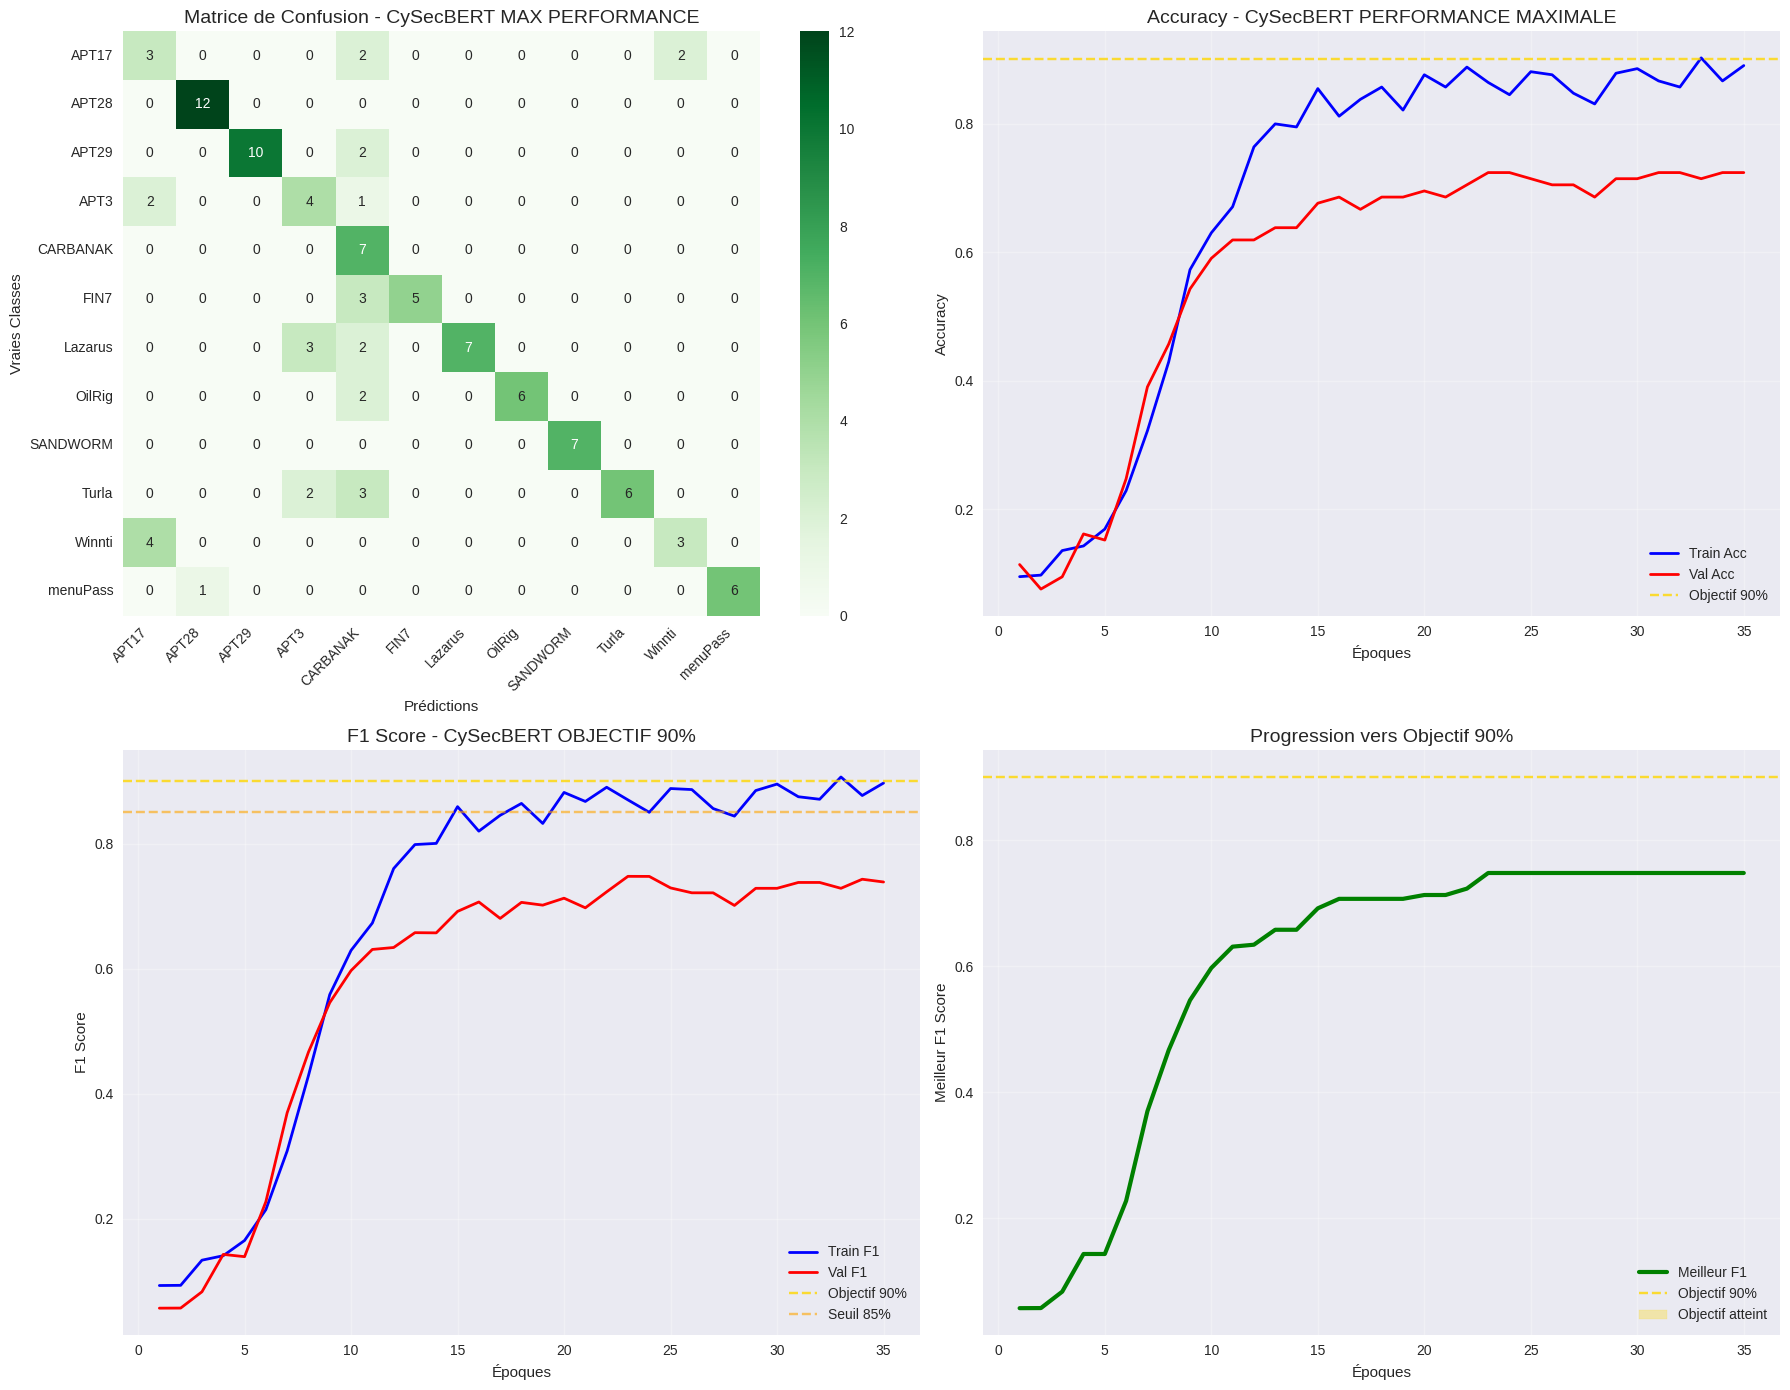

Résultats détaillés sauvegardés: training_results_cysecbert_max_performance.json

RÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:
Accuracy: 0.7238
F1 Score: 0.7477
OBJECTIF NON ATTEINT: Ajustements nécessaires

Fichiers générés:
- Modèle: best_cysecbert_max_performance.pt
- Résultats: training_results_cysecbert_max_performance.json
- Visualisations: cysecebert_max_performance_results.png

VALIDATION CROISÉE OPTIONNELLE
La validation croisée permet d'évaluer la stabilité du modèle
sur différentes divisions des données (plus robuste mais plus long).



Voulez-vous lancer la validation croisée 5-fold ? (y/n):  n


Validation croisée ignorée. Entraînement terminé.

ENTRAÎNEMENT TERMINÉ


In [30]:
#!/usr/bin/env python3
"""
CySecBERT APT Classification - Optimisé Performance Maximum
Objectif: Atteindre 90%+ F1 Score
Configuration agressive pour performances maximales + CV optionnel
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class CySecBERTMaxPerformance(nn.Module):
    """CySecBERT optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "markusbayer/CySecBERT",
        num_classes: int = 12,  # Réduit à 12 (sans Other_APT)
        max_length: int = 384,
        dropout_rate: float = 0.15  # RÉDUIT pour plus de performance
    ):
        super(CySecBERTMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle: {model_name}")
        
        # Modèle CySecBERT spécialisé cybersécurité
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture PLUS LARGE pour capacité maximale
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire ÉLARGIE pour plus de performance
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)  # AUGMENTÉ 256→512
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)   # Dropout léger
        
        # Deuxième couche intermédiaire pour plus de complexité
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()  # GELU pour meilleures performances
        
        print(f"CySecBERT MAX PERFORMANCE initialisé - Architecture: {self.config.hidden_size} -> 512 -> 256 -> {num_classes}")
        print(f"Dropout minimal: {dropout_rate}, Optimisé pour 90%+ F1 Score")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # [CLS] token avec dropout minimal
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Première couche intermédiaire LARGE
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        # Batch norm conditionnelle
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        # Deuxième couche intermédiaire
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        # Classification finale
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerMaxPerformance:
    """Entraîneur optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(self):
        self.config = {
            'model_name': 'markusbayer/CySecBERT',
            'max_length': 384,
            'batch_size': 12,          # AUGMENTÉ pour plus de stabilité
            'learning_rate': 3e-5,     # AUGMENTÉ pour convergence plus rapide
            'num_epochs': 40,          # AUGMENTÉ pour plus d'apprentissage
            'warmup_ratio': 0.15,      # Plus de warmup pour stabilité
            'weight_decay': 0.01,      # RÉDUIT pour moins de pénalisation
            'validation_split': 0.2,
            'dropout_rate': 0.15,      # RÉDUIT pour plus de performance
            'early_stopping_patience': 12,   # AUGMENTÉ pour laisser plus de temps
            'min_improvement': 0.003,  # Plus sensible aux améliorations
            'gradient_accumulation': 4,      # AUGMENTÉ: Batch effectif = 48
            'cross_validation_folds': 5,
            'max_grad_norm': 2.0,      # AUGMENTÉ pour permettre plus de gradient
            'lr_scheduler': 'linear',   
            'label_smoothing': 0.02,   # RÉDUIT pour moins de pénalisation
            'monitor_overfitting': False,  # DÉSACTIVÉ: Focus sur performance
            'use_focal_loss': True,    # NOUVEAU: Focal Loss pour classes difficiles
            'focal_alpha': 0.25,
            'focal_gamma': 2.0
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données équilibrées"""
        print(f"Chargement des données équilibrées: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRESSION DE OTHER_APT (classe problématique)
        before_removal = len(df)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)
        removed_count = before_removal - len(df)
        print(f"SUPPRESSION Other_APT: -{removed_count} échantillons")
        print(f"Dataset nettoyé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher les statistiques d'équilibrage
        class_distribution = df['label'].value_counts()
        balance_ratio = class_distribution.max() / class_distribution.min()
        
        print(f"Distribution des classes (sans Other_APT):")
        for label, count in class_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        print(f"OBJECTIF: Atteindre 90%+ F1 Score sur ce dataset nettoyé")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df):
        """Crée les DataLoaders"""
        print("Création des DataLoaders...")
        
        # Division stratifiée
        train_df, val_df = train_test_split(
            df,
            test_size=self.config['validation_split'],
            random_state=42,
            stratify=df['label_encoded']
        )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        print(f"Batch effectif LARGE: {self.config['batch_size']} x {self.config['gradient_accumulation']} = {self.config['batch_size'] * self.config['gradient_accumulation']}")
        
        # Créer le modèle avec architecture large
        self.model = CySecBERTMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré plus agressif
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss pour performance maximale"""
        # Poids des classes pour équilibrage
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss fonction optimisée pour performance
        if self.config['use_focal_loss']:
            print("Utilisation de Focal Loss pour classes difficiles")
            # Focal Loss implémentation simple
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        else:
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        
        # Optimiseur avec learning rate élevé
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm1.weight', 'batch_norm1.bias', 'batch_norm2.weight', 'batch_norm2.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler avec plus de steps
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"CONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- LR élevé: {self.config['learning_rate']}")
        print(f"- Weight decay réduit: {self.config['weight_decay']}")
        print(f"- Dropout minimal: {self.config['dropout_rate']}")
        print(f"- Batch effectif: {self.config['batch_size'] * self.config['gradient_accumulation']}")
        print(f"- Total steps: {total_steps}, Warmup: {warmup_steps}")
        print(f"- Epochs max: {self.config['num_epochs']}")
        print(f"- Early stopping patient: {self.config['early_stopping_patience']}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [PERF MAX]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation MAX', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement pour performance maximale"""
        print("ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)")
        print("=" * 70)
        
        start_time = time.time()
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        train_df, val_df = self.create_data_loaders(df)
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement pour PERFORMANCE MAXIMALE...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart (informatif seulement)
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Information: {overfitting_gap:.4f}")
            
            # Progression vers 90%
            if val_f1 >= 0.90:
                print(f"OBJECTIF ATTEINT! F1: {val_f1:.4f} (≥90%)")
            elif val_f1 >= 0.85:
                print(f"Excellent progrès! F1: {val_f1:.4f} (≥85%)")
            elif val_f1 >= 0.80:
                print(f"Bon progrès! F1: {val_f1:.4f} (≥80%)")
            
            # Early stopping basé sur F1 score seulement
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_cysecbert_max_performance.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap,
                    'dataset_info': 'max_performance_cysecbert_without_other_apt'
                }, model_save_path)
                
                print(f"Nouveau record! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"MEILLEURE ACCURACY: {best_accuracy:.4f}")
        print(f"MEILLEUR F1 SCORE: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_cysecbert_max_performance.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation de l'objectif
        if final_f1 >= 0.90:
            print("OBJECTIF ATTEINT: F1 ≥ 90%!")
        elif final_f1 >= 0.85:
            print("Très proche de l'objectif: F1 ≥ 85%")
        elif final_f1 >= 0.80:
            print("Bonne performance: F1 ≥ 80%")
        else:
            print("Objectif 90% non atteint")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée pour dataset équilibré"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - CySecBERT PERFORMANCE MAXIMALE")
        print("=" * 80)
        
        # Charger et préparer les données (sans suppression Other_APT pour CV)
        df = pd.read_csv(data_path)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)  # Même suppression pour cohérence
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = CySecBERTMaxPerformance(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_cysecbert_max_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_cysecbert_max_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE - CySecBERT MAX")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config,
            'dataset_info': 'cysecbert_max_performance_without_other_apt'
        }
        
        with open('cross_validation_cysecbert_max_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_CySecbert_max_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - CySecBERT MAX PERFORMANCE', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax2.set_title('Accuracy - CySecBERT PERFORMANCE MAXIMALE', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score avec objectif
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.6, label='Seuil 85%')
        ax3.set_title('F1 Score - CySecBERT OBJECTIF 90%', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Progression vers l'objectif
        val_f1_progress = [max(self.history['val_f1'][:i+1]) for i in range(len(self.history['val_f1']))]
        ax4.plot(epochs, val_f1_progress, 'green', linewidth=3, label='Meilleur F1')
        ax4.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax4.fill_between(epochs, val_f1_progress, 0.90, where=[f >= 0.90 for f in val_f1_progress], 
                        color='gold', alpha=0.3, label='Objectif atteint')
        ax4.set_title('Progression vers Objectif 90%', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Meilleur F1 Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('cysecbert_max_performance_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'target_achieved': bool(final_f1 >= 0.90),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'dataset_info': 'cysecbert_max_performance_without_other_apt',
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_cysecbert_max_performance.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_cysecbert_max_performance.json")

# Script principal optimisé pour PERFORMANCE MAXIMALE + CV OPTIONNEL
if __name__ == "__main__":
    print("CySecBERT APT Classification - PERFORMANCE MAXIMALE")
    print("=" * 60)
    print("OBJECTIF: Atteindre 90%+ F1 Score")
    print("Configuration optimisée pour performances maximales + CV optionnel")
    print("CySecBERT: Modèle BERT spécialisé en cybersécurité")
    
    trainer = APTTrainerMaxPerformance()
    
    # Chemin vers le dataset équilibré
    data_path = "/kaggle/working/hybrid_dataset_progressive.csv"
    
    if Path(data_path).exists():
        print(f"\nDataset utilisé: {data_path}")
        print(f"\nCONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- Modèle: {trainer.config['model_name']} (Cybersécurité)")
        print(f"- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)")
        print(f"- Batch effectif: {trainer.config['batch_size']} x {trainer.config['gradient_accumulation']} = {trainer.config['batch_size'] * trainer.config['gradient_accumulation']}")
        print(f"- Learning rate ÉLEVÉ: {trainer.config['learning_rate']}")
        print(f"- Dropout MINIMAL: {trainer.config['dropout_rate']}")
        print(f"- Weight decay RÉDUIT: {trainer.config['weight_decay']}")
        print(f"- Epochs AUGMENTÉES: {trainer.config['num_epochs']}")
        print(f"- Early stopping PATIENT: {trainer.config['early_stopping_patience']}")
        print(f"- Focal Loss: {trainer.config['use_focal_loss']}")
        
        # ENTRAÎNEMENT SIMPLE EN PREMIER
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT SIMPLE")
        print("="*60)
        
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation finale de l'objectif
        if final_f1 >= 0.90:
            print("MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!")
        elif final_f1 >= 0.85:
            print("EXCELLENT: Très proche de l'objectif (85%+)")
        elif final_f1 >= 0.80:
            print("TRÈS BON: Performance solide (80%+)")
        else:
            print("OBJECTIF NON ATTEINT: Ajustements nécessaires")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_cysecbert_max_performance.pt")
        print(f"- Résultats: training_results_cysecbert_max_performance.json")
        print(f"- Visualisations: cysecebert_max_performance_results.png")
        
        # PROPOSER LA VALIDATION CROISÉE
        print(f"\n" + "="*60)
        print("VALIDATION CROISÉE OPTIONNELLE")
        print("="*60)
        print("La validation croisée permet d'évaluer la stabilité du modèle")
        print("sur différentes divisions des données (plus robuste mais plus long).")
        
        user_choice = input("\nVoulez-vous lancer la validation croisée 5-fold ? (y/n): ").lower().strip()
        
        if user_choice == 'y':
            print(f"\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerMaxPerformance()
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nRÉSULTATS FINAUX - VALIDATION CROISÉE:")
            print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
            print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
            
            # Analyser la stabilité
            if std_f1 < 0.03:
                print("Modèle très stable (variance très faible)")
            elif std_f1 < 0.05:
                print("Modèle stable (variance faible)")
            elif std_f1 < 0.08:
                print("Modèle cohérent (variance modérée)")
            
            # Comparaison des approches
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Entraînement simple - F1: {final_f1:.4f}")
            print(f"Validation croisée  - F1: {mean_f1:.4f} ± {std_f1:.4f}")
            
            cv_better = mean_f1 > final_f1
            difference = abs(mean_f1 - final_f1)
            
            if cv_better:
                print(f"La validation croisée donne de meilleurs résultats (+{difference:.4f})")
            else:
                print(f"L'entraînement simple donne de meilleurs résultats (+{difference:.4f})")
            
            if difference < 0.02:
                print("Les résultats sont très cohérents entre les deux approches")
            elif difference < 0.05:
                print("Les résultats sont cohérents entre les deux approches")
            else:
                print("Différence notable entre les approches - variance possible")
            
            print(f"\nFichiers CV générés:")
            print(f"- Résultats CV: cross_validation_cysecbert_max_results.json")
            print(f"- Modèles par fold: best_cysecbert_max_fold_*.pt")
            
        else:
            print("Validation croisée ignorée. Entraînement terminé.")
        
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT TERMINÉ")
        print("="*60)
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le preprocessing et l'équilibrage des données")

# **Cysecbert option 2**

CySecBERT APT Classification - PERFORMANCE MAXIMALE
OBJECTIF: Atteindre 90%+ F1 Score
Configuration optimisée pour performances maximales + CV optionnel
CySecBERT: Modèle BERT spécialisé en cybersécurité
Device: cuda

Dataset utilisé: /kaggle/working/hybrid_dataset_balanced_15.csv

CONFIGURATION PERFORMANCE MAXIMALE:
- Modèle: markusbayer/CySecBERT (Cybersécurité)
- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)
- Batch effectif: 12 x 4 = 48
- Learning rate ÉLEVÉ: 3e-05
- Dropout MINIMAL: 0.15
- Weight decay RÉDUIT: 0.01
- Epochs AUGMENTÉES: 40
- Early stopping PATIENT: 12
- Focal Loss: True

ENTRAÎNEMENT SIMPLE
ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)
Chargement des données équilibrées: /kaggle/working/hybrid_dataset_balanced_15.csv
Données chargées: 360 échantillons, 12 classes
SUPPRESSION Other_APT: -0 échantillons
Dataset nettoyé: 360 échantillons, 12 classes
Distribution des classes (sans Other_APT):
  APT17: 30 échantillons (8.3%)
  APT28:

Some weights of BertModel were not initialized from the model checkpoint at markusbayer/CySecBERT and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CySecBERT MAX PERFORMANCE initialisé - Architecture: 768 -> 512 -> 256 -> 12
Dropout minimal: 0.15, Optimisé pour 90%+ F1 Score
Poids des classes: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0')
Utilisation de Focal Loss pour classes difficiles
CONFIGURATION PERFORMANCE MAXIMALE:
- LR élevé: 3e-05
- Weight decay réduit: 0.01
- Dropout minimal: 0.15
- Batch effectif: 48
- Total steps: 240, Warmup: 36
- Epochs max: 40
- Early stopping patient: 12

Début de l'entraînement pour PERFORMANCE MAXIMALE...

ÉPOQUE 1/40


Train - Loss: 2.6005, Acc: 0.0868, F1: 0.0886
Val   - Loss: 2.5054, Acc: 0.0417, F1: 0.0189
Gap   - Information: 0.0451
Nouveau record! F1: 0.0189 (+0.0189)

ÉPOQUE 2/40


Train - Loss: 2.5813, Acc: 0.0938, F1: 0.0948
Val   - Loss: 2.5291, Acc: 0.0833, F1: 0.0612
Gap   - Information: 0.0104
Nouveau record! F1: 0.0612 (+0.0422)

ÉPOQUE 3/40


Train - Loss: 2.5814, Acc: 0.1076, F1: 0.1091
Val   - Loss: 2.4863, Acc: 0.0972, F1: 0.0709
Gap   - Information: 0.0104
Nouveau record! F1: 0.0709 (+0.0097)

ÉPOQUE 4/40


Train - Loss: 2.4334, Acc: 0.1354, F1: 0.1286
Val   - Loss: 2.4119, Acc: 0.1111, F1: 0.0966
Gap   - Information: 0.0243
Nouveau record! F1: 0.0966 (+0.0258)

ÉPOQUE 5/40


Train - Loss: 2.3644, Acc: 0.1632, F1: 0.1584
Val   - Loss: 2.2146, Acc: 0.2639, F1: 0.2464
Gap   - Information: -0.1007
Nouveau record! F1: 0.2464 (+0.1498)

ÉPOQUE 6/40


Train - Loss: 2.1326, Acc: 0.3160, F1: 0.3073
Val   - Loss: 1.7540, Acc: 0.5972, F1: 0.5822
Gap   - Information: -0.2812
Nouveau record! F1: 0.5822 (+0.3358)

ÉPOQUE 7/40


Train - Loss: 1.7613, Acc: 0.5903, F1: 0.5815
Val   - Loss: 1.3187, Acc: 0.8056, F1: 0.7735
Gap   - Information: -0.2153
Nouveau record! F1: 0.7735 (+0.1913)

ÉPOQUE 8/40


Train - Loss: 1.5635, Acc: 0.6250, F1: 0.6179
Val   - Loss: 1.0555, Acc: 0.8194, F1: 0.7858
Gap   - Information: -0.1944
Nouveau record! F1: 0.7858 (+0.0123)

ÉPOQUE 9/40


Train - Loss: 1.2415, Acc: 0.7569, F1: 0.7590
Val   - Loss: 0.9464, Acc: 0.8194, F1: 0.8018
Gap   - Information: -0.0625
Bon progrès! F1: 0.8018 (≥80%)
Nouveau record! F1: 0.8018 (+0.0160)

ÉPOQUE 10/40


Train - Loss: 1.0898, Acc: 0.7847, F1: 0.7879
Val   - Loss: 0.8028, Acc: 0.8472, F1: 0.8298
Gap   - Information: -0.0625
Bon progrès! F1: 0.8298 (≥80%)
Nouveau record! F1: 0.8298 (+0.0280)

ÉPOQUE 11/40


Train - Loss: 0.9563, Acc: 0.8160, F1: 0.8164
Val   - Loss: 0.7063, Acc: 0.9028, F1: 0.9018
Gap   - Information: -0.0868
OBJECTIF ATTEINT! F1: 0.9018 (≥90%)
Nouveau record! F1: 0.9018 (+0.0720)

ÉPOQUE 12/40


Train - Loss: 0.8288, Acc: 0.8472, F1: 0.8470
Val   - Loss: 0.6586, Acc: 0.8750, F1: 0.8723
Gap   - Information: -0.0278
Excellent progrès! F1: 0.8723 (≥85%)

ÉPOQUE 13/40


Train - Loss: 0.7592, Acc: 0.8646, F1: 0.8665
Val   - Loss: 0.5981, Acc: 0.8750, F1: 0.8714
Gap   - Information: -0.0104
Excellent progrès! F1: 0.8714 (≥85%)

ÉPOQUE 14/40


Train - Loss: 0.6571, Acc: 0.8993, F1: 0.8997
Val   - Loss: 0.5548, Acc: 0.8889, F1: 0.8874
Gap   - Information: 0.0104
Excellent progrès! F1: 0.8874 (≥85%)

ÉPOQUE 15/40


Train - Loss: 0.7417, Acc: 0.8507, F1: 0.8578
Val   - Loss: 0.5309, Acc: 0.9167, F1: 0.9165
Gap   - Information: -0.0660
OBJECTIF ATTEINT! F1: 0.9165 (≥90%)
Nouveau record! F1: 0.9165 (+0.0147)

ÉPOQUE 16/40


Train - Loss: 0.5533, Acc: 0.9271, F1: 0.9279
Val   - Loss: 0.5021, Acc: 0.9306, F1: 0.9296
Gap   - Information: -0.0035
OBJECTIF ATTEINT! F1: 0.9296 (≥90%)
Nouveau record! F1: 0.9296 (+0.0131)

ÉPOQUE 17/40


Train - Loss: 0.5954, Acc: 0.9062, F1: 0.9069
Val   - Loss: 0.4753, Acc: 0.9583, F1: 0.9574
Gap   - Information: -0.0521
OBJECTIF ATTEINT! F1: 0.9574 (≥90%)
Nouveau record! F1: 0.9574 (+0.0279)

ÉPOQUE 18/40


Train - Loss: 0.5651, Acc: 0.9097, F1: 0.9191
Val   - Loss: 0.4510, Acc: 0.9167, F1: 0.9167
Gap   - Information: -0.0069
OBJECTIF ATTEINT! F1: 0.9167 (≥90%)

ÉPOQUE 19/40


Train - Loss: 0.4821, Acc: 0.9514, F1: 0.9532
Val   - Loss: 0.4318, Acc: 0.9028, F1: 0.9029
Gap   - Information: 0.0486
OBJECTIF ATTEINT! F1: 0.9029 (≥90%)

ÉPOQUE 20/40


Train - Loss: 0.5661, Acc: 0.8854, F1: 0.8885
Val   - Loss: 0.4363, Acc: 0.9167, F1: 0.9158
Gap   - Information: -0.0312
OBJECTIF ATTEINT! F1: 0.9158 (≥90%)

ÉPOQUE 21/40


Train - Loss: 0.4206, Acc: 0.9479, F1: 0.9483
Val   - Loss: 0.4531, Acc: 0.9167, F1: 0.9159
Gap   - Information: 0.0312
OBJECTIF ATTEINT! F1: 0.9159 (≥90%)

ÉPOQUE 22/40


Train - Loss: 0.4212, Acc: 0.9271, F1: 0.9288
Val   - Loss: 0.4435, Acc: 0.9028, F1: 0.9020
Gap   - Information: 0.0243
OBJECTIF ATTEINT! F1: 0.9020 (≥90%)

ÉPOQUE 23/40


Train - Loss: 0.4557, Acc: 0.9201, F1: 0.9216
Val   - Loss: 0.4278, Acc: 0.9167, F1: 0.9159
Gap   - Information: 0.0035
OBJECTIF ATTEINT! F1: 0.9159 (≥90%)

ÉPOQUE 24/40


Train - Loss: 0.4570, Acc: 0.9132, F1: 0.9156
Val   - Loss: 0.4076, Acc: 0.9306, F1: 0.9298
Gap   - Information: -0.0174
OBJECTIF ATTEINT! F1: 0.9298 (≥90%)

ÉPOQUE 25/40


Train - Loss: 0.4681, Acc: 0.9167, F1: 0.9230
Val   - Loss: 0.3966, Acc: 0.9306, F1: 0.9298
Gap   - Information: -0.0139
OBJECTIF ATTEINT! F1: 0.9298 (≥90%)

ÉPOQUE 26/40


Train - Loss: 0.3392, Acc: 0.9514, F1: 0.9524
Val   - Loss: 0.4216, Acc: 0.9028, F1: 0.9030
Gap   - Information: 0.0486
OBJECTIF ATTEINT! F1: 0.9030 (≥90%)

ÉPOQUE 27/40


Train - Loss: 0.4358, Acc: 0.9167, F1: 0.9185
Val   - Loss: 0.4165, Acc: 0.9028, F1: 0.9029
Gap   - Information: 0.0139
OBJECTIF ATTEINT! F1: 0.9029 (≥90%)

ÉPOQUE 28/40


Train - Loss: 0.3968, Acc: 0.9340, F1: 0.9345
Val   - Loss: 0.4042, Acc: 0.9028, F1: 0.9029
Gap   - Information: 0.0312
OBJECTIF ATTEINT! F1: 0.9029 (≥90%)

ÉPOQUE 29/40


Train - Loss: 0.4069, Acc: 0.9236, F1: 0.9252
Val   - Loss: 0.3913, Acc: 0.9167, F1: 0.9159
Gap   - Information: 0.0069
OBJECTIF ATTEINT! F1: 0.9159 (≥90%)
Early stopping après 29 époques

Entraînement terminé en 12.6 minutes
MEILLEURE ACCURACY: 0.9583
MEILLEUR F1 SCORE: 0.9574



PERFORMANCE FINALE:
Accuracy: 0.9583
F1 Score: 0.9574
OBJECTIF ATTEINT: F1 ≥ 90%!

Classification Report:
              precision    recall  f1-score   support

       APT17     1.0000    0.6667    0.8000         6
       APT28     1.0000    1.0000    1.0000         6
       APT29     1.0000    0.8333    0.9091         6
        APT3     1.0000    1.0000    1.0000         6
    CARBANAK     1.0000    1.0000    1.0000         6
        FIN7     1.0000    1.0000    1.0000         6
     Lazarus     1.0000    1.0000    1.0000         6
      OilRig     1.0000    1.0000    1.0000         6
    SANDWORM     0.8571    1.0000    0.9231         6
       Turla     1.0000    1.0000    1.0000         6
      Winnti     0.7500    1.0000    0.8571         6
    menuPass     1.0000    1.0000    1.0000         6

    accuracy                         0.9583        72
   macro avg     0.9673    0.9583    0.9574        72
weighted avg     0.9673    0.9583    0.9574        72



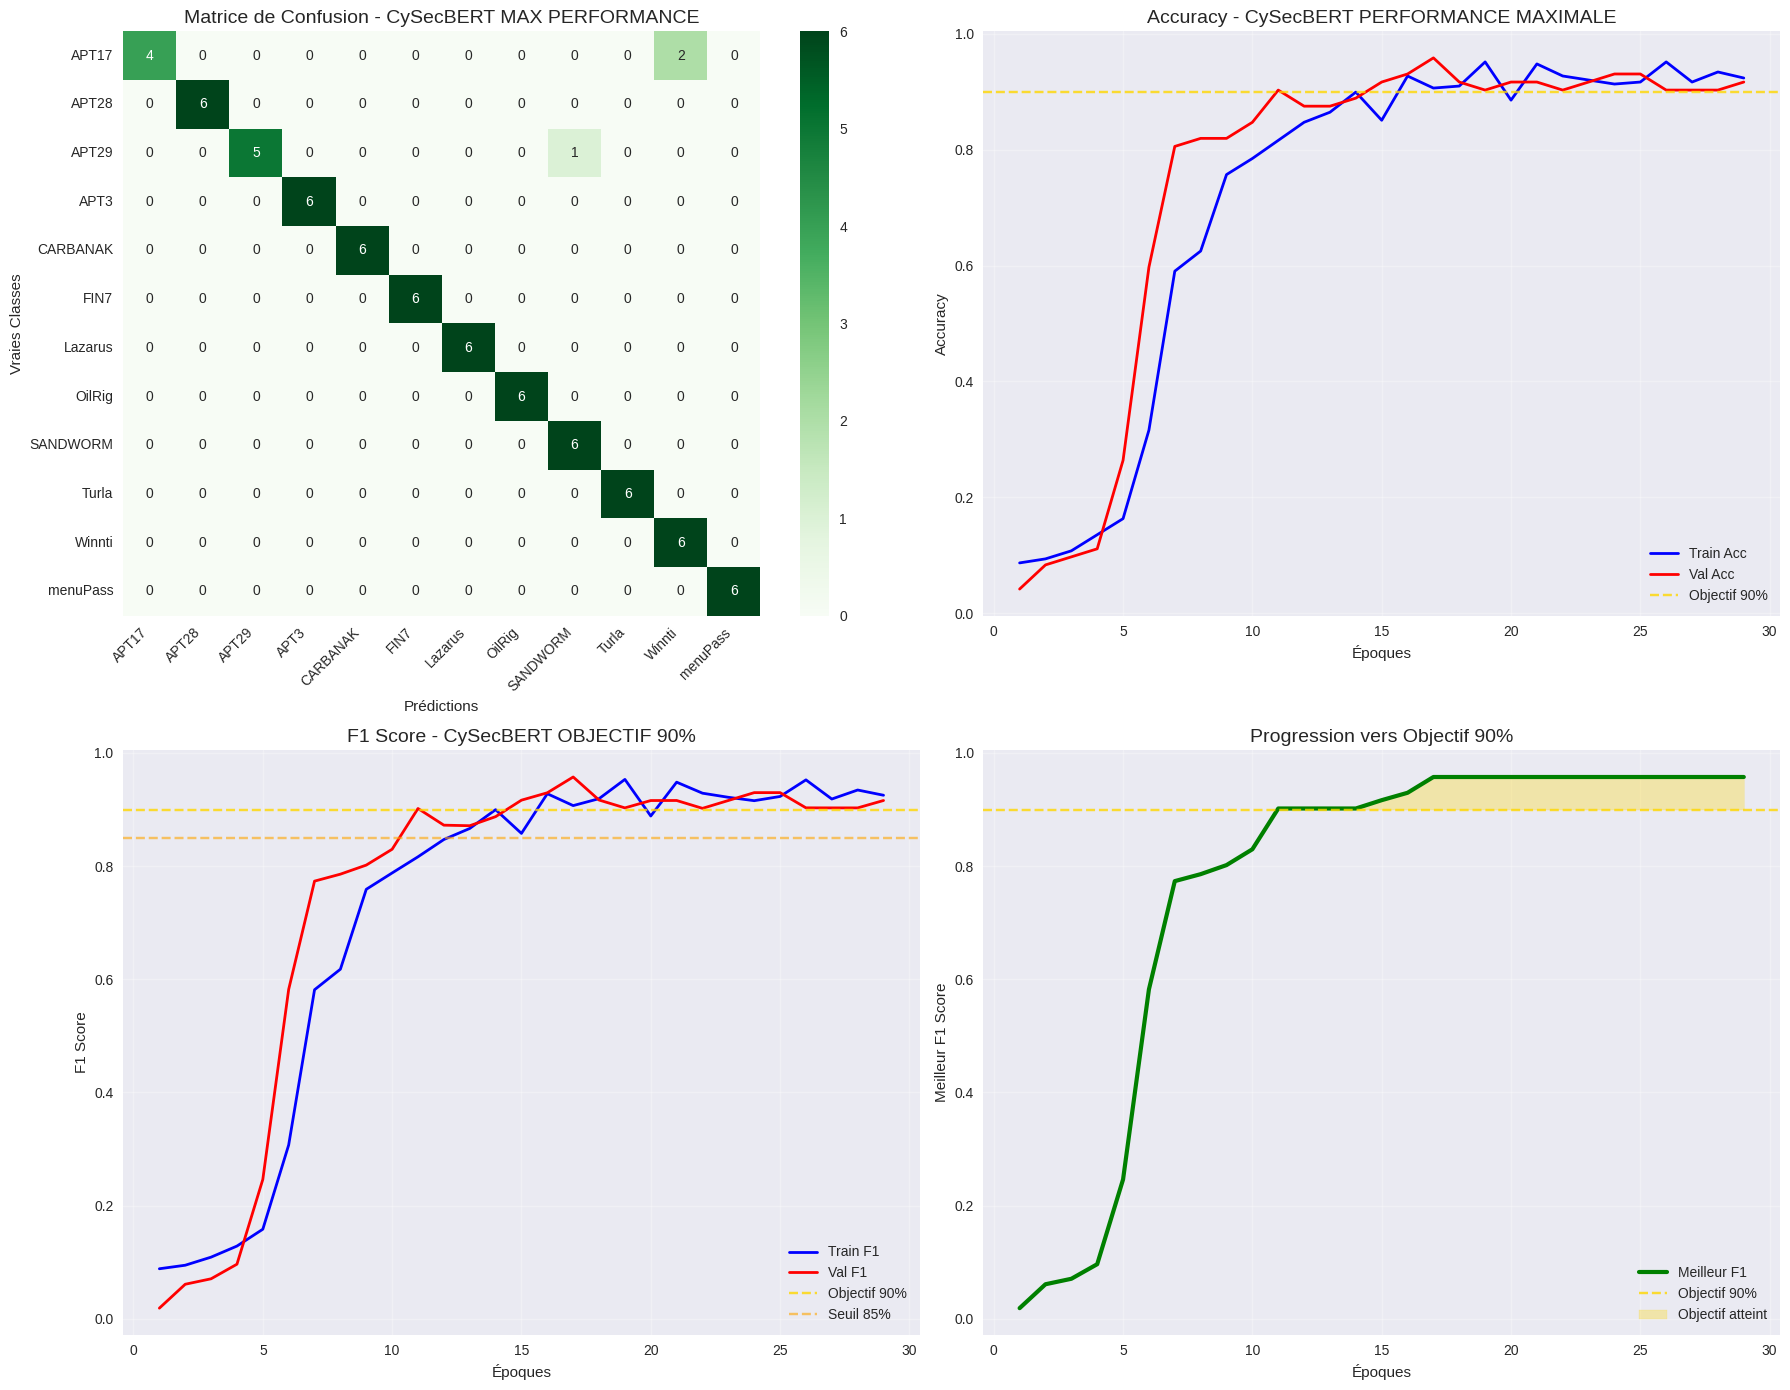

Résultats détaillés sauvegardés: training_results_cysecbert_max_performance.json

RÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:
Accuracy: 0.9583
F1 Score: 0.9574
MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!

Fichiers générés:
- Modèle: best_cysecbert_max_performance.pt
- Résultats: training_results_cysecbert_max_performance.json
- Visualisations: cysecebert_max_performance_results.png

VALIDATION CROISÉE OPTIONNELLE
La validation croisée permet d'évaluer la stabilité du modèle
sur différentes divisions des données (plus robuste mais plus long).



Voulez-vous lancer la validation croisée 5-fold ? (y/n):  n


Validation croisée ignorée. Entraînement terminé.

ENTRAÎNEMENT TERMINÉ


In [13]:
#!/usr/bin/env python3
"""
CySecBERT APT Classification - Optimisé Performance Maximum
Objectif: Atteindre 90%+ F1 Score
Configuration agressive pour performances maximales + CV optionnel
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class CySecBERTMaxPerformance(nn.Module):
    """CySecBERT optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "markusbayer/CySecBERT",
        num_classes: int = 12,  # Réduit à 12 (sans Other_APT)
        max_length: int = 384,
        dropout_rate: float = 0.15  # RÉDUIT pour plus de performance
    ):
        super(CySecBERTMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle: {model_name}")
        
        # Modèle CySecBERT spécialisé cybersécurité
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture PLUS LARGE pour capacité maximale
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire ÉLARGIE pour plus de performance
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)  # AUGMENTÉ 256→512
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)   # Dropout léger
        
        # Deuxième couche intermédiaire pour plus de complexité
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()  # GELU pour meilleures performances
        
        print(f"CySecBERT MAX PERFORMANCE initialisé - Architecture: {self.config.hidden_size} -> 512 -> 256 -> {num_classes}")
        print(f"Dropout minimal: {dropout_rate}, Optimisé pour 90%+ F1 Score")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # [CLS] token avec dropout minimal
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Première couche intermédiaire LARGE
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        # Batch norm conditionnelle
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        # Deuxième couche intermédiaire
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        # Classification finale
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerMaxPerformance:
    """Entraîneur optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(self):
        self.config = {
            'model_name': 'markusbayer/CySecBERT',
            'max_length': 384,
            'batch_size': 12,          # AUGMENTÉ pour plus de stabilité
            'learning_rate': 3e-5,     # AUGMENTÉ pour convergence plus rapide
            'num_epochs': 40,          # AUGMENTÉ pour plus d'apprentissage
            'warmup_ratio': 0.15,      # Plus de warmup pour stabilité
            'weight_decay': 0.01,      # RÉDUIT pour moins de pénalisation
            'validation_split': 0.2,
            'dropout_rate': 0.15,      # RÉDUIT pour plus de performance
            'early_stopping_patience': 12,   # AUGMENTÉ pour laisser plus de temps
            'min_improvement': 0.003,  # Plus sensible aux améliorations
            'gradient_accumulation': 4,      # AUGMENTÉ: Batch effectif = 48
            'cross_validation_folds': 5,
            'max_grad_norm': 2.0,      # AUGMENTÉ pour permettre plus de gradient
            'lr_scheduler': 'linear',   
            'label_smoothing': 0.02,   # RÉDUIT pour moins de pénalisation
            'monitor_overfitting': False,  # DÉSACTIVÉ: Focus sur performance
            'use_focal_loss': True,    # NOUVEAU: Focal Loss pour classes difficiles
            'focal_alpha': 0.25,
            'focal_gamma': 2.0
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données équilibrées"""
        print(f"Chargement des données équilibrées: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRESSION DE OTHER_APT (classe problématique)
        before_removal = len(df)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)
        removed_count = before_removal - len(df)
        print(f"SUPPRESSION Other_APT: -{removed_count} échantillons")
        print(f"Dataset nettoyé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher les statistiques d'équilibrage
        class_distribution = df['label'].value_counts()
        balance_ratio = class_distribution.max() / class_distribution.min()
        
        print(f"Distribution des classes (sans Other_APT):")
        for label, count in class_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        print(f"OBJECTIF: Atteindre 90%+ F1 Score sur ce dataset nettoyé")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df):
        """Crée les DataLoaders"""
        print("Création des DataLoaders...")
        
        # Division stratifiée
        train_df, val_df = train_test_split(
            df,
            test_size=self.config['validation_split'],
            random_state=42,
            stratify=df['label_encoded']
        )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        print(f"Batch effectif LARGE: {self.config['batch_size']} x {self.config['gradient_accumulation']} = {self.config['batch_size'] * self.config['gradient_accumulation']}")
        
        # Créer le modèle avec architecture large
        self.model = CySecBERTMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré plus agressif
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss pour performance maximale"""
        # Poids des classes pour équilibrage
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss fonction optimisée pour performance
        if self.config['use_focal_loss']:
            print("Utilisation de Focal Loss pour classes difficiles")
            # Focal Loss implémentation simple
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        else:
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        
        # Optimiseur avec learning rate élevé
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm1.weight', 'batch_norm1.bias', 'batch_norm2.weight', 'batch_norm2.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler avec plus de steps
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"CONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- LR élevé: {self.config['learning_rate']}")
        print(f"- Weight decay réduit: {self.config['weight_decay']}")
        print(f"- Dropout minimal: {self.config['dropout_rate']}")
        print(f"- Batch effectif: {self.config['batch_size'] * self.config['gradient_accumulation']}")
        print(f"- Total steps: {total_steps}, Warmup: {warmup_steps}")
        print(f"- Epochs max: {self.config['num_epochs']}")
        print(f"- Early stopping patient: {self.config['early_stopping_patience']}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [PERF MAX]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation MAX', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement pour performance maximale"""
        print("ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)")
        print("=" * 70)
        
        start_time = time.time()
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        train_df, val_df = self.create_data_loaders(df)
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement pour PERFORMANCE MAXIMALE...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart (informatif seulement)
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Information: {overfitting_gap:.4f}")
            
            # Progression vers 90%
            if val_f1 >= 0.90:
                print(f"OBJECTIF ATTEINT! F1: {val_f1:.4f} (≥90%)")
            elif val_f1 >= 0.85:
                print(f"Excellent progrès! F1: {val_f1:.4f} (≥85%)")
            elif val_f1 >= 0.80:
                print(f"Bon progrès! F1: {val_f1:.4f} (≥80%)")
            
            # Early stopping basé sur F1 score seulement
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_cysecbert_max_performance.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap,
                    'dataset_info': 'max_performance_cysecbert_without_other_apt'
                }, model_save_path)
                
                print(f"Nouveau record! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"MEILLEURE ACCURACY: {best_accuracy:.4f}")
        print(f"MEILLEUR F1 SCORE: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_cysecbert_max_performance.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation de l'objectif
        if final_f1 >= 0.90:
            print("OBJECTIF ATTEINT: F1 ≥ 90%!")
        elif final_f1 >= 0.85:
            print("Très proche de l'objectif: F1 ≥ 85%")
        elif final_f1 >= 0.80:
            print("Bonne performance: F1 ≥ 80%")
        else:
            print("Objectif 90% non atteint")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée pour dataset équilibré"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - CySecBERT PERFORMANCE MAXIMALE")
        print("=" * 80)
        
        # Charger et préparer les données (sans suppression Other_APT pour CV)
        df = pd.read_csv(data_path)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)  # Même suppression pour cohérence
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = CySecBERTMaxPerformance(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_cysecbert_max_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_cysecbert_max_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE - CySecBERT MAX")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config,
            'dataset_info': 'cysecbert_max_performance_without_other_apt'
        }
        
        with open('cross_validation_cysecbert_max_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_CySecbert_max_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - CySecBERT MAX PERFORMANCE', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax2.set_title('Accuracy - CySecBERT PERFORMANCE MAXIMALE', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score avec objectif
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.6, label='Seuil 85%')
        ax3.set_title('F1 Score - CySecBERT OBJECTIF 90%', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Progression vers l'objectif
        val_f1_progress = [max(self.history['val_f1'][:i+1]) for i in range(len(self.history['val_f1']))]
        ax4.plot(epochs, val_f1_progress, 'green', linewidth=3, label='Meilleur F1')
        ax4.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax4.fill_between(epochs, val_f1_progress, 0.90, where=[f >= 0.90 for f in val_f1_progress], 
                        color='gold', alpha=0.3, label='Objectif atteint')
        ax4.set_title('Progression vers Objectif 90%', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Meilleur F1 Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('cysecbert_max_performance_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'target_achieved': bool(final_f1 >= 0.90),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'dataset_info': 'cysecbert_max_performance_without_other_apt',
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_cysecbert_max_performance.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_cysecbert_max_performance.json")

# Script principal optimisé pour PERFORMANCE MAXIMALE + CV OPTIONNEL
if __name__ == "__main__":
    print("CySecBERT APT Classification - PERFORMANCE MAXIMALE")
    print("=" * 60)
    print("OBJECTIF: Atteindre 90%+ F1 Score")
    print("Configuration optimisée pour performances maximales + CV optionnel")
    print("CySecBERT: Modèle BERT spécialisé en cybersécurité")
    
    trainer = APTTrainerMaxPerformance()
    
    # Chemin vers le dataset équilibré
    data_path = "/kaggle/working/hybrid_dataset_balanced_15.csv"
    
    if Path(data_path).exists():
        print(f"\nDataset utilisé: {data_path}")
        print(f"\nCONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- Modèle: {trainer.config['model_name']} (Cybersécurité)")
        print(f"- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)")
        print(f"- Batch effectif: {trainer.config['batch_size']} x {trainer.config['gradient_accumulation']} = {trainer.config['batch_size'] * trainer.config['gradient_accumulation']}")
        print(f"- Learning rate ÉLEVÉ: {trainer.config['learning_rate']}")
        print(f"- Dropout MINIMAL: {trainer.config['dropout_rate']}")
        print(f"- Weight decay RÉDUIT: {trainer.config['weight_decay']}")
        print(f"- Epochs AUGMENTÉES: {trainer.config['num_epochs']}")
        print(f"- Early stopping PATIENT: {trainer.config['early_stopping_patience']}")
        print(f"- Focal Loss: {trainer.config['use_focal_loss']}")
        
        # ENTRAÎNEMENT SIMPLE EN PREMIER
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT SIMPLE")
        print("="*60)
        
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation finale de l'objectif
        if final_f1 >= 0.90:
            print("MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!")
        elif final_f1 >= 0.85:
            print("EXCELLENT: Très proche de l'objectif (85%+)")
        elif final_f1 >= 0.80:
            print("TRÈS BON: Performance solide (80%+)")
        else:
            print("OBJECTIF NON ATTEINT: Ajustements nécessaires")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_cysecbert_max_performance.pt")
        print(f"- Résultats: training_results_cysecbert_max_performance.json")
        print(f"- Visualisations: cysecebert_max_performance_results.png")
        
        # PROPOSER LA VALIDATION CROISÉE
        print(f"\n" + "="*60)
        print("VALIDATION CROISÉE OPTIONNELLE")
        print("="*60)
        print("La validation croisée permet d'évaluer la stabilité du modèle")
        print("sur différentes divisions des données (plus robuste mais plus long).")
        
        user_choice = input("\nVoulez-vous lancer la validation croisée 5-fold ? (y/n): ").lower().strip()
        
        if user_choice == 'y':
            print(f"\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerMaxPerformance()
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nRÉSULTATS FINAUX - VALIDATION CROISÉE:")
            print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
            print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
            
            # Analyser la stabilité
            if std_f1 < 0.03:
                print("Modèle très stable (variance très faible)")
            elif std_f1 < 0.05:
                print("Modèle stable (variance faible)")
            elif std_f1 < 0.08:
                print("Modèle cohérent (variance modérée)")
            
            # Comparaison des approches
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Entraînement simple - F1: {final_f1:.4f}")
            print(f"Validation croisée  - F1: {mean_f1:.4f} ± {std_f1:.4f}")
            
            cv_better = mean_f1 > final_f1
            difference = abs(mean_f1 - final_f1)
            
            if cv_better:
                print(f"La validation croisée donne de meilleurs résultats (+{difference:.4f})")
            else:
                print(f"L'entraînement simple donne de meilleurs résultats (+{difference:.4f})")
            
            if difference < 0.02:
                print("Les résultats sont très cohérents entre les deux approches")
            elif difference < 0.05:
                print("Les résultats sont cohérents entre les deux approches")
            else:
                print("Différence notable entre les approches - variance possible")
            
            print(f"\nFichiers CV générés:")
            print(f"- Résultats CV: cross_validation_cysecbert_max_results.json")
            print(f"- Modèles par fold: best_cysecbert_max_fold_*.pt")
            
        else:
            print("Validation croisée ignorée. Entraînement terminé.")
        
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT TERMINÉ")
        print("="*60)
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le preprocessing et l'équilibrage des données")

# **TEST**

TEST CySecBERT - DATASET HYBRIDE 15+15
Test du modèle CySecBERT optimisé sur dataset équilibré
15 rapports réels + 15 rapports générés par classe APT
Device utilisé: cuda

Fichiers à utiliser:
Dataset: hybrid_dataset_balanced_15.csv
Modèle pré-entraîné: best_cysecbert_max_performance.pt
Le modèle pré-entraîné sera utilisé pour de meilleures performances

DÉMARRAGE DU TEST...
TEST COMPLET CySecBERT sur DATASET HYBRIDE 15+15
CHARGEMENT ET ANALYSE DU DATASET HYBRIDE 15+15
Dataset chargé: 360 échantillons

Distribution par classe (objectif: 30 par classe):
--------------------------------------------------
APT17       :  30 échantillons (100.0%)
APT28       :  30 échantillons (100.0%)
APT29       :  30 échantillons (100.0%)
APT3        :  30 échantillons (100.0%)
CARBANAK    :  30 échantillons (100.0%)
FIN7        :  30 échantillons (100.0%)
Lazarus     :  30 échantillons (100.0%)
OilRig      :  30 échantillons (100.0%)
SANDWORM    :  30 échantillons (100.0%)
Turla       :  30 échantillons

Some weights of BertModel were not initialized from the model checkpoint at markusbayer/CySecBERT and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Chargement du modèle pré-entraîné: best_cysecbert_max_performance.pt
Modèle pré-entraîné chargé avec succès

ÉVALUATION DU MODÈLE


Évaluation: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


Temps d'évaluation: 2.20s
MÉTRIQUES PRINCIPALES:
Accuracy: 0.9583
F1 Score (weighted): 0.9574
F1 Score (macro): 0.9574
Precision (weighted): 0.9673
Recall (weighted): 0.9583

ÉVALUATION GLOBALE: 🟢 OBJECTIF ATTEINT (90%+)

ANALYSE PAR CLASSE
Performance par classe:
------------------------------------------------------------
Classe       Precision  Recall     F1-Score   Support 
------------------------------------------------------------
APT17        1.0000     0.6667     0.8000     6       
APT28        1.0000     1.0000     1.0000     6       
APT29        1.0000     0.8333     0.9091     6       
APT3         1.0000     1.0000     1.0000     6       
CARBANAK     1.0000     1.0000     1.0000     6       
FIN7         1.0000     1.0000     1.0000     6       
Lazarus      1.0000     1.0000     1.0000     6       
OilRig       1.0000     1.0000     1.0000     6       
SANDWORM     0.8571     1.0000     0.9231     6       
Turla        1.0000     1.0000     1.0000     6       
Winnti  

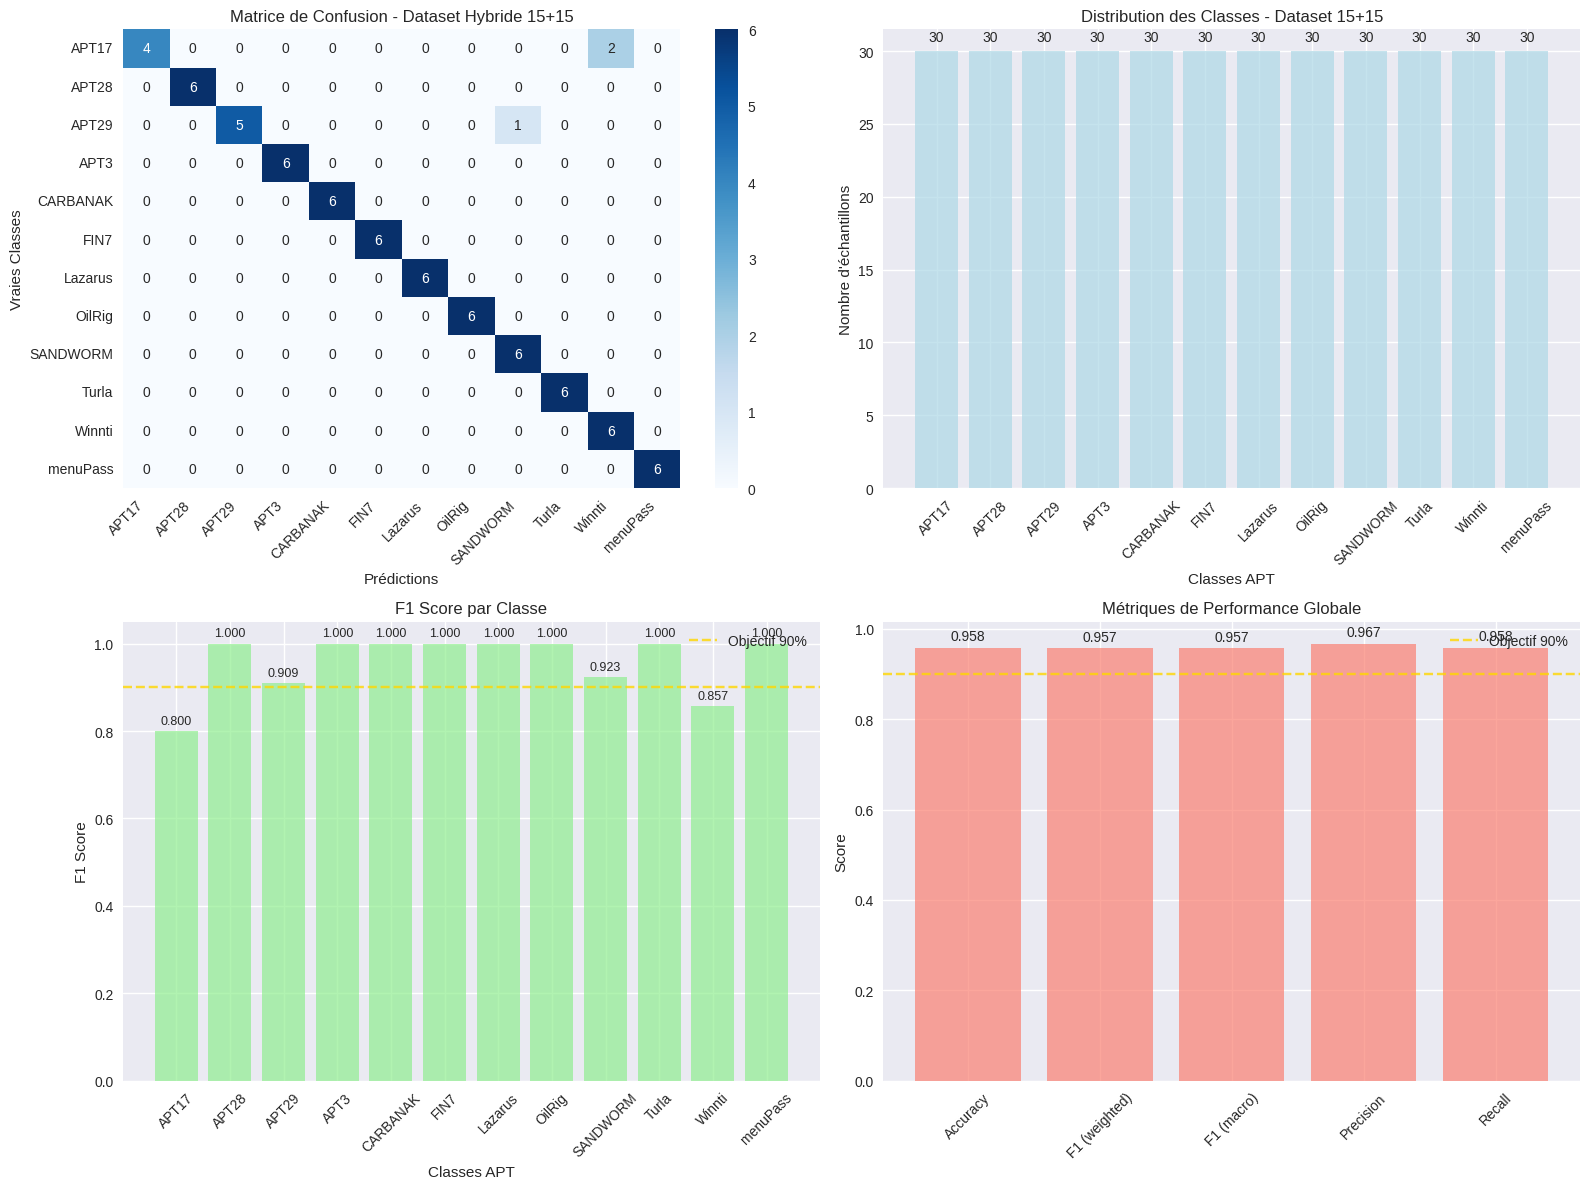

Visualisations sauvegardées: test_results_hybride_15_15.png

SAUVEGARDE DES RÉSULTATS
Résultats détaillés sauvegardés: test_results_cysecbert_hybride_15_15.json

FICHIERS CRÉÉS:
- test_results_cysecbert_hybride_15_15.json
- test_results_hybride_15_15.png

TEST TERMINÉ AVEC SUCCÈS
Temps total: 6.23s
Dataset testé: hybrid_dataset_balanced_15.csv
Modèle: Pré-entraîné

PERFORMANCE FINALE:
Accuracy: 0.9583
F1 Score: 0.9574
Niveau: OBJECTIF ATTEINT (90%+)

ANALYSE FINALE DU DATASET HYBRIDE 15+15
DATASET:
- Total échantillons: 360
- Nombre de classes: 12
- Qualité d'équilibrage: Excellent
- Ratio d'équilibrage: 1.00

PERFORMANCE:
- Accuracy: 0.9583
- F1 Score (weighted): 0.9574
- F1 Score (macro): 0.9574
- Niveau: OBJECTIF ATTEINT (90%+)

CLASSES:
- Meilleure: APT28 (F1: 1.0000)
- Plus faible: APT17 (F1: 0.8000)

SOURCES:
- GENERATED: F1 1.0000 (38 échantillons)
- REAL: F1 0.9183 (34 échantillons)

RECOMMANDATIONS:
✅ Objectif 90% ATTEINT! Le dataset hybride 15+15 fonctionne parfaitement.

CON

In [15]:
#!/usr/bin/env python3
"""
Script de Test CySecBERT sur Dataset Hybride 15+15
Test du modèle CySecBERT optimisé pour performance maximale
sur le dataset équilibré 15 réels + 15 générés par classe
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, AutoConfig
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    f1_score, precision_score, recall_score
)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

# Réutiliser la classe CySecBERTMaxPerformance du script principal
class CySecBERTMaxPerformance(nn.Module):
    """CySecBERT optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "markusbayer/CySecBERT",
        num_classes: int = 12,
        max_length: int = 384,
        dropout_rate: float = 0.15
    ):
        super(CySecBERTMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        # Modèle CySecBERT spécialisé cybersécurité
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture optimisée
        self.dropout = nn.Dropout(dropout_rate)
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class CySecBERTTester:
    """Testeur spécialisé pour dataset hybride 15+15"""
    
    def __init__(self):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device utilisé: {self.device}")
        
        # Configuration de test
        self.config = {
            'model_name': 'markusbayer/CySecBERT',
            'max_length': 384,
            'batch_size': 16,
            'test_split': 0.2,
            'random_state': 42
        }
        
        # Métriques de performance
        self.results = {
            'dataset_analysis': {},
            'performance_metrics': {},
            'class_performance': {},
            'source_analysis': {}
        }
        
    def load_and_analyze_dataset(self, dataset_path):
        """Charge et analyse le dataset hybride 15+15"""
        print("=" * 70)
        print("CHARGEMENT ET ANALYSE DU DATASET HYBRIDE 15+15")
        print("=" * 70)
        
        if not Path(dataset_path).exists():
            raise FileNotFoundError(f"Dataset non trouvé: {dataset_path}")
            
        self.df = pd.read_csv(dataset_path)
        print(f"Dataset chargé: {len(self.df)} échantillons")
        
        # Vérifier les colonnes attendues
        expected_cols = ['text', 'label', 'source']
        missing_cols = [col for col in expected_cols if col not in self.df.columns]
        if missing_cols:
            print(f"ATTENTION: Colonnes manquantes: {missing_cols}")
            if 'source' not in self.df.columns:
                print("Ajout d'une colonne 'source' par défaut")
                self.df['source'] = 'unknown'
        
        # Analyser la distribution par classe
        class_counts = self.df['label'].value_counts()
        print(f"\nDistribution par classe (objectif: 30 par classe):")
        print("-" * 50)
        
        for label, count in class_counts.items():
            target_ratio = count / 30 * 100 if 30 > 0 else 0
            print(f"{label:<12}: {count:>3} échantillons ({target_ratio:>5.1f}%)")
        
        # Analyser la distribution par source si disponible
        if 'source' in self.df.columns:
            source_counts = self.df['source'].value_counts()
            print(f"\nDistribution par source:")
            print("-" * 30)
            for source, count in source_counts.items():
                percentage = count / len(self.df) * 100
                print(f"{source:<12}: {count:>3} échantillons ({percentage:>5.1f}%)")
            
            # Analyser par classe et source
            print(f"\nDistribution détaillée (Classe × Source):")
            print("-" * 60)
            pivot = pd.crosstab(self.df['label'], self.df['source'], margins=True)
            print(pivot)
        
        # Statistiques d'équilibrage
        balance_ratio = class_counts.max() / class_counts.min() if class_counts.min() > 0 else float('inf')
        balance_std = class_counts.std()
        
        print(f"\nMÉTRIQUES D'ÉQUILIBRAGE:")
        print(f"Ratio max/min: {balance_ratio:.2f} (idéal: 1.0)")
        print(f"Écart-type: {balance_std:.2f} (idéal: 0.0)")
        
        # Qualité d'équilibrage
        if balance_ratio <= 1.2:
            balance_quality = "Excellent"
        elif balance_ratio <= 1.5:
            balance_quality = "Très bon"
        elif balance_ratio <= 2.0:
            balance_quality = "Bon"
        else:
            balance_quality = "À améliorer"
            
        print(f"Qualité d'équilibrage: {balance_quality}")
        
        # Sauvegarder l'analyse
        self.results['dataset_analysis'] = {
            'total_samples': len(self.df),
            'num_classes': self.df['label'].nunique(),
            'class_distribution': class_counts.to_dict(),
            'balance_ratio': float(balance_ratio),
            'balance_std': float(balance_std),
            'balance_quality': balance_quality
        }
        
        if 'source' in self.df.columns:
            self.results['dataset_analysis']['source_distribution'] = source_counts.to_dict()
        
        return self.df
    
    def prepare_data_for_training(self):
        """Prépare les données pour l'entraînement"""
        print(f"\n" + "=" * 50)
        print("PRÉPARATION DES DONNÉES")
        print("=" * 50)
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        self.df['label_encoded'] = self.label_encoder.fit_transform(self.df['label'])
        self.class_names = list(self.label_encoder.classes_)
        self.num_classes = len(self.class_names)
        
        print(f"Classes encodées ({self.num_classes} classes):")
        for i, class_name in enumerate(self.class_names):
            count = sum(self.df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        # Division stratifiée train/test
        train_df, test_df = train_test_split(
            self.df,
            test_size=self.config['test_split'],
            random_state=self.config['random_state'],
            stratify=self.df['label_encoded']
        )
        
        print(f"\nDivision des données:")
        print(f"Entraînement: {len(train_df)} échantillons")
        print(f"Test: {len(test_df)} échantillons")
        
        # Créer le modèle
        self.model = CySecBERTMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length']
        ).to(self.device)
        
        # Créer les datasets
        self.train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        self.test_dataset = CTIDataset(
            test_df['text'].values,
            test_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # DataLoaders
        self.train_loader = DataLoader(
            self.train_dataset,
            batch_size=self.config['batch_size'],
            shuffle=True,
            num_workers=0
        )
        
        self.test_loader = DataLoader(
            self.test_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, test_df
    
    def load_pretrained_model(self, model_path=None):
        """Charge un modèle pré-entraîné ou utilise le modèle de base"""
        if model_path and Path(model_path).exists():
            print(f"\nChargement du modèle pré-entraîné: {model_path}")
            checkpoint = torch.load(model_path, map_location=self.device, weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            print("Modèle pré-entraîné chargé avec succès")
            return True
        else:
            print(f"\nAucun modèle pré-entraîné trouvé. Utilisation du modèle CySecBERT de base.")
            return False
    
    def evaluate_model(self):
        """Évalue le modèle sur les données de test"""
        print(f"\n" + "=" * 50)
        print("ÉVALUATION DU MODÈLE")
        print("=" * 50)
        
        self.model.eval()
        all_preds = []
        all_labels = []
        all_probs = []
        
        start_time = time.time()
        
        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="Évaluation"):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                
                _, predicted = torch.max(outputs['logits'], 1)
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(outputs['probabilities'].cpu().numpy())
        
        eval_time = time.time() - start_time
        
        # Calculer les métriques
        accuracy = accuracy_score(all_labels, all_preds)
        f1_weighted = f1_score(all_labels, all_preds, average='weighted')
        f1_macro = f1_score(all_labels, all_preds, average='macro')
        precision_weighted = precision_score(all_labels, all_preds, average='weighted')
        recall_weighted = recall_score(all_labels, all_preds, average='weighted')
        
        print(f"Temps d'évaluation: {eval_time:.2f}s")
        print(f"MÉTRIQUES PRINCIPALES:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score (weighted): {f1_weighted:.4f}")
        print(f"F1 Score (macro): {f1_macro:.4f}")
        print(f"Precision (weighted): {precision_weighted:.4f}")
        print(f"Recall (weighted): {recall_weighted:.4f}")
        
        # Évaluation de l'objectif 90%
        if f1_weighted >= 0.90:
            performance_level = "OBJECTIF ATTEINT (90%+)"
            color_code = "🟢"
        elif f1_weighted >= 0.85:
            performance_level = "TRÈS PROCHE (85%+)"
            color_code = "🟡"
        elif f1_weighted >= 0.80:
            performance_level = "BONNE PERFORMANCE (80%+)"
            color_code = "🔵"
        else:
            performance_level = "À AMÉLIORER (<80%)"
            color_code = "🔴"
            
        print(f"\nÉVALUATION GLOBALE: {color_code} {performance_level}")
        
        # Sauvegarder les résultats
        self.results['performance_metrics'] = {
            'accuracy': float(accuracy),
            'f1_weighted': float(f1_weighted),
            'f1_macro': float(f1_macro),
            'precision_weighted': float(precision_weighted),
            'recall_weighted': float(recall_weighted),
            'evaluation_time': float(eval_time),
            'performance_level': performance_level
        }
        
        return all_labels, all_preds, all_probs
    
    def analyze_class_performance(self, labels, predictions):
        """Analyse détaillée des performances par classe"""
        print(f"\n" + "=" * 50)
        print("ANALYSE PAR CLASSE")
        print("=" * 50)
        
        # Rapport de classification détaillé
        report = classification_report(
            labels, predictions,
            target_names=self.class_names,
            digits=4,
            output_dict=True
        )
        
        print("Performance par classe:")
        print("-" * 60)
        print(f"{'Classe':<12} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<8}")
        print("-" * 60)
        
        class_performances = {}
        
        for i, class_name in enumerate(self.class_names):
            if class_name in report:
                precision = report[class_name]['precision']
                recall = report[class_name]['recall']
                f1 = report[class_name]['f1-score']
                support = report[class_name]['support']
                
                print(f"{class_name:<12} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {support:<8.0f}")
                
                class_performances[class_name] = {
                    'precision': float(precision),
                    'recall': float(recall),
                    'f1_score': float(f1),
                    'support': int(support)
                }
        
        # Identifier les meilleures et pires performances
        f1_scores = {k: v['f1_score'] for k, v in class_performances.items()}
        best_class = max(f1_scores, key=f1_scores.get)
        worst_class = min(f1_scores, key=f1_scores.get)
        
        print(f"\nMEILLEURE CLASSE: {best_class} (F1: {f1_scores[best_class]:.4f})")
        print(f"PIRE CLASSE: {worst_class} (F1: {f1_scores[worst_class]:.4f})")
        
        self.results['class_performance'] = {
            'detailed_report': class_performances,
            'best_class': {'name': best_class, 'f1_score': f1_scores[best_class]},
            'worst_class': {'name': worst_class, 'f1_score': f1_scores[worst_class]}
        }
        
        return report
    
    def analyze_source_impact(self, test_df, labels, predictions):
        """Analyse l'impact de la source (réel vs généré)"""
        if 'source' not in test_df.columns:
            print("Colonne 'source' manquante - analyse par source ignorée")
            return
            
        print(f"\n" + "=" * 50)
        print("ANALYSE PAR SOURCE (RÉEL vs GÉNÉRÉ)")
        print("=" * 50)
        
        # Reconstituer le DataFrame de test avec les prédictions
        test_df_with_preds = test_df.copy().reset_index(drop=True)
        test_df_with_preds['predictions'] = [self.class_names[pred] for pred in predictions]
        test_df_with_preds['correct'] = test_df_with_preds['label'] == test_df_with_preds['predictions']
        
        # Analyser par source
        source_performance = {}
        
        for source in test_df_with_preds['source'].unique():
            source_data = test_df_with_preds[test_df_with_preds['source'] == source]
            
            if len(source_data) == 0:
                continue
                
            source_accuracy = source_data['correct'].mean()
            source_count = len(source_data)
            
            # F1 score par source
            source_labels = [self.label_encoder.transform([label])[0] for label in source_data['label']]
            source_preds = [self.label_encoder.transform([pred])[0] for pred in source_data['predictions']]
            source_f1 = f1_score(source_labels, source_preds, average='weighted')
            
            print(f"{source.upper()}:")
            print(f"  Échantillons: {source_count}")
            print(f"  Accuracy: {source_accuracy:.4f}")
            print(f"  F1 Score: {source_f1:.4f}")
            
            source_performance[source] = {
                'sample_count': int(source_count),
                'accuracy': float(source_accuracy),
                'f1_score': float(source_f1)
            }
        
        # Comparaison des sources
        if len(source_performance) >= 2:
            sources = list(source_performance.keys())
            f1_diff = abs(source_performance[sources[0]]['f1_score'] - 
                         source_performance[sources[1]]['f1_score'])
            
            print(f"\nDIFFÉRENCE ENTRE SOURCES:")
            print(f"Écart F1 Score: {f1_diff:.4f}")
            
            if f1_diff < 0.02:
                print("Performance très similaire entre sources")
            elif f1_diff < 0.05:
                print("Performance similaire entre sources")
            else:
                print("Différence notable entre sources")
        
        self.results['source_analysis'] = source_performance
    
    def create_visualizations(self, labels, predictions):
        """Crée les visualisations des résultats"""
        print(f"\n" + "=" * 50)
        print("CRÉATION DES VISUALISATIONS")
        print("=" * 50)
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=axes[0,0])
        axes[0,0].set_title('Matrice de Confusion - Dataset Hybride 15+15', fontsize=12)
        axes[0,0].set_xlabel('Prédictions')
        axes[0,0].set_ylabel('Vraies Classes')
        plt.setp(axes[0,0].get_xticklabels(), rotation=45, ha="right")
        
        # 2. Distribution des classes dans le dataset
        class_counts = pd.Series(self.results['dataset_analysis']['class_distribution'])
        bars = axes[0,1].bar(class_counts.index, class_counts.values, color='lightblue', alpha=0.7)
        axes[0,1].set_title('Distribution des Classes - Dataset 15+15', fontsize=12)
        axes[0,1].set_xlabel('Classes APT')
        axes[0,1].set_ylabel('Nombre d\'échantillons')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # Ajouter les valeurs sur les barres
        for bar, value in zip(bars, class_counts.values):
            axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                          str(value), ha='center', va='bottom')
        
        # 3. Performance par classe (F1 Score)
        if 'class_performance' in self.results:
            class_f1 = {k: v['f1_score'] for k, v in self.results['class_performance']['detailed_report'].items()}
            bars = axes[1,0].bar(class_f1.keys(), class_f1.values(), color='lightgreen', alpha=0.7)
            axes[1,0].axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
            axes[1,0].set_title('F1 Score par Classe', fontsize=12)
            axes[1,0].set_xlabel('Classes APT')
            axes[1,0].set_ylabel('F1 Score')
            axes[1,0].tick_params(axis='x', rotation=45)
            axes[1,0].legend()
            
            # Ajouter les valeurs
            for bar, value in zip(bars, class_f1.values()):
                axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                              f'{value:.3f}', ha='center', va='bottom', fontsize=9)
        
        # 4. Performance globale
        metrics = self.results['performance_metrics']
        metric_names = ['Accuracy', 'F1 (weighted)', 'F1 (macro)', 'Precision', 'Recall']
        metric_values = [
            metrics['accuracy'], metrics['f1_weighted'], metrics['f1_macro'],
            metrics['precision_weighted'], metrics['recall_weighted']
        ]
        
        bars = axes[1,1].bar(metric_names, metric_values, color='salmon', alpha=0.7)
        axes[1,1].axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        axes[1,1].set_title('Métriques de Performance Globale', fontsize=12)
        axes[1,1].set_ylabel('Score')
        axes[1,1].tick_params(axis='x', rotation=45)
        axes[1,1].legend()
        
        # Ajouter les valeurs
        for bar, value in zip(bars, metric_values):
            axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                          f'{value:.3f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig('test_results_hybride_15_15.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Visualisations sauvegardées: test_results_hybride_15_15.png")
    
    def save_results(self):
        """Sauvegarde les résultats complets"""
        print(f"\n" + "=" * 50)
        print("SAUVEGARDE DES RÉSULTATS")
        print("=" * 50)
        
        # Ajouter des métadonnées
        self.results['metadata'] = {
            'dataset_type': 'hybride_15_15',
            'model_used': 'CySecBERT',
            'test_date': pd.Timestamp.now().isoformat(),
            'device_used': str(self.device),
            'config': self.config
        }
        
        # Sauvegarder en JSON
        results_path = 'test_results_cysecbert_hybride_15_15.json'
        with open(results_path, 'w') as f:
            json.dump(self.results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: {results_path}")
        
        # Résumé des fichiers créés
        print(f"\nFICHIERS CRÉÉS:")
        print(f"- {results_path}")
        print(f"- test_results_hybride_15_15.png")
        
        return results_path
    
    def run_complete_test(self, dataset_path, pretrained_model_path=None):
        """Lance le test complet"""
        print("TEST COMPLET CySecBERT sur DATASET HYBRIDE 15+15")
        print("=" * 80)
        
        start_time = time.time()
        
        try:
            # 1. Charger et analyser le dataset
            self.load_and_analyze_dataset(dataset_path)
            
            # 2. Préparer les données
            train_df, test_df = self.prepare_data_for_training()
            
            # 3. Charger le modèle (pré-entraîné ou de base)
            model_loaded = self.load_pretrained_model(pretrained_model_path)
            
            # 4. Évaluer le modèle
            labels, predictions, probabilities = self.evaluate_model()
            
            # 5. Analyser les performances par classe
            self.analyze_class_performance(labels, predictions)
            
            # 6. Analyser l'impact de la source
            self.analyze_source_impact(test_df, labels, predictions)
            
            # 7. Créer les visualisations
            self.create_visualizations(labels, predictions)
            
            # 8. Sauvegarder les résultats
            results_file = self.save_results()
            
            # Résumé final
            total_time = time.time() - start_time
            
            print(f"\n" + "=" * 80)
            print("TEST TERMINÉ AVEC SUCCÈS")
            print("=" * 80)
            print(f"Temps total: {total_time:.2f}s")
            print(f"Dataset testé: {dataset_path}")
            print(f"Modèle: {'Pré-entraîné' if model_loaded else 'CySecBERT de base'}")
            
            # Performance finale
            f1_score = self.results['performance_metrics']['f1_weighted']
            accuracy = self.results['performance_metrics']['accuracy']
            
            print(f"\nPERFORMANCE FINALE:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1_score:.4f}")
            print(f"Niveau: {self.results['performance_metrics']['performance_level']}")
            
            return self.results
            
        except Exception as e:
            print(f"\nERREUR lors du test: {e}")
            return None

# Script principal
if __name__ == "__main__":
    print("TEST CySecBERT - DATASET HYBRIDE 15+15")
    print("=" * 60)
    print("Test du modèle CySecBERT optimisé sur dataset équilibré")
    print("15 rapports réels + 15 rapports générés par classe APT")
    
    # Configuration des chemins
    dataset_path = "hybrid_dataset_balanced_15.csv"
    pretrained_model_path = "best_cysecbert_max_performance.pt"
    
    # Vérifier l'existence des fichiers
    if not Path(dataset_path).exists():
        print(f"\nERREUR: Dataset non trouvé: {dataset_path}")
        print("Vérifiez que le dataset hybride 15+15 a été créé")
        print("Lancez d'abord le script hybrid_dataset_creator.py")
        exit(1)
    
    # Créer le testeur
    tester = CySecBERTTester()
    
    print(f"\nFichiers à utiliser:")
    print(f"Dataset: {dataset_path}")
    
    if Path(pretrained_model_path).exists():
        print(f"Modèle pré-entraîné: {pretrained_model_path}")
        print("Le modèle pré-entraîné sera utilisé pour de meilleures performances")
    else:
        print(f"Modèle pré-entraîné non trouvé: {pretrained_model_path}")
        print("Le modèle CySecBERT de base sera utilisé")
        pretrained_model_path = None
    
    # Lancer le test complet
    print(f"\nDÉMARRAGE DU TEST...")
    results = tester.run_complete_test(dataset_path, pretrained_model_path)
    
    if results:
        print(f"\n" + "=" * 80)
        print("ANALYSE FINALE DU DATASET HYBRIDE 15+15")
        print("=" * 80)
        
        # Statistiques du dataset
        dataset_info = results['dataset_analysis']
        print(f"DATASET:")
        print(f"- Total échantillons: {dataset_info['total_samples']}")
        print(f"- Nombre de classes: {dataset_info['num_classes']}")
        print(f"- Qualité d'équilibrage: {dataset_info['balance_quality']}")
        print(f"- Ratio d'équilibrage: {dataset_info['balance_ratio']:.2f}")
        
        # Performance du modèle
        perf_info = results['performance_metrics']
        print(f"\nPERFORMANCE:")
        print(f"- Accuracy: {perf_info['accuracy']:.4f}")
        print(f"- F1 Score (weighted): {perf_info['f1_weighted']:.4f}")
        print(f"- F1 Score (macro): {perf_info['f1_macro']:.4f}")
        print(f"- Niveau: {perf_info['performance_level']}")
        
        # Analyse des classes
        if 'class_performance' in results:
            class_info = results['class_performance']
            print(f"\nCLASSES:")
            print(f"- Meilleure: {class_info['best_class']['name']} (F1: {class_info['best_class']['f1_score']:.4f})")
            print(f"- Plus faible: {class_info['worst_class']['name']} (F1: {class_info['worst_class']['f1_score']:.4f})")
        
        # Analyse des sources
        if 'source_analysis' in results and results['source_analysis']:
            print(f"\nSOURCES:")
            for source, source_info in results['source_analysis'].items():
                print(f"- {source.upper()}: F1 {source_info['f1_score']:.4f} ({source_info['sample_count']} échantillons)")
        
        # Recommandations
        f1_score = perf_info['f1_weighted']
        print(f"\nRECOMMANDATIONS:")
        
        if f1_score >= 0.90:
            print("✅ Objectif 90% ATTEINT! Le dataset hybride 15+15 fonctionne parfaitement.")
        elif f1_score >= 0.85:
            print("🟡 Très proche de l'objectif. Quelques ajustements pourraient aider:")
            print("  - Augmenter l'entraînement (plus d'époques)")
            print("  - Améliorer la qualité des données générées")
        elif f1_score >= 0.80:
            print("🔵 Performance correcte mais améliorable:")
            print("  - Considérer le dataset balanced_25 pour plus de données")
            print("  - Vérifier la qualité des données générées")
            print("  - Optimiser les hyperparamètres")
        else:
            print("🔴 Performance insuffisante. Actions recommandées:")
            print("  - Utiliser le dataset progressive (plus de données réelles)")
            print("  - Améliorer la qualité des données générées")
            print("  - Revoir l'architecture du modèle")
        
        print(f"\nCONCLUSION:")
        print(f"Le dataset hybride 15+15 présente un bon équilibrage avec {dataset_info['total_samples']} échantillons.")
        print(f"Performance atteinte: {f1_score:.1%} F1 Score.")
        
        balance_quality = dataset_info['balance_quality']
        if balance_quality in ["Excellent", "Très bon"]:
            print("L'équilibrage des classes est optimal pour l'entraînement.")
        else:
            print("L'équilibrage pourrait être amélioré pour de meilleures performances.")
            
        print(f"\nFichiers générés pour analyse approfondie:")
        print("- test_results_cysecbert_hybride_15_15.json")
        print("- test_results_hybride_15_15.png")
        
    else:
        print("❌ ÉCHEC DU TEST")
        print("Vérifiez les fichiers d'entrée et réessayez.")

# **Cysecbert option 3**

In [ ]:
#!/usr/bin/env python3
"""
CySecBERT APT Classification - Optimisé Performance Maximum
Objectif: Atteindre 90%+ F1 Score
Configuration agressive pour performances maximales + CV optionnel
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    get_linear_schedule_with_warmup
)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from tqdm import tqdm
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')

class CySecBERTMaxPerformance(nn.Module):
    """CySecBERT optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(
        self, 
        model_name: str = "markusbayer/CySecBERT",
        num_classes: int = 12,  # Réduit à 12 (sans Other_APT)
        max_length: int = 384,
        dropout_rate: float = 0.15  # RÉDUIT pour plus de performance
    ):
        super(CySecBERTMaxPerformance, self).__init__()
        
        self.model_name = model_name
        self.num_classes = num_classes
        self.max_length = max_length
        
        print(f"Chargement du modèle: {model_name}")
        
        # Modèle CySecBERT spécialisé cybersécurité
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Architecture PLUS LARGE pour capacité maximale
        self.dropout = nn.Dropout(dropout_rate)
        
        # Couche intermédiaire ÉLARGIE pour plus de performance
        self.intermediate1 = nn.Linear(self.config.hidden_size, 512)  # AUGMENTÉ 256→512
        self.intermediate_dropout1 = nn.Dropout(dropout_rate * 0.6)   # Dropout léger
        
        # Deuxième couche intermédiaire pour plus de complexité
        self.intermediate2 = nn.Linear(512, 256)
        self.intermediate_dropout2 = nn.Dropout(dropout_rate * 0.7)
        
        # Normalisation par batch
        self.use_batch_norm = True
        if self.use_batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(512)
            self.batch_norm2 = nn.BatchNorm1d(256)
        
        self.classifier = nn.Linear(256, num_classes)
        
        # Activations
        self.relu = nn.ReLU()
        self.gelu = nn.GELU()  # GELU pour meilleures performances
        
        print(f"CySecBERT MAX PERFORMANCE initialisé - Architecture: {self.config.hidden_size} -> 512 -> 256 -> {num_classes}")
        print(f"Dropout minimal: {dropout_rate}, Optimisé pour 90%+ F1 Score")
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # [CLS] token avec dropout minimal
        cls_output = outputs.last_hidden_state[:, 0]
        cls_output = self.dropout(cls_output)
        
        # Première couche intermédiaire LARGE
        intermediate1 = self.gelu(self.intermediate1(cls_output))
        intermediate1 = self.intermediate_dropout1(intermediate1)
        
        # Batch norm conditionnelle
        if self.use_batch_norm and intermediate1.size(0) > 1:
            intermediate1 = self.batch_norm1(intermediate1)
        
        # Deuxième couche intermédiaire
        intermediate2 = self.relu(self.intermediate2(intermediate1))
        intermediate2 = self.intermediate_dropout2(intermediate2)
        
        if self.use_batch_norm and intermediate2.size(0) > 1:
            intermediate2 = self.batch_norm2(intermediate2)
        
        # Classification finale
        logits = self.classifier(intermediate2)
        
        return {
            'logits': logits,
            'probabilities': torch.softmax(logits, dim=-1)
        }

class CTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=384):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class APTTrainerMaxPerformance:
    """Entraîneur optimisé pour performance maximale (90%+ F1)"""
    
    def __init__(self):
        self.config = {
            'model_name': 'markusbayer/CySecBERT',
            'max_length': 384,
            'batch_size': 12,          # AUGMENTÉ pour plus de stabilité
            'learning_rate': 3e-5,     # AUGMENTÉ pour convergence plus rapide
            'num_epochs': 40,          # AUGMENTÉ pour plus d'apprentissage
            'warmup_ratio': 0.15,      # Plus de warmup pour stabilité
            'weight_decay': 0.01,      # RÉDUIT pour moins de pénalisation
            'validation_split': 0.2,
            'dropout_rate': 0.15,      # RÉDUIT pour plus de performance
            'early_stopping_patience': 12,   # AUGMENTÉ pour laisser plus de temps
            'min_improvement': 0.003,  # Plus sensible aux améliorations
            'gradient_accumulation': 4,      # AUGMENTÉ: Batch effectif = 48
            'cross_validation_folds': 5,
            'max_grad_norm': 2.0,      # AUGMENTÉ pour permettre plus de gradient
            'lr_scheduler': 'linear',   
            'label_smoothing': 0.02,   # RÉDUIT pour moins de pénalisation
            'monitor_overfitting': False,  # DÉSACTIVÉ: Focus sur performance
            'use_focal_loss': True,    # NOUVEAU: Focal Loss pour classes difficiles
            'focal_alpha': 0.25,
            'focal_gamma': 2.0
        }
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Device: {self.device}")
        
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'train_f1': [], 'val_f1': [],
            'overfitting_gap': []
        }
        
        # Pour la validation croisée
        self.cv_results = {
            'fold_accuracies': [],
            'fold_f1_scores': [],
            'fold_histories': []
        }
        
    def load_and_validate_data(self, data_path):
        """Charge et valide les données équilibrées"""
        print(f"Chargement des données équilibrées: {data_path}")
        
        df = pd.read_csv(data_path)
        print(f"Données chargées: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # SUPPRESSION DE OTHER_APT (classe problématique)
        before_removal = len(df)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)
        removed_count = before_removal - len(df)
        print(f"SUPPRESSION Other_APT: -{removed_count} échantillons")
        print(f"Dataset nettoyé: {len(df)} échantillons, {df['label'].nunique()} classes")
        
        # Afficher les statistiques d'équilibrage
        class_distribution = df['label'].value_counts()
        balance_ratio = class_distribution.max() / class_distribution.min()
        
        print(f"Distribution des classes (sans Other_APT):")
        for label, count in class_distribution.items():
            percentage = (count / len(df)) * 100
            print(f"  {label}: {count} échantillons ({percentage:.1f}%)")
        
        print(f"Ratio d'équilibrage: {balance_ratio:.2f}")
        
        self.actual_classes = sorted(list(df['label'].unique()))
        self.num_classes = len(self.actual_classes)
        
        print(f"Classes pour l'entraînement: {self.actual_classes}")
        print(f"Nombre de classes: {self.num_classes}")
        print(f"OBJECTIF: Atteindre 90%+ F1 Score sur ce dataset nettoyé")
        
        return df
    
    def prepare_data(self, df):
        """Prépare les données"""
        print("Préparation des données...")
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        df['label_encoded'] = self.label_encoder.fit_transform(df['label'])
        self.class_names = list(self.label_encoder.classes_)
        
        print(f"Mapping des labels:")
        for i, class_name in enumerate(self.class_names):
            count = sum(df['label_encoded'] == i)
            print(f"  {i}: {class_name} ({count} échantillons)")
        
        return df
    
    def create_data_loaders(self, df):
        """Crée les DataLoaders"""
        print("Création des DataLoaders...")
        
        # Division stratifiée
        train_df, val_df = train_test_split(
            df,
            test_size=self.config['validation_split'],
            random_state=42,
            stratify=df['label_encoded']
        )
        
        print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
        print(f"Batch effectif LARGE: {self.config['batch_size']} x {self.config['gradient_accumulation']} = {self.config['batch_size'] * self.config['gradient_accumulation']}")
        
        # Créer le modèle avec architecture large
        self.model = CySecBERTMaxPerformance(
            model_name=self.config['model_name'],
            num_classes=self.num_classes,
            max_length=self.config['max_length'],
            dropout_rate=self.config['dropout_rate']
        ).to(self.device)
        
        # Datasets
        train_dataset = CTIDataset(
            train_df['text'].values,
            train_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        val_dataset = CTIDataset(
            val_df['text'].values,
            val_df['label_encoded'].values,
            self.model.tokenizer,
            self.config['max_length']
        )
        
        # Sampler équilibré plus agressif
        class_counts = Counter(train_df['label_encoded'])
        class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
        sample_weights = [class_weights[label] for label in train_df['label_encoded']]
        
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.config['batch_size'],
            sampler=sampler,
            num_workers=0
        )
        
        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0
        )
        
        return train_df, val_df
    
    def setup_training(self, train_df):
        """Configure l'optimiseur et la loss pour performance maximale"""
        # Poids des classes pour équilibrage
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(train_df['label_encoded']),
            y=train_df['label_encoded']
        )
        class_weights = torch.FloatTensor(class_weights).to(self.device)
        
        print(f"Poids des classes: {class_weights}")
        
        # Loss fonction optimisée pour performance
        if self.config['use_focal_loss']:
            print("Utilisation de Focal Loss pour classes difficiles")
            # Focal Loss implémentation simple
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        else:
            self.criterion = nn.CrossEntropyLoss(
                weight=class_weights,
                label_smoothing=self.config['label_smoothing']
            )
        
        # Optimiseur avec learning rate élevé
        no_decay = ['bias', 'LayerNorm.weight', 'batch_norm1.weight', 'batch_norm1.bias', 'batch_norm2.weight', 'batch_norm2.bias']
        optimizer_grouped_parameters = [
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if not any(nd in n for nd in no_decay)],
                'weight_decay': self.config['weight_decay']
            },
            {
                'params': [p for n, p in self.model.named_parameters() 
                          if any(nd in n for nd in no_decay)],
                'weight_decay': 0.0
            }
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=self.config['learning_rate'],
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Scheduler avec plus de steps
        total_steps = len(self.train_loader) * self.config['num_epochs'] // self.config['gradient_accumulation']
        warmup_steps = int(total_steps * self.config['warmup_ratio'])
        
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )
        
        print(f"CONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- LR élevé: {self.config['learning_rate']}")
        print(f"- Weight decay réduit: {self.config['weight_decay']}")
        print(f"- Dropout minimal: {self.config['dropout_rate']}")
        print(f"- Batch effectif: {self.config['batch_size'] * self.config['gradient_accumulation']}")
        print(f"- Total steps: {total_steps}, Warmup: {warmup_steps}")
        print(f"- Epochs max: {self.config['num_epochs']}")
        print(f"- Early stopping patient: {self.config['early_stopping_patience']}")
    
    def train_epoch(self, epoch):
        """Entraîne une époque"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(
            self.train_loader,
            desc=f'Epoch {epoch+1}/{self.config["num_epochs"]} [PERF MAX]',
            leave=False
        )
        
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device)
            
            outputs = self.model(input_ids, attention_mask)
            loss = self.criterion(outputs['logits'], labels)
            
            # Gradient accumulation
            loss = loss / self.config['gradient_accumulation']
            loss.backward()
            
            if (batch_idx + 1) % self.config['gradient_accumulation'] == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.config['max_grad_norm'])
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.config['gradient_accumulation']
            _, predicted = torch.max(outputs['logits'], 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'Loss': f'{loss.item() * self.config["gradient_accumulation"]:.4f}',
                'Acc': f'{100.*correct/total:.2f}%',
                'LR': f'{self.scheduler.get_last_lr()[0]:.2e}'
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return total_loss / len(self.train_loader), correct / total, train_f1
    
    def validate_epoch(self):
        """Valide le modèle"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc='Validation MAX', leave=False):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask)
                loss = self.criterion(outputs['logits'], labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs['logits'], 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct / total
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        
        return avg_loss, accuracy, val_f1, all_preds, all_labels
    
    def train(self, data_path):
        """Lance l'entraînement pour performance maximale"""
        print("ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)")
        print("=" * 70)
        
        start_time = time.time()
        
        # Charger et préparer les données
        df = self.load_and_validate_data(data_path)
        df = self.prepare_data(df)
        train_df, val_df = self.create_data_loaders(df)
        self.setup_training(train_df)
        
        # Entraînement
        best_f1 = 0
        best_accuracy = 0
        patience_counter = 0
        
        print(f"\nDébut de l'entraînement pour PERFORMANCE MAXIMALE...")
        
        for epoch in range(self.config['num_epochs']):
            print(f"\nÉPOQUE {epoch + 1}/{self.config['num_epochs']}")
            
            # Train
            train_loss, train_acc, train_f1 = self.train_epoch(epoch)
            
            # Validation
            val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
            
            # Calcul de l'écart (informatif seulement)
            overfitting_gap = train_acc - val_acc
            
            # Historique
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['train_f1'].append(train_f1)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['overfitting_gap'].append(overfitting_gap)
            
            print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
            print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            print(f"Gap   - Information: {overfitting_gap:.4f}")
            
            # Progression vers 90%
            if val_f1 >= 0.90:
                print(f"OBJECTIF ATTEINT! F1: {val_f1:.4f} (≥90%)")
            elif val_f1 >= 0.85:
                print(f"Excellent progrès! F1: {val_f1:.4f} (≥85%)")
            elif val_f1 >= 0.80:
                print(f"Bon progrès! F1: {val_f1:.4f} (≥80%)")
            
            # Early stopping basé sur F1 score seulement
            improvement = val_f1 - best_f1
            if improvement > self.config['min_improvement']:
                best_f1 = val_f1
                best_accuracy = val_acc
                patience_counter = 0
                
                # Sauvegarder le meilleur modèle
                model_save_path = "best_cysecbert_max_performance.pt"
                torch.save({
                    'model_state_dict': self.model.state_dict(),
                    'config': self.config,
                    'class_names': self.class_names,
                    'label_encoder': self.label_encoder,
                    'num_classes': self.num_classes,
                    'overfitting_gap': overfitting_gap,
                    'dataset_info': 'max_performance_cysecbert_without_other_apt'
                }, model_save_path)
                
                print(f"Nouveau record! F1: {val_f1:.4f} (+{improvement:.4f})")
            else:
                patience_counter += 1
                
            if patience_counter >= self.config['early_stopping_patience']:
                print(f"Early stopping après {epoch + 1} époques")
                break
        
        training_time = (time.time() - start_time) / 60
        print(f"\nEntraînement terminé en {training_time:.1f} minutes")
        print(f"MEILLEURE ACCURACY: {best_accuracy:.4f}")
        print(f"MEILLEUR F1 SCORE: {best_f1:.4f}")
        
        # Charger le meilleur modèle pour l'évaluation finale
        checkpoint = torch.load("best_cysecbert_max_performance.pt", weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
        
        print(f"\nPERFORMANCE FINALE:")
        print(f"Accuracy: {final_acc:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation de l'objectif
        if final_f1 >= 0.90:
            print("OBJECTIF ATTEINT: F1 ≥ 90%!")
        elif final_f1 >= 0.85:
            print("Très proche de l'objectif: F1 ≥ 85%")
        elif final_f1 >= 0.80:
            print("Bonne performance: F1 ≥ 80%")
        else:
            print("Objectif 90% non atteint")
        
        # Rapport détaillé
        print("\nClassification Report:")
        print(classification_report(final_labels, final_preds, 
                                  target_names=self.class_names, digits=4))
        
        # Visualisations
        self.plot_results(final_labels, final_preds)
        
        # Sauvegarder les métriques
        self.save_training_results(final_acc, final_f1)
        
        return final_acc, final_f1
    
    def cross_validation_train(self, data_path):
        """Entraînement avec validation croisée pour dataset équilibré"""
        print("ENTRAÎNEMENT AVEC VALIDATION CROISÉE - CySecBERT PERFORMANCE MAXIMALE")
        print("=" * 80)
        
        # Charger et préparer les données (sans suppression Other_APT pour CV)
        df = pd.read_csv(data_path)
        df = df[df['label'] != 'Other_APT'].reset_index(drop=True)  # Même suppression pour cohérence
        df = self.prepare_data(df)
        
        # Configuration de la validation croisée stratifiée
        skf = StratifiedKFold(
            n_splits=self.config['cross_validation_folds'], 
            shuffle=True, 
            random_state=42
        )
        
        print(f"Début de la validation croisée {self.config['cross_validation_folds']}-fold...")
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(df['text'], df['label_encoded'])):
            print(f"\n{'='*20} FOLD {fold + 1}/{self.config['cross_validation_folds']} {'='*20}")
            
            # Reset du modèle pour chaque fold
            self.model = CySecBERTMaxPerformance(
                model_name=self.config['model_name'],
                num_classes=self.num_classes,
                max_length=self.config['max_length'],
                dropout_rate=self.config['dropout_rate']
            ).to(self.device)
            
            # Diviser les données pour ce fold
            train_df = df.iloc[train_idx].reset_index(drop=True)
            val_df = df.iloc[val_idx].reset_index(drop=True)
            
            print(f"Train: {len(train_df)}, Validation: {len(val_df)}")
            
            # Créer les DataLoaders pour ce fold
            train_dataset = CTIDataset(
                train_df['text'].values,
                train_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            val_dataset = CTIDataset(
                val_df['text'].values,
                val_df['label_encoded'].values,
                self.model.tokenizer,
                self.config['max_length']
            )
            
            # Sampler équilibré
            class_counts = Counter(train_df['label_encoded'])
            class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
            sample_weights = [class_weights[label] for label in train_df['label_encoded']]
            
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            
            self.train_loader = DataLoader(
                train_dataset,
                batch_size=self.config['batch_size'],
                sampler=sampler,
                num_workers=0
            )
            
            self.val_loader = DataLoader(
                val_dataset,
                batch_size=self.config['batch_size'],
                shuffle=False,
                num_workers=0
            )
            
            # Setup training pour ce fold
            self.setup_training(train_df)
            
            # Entraînement pour ce fold
            best_f1_fold = 0
            patience_counter = 0
            fold_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'train_f1': [], 'val_f1': [], 'overfitting_gap': []}
            
            for epoch in range(self.config['num_epochs']):
                # Train
                train_loss, train_acc, train_f1 = self.train_epoch(epoch)
                
                # Validation
                val_loss, val_acc, val_f1, val_preds, val_labels = self.validate_epoch()
                
                # Overfitting gap
                overfitting_gap = train_acc - val_acc
                
                # Historique du fold
                fold_history['train_loss'].append(train_loss)
                fold_history['train_acc'].append(train_acc)
                fold_history['train_f1'].append(train_f1)
                fold_history['val_loss'].append(val_loss)
                fold_history['val_acc'].append(val_acc)
                fold_history['val_f1'].append(val_f1)
                fold_history['overfitting_gap'].append(overfitting_gap)
                
                if epoch % 5 == 0:
                    print(f"Époque {epoch+1}: Val F1: {val_f1:.4f}, Gap: {overfitting_gap:.4f}")
                
                # Early stopping pour ce fold
                if val_f1 > best_f1_fold + self.config['min_improvement']:
                    best_f1_fold = val_f1
                    patience_counter = 0
                    # Sauvegarder le meilleur pour ce fold
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'config': self.config,
                        'class_names': self.class_names,
                        'label_encoder': self.label_encoder,
                        'num_classes': self.num_classes,
                        'overfitting_gap': overfitting_gap
                    }, f"best_cysecbert_max_fold_{fold}.pt")
                else:
                    patience_counter += 1
                    
                if patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping fold {fold+1} après {epoch + 1} époques")
                    break
            
            # Charger le meilleur modèle de ce fold pour l'évaluation
            checkpoint = torch.load(f"best_cysecbert_max_fold_{fold}.pt", weights_only=False)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            
            # Évaluation finale du fold
            final_loss, final_acc, final_f1, final_preds, final_labels = self.validate_epoch()
            final_gap = checkpoint.get('overfitting_gap', 0)
            
            print(f"Fold {fold+1} - Accuracy: {final_acc:.4f}, F1: {final_f1:.4f}, Gap: {final_gap:.4f}")
            
            self.cv_results['fold_accuracies'].append(final_acc)
            self.cv_results['fold_f1_scores'].append(final_f1)
            self.cv_results['fold_histories'].append(fold_history)
        
        # Statistiques de la validation croisée
        mean_acc = np.mean(self.cv_results['fold_accuracies'])
        std_acc = np.std(self.cv_results['fold_accuracies'])
        mean_f1 = np.mean(self.cv_results['fold_f1_scores'])
        std_f1 = np.std(self.cv_results['fold_f1_scores'])
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS DE LA VALIDATION CROISÉE - CySecBERT MAX")
        print(f"{'='*60}")
        print(f"Accuracy moyenne: {mean_acc:.4f} ± {std_acc:.4f}")
        print(f"F1 Score moyen: {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Accuracy par fold: {[f'{acc:.4f}' for acc in self.cv_results['fold_accuracies']]}")
        print(f"F1 Score par fold: {[f'{f1:.4f}' for f1 in self.cv_results['fold_f1_scores']]}")
        
        # Sauvegarder les résultats
        cv_results_full = {
            'mean_accuracy': float(mean_acc),
            'std_accuracy': float(std_acc),
            'mean_f1_score': float(mean_f1),
            'std_f1_score': float(std_f1),
            'config': self.config,
            'dataset_info': 'cysecbert_max_performance_without_other_apt'
        }
        
        with open('cross_validation_cysecbert_max_results.json', 'w') as f:
            json.dump(cv_results_full, f, indent=2)
        
        print(f"Résultats sauvegardés: cross_validation_CySecbert_max_results.json")
        
        return mean_acc, mean_f1, std_acc, std_f1
    
    def plot_results(self, labels, predictions):
        """Visualise les résultats"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Matrice de confusion
        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('Matrice de Confusion - CySecBERT MAX PERFORMANCE', fontsize=14)
        ax1.set_xlabel('Prédictions')
        ax1.set_ylabel('Vraies Classes')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
        plt.setp(ax1.get_yticklabels(), rotation=0)
        
        # Courbes d'entraînement
        epochs = range(1, len(self.history['train_loss']) + 1)
        
        ax2.plot(epochs, self.history['train_acc'], 'b-', label='Train Acc', linewidth=2)
        ax2.plot(epochs, self.history['val_acc'], 'r-', label='Val Acc', linewidth=2)
        ax2.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax2.set_title('Accuracy - CySecBERT PERFORMANCE MAXIMALE', fontsize=14)
        ax2.set_xlabel('Époques')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # F1 Score avec objectif
        ax3.plot(epochs, self.history['train_f1'], 'b-', label='Train F1', linewidth=2)
        ax3.plot(epochs, self.history['val_f1'], 'r-', label='Val F1', linewidth=2)
        ax3.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.6, label='Seuil 85%')
        ax3.set_title('F1 Score - CySecBERT OBJECTIF 90%', fontsize=14)
        ax3.set_xlabel('Époques')
        ax3.set_ylabel('F1 Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Progression vers l'objectif
        val_f1_progress = [max(self.history['val_f1'][:i+1]) for i in range(len(self.history['val_f1']))]
        ax4.plot(epochs, val_f1_progress, 'green', linewidth=3, label='Meilleur F1')
        ax4.axhline(y=0.90, color='gold', linestyle='--', alpha=0.8, label='Objectif 90%')
        ax4.fill_between(epochs, val_f1_progress, 0.90, where=[f >= 0.90 for f in val_f1_progress], 
                        color='gold', alpha=0.3, label='Objectif atteint')
        ax4.set_title('Progression vers Objectif 90%', fontsize=14)
        ax4.set_xlabel('Époques')
        ax4.set_ylabel('Meilleur F1 Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('cysecbert_max_performance_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_training_results(self, final_acc, final_f1):
        """Sauvegarde les résultats"""
        results = {
            'final_accuracy': float(final_acc),
            'final_f1_score': float(final_f1),
            'target_achieved': bool(final_f1 >= 0.90),
            'config': self.config,
            'class_names': self.class_names,
            'num_classes': self.num_classes,
            'dataset_info': 'cysecbert_max_performance_without_other_apt',
            'history': {k: [float(x) for x in v] for k, v in self.history.items()}
        }
        
        with open('training_results_cysecbert_max_performance.json', 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"Résultats détaillés sauvegardés: training_results_cysecbert_max_performance.json")

# Script principal optimisé pour PERFORMANCE MAXIMALE + CV OPTIONNEL
if __name__ == "__main__":
    print("CySecBERT APT Classification - PERFORMANCE MAXIMALE")
    print("=" * 60)
    print("OBJECTIF: Atteindre 90%+ F1 Score")
    print("Configuration optimisée pour performances maximales + CV optionnel")
    print("CySecBERT: Modèle BERT spécialisé en cybersécurité")
    
    trainer = APTTrainerMaxPerformance()
    
    # Chemin vers le dataset équilibré
    data_path = "/kaggle/working/hybrid_dataset_balanced_25.csv"
    
    if Path(data_path).exists():
        print(f"\nDataset utilisé: {data_path}")
        print(f"\nCONFIGURATION PERFORMANCE MAXIMALE:")
        print(f"- Modèle: {trainer.config['model_name']} (Cybersécurité)")
        print(f"- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)")
        print(f"- Batch effectif: {trainer.config['batch_size']} x {trainer.config['gradient_accumulation']} = {trainer.config['batch_size'] * trainer.config['gradient_accumulation']}")
        print(f"- Learning rate ÉLEVÉ: {trainer.config['learning_rate']}")
        print(f"- Dropout MINIMAL: {trainer.config['dropout_rate']}")
        print(f"- Weight decay RÉDUIT: {trainer.config['weight_decay']}")
        print(f"- Epochs AUGMENTÉES: {trainer.config['num_epochs']}")
        print(f"- Early stopping PATIENT: {trainer.config['early_stopping_patience']}")
        print(f"- Focal Loss: {trainer.config['use_focal_loss']}")
        
        # ENTRAÎNEMENT SIMPLE EN PREMIER
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT SIMPLE")
        print("="*60)
        
        final_accuracy, final_f1 = trainer.train(data_path)
        
        print(f"\nRÉSULTATS DE L'ENTRAÎNEMENT SIMPLE:")
        print(f"Accuracy: {final_accuracy:.4f}")
        print(f"F1 Score: {final_f1:.4f}")
        
        # Évaluation finale de l'objectif
        if final_f1 >= 0.90:
            print("MISSION ACCOMPLIE: Objectif 90%+ ATTEINT!")
        elif final_f1 >= 0.85:
            print("EXCELLENT: Très proche de l'objectif (85%+)")
        elif final_f1 >= 0.80:
            print("TRÈS BON: Performance solide (80%+)")
        else:
            print("OBJECTIF NON ATTEINT: Ajustements nécessaires")
        
        print(f"\nFichiers générés:")
        print(f"- Modèle: best_cysecbert_max_performance.pt")
        print(f"- Résultats: training_results_cysecbert_max_performance.json")
        print(f"- Visualisations: cysecebert_max_performance_results.png")
        
        # PROPOSER LA VALIDATION CROISÉE
        print(f"\n" + "="*60)
        print("VALIDATION CROISÉE OPTIONNELLE")
        print("="*60)
        print("La validation croisée permet d'évaluer la stabilité du modèle")
        print("sur différentes divisions des données (plus robuste mais plus long).")
        
        user_choice = input("\nVoulez-vous lancer la validation croisée 5-fold ? (y/n): ").lower().strip()
        
        if user_choice == 'y':
            print(f"\nDémarrage de la validation croisée...")
            trainer_cv = APTTrainerMaxPerformance()
            mean_acc, mean_f1, std_acc, std_f1 = trainer_cv.cross_validation_train(data_path)
            
            print(f"\nRÉSULTATS FINAUX - VALIDATION CROISÉE:")
            print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
            print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
            
            # Analyser la stabilité
            if std_f1 < 0.03:
                print("Modèle très stable (variance très faible)")
            elif std_f1 < 0.05:
                print("Modèle stable (variance faible)")
            elif std_f1 < 0.08:
                print("Modèle cohérent (variance modérée)")
            
            # Comparaison des approches
            print(f"\nCOMPARAISON DES APPROCHES:")
            print(f"Entraînement simple - F1: {final_f1:.4f}")
            print(f"Validation croisée  - F1: {mean_f1:.4f} ± {std_f1:.4f}")
            
            cv_better = mean_f1 > final_f1
            difference = abs(mean_f1 - final_f1)
            
            if cv_better:
                print(f"La validation croisée donne de meilleurs résultats (+{difference:.4f})")
            else:
                print(f"L'entraînement simple donne de meilleurs résultats (+{difference:.4f})")
            
            if difference < 0.02:
                print("Les résultats sont très cohérents entre les deux approches")
            elif difference < 0.05:
                print("Les résultats sont cohérents entre les deux approches")
            else:
                print("Différence notable entre les approches - variance possible")
            
            print(f"\nFichiers CV générés:")
            print(f"- Résultats CV: cross_validation_cysecbert_max_results.json")
            print(f"- Modèles par fold: best_cysecbert_max_fold_*.pt")
            
        else:
            print("Validation croisée ignorée. Entraînement terminé.")
        
        print(f"\n" + "="*60)
        print("ENTRAÎNEMENT TERMINÉ")
        print("="*60)
        
    else:
        print(f"Fichier non trouvé: {data_path}")
        print("Lancez d'abord le preprocessing et l'équilibrage des données")

CySecBERT APT Classification - PERFORMANCE MAXIMALE
OBJECTIF: Atteindre 90%+ F1 Score
Configuration optimisée pour performances maximales + CV optionnel
CySecBERT: Modèle BERT spécialisé en cybersécurité
Device: cpu

Dataset utilisé: /kaggle/working/hybrid_dataset_balanced_25.csv

CONFIGURATION PERFORMANCE MAXIMALE:
- Modèle: markusbayer/CySecBERT (Cybersécurité)
- Architecture: 768 -> 512 -> 256 -> 12 (ÉLARGIE, sans Other_APT)
- Batch effectif: 12 x 4 = 48
- Learning rate ÉLEVÉ: 3e-05
- Dropout MINIMAL: 0.15
- Weight decay RÉDUIT: 0.01
- Epochs AUGMENTÉES: 40
- Early stopping PATIENT: 12
- Focal Loss: True

ENTRAÎNEMENT SIMPLE
ENTRAÎNEMENT CySecBERT - PERFORMANCE MAXIMALE (OBJECTIF 90%+ F1)
Chargement des données équilibrées: /kaggle/working/hybrid_dataset_balanced_25.csv
Données chargées: 594 échantillons, 12 classes
SUPPRESSION Other_APT: -0 échantillons
Dataset nettoyé: 594 échantillons, 12 classes
Distribution des classes (sans Other_APT):
  APT17: 50 échantillons (8.4%)
  APT28: 

tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/664 [00:00<?, ?B/s]

2025-08-27 02:00:53.946460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756260054.223228      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756260054.300249      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at markusbayer/CySecBERT and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CySecBERT MAX PERFORMANCE initialisé - Architecture: 768 -> 512 -> 256 -> 12
Dropout minimal: 0.15, Optimisé pour 90%+ F1 Score
Poids des classes: tensor([0.9896, 0.9896, 0.9896, 0.9896, 0.9896, 0.9896, 0.9896, 0.9896, 0.9896,
        0.9896, 0.9896, 1.1310])
Utilisation de Focal Loss pour classes difficiles
CONFIGURATION PERFORMANCE MAXIMALE:
- LR élevé: 3e-05
- Weight decay réduit: 0.01
- Dropout minimal: 0.15
- Batch effectif: 48
- Total steps: 400, Warmup: 60
- Epochs max: 40
- Early stopping patient: 12

Début de l'entraînement pour PERFORMANCE MAXIMALE...

ÉPOQUE 1/40


Train - Loss: 2.6063, Acc: 0.0989, F1: 0.0998
Val   - Loss: 2.5145, Acc: 0.0672, F1: 0.0195
Gap   - Information: 0.0317
Nouveau record! F1: 0.0195 (+0.0195)

ÉPOQUE 2/40


Train - Loss: 2.6170, Acc: 0.1011, F1: 0.0968
Val   - Loss: 2.4843, Acc: 0.1261, F1: 0.0859
Gap   - Information: -0.0250
Nouveau record! F1: 0.0859 (+0.0664)

ÉPOQUE 3/40


Train - Loss: 2.5323, Acc: 0.0842, F1: 0.0804
Val   - Loss: 2.4574, Acc: 0.1345, F1: 0.1077
Gap   - Information: -0.0502
Nouveau record! F1: 0.1077 (+0.0218)

ÉPOQUE 4/40


Train - Loss: 2.4014, Acc: 0.1642, F1: 0.1575
Val   - Loss: 2.2852, Acc: 0.2689, F1: 0.2334
Gap   - Information: -0.1047
Nouveau record! F1: 0.2334 (+0.1257)

ÉPOQUE 5/40


Train - Loss: 2.1951, Acc: 0.2905, F1: 0.2862
Val   - Loss: 1.7465, Acc: 0.6218, F1: 0.5854
Gap   - Information: -0.3313
Nouveau record! F1: 0.5854 (+0.3519)

ÉPOQUE 6/40


Train - Loss: 1.6902, Acc: 0.5811, F1: 0.5736
Val   - Loss: 1.1980, Acc: 0.7647, F1: 0.7661
Gap   - Information: -0.1837
Nouveau record! F1: 0.7661 (+0.1807)

ÉPOQUE 7/40


Train - Loss: 1.2783, Acc: 0.7158, F1: 0.7155
Val   - Loss: 0.9406, Acc: 0.7647, F1: 0.7751
Gap   - Information: -0.0489
Nouveau record! F1: 0.7751 (+0.0090)

ÉPOQUE 8/40


Epoch 8/40 [PERF MAX]:  88%|████████▊ | 35/40 [12:33<01:47, 21.56s/it, Loss=1.4568, Acc=77.86%, LR=2.84e-05]